In [732]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pickle
import joblib

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold

import category_encoders
from category_encoders import TargetEncoder

import catboost as cb

Loading CSVs
==

In [733]:
d_city = pd.read_csv('../data/diamonds_city.csv')
d_clarity = pd.read_csv('../data/diamonds_clarity.csv')
d_color = pd.read_csv('../data/diamonds_color.csv')
d_cut = pd.read_csv('../data/diamonds_cut.csv')
d_dimensions = pd.read_csv('../data/diamonds_dimensions.csv')
d_properties = pd.read_csv('../data/diamonds_properties.csv')
d_transactional = pd.read_csv('../data/diamonds_transactional.csv')
d_test = pd.read_csv('../data/diamonds_test.csv')

In [734]:
diamonds = d_dimensions.merge(d_properties, how='inner', on='index_id')
diamonds = diamonds.merge(d_cut, how='inner', on='cut_id')
diamonds = diamonds.merge(d_color, how='inner', on='color_id')
diamonds = diamonds.merge(d_clarity, how='inner', on='clarity_id')
diamonds = diamonds.merge(d_transactional, how='inner', on='index_id')
diamonds = diamonds.merge(d_city, how='inner', on='city_id')
diamonds = diamonds.drop(columns=['cut_id', 'color_id', 'clarity_id', 'city_id'])
diamonds

index_id  depth  table     x  \
0      5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...   62.4   58.0  6.83   
1      248aa2bdd0032920ac9e5f6ad36c350549da067efeaf7b...   60.8   60.0  6.85   
2      72b31cf00f8ab3967588fad4a32f61622cb162f9b7bc2c...   60.6   59.0  4.34   
3      98c53df687f2e9b94da80eef5b9049f1fac456b4c41c80...   62.6   57.0  6.80   
4      5dfe43a321c6834c7de273c73aeadc705d919a5869e0f5...   59.4   62.0  6.66   
...                                                  ...    ...    ...   ...   
40450  e03a231c5b52635043e7dc5f0c6c9f16722e14dbcc98bb...   61.8   56.0  4.42   
40451  90dcb905e13140ff99770039b843fb62fb179ab4a3bae9...   61.6   56.0  4.43   
40452  97d3c3344c245422ee7fa4f448b2cace9940121620df22...   62.4   55.0  4.20   
40453  e4dc4e0761ccc6fbb4c064517e40f3582522c325f9a4e5...   62.0   58.0  6.44   
40454  1b0adf72e2b3e43901d3b38cac535eecd62455882522dc...   62.0   57.0  6.65   

          y     z      cut color clarity  price  carat      city  
0      6.79  4.25  Premium     J     VS2   4268   1.21  Kimberly  
1      6.89  4.18  Premium     J     VS2   4839   1.20  Kimberly  
2      4.38  2.64  Premium     J     VS2    368   0.30  Kimberly  
3      6.72  4.23  Premium     J     VS2   5053   1.20  Kimberly  
4      6.58  3.93  Premium     J     VS2   3593   1.05  Kimberly  
...     ...   ...      ...   ...     ...    ...    ...       ...  
40450  4.46  2.74    Ideal     F      IF    978   0.33    Zurich  
40451  4.47  2.74    Ideal     F      IF    929   0.32    Zurich  
40452  4.17  2.61    Ideal     F      IF    828   0.28    Zurich  
40453  6.49  4.01    Ideal     F      IF  11116   1.02    Zurich  
40454  6.57  4.10    Ideal     F      IF  11233   1.10    Zurich  

[40455 rows x 12 columns]

In [735]:
diamonds

index_id  depth  table     x  \
0      5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...   62.4   58.0  6.83   
1      248aa2bdd0032920ac9e5f6ad36c350549da067efeaf7b...   60.8   60.0  6.85   
2      72b31cf00f8ab3967588fad4a32f61622cb162f9b7bc2c...   60.6   59.0  4.34   
3      98c53df687f2e9b94da80eef5b9049f1fac456b4c41c80...   62.6   57.0  6.80   
4      5dfe43a321c6834c7de273c73aeadc705d919a5869e0f5...   59.4   62.0  6.66   
...                                                  ...    ...    ...   ...   
40450  e03a231c5b52635043e7dc5f0c6c9f16722e14dbcc98bb...   61.8   56.0  4.42   
40451  90dcb905e13140ff99770039b843fb62fb179ab4a3bae9...   61.6   56.0  4.43   
40452  97d3c3344c245422ee7fa4f448b2cace9940121620df22...   62.4   55.0  4.20   
40453  e4dc4e0761ccc6fbb4c064517e40f3582522c325f9a4e5...   62.0   58.0  6.44   
40454  1b0adf72e2b3e43901d3b38cac535eecd62455882522dc...   62.0   57.0  6.65   

          y     z      cut color clarity  price  carat      city  
0      6.79  4.25  Premium     J     VS2   4268   1.21  Kimberly  
1      6.89  4.18  Premium     J     VS2   4839   1.20  Kimberly  
2      4.38  2.64  Premium     J     VS2    368   0.30  Kimberly  
3      6.72  4.23  Premium     J     VS2   5053   1.20  Kimberly  
4      6.58  3.93  Premium     J     VS2   3593   1.05  Kimberly  
...     ...   ...      ...   ...     ...    ...    ...       ...  
40450  4.46  2.74    Ideal     F      IF    978   0.33    Zurich  
40451  4.47  2.74    Ideal     F      IF    929   0.32    Zurich  
40452  4.17  2.61    Ideal     F      IF    828   0.28    Zurich  
40453  6.49  4.01    Ideal     F      IF  11116   1.02    Zurich  
40454  6.57  4.10    Ideal     F      IF  11233   1.10    Zurich  

[40455 rows x 12 columns]

Features
==

In [736]:
def super_feature(df):
    return  (df['carat'] / df['table'] * df['depth'])
def super_feature2(df):

    x = df['x']*df['y']

    return np.where(x != np.inf , x, 43)

diamonds['super_feature'] = super_feature(diamonds)
#diamonds['super_feature2'] = super_feature2(diamonds)

diamonds

index_id  depth  table     x  \
0      5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...   62.4   58.0  6.83   
1      248aa2bdd0032920ac9e5f6ad36c350549da067efeaf7b...   60.8   60.0  6.85   
2      72b31cf00f8ab3967588fad4a32f61622cb162f9b7bc2c...   60.6   59.0  4.34   
3      98c53df687f2e9b94da80eef5b9049f1fac456b4c41c80...   62.6   57.0  6.80   
4      5dfe43a321c6834c7de273c73aeadc705d919a5869e0f5...   59.4   62.0  6.66   
...                                                  ...    ...    ...   ...   
40450  e03a231c5b52635043e7dc5f0c6c9f16722e14dbcc98bb...   61.8   56.0  4.42   
40451  90dcb905e13140ff99770039b843fb62fb179ab4a3bae9...   61.6   56.0  4.43   
40452  97d3c3344c245422ee7fa4f448b2cace9940121620df22...   62.4   55.0  4.20   
40453  e4dc4e0761ccc6fbb4c064517e40f3582522c325f9a4e5...   62.0   58.0  6.44   
40454  1b0adf72e2b3e43901d3b38cac535eecd62455882522dc...   62.0   57.0  6.65   

          y     z      cut color clarity  price  carat      city  \
0      6.79  4.25  Premium     J     VS2   4268   1.21  Kimberly   
1      6.89  4.18  Premium     J     VS2   4839   1.20  Kimberly   
2      4.38  2.64  Premium     J     VS2    368   0.30  Kimberly   
3      6.72  4.23  Premium     J     VS2   5053   1.20  Kimberly   
4      6.58  3.93  Premium     J     VS2   3593   1.05  Kimberly   
...     ...   ...      ...   ...     ...    ...    ...       ...   
40450  4.46  2.74    Ideal     F      IF    978   0.33    Zurich   
40451  4.47  2.74    Ideal     F      IF    929   0.32    Zurich   
40452  4.17  2.61    Ideal     F      IF    828   0.28    Zurich   
40453  6.49  4.01    Ideal     F      IF  11116   1.02    Zurich   
40454  6.57  4.10    Ideal     F      IF  11233   1.10    Zurich   

       super_feature  
0           1.301793  
1           1.216000  
2           0.308136  
3           1.317895  
4           1.005968  
...              ...  
40450       0.364179  
40451       0.352000  
40452       0.317673  
40453       1.090345  
40454       1.196491  

[40455 rows x 13 columns]

In [737]:
diamonds['cut'].unique()

array(['Premium', 'Very Good', 'Fair', 'Good', 'Ideal'], dtype=object)

In [738]:
x_columns = ['depth', 'table','cut', 'color', 'clarity', 'carat', 'super_feature']
X = diamonds[x_columns]

y = diamonds['price']

In [739]:
diamonds_noid = diamonds.drop(columns=['index_id', 'city'])


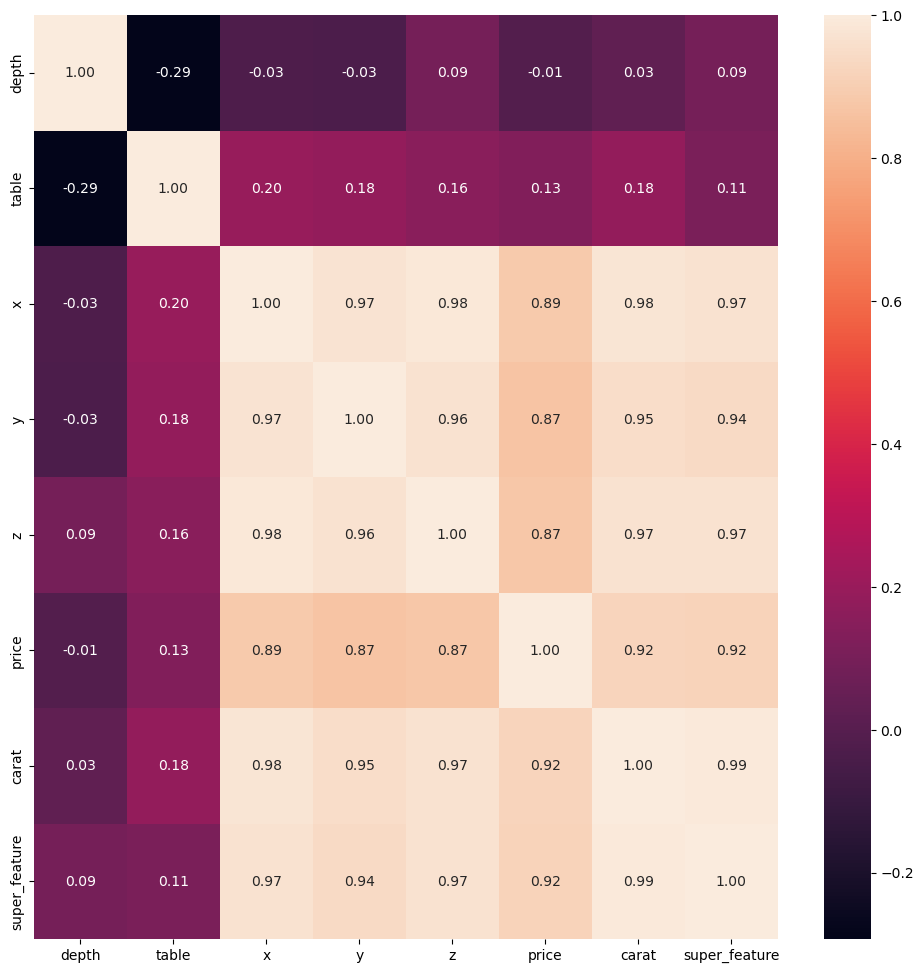

In [740]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1, 1, 1)
sns.heatmap(diamonds_noid.corr(method='pearson'), annot=True, fmt='.2f', ax=ax);

In [611]:
selector = VarianceThreshold(threshold=0.0)
new_X = selector.fit_transform(X_encoding)
print("Transformed feature shape:", new_X.shape)

# Selected features
print("Selected features:", selector.get_feature_names_out())

Transformed feature shape: (40455, 21)
Selected features: ['depth' 'table' 'carat' 'super_feature' 'cut_Good' 'cut_Ideal'
 'cut_Premium' 'cut_Very Good' 'color_E' 'color_F' 'color_G' 'color_H'
 'color_I' 'color_J' 'clarity_IF' 'clarity_SI1' 'clarity_SI2'
 'clarity_VS1' 'clarity_VS2' 'clarity_VVS1' 'clarity_VVS2']


Encoding
==

In [612]:
X_encoding = pd.get_dummies(X, columns=[ 'cut', 'color', 'clarity'], drop_first=True)
X_encoding

depth  table  carat  super_feature  cut_Good  cut_Ideal  cut_Premium  \
0       62.4   58.0   1.21       1.301793         0          0            1   
1       60.8   60.0   1.20       1.216000         0          0            1   
2       60.6   59.0   0.30       0.308136         0          0            1   
3       62.6   57.0   1.20       1.317895         0          0            1   
4       59.4   62.0   1.05       1.005968         0          0            1   
...      ...    ...    ...            ...       ...        ...          ...   
40450   61.8   56.0   0.33       0.364179         0          1            0   
40451   61.6   56.0   0.32       0.352000         0          1            0   
40452   62.4   55.0   0.28       0.317673         0          1            0   
40453   62.0   58.0   1.02       1.090345         0          1            0   
40454   62.0   57.0   1.10       1.196491         0          1            0   

       cut_Very Good  color_E  color_F  ...  color_H  color_I  color_J  \
0                  0        0        0  ...        0        0        1   
1                  0        0        0  ...        0        0        1   
2                  0        0        0  ...        0        0        1   
3                  0        0        0  ...        0        0        1   
4                  0        0        0  ...        0        0        1   
...              ...      ...      ...  ...      ...      ...      ...   
40450              0        0        1  ...        0        0        0   
40451              0        0        1  ...        0        0        0   
40452              0        0        1  ...        0        0        0   
40453              0        0        1  ...        0        0        0   
40454              0        0        1  ...        0        0        0   

       clarity_IF  clarity_SI1  clarity_SI2  clarity_VS1  clarity_VS2  \
0               0            0            0            0            1   
1               0            0            0            0            1   
2               0            0            0            0            1   
3               0            0            0            0            1   
4               0            0            0            0            1   
...           ...          ...          ...          ...          ...   
40450           1            0            0            0            0   
40451           1            0            0            0            0   
40452           1            0            0            0            0   
40453           1            0            0            0            0   
40454           1            0            0            0            0   

       clarity_VVS1  clarity_VVS2  
0                 0             0  
1                 0             0  
2                 0             0  
3                 0             0  
4                 0             0  
...             ...           ...  
40450             0             0  
40451             0             0  
40452             0             0  
40453             0             0  
40454             0             0  

[40455 rows x 21 columns]

In [613]:
encoder = TargetEncoder()

/Users/pedroconsuegramateo/opt/miniconda3/envs/m3_ih/lib/python3.10/site-packages/category_encoders/target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/Users/pedroconsuegramateo/opt/miniconda3/envs/m3_ih/lib/python3.10/site-packages/category_encoders/target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [614]:
X

depth  table      cut color clarity  carat  super_feature
0       62.4   58.0  Premium     J     VS2   1.21       1.301793
1       60.8   60.0  Premium     J     VS2   1.20       1.216000
2       60.6   59.0  Premium     J     VS2   0.30       0.308136
3       62.6   57.0  Premium     J     VS2   1.20       1.317895
4       59.4   62.0  Premium     J     VS2   1.05       1.005968
...      ...    ...      ...   ...     ...    ...            ...
40450   61.8   56.0    Ideal     F      IF   0.33       0.364179
40451   61.6   56.0    Ideal     F      IF   0.32       0.352000
40452   62.4   55.0    Ideal     F      IF   0.28       0.317673
40453   62.0   58.0    Ideal     F      IF   1.02       1.090345
40454   62.0   57.0    Ideal     F      IF   1.10       1.196491

[40455 rows x 7 columns]

In [616]:
def myEncoding(df):
    return pd.get_dummies(df, columns=['cut', 'color', 'clarity'], drop_first=True)

In [626]:
cutValues = diamonds['cut'].unique()
cutValues

array(['Premium', 'Very Good', 'Fair', 'Good', 'Ideal'], dtype=object)

In [636]:
colorValues = diamonds['color'].unique()
colorValues

array(['J', 'E', 'I', 'G', 'D', 'H', 'F'], dtype=object)

In [669]:
diamonds['clarity'].unique()

array(['VS2', 'VVS2', 'SI1', 'VS1', 'SI2', 'I1', 'VVS1', 'IF'],
      dtype=object)

## Label Encoding
---

In [703]:
cut_encoding = {'Premium':4, 'Very Good':3, 'Fair':2, 'Good': 1, 'Ideal':0}
def labelEncodingForCut(x):
    for key in cut_encoding:
        if x == key:
            return cut_encoding[key]

In [704]:
color_encoding = {'J':6, 'I':5, 'H':4, 'G': 3, 'F':2, 'E':1, 'D':0}
def labelEncodingForColor(x):
    for key in color_encoding:
        if x == key:
            return color_encoding[key]

In [705]:
clarity_encoding = {'I1':7, 'SI2':6, 'SI1':5, 'VS2': 4, 'VS1':3, 'VVS2':2, 'VVS1':1, 'IF':0}
def labelEncodingForClarity(x):
    for key in clarity_encoding:
        if x == key:
            return clarity_encoding[key]

---

In [706]:
X['cut'] = X['cut'].apply(labelEncodingForCut)
X

/var/folders/n3/xb6jll3d49q147jw5_13y6zm0000gn/T/ipykernel_7315/2931406157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cut'] = X['cut'].apply(labelEncodingForCut)


depth  table  cut color clarity  carat  super_feature
0       62.4   58.0    4     J     VS2   1.21       1.301793
1       60.8   60.0    4     J     VS2   1.20       1.216000
2       60.6   59.0    4     J     VS2   0.30       0.308136
3       62.6   57.0    4     J     VS2   1.20       1.317895
4       59.4   62.0    4     J     VS2   1.05       1.005968
...      ...    ...  ...   ...     ...    ...            ...
40450   61.8   56.0    0     F      IF   0.33       0.364179
40451   61.6   56.0    0     F      IF   0.32       0.352000
40452   62.4   55.0    0     F      IF   0.28       0.317673
40453   62.0   58.0    0     F      IF   1.02       1.090345
40454   62.0   57.0    0     F      IF   1.10       1.196491

[40455 rows x 7 columns]

In [708]:
X['color'] = X['color'].apply(labelEncodingForColor)
X

/var/folders/n3/xb6jll3d49q147jw5_13y6zm0000gn/T/ipykernel_7315/1291655416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['color'] = X['color'].apply(labelEncodingForColor)


depth  table  cut  color clarity  carat  super_feature
0       62.4   58.0    4      6     VS2   1.21       1.301793
1       60.8   60.0    4      6     VS2   1.20       1.216000
2       60.6   59.0    4      6     VS2   0.30       0.308136
3       62.6   57.0    4      6     VS2   1.20       1.317895
4       59.4   62.0    4      6     VS2   1.05       1.005968
...      ...    ...  ...    ...     ...    ...            ...
40450   61.8   56.0    0      2      IF   0.33       0.364179
40451   61.6   56.0    0      2      IF   0.32       0.352000
40452   62.4   55.0    0      2      IF   0.28       0.317673
40453   62.0   58.0    0      2      IF   1.02       1.090345
40454   62.0   57.0    0      2      IF   1.10       1.196491

[40455 rows x 7 columns]

In [709]:
X['clarity'] = X['clarity'].apply(labelEncodingForClarity)
X

/var/folders/n3/xb6jll3d49q147jw5_13y6zm0000gn/T/ipykernel_7315/1828486422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['clarity'] = X['clarity'].apply(labelEncodingForClarity)


depth  table  cut  color  clarity  carat  super_feature
0       62.4   58.0    4      6        4   1.21       1.301793
1       60.8   60.0    4      6        4   1.20       1.216000
2       60.6   59.0    4      6        4   0.30       0.308136
3       62.6   57.0    4      6        4   1.20       1.317895
4       59.4   62.0    4      6        4   1.05       1.005968
...      ...    ...  ...    ...      ...    ...            ...
40450   61.8   56.0    0      2        0   0.33       0.364179
40451   61.6   56.0    0      2        0   0.32       0.352000
40452   62.4   55.0    0      2        0   0.28       0.317673
40453   62.0   58.0    0      2        0   1.02       1.090345
40454   62.0   57.0    0      2        0   1.10       1.196491

[40455 rows x 7 columns]

---

Scaling
==

In [710]:
def scaling(df):
    
    #scaler = MinMaxScaler()
    #scaler = StandardScaler()
    scaler = RobustScaler()
    scaling = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaling)
    
    return scaled_df

In [711]:
x_scaling = scaling(X)
x_scaling

0         1    2         3    4         5         6
0      0.400000  0.333333  0.5  1.000000  0.0  0.796875  0.770402
1     -0.666667  1.000000  0.5  1.000000  0.0  0.781250  0.650007
2     -0.800000  0.666667  0.5  1.000000  0.0 -0.625000 -0.624016
3      0.533333  0.000000  0.5  1.000000  0.0  0.781250  0.792998
4     -1.600000  1.666667  0.5  1.000000  0.0  0.546875  0.355265
...         ...       ...  ...       ...  ...       ...       ...
40450  0.000000 -0.333333 -0.5 -0.333333 -2.0 -0.578125 -0.545369
40451 -0.133333 -0.333333 -0.5 -0.333333 -2.0 -0.593750 -0.562460
40452  0.400000 -0.666667 -0.5 -0.333333 -2.0 -0.656250 -0.610632
40453  0.133333  0.333333 -0.5 -0.333333 -2.0  0.500000  0.473673
40454  0.133333  0.000000 -0.5 -0.333333 -2.0  0.625000  0.622630

[40455 rows x 7 columns]

---

Train, Test, Split
==

In [712]:
X_train, X_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (32364, 7), X_test: (8091, 7), y_train: (32364,), y_test: (8091,)


---

Predictions
==

In [713]:

d_test['super_feature'] = super_feature(d_test)

d_test = d_test[x_columns]
d_test['cut'] = d_test['cut'].apply(labelEncodingForCut)
d_test['color'] = d_test['color'].apply(labelEncodingForColor)
d_test['clarity'] = d_test['clarity'].apply(labelEncodingForClarity)
x_pred = scaling(d_test)

d_test

depth  table  cut  color  clarity  carat  super_feature
0       62.7   60.0    3      2        5   0.79       0.825550
1       61.0   57.0    0      6        3   1.20       1.284211
2       62.2   61.0    4      4        5   1.57       1.600885
3       63.8   54.0    3      2        5   0.90       1.063333
4       62.9   58.0    3      2        3   0.50       0.542241
...      ...    ...  ...    ...      ...    ...            ...
13480   61.9   56.0    0      1        5   0.57       0.630054
13481   62.2   55.0    0      5        4   0.71       0.802945
13482   61.6   55.0    0      2        3   0.70       0.784000
13483   58.8   57.0    3      2        6   0.70       0.722105
13484   62.4   55.0    0      5        2   0.40       0.453818

[13485 rows x 7 columns]

---

## Hyperparameter Tunning and Cross Validation For XGBoost
---

In [125]:
gridsearch_params = {
    (max_depth, min_child_weight, subsample, colsample, eta)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
    for eta in [.3, .2, .1, .05, .01, .005]
}

In [206]:
param_grid = {'min_child_weight': [i for i in range(9,12)],
              'max_depth': [i for i in range(4,7)],
             'subsample': [i/10. for i in range(7,11)],
              'learning_rate:':[0.05, 0.1, 0.15, 0.2, 0.3],
             'eta': [.3, .2, .1, .05, .01, .005]}


In [207]:
param_grid

{'min_child_weight': [9, 10, 11],
 'max_depth': [4, 5, 6],
 'subsample': [0.7, 0.8, 0.9, 1.0],
 'learning_rate:': [0.05, 0.1, 0.15, 0.2, 0.3],
 'eta': [0.3, 0.2, 0.1, 0.05, 0.01, 0.005]}

In [216]:
grid_search = RandomizedSearchCV(regressor,
                           param_grid,
                           cv=5,
                           verbose=3,
                           scoring='neg_root_mean_squared_error',
                           error_score='raise',
                           
                           n_jobs=-1)

In [286]:
param_grid_grid_search = {'learning_rate:':[0.05, 0.1, 0.15, 0.2, 0.3]}
param_grid_grid_search2 = {'gamma':[i/10.0 for i in range(0,5)]}
param_grid_grid_search3 = {'max_depth':range(3,10,2), 'min_child_weight':range(1,6,2)}
param_grid_grid_search4 = {'colsample_bytree':[i/10.0 for i in range(5,10)]}
param_grid_grid_search5 = {'gamma':[i/10.0 for i in range(0,5)]}


In [622]:
grid_search = GridSearchCV(regressor,
                           param_grid_grid_search5,
                           cv=5,
                           verbose=3,
                           scoring='neg_root_mean_squared_error',
                           error_score='raise',
                           
                           n_jobs=-1)

In [623]:
%%time

grid_search.fit(x_scaling,y)

print('\n')
print('Best hyperparameters: ', grid_search.best_params_, '\n')
print('Best score: ', -grid_search.best_score_, '\n')

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/Users/pedroconsuegramateo/opt/miniconda3/envs/m3_ih/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/pedroconsuegramateo/opt/miniconda3/envs/m3_ih/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/pedroconsuegramateo/opt/miniconda3/envs/m3_ih/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/pedroconsuegramateo/opt/miniconda3/envs/m3_ih/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumP



Best hyperparameters:  {'gamma': 0.0} 

Best score:  597.2812625710418 

CPU times: user 10.2 s, sys: 3.08 s, total: 13.3 s
Wall time: 19.3 s
[CV 3/5] END ......................gamma=0.0;, score=-601.610 total time=   4.3s
[CV 5/5] END ......................gamma=0.1;, score=-605.466 total time=   4.3s
[CV 2/5] END ......................gamma=0.3;, score=-578.050 total time=   4.4s
[CV 1/5] END ......................gamma=0.0;, score=-584.649 total time=   4.4s
[CV 3/5] END ......................gamma=0.2;, score=-601.610 total time=   4.3s
[CV 1/5] END ......................gamma=0.4;, score=-584.649 total time=   4.4s
[CV 4/5] END ......................gamma=0.0;, score=-616.632 total time=   4.3s
[CV 1/5] END ......................gamma=0.2;, score=-584.649 total time=   4.3s
[CV 5/5] END ......................gamma=0.3;, score=-605.466 total time=   4.4s
[CV 2/5] END ......................gamma=0.0;, score=-578.050 total time=   4.3s
[CV 4/5] END ......................gamma=0.1;,

In [210]:
%%time

grid_search.fit(x_scaling,y)

print('\n')
print('Best hyperparameters: ', grid_search.best_params_, '\n')
print('Best score: ', -grid_search.best_score_, '\n')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[09:49:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "learning_rate:" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




Best hyperparameters:  {'subsample': 1.0, 'min_child_weight': 11, 'max_depth': 6, 'learning_rate:': 0.05, 'eta': 0.005} 

Best score:  596.0501088118338 

CPU times: user 6.3 s, sys: 1.77 s, total: 8.07 s
Wall time: 18 s


In [211]:
%%time

grid_search.fit(x_scaling,y)

print('\n')
print('Best hyperparameters: ', grid_search.best_params_, '\n')
print('Best score: ', -grid_search.best_score_, '\n')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[09:50:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "learning_rate:" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




Best hyperparameters:  {'subsample': 1.0, 'min_child_weight': 11, 'max_depth': 6, 'learning_rate:': 0.2, 'eta': 0.1} 

Best score:  596.0501088118338 

CPU times: user 6.02 s, sys: 1.74 s, total: 7.75 s
Wall time: 17.7 s


---

## XGBoost
---

Best hyperparameters:  {'subsample': 1.0, 'min_child_weight': 10, 'max_depth': 6, 'eta': 0.005} - 590

Best hyperparameters:  {'subsample': 1.0, 'min_child_weight': 10, 'max_depth': 6, 'eta': 0.1} - 590

In [714]:
regressor = XGBRegressor(max_depth=5, gamma=0, learning_rate=0.3,  n_estimators=200, min_child_weight= 3, colsample_bytree=0.9)
hyperparameters = regressor.get_params()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('Model:', regressor, '\n')
print('Model hyperparameters:', hyperparameters, '\n')
print('Ground truth target:', y_test, '\n')
print('Predicted target:', y_pred, '\n')

Model: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=3,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) 

Model hyperparameters: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.9, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'gamma': 0, 'gpu_id': None, 'grow_po

In [715]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

525.2075715430407

## CatBoost
---

In [745]:
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

In [746]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [747]:
grid = {'iterations': [100, 150, 500],
        'learning_rate': [0.03, 0.1, 0.3],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)

0:	learn: 5491.0911590	test: 5385.4307143	best: 5385.4307143 (0)	total: 1.74ms	remaining: 173ms
1:	learn: 5349.1229423	test: 5245.5248866	best: 5245.5248866 (1)	total: 3.38ms	remaining: 166ms
2:	learn: 5209.2103323	test: 5107.5392067	best: 5107.5392067 (2)	total: 4.86ms	remaining: 157ms
3:	learn: 5071.9509949	test: 4972.1883101	best: 4972.1883101 (3)	total: 7.64ms	remaining: 183ms
4:	learn: 4940.8309125	test: 4842.5679885	best: 4842.5679885 (4)	total: 10.4ms	remaining: 198ms
5:	learn: 4817.2674530	test: 4720.5248228	best: 4720.5248228 (5)	total: 13.8ms	remaining: 216ms
6:	learn: 4697.5583233	test: 4602.1844191	best: 4602.1844191 (6)	total: 15.6ms	remaining: 208ms
7:	learn: 4580.3420069	test: 4486.4487559	best: 4486.4487559 (7)	total: 17.7ms	remaining: 204ms
8:	learn: 4463.7699471	test: 4371.0941162	best: 4371.0941162 (8)	total: 20.1ms	remaining: 204ms
9:	learn: 4353.3953383	test: 4262.0132018	best: 4262.0132018 (9)	total: 21.9ms	remaining: 197ms
10:	learn: 4247.1467104	test: 4157.42052

53:	learn: 1045.0689578	test: 1009.9795514	best: 1009.9795514 (53)	total: 145ms	remaining: 123ms
54:	learn: 1034.5216661	test: 999.2341996	best: 999.2341996 (54)	total: 153ms	remaining: 126ms
55:	learn: 1027.9757987	test: 993.2795782	best: 993.2795782 (55)	total: 157ms	remaining: 123ms
56:	learn: 1021.8689710	test: 987.4893315	best: 987.4893315 (56)	total: 163ms	remaining: 123ms
57:	learn: 1017.0585976	test: 982.4338401	best: 982.4338401 (57)	total: 168ms	remaining: 122ms
58:	learn: 1008.4279924	test: 973.9187348	best: 973.9187348 (58)	total: 172ms	remaining: 119ms
59:	learn: 1003.4827014	test: 968.5400058	best: 968.5400058 (59)	total: 175ms	remaining: 116ms
60:	learn: 998.6883861	test: 964.1059935	best: 964.1059935 (60)	total: 177ms	remaining: 113ms
61:	learn: 991.1679181	test: 956.9889963	best: 956.9889963 (61)	total: 179ms	remaining: 109ms
62:	learn: 981.3639295	test: 947.4870415	best: 947.4870415 (62)	total: 182ms	remaining: 107ms
63:	learn: 977.2778490	test: 943.3117627	best: 943.

89:	learn: 726.5913123	test: 714.7760730	best: 714.7760730 (89)	total: 236ms	remaining: 26.2ms
90:	learn: 726.0462985	test: 714.1745537	best: 714.1745537 (90)	total: 241ms	remaining: 23.8ms
91:	learn: 724.0542285	test: 712.0401410	best: 712.0401410 (91)	total: 244ms	remaining: 21.2ms
92:	learn: 723.7410259	test: 711.7784055	best: 711.7784055 (92)	total: 246ms	remaining: 18.5ms
93:	learn: 720.4413168	test: 707.5775274	best: 707.5775274 (93)	total: 249ms	remaining: 15.9ms
94:	learn: 719.2340889	test: 706.2918201	best: 706.2918201 (94)	total: 252ms	remaining: 13.2ms
95:	learn: 718.1291448	test: 704.9593219	best: 704.9593219 (95)	total: 255ms	remaining: 10.6ms
96:	learn: 717.5038326	test: 704.2731288	best: 704.2731288 (96)	total: 257ms	remaining: 7.94ms
97:	learn: 716.4188930	test: 701.9461974	best: 701.9461974 (97)	total: 259ms	remaining: 5.28ms
98:	learn: 716.0933343	test: 701.5408452	best: 701.5408452 (98)	total: 260ms	remaining: 2.63ms
99:	learn: 715.3742929	test: 701.5994936	best: 701

30:	learn: 1313.3961122	test: 1273.9801473	best: 1273.9801473 (30)	total: 83.2ms	remaining: 185ms
31:	learn: 1298.0902991	test: 1259.0876731	best: 1259.0876731 (31)	total: 85.3ms	remaining: 181ms
32:	learn: 1280.7428625	test: 1241.8036806	best: 1241.8036806 (32)	total: 87.5ms	remaining: 178ms
33:	learn: 1261.7591346	test: 1222.6871359	best: 1222.6871359 (33)	total: 91.2ms	remaining: 177ms
34:	learn: 1241.6029328	test: 1203.8201802	best: 1203.8201802 (34)	total: 94.7ms	remaining: 176ms
35:	learn: 1229.2575154	test: 1191.5115688	best: 1191.5115688 (35)	total: 96.5ms	remaining: 172ms
36:	learn: 1215.7977848	test: 1177.4645731	best: 1177.4645731 (36)	total: 99.9ms	remaining: 170ms
37:	learn: 1203.7973605	test: 1164.7121677	best: 1164.7121677 (37)	total: 102ms	remaining: 167ms
38:	learn: 1188.3281955	test: 1150.2801037	best: 1150.2801037 (38)	total: 104ms	remaining: 163ms
39:	learn: 1175.2370274	test: 1137.3307669	best: 1137.3307669 (39)	total: 107ms	remaining: 160ms
40:	learn: 1165.4481090

68:	learn: 755.3315140	test: 741.2804365	best: 741.2804365 (68)	total: 214ms	remaining: 96.3ms
69:	learn: 754.7470601	test: 740.9452061	best: 740.9452061 (69)	total: 218ms	remaining: 93.6ms
70:	learn: 750.3526681	test: 737.3121305	best: 737.3121305 (70)	total: 222ms	remaining: 90.8ms
71:	learn: 745.0198999	test: 730.9759182	best: 730.9759182 (71)	total: 224ms	remaining: 87.3ms
72:	learn: 743.7740516	test: 729.5612384	best: 729.5612384 (72)	total: 228ms	remaining: 84.2ms
73:	learn: 741.5263252	test: 727.9053040	best: 727.9053040 (73)	total: 231ms	remaining: 81ms
74:	learn: 740.7574189	test: 727.5572666	best: 727.5572666 (74)	total: 233ms	remaining: 77.7ms
75:	learn: 740.3053175	test: 727.0217563	best: 727.0217563 (75)	total: 236ms	remaining: 74.6ms
76:	learn: 739.8917380	test: 726.7249824	best: 726.7249824 (76)	total: 239ms	remaining: 71.5ms
77:	learn: 737.6391198	test: 725.5583152	best: 725.5583152 (77)	total: 242ms	remaining: 68.3ms
78:	learn: 737.2525782	test: 725.3460228	best: 725.3

16:	learn: 1799.5660004	test: 1744.2698219	best: 1744.2698219 (16)	total: 45.1ms	remaining: 220ms
17:	learn: 1731.7729009	test: 1678.9880663	best: 1678.9880663 (17)	total: 50.4ms	remaining: 229ms
18:	learn: 1679.1368904	test: 1627.5479415	best: 1627.5479415 (18)	total: 54.4ms	remaining: 232ms
19:	learn: 1634.9500085	test: 1584.0695485	best: 1584.0695485 (19)	total: 56.8ms	remaining: 227ms
20:	learn: 1594.7853693	test: 1545.6301498	best: 1545.6301498 (20)	total: 58.7ms	remaining: 221ms
21:	learn: 1558.9371484	test: 1511.1610438	best: 1511.1610438 (21)	total: 60ms	remaining: 213ms
22:	learn: 1516.2814385	test: 1470.8134694	best: 1470.8134694 (22)	total: 64ms	remaining: 214ms
23:	learn: 1487.5404818	test: 1441.8794106	best: 1441.8794106 (23)	total: 65.3ms	remaining: 207ms
24:	learn: 1448.9060693	test: 1404.9957316	best: 1404.9957316 (24)	total: 67.5ms	remaining: 203ms
25:	learn: 1418.8493397	test: 1376.9867440	best: 1376.9867440 (25)	total: 70.2ms	remaining: 200ms
26:	learn: 1395.7609465	

40:	learn: 844.5093014	test: 826.7816780	best: 826.7816780 (40)	total: 190ms	remaining: 273ms
41:	learn: 840.5863273	test: 822.5257295	best: 822.5257295 (41)	total: 193ms	remaining: 267ms
42:	learn: 838.5311146	test: 820.4615153	best: 820.4615153 (42)	total: 196ms	remaining: 260ms
43:	learn: 833.9605706	test: 815.6860372	best: 815.6860372 (43)	total: 198ms	remaining: 252ms
44:	learn: 831.7306768	test: 813.2013097	best: 813.2013097 (44)	total: 199ms	remaining: 243ms
45:	learn: 823.4135809	test: 804.6111986	best: 804.6111986 (45)	total: 201ms	remaining: 235ms
46:	learn: 820.4365688	test: 800.9622854	best: 800.9622854 (46)	total: 204ms	remaining: 230ms
47:	learn: 819.2728851	test: 799.9518972	best: 799.9518972 (47)	total: 208ms	remaining: 225ms
48:	learn: 815.4724707	test: 796.4126454	best: 796.4126454 (48)	total: 209ms	remaining: 218ms
49:	learn: 809.4316232	test: 790.5089854	best: 790.5089854 (49)	total: 211ms	remaining: 211ms
50:	learn: 808.1254551	test: 790.0969399	best: 790.0969399 (

2:	learn: 4313.5268919	test: 4225.2204336	best: 4225.2204336 (2)	total: 10.2ms	remaining: 331ms
3:	learn: 3957.4733694	test: 3872.6279608	best: 3872.6279608 (3)	total: 15.1ms	remaining: 363ms
4:	learn: 3640.8018352	test: 3559.2318840	best: 3559.2318840 (4)	total: 19.3ms	remaining: 366ms
5:	learn: 3368.7665343	test: 3289.4290695	best: 3289.4290695 (5)	total: 22.2ms	remaining: 347ms
6:	learn: 3114.8734000	test: 3039.2972099	best: 3039.2972099 (6)	total: 24.2ms	remaining: 322ms
7:	learn: 2898.0412727	test: 2825.2056002	best: 2825.2056002 (7)	total: 27.4ms	remaining: 315ms
8:	learn: 2701.6851603	test: 2632.3541807	best: 2632.3541807 (8)	total: 28.6ms	remaining: 289ms
9:	learn: 2528.3185622	test: 2460.5987227	best: 2460.5987227 (9)	total: 31.7ms	remaining: 286ms
10:	learn: 2382.6384400	test: 2317.4434689	best: 2317.4434689 (10)	total: 33.5ms	remaining: 271ms
11:	learn: 2250.4140285	test: 2188.0583010	best: 2188.0583010 (11)	total: 35ms	remaining: 256ms
12:	learn: 2139.7577826	test: 2079.463

62:	learn: 774.7269768	test: 759.3846275	best: 759.3846275 (62)	total: 156ms	remaining: 91.7ms
63:	learn: 770.7744239	test: 755.6156100	best: 755.6156100 (63)	total: 160ms	remaining: 90ms
64:	learn: 769.7818947	test: 754.7277476	best: 754.7277476 (64)	total: 164ms	remaining: 88.2ms
65:	learn: 767.5219426	test: 752.6886906	best: 752.6886906 (65)	total: 167ms	remaining: 86.2ms
66:	learn: 765.8779876	test: 750.3652458	best: 750.3652458 (66)	total: 171ms	remaining: 84.1ms
67:	learn: 765.3789969	test: 750.0205526	best: 750.0205526 (67)	total: 174ms	remaining: 82ms
68:	learn: 761.2532968	test: 746.9205662	best: 746.9205662 (68)	total: 176ms	remaining: 79ms
69:	learn: 758.3095488	test: 743.7359959	best: 743.7359959 (69)	total: 180ms	remaining: 77.1ms
70:	learn: 757.0090985	test: 742.9806662	best: 742.9806662 (70)	total: 182ms	remaining: 74.5ms
71:	learn: 756.6924311	test: 742.9812870	best: 742.9806662 (70)	total: 185ms	remaining: 72.1ms
72:	learn: 755.7906539	test: 742.6312718	best: 742.63127

119:	learn: 1232.5574170	test: 1195.0267790	best: 1195.0267790 (119)	total: 302ms	remaining: 75.5ms
120:	learn: 1226.7112770	test: 1189.2556243	best: 1189.2556243 (120)	total: 306ms	remaining: 73.3ms
121:	learn: 1221.3191990	test: 1183.6887224	best: 1183.6887224 (121)	total: 309ms	remaining: 70.9ms
122:	learn: 1217.4966595	test: 1179.8743259	best: 1179.8743259 (122)	total: 312ms	remaining: 68.4ms
123:	learn: 1213.3763074	test: 1175.9427564	best: 1175.9427564 (123)	total: 315ms	remaining: 66ms
124:	learn: 1209.6077245	test: 1172.1192026	best: 1172.1192026 (124)	total: 316ms	remaining: 63.2ms
125:	learn: 1204.1109862	test: 1166.8553146	best: 1166.8553146 (125)	total: 319ms	remaining: 60.8ms
126:	learn: 1200.4641718	test: 1163.3401617	best: 1163.3401617 (126)	total: 323ms	remaining: 58.4ms
127:	learn: 1196.5305929	test: 1159.2265510	best: 1159.2265510 (127)	total: 324ms	remaining: 55.7ms
128:	learn: 1193.0999007	test: 1155.8711429	best: 1155.8711429 (128)	total: 326ms	remaining: 53.1ms
12

127:	learn: 798.4044576	test: 773.0815405	best: 773.0815405 (127)	total: 333ms	remaining: 57.3ms
128:	learn: 797.3269492	test: 772.4242047	best: 772.4242047 (128)	total: 338ms	remaining: 55ms
129:	learn: 796.4510140	test: 771.8589722	best: 771.8589722 (129)	total: 342ms	remaining: 52.6ms
130:	learn: 794.9904278	test: 770.5366507	best: 770.5366507 (130)	total: 346ms	remaining: 50.2ms
131:	learn: 793.0817807	test: 768.5370865	best: 768.5370865 (131)	total: 350ms	remaining: 47.7ms
132:	learn: 792.3798007	test: 768.1970562	best: 768.1970562 (132)	total: 352ms	remaining: 45ms
133:	learn: 791.5534830	test: 767.3163878	best: 767.3163878 (133)	total: 357ms	remaining: 42.6ms
134:	learn: 790.4336706	test: 766.5653928	best: 766.5653928 (134)	total: 360ms	remaining: 40ms
135:	learn: 789.7064925	test: 765.9289608	best: 765.9289608 (135)	total: 362ms	remaining: 37.2ms
136:	learn: 788.2156407	test: 764.5507877	best: 764.5507877 (136)	total: 363ms	remaining: 34.4ms
137:	learn: 786.9613185	test: 763.33

107:	learn: 707.1842349	test: 696.3188914	best: 696.3188914 (107)	total: 341ms	remaining: 132ms
108:	learn: 705.8293833	test: 694.5744145	best: 694.5744145 (108)	total: 344ms	remaining: 129ms
109:	learn: 705.2071630	test: 694.5950327	best: 694.5744145 (108)	total: 349ms	remaining: 127ms
110:	learn: 705.0813378	test: 694.5952677	best: 694.5744145 (108)	total: 352ms	remaining: 124ms
111:	learn: 704.9365364	test: 694.4643383	best: 694.4643383 (111)	total: 356ms	remaining: 121ms
112:	learn: 703.8481937	test: 693.4656336	best: 693.4656336 (112)	total: 359ms	remaining: 118ms
113:	learn: 702.5307491	test: 692.7445795	best: 692.7445795 (113)	total: 362ms	remaining: 114ms
114:	learn: 701.5790743	test: 691.3765558	best: 691.3765558 (114)	total: 365ms	remaining: 111ms
115:	learn: 700.8887821	test: 690.8158216	best: 690.8158216 (115)	total: 369ms	remaining: 108ms
116:	learn: 700.6832545	test: 690.7759652	best: 690.7759652 (116)	total: 373ms	remaining: 105ms
117:	learn: 697.3098216	test: 688.734752

133:	learn: 1175.5071571	test: 1138.5990341	best: 1138.5990341 (133)	total: 256ms	remaining: 30.5ms
134:	learn: 1172.4134484	test: 1135.5230799	best: 1135.5230799 (134)	total: 260ms	remaining: 28.8ms
135:	learn: 1169.0192138	test: 1131.9428989	best: 1131.9428989 (135)	total: 263ms	remaining: 27ms
136:	learn: 1165.7941966	test: 1128.6167053	best: 1128.6167053 (136)	total: 266ms	remaining: 25.2ms
137:	learn: 1161.2065737	test: 1124.3117890	best: 1124.3117890 (137)	total: 267ms	remaining: 23.3ms
138:	learn: 1158.1692867	test: 1121.1972880	best: 1121.1972880 (138)	total: 269ms	remaining: 21.3ms
139:	learn: 1153.7984991	test: 1116.7984826	best: 1116.7984826 (139)	total: 271ms	remaining: 19.4ms
140:	learn: 1150.8405315	test: 1113.7540460	best: 1113.7540460 (140)	total: 273ms	remaining: 17.4ms
141:	learn: 1148.0719732	test: 1110.8927135	best: 1110.8927135 (141)	total: 276ms	remaining: 15.5ms
142:	learn: 1145.0884896	test: 1107.8981978	best: 1107.8981978 (142)	total: 277ms	remaining: 13.6ms
14

91:	learn: 867.4179677	test: 836.9086486	best: 836.9086486 (91)	total: 162ms	remaining: 102ms
92:	learn: 865.2295140	test: 834.5362972	best: 834.5362972 (92)	total: 166ms	remaining: 102ms
93:	learn: 862.6449179	test: 832.1423288	best: 832.1423288 (93)	total: 169ms	remaining: 101ms
94:	learn: 860.4411750	test: 830.2612995	best: 830.2612995 (94)	total: 172ms	remaining: 99.6ms
95:	learn: 857.7217810	test: 827.7093978	best: 827.7093978 (95)	total: 175ms	remaining: 98.2ms
96:	learn: 855.8465107	test: 825.7162177	best: 825.7162177 (96)	total: 176ms	remaining: 96.4ms
97:	learn: 854.0195472	test: 824.1770424	best: 824.1770424 (97)	total: 178ms	remaining: 94.5ms
98:	learn: 852.2367094	test: 822.2514385	best: 822.2514385 (98)	total: 181ms	remaining: 93.1ms
99:	learn: 849.0118031	test: 818.9356137	best: 818.9356137 (99)	total: 182ms	remaining: 91.1ms
100:	learn: 846.5898513	test: 816.2504746	best: 816.2504746 (100)	total: 183ms	remaining: 89ms
101:	learn: 844.3644289	test: 814.2075113	best: 814.2

49:	learn: 807.6537573	test: 790.5668487	best: 790.5668487 (49)	total: 88.3ms	remaining: 177ms
50:	learn: 806.3806920	test: 789.4261901	best: 789.4261901 (50)	total: 92.4ms	remaining: 179ms
51:	learn: 800.8443271	test: 784.6723726	best: 784.6723726 (51)	total: 96.3ms	remaining: 181ms
52:	learn: 794.7319748	test: 779.0643901	best: 779.0643901 (52)	total: 98.6ms	remaining: 180ms
53:	learn: 792.7817332	test: 778.2234170	best: 778.2234170 (53)	total: 101ms	remaining: 179ms
54:	learn: 786.2152943	test: 771.3324504	best: 771.3324504 (54)	total: 102ms	remaining: 177ms
55:	learn: 783.5970670	test: 767.6644918	best: 767.6644918 (55)	total: 106ms	remaining: 178ms
56:	learn: 781.0279119	test: 764.9156521	best: 764.9156521 (56)	total: 108ms	remaining: 176ms
57:	learn: 777.5338289	test: 761.7165140	best: 761.7165140 (57)	total: 109ms	remaining: 174ms
58:	learn: 776.3740611	test: 760.9721839	best: 760.9721839 (58)	total: 111ms	remaining: 171ms
59:	learn: 775.5973364	test: 760.3906938	best: 760.39069

6:	learn: 4697.7348290	test: 4602.3587462	best: 4602.3587462 (6)	total: 14.4ms	remaining: 295ms
7:	learn: 4580.5308361	test: 4486.6352906	best: 4486.6352906 (7)	total: 17.6ms	remaining: 312ms
8:	learn: 4463.9767128	test: 4371.2984399	best: 4371.2984399 (8)	total: 20.3ms	remaining: 319ms
9:	learn: 4353.6181881	test: 4262.2334360	best: 4262.2334360 (9)	total: 28.6ms	remaining: 401ms
10:	learn: 4247.3792251	test: 4157.6502872	best: 4157.6502872 (10)	total: 32.2ms	remaining: 407ms
11:	learn: 4143.3830335	test: 4055.1513279	best: 4055.1513279 (11)	total: 34.6ms	remaining: 398ms
12:	learn: 4044.0027602	test: 3957.0583891	best: 3957.0583891 (12)	total: 37.5ms	remaining: 395ms
13:	learn: 3945.7572245	test: 3860.1998448	best: 3860.1998448 (13)	total: 40.3ms	remaining: 391ms
14:	learn: 3852.3979800	test: 3768.5525502	best: 3768.5525502 (14)	total: 43.1ms	remaining: 388ms
15:	learn: 3761.8344366	test: 3678.8502744	best: 3678.8502744 (15)	total: 46.2ms	remaining: 387ms
16:	learn: 3672.1702366	test

99:	learn: 1340.0126607	test: 1298.9374968	best: 1298.9374968 (99)	total: 213ms	remaining: 107ms
100:	learn: 1334.6464073	test: 1293.7879713	best: 1293.7879713 (100)	total: 216ms	remaining: 105ms
101:	learn: 1326.7028992	test: 1286.3768207	best: 1286.3768207 (101)	total: 219ms	remaining: 103ms
102:	learn: 1320.0081324	test: 1280.0836815	best: 1280.0836815 (102)	total: 221ms	remaining: 101ms
103:	learn: 1314.8004943	test: 1274.7422586	best: 1274.7422586 (103)	total: 223ms	remaining: 98.5ms
104:	learn: 1308.3239023	test: 1268.6975050	best: 1268.6975050 (104)	total: 226ms	remaining: 96.8ms
105:	learn: 1302.7727247	test: 1263.3881843	best: 1263.3881843 (105)	total: 228ms	remaining: 94.6ms
106:	learn: 1297.4820418	test: 1258.3321490	best: 1258.3321490 (106)	total: 229ms	remaining: 92.1ms
107:	learn: 1292.4472690	test: 1253.3888171	best: 1253.3888171 (107)	total: 231ms	remaining: 89.7ms
108:	learn: 1287.7557353	test: 1248.9205821	best: 1248.9205821 (108)	total: 233ms	remaining: 87.5ms
109:	l

55:	learn: 1028.2383466	test: 993.5143031	best: 993.5143031 (55)	total: 103ms	remaining: 172ms
56:	learn: 1022.1425789	test: 987.7349267	best: 987.7349267 (56)	total: 107ms	remaining: 174ms
57:	learn: 1017.3355703	test: 982.6838999	best: 982.6838999 (57)	total: 109ms	remaining: 173ms
58:	learn: 1008.7059167	test: 974.1684879	best: 974.1684879 (58)	total: 112ms	remaining: 173ms
59:	learn: 1003.7602291	test: 968.7895820	best: 968.7895820 (59)	total: 114ms	remaining: 172ms
60:	learn: 998.9683517	test: 964.3312693	best: 964.3312693 (60)	total: 116ms	remaining: 169ms
61:	learn: 991.4516262	test: 957.2128004	best: 957.2128004 (61)	total: 119ms	remaining: 169ms
62:	learn: 981.6557775	test: 947.7188754	best: 947.7188754 (62)	total: 122ms	remaining: 168ms
63:	learn: 977.5430000	test: 943.5145309	best: 943.5145309 (63)	total: 123ms	remaining: 166ms
64:	learn: 971.5985330	test: 938.2573786	best: 938.2573786 (64)	total: 125ms	remaining: 164ms
65:	learn: 966.9829217	test: 934.1014408	best: 934.1014

12:	learn: 1188.3644070	test: 1165.7056539	best: 1165.7056539 (12)	total: 23.4ms	remaining: 246ms
13:	learn: 1160.5164370	test: 1139.3265535	best: 1139.3265535 (13)	total: 27.5ms	remaining: 267ms
14:	learn: 1127.3388318	test: 1105.8069260	best: 1105.8069260 (14)	total: 30.6ms	remaining: 275ms
15:	learn: 1104.0358706	test: 1084.9962829	best: 1084.9962829 (15)	total: 33.4ms	remaining: 280ms
16:	learn: 1084.0630957	test: 1063.5920909	best: 1063.5920909 (16)	total: 35.5ms	remaining: 278ms
17:	learn: 1068.0940267	test: 1046.3326621	best: 1046.3326621 (17)	total: 37.3ms	remaining: 273ms
18:	learn: 1032.6207565	test: 1009.8871465	best: 1009.8871465 (18)	total: 39.1ms	remaining: 269ms
19:	learn: 1015.0952649	test: 994.5746976	best: 994.5746976 (19)	total: 40.8ms	remaining: 265ms
20:	learn: 1000.7968165	test: 982.4750163	best: 982.4750163 (20)	total: 42.5ms	remaining: 261ms
21:	learn: 989.3162874	test: 971.7096291	best: 971.7096291 (21)	total: 45.9ms	remaining: 267ms
22:	learn: 979.7689650	test

118:	learn: 702.8878719	test: 695.5790798	best: 695.5790798 (118)	total: 222ms	remaining: 57.9ms
119:	learn: 702.6252580	test: 695.4743318	best: 695.4743318 (119)	total: 226ms	remaining: 56.6ms
120:	learn: 700.8123539	test: 694.5051654	best: 694.5051654 (120)	total: 229ms	remaining: 54.8ms
121:	learn: 700.3321749	test: 693.6224567	best: 693.6224567 (121)	total: 231ms	remaining: 53ms
122:	learn: 698.8914169	test: 692.0036773	best: 692.0036773 (122)	total: 234ms	remaining: 51.3ms
123:	learn: 698.3067357	test: 691.2697537	best: 691.2697537 (123)	total: 236ms	remaining: 49.5ms
124:	learn: 698.1939855	test: 691.2701125	best: 691.2697537 (123)	total: 238ms	remaining: 47.5ms
125:	learn: 697.7337106	test: 690.7642207	best: 690.7642207 (125)	total: 239ms	remaining: 45.6ms
126:	learn: 697.5746000	test: 690.6364147	best: 690.6364147 (126)	total: 241ms	remaining: 43.7ms
127:	learn: 697.1705568	test: 690.2670951	best: 690.2670951 (127)	total: 243ms	remaining: 41.8ms
128:	learn: 696.5858390	test: 68

76:	learn: 1531.0867654	test: 1483.9041038	best: 1483.9041038 (76)	total: 138ms	remaining: 131ms
77:	learn: 1518.1631120	test: 1471.6629581	best: 1471.6629581 (77)	total: 141ms	remaining: 131ms
78:	learn: 1509.0757666	test: 1463.0274494	best: 1463.0274494 (78)	total: 144ms	remaining: 130ms
79:	learn: 1497.0040702	test: 1451.5425096	best: 1451.5425096 (79)	total: 147ms	remaining: 128ms
80:	learn: 1486.5111099	test: 1441.2325788	best: 1441.2325788 (80)	total: 150ms	remaining: 128ms
81:	learn: 1477.9149250	test: 1432.8885379	best: 1432.8885379 (81)	total: 152ms	remaining: 126ms
82:	learn: 1467.7830025	test: 1423.3527984	best: 1423.3527984 (82)	total: 154ms	remaining: 125ms
83:	learn: 1459.8342596	test: 1415.4967158	best: 1415.4967158 (83)	total: 158ms	remaining: 124ms
84:	learn: 1449.5065327	test: 1405.6991166	best: 1405.6991166 (84)	total: 161ms	remaining: 123ms
85:	learn: 1441.7508582	test: 1398.1452134	best: 1398.1452134 (85)	total: 165ms	remaining: 122ms
86:	learn: 1434.3161077	test: 

90:	learn: 872.5230163	test: 838.3742245	best: 838.3742245 (90)	total: 162ms	remaining: 105ms
91:	learn: 870.4557818	test: 836.7825408	best: 836.7825408 (91)	total: 166ms	remaining: 105ms
92:	learn: 867.4228112	test: 833.6649692	best: 833.6649692 (92)	total: 169ms	remaining: 104ms
93:	learn: 864.6890862	test: 831.1339658	best: 831.1339658 (93)	total: 172ms	remaining: 103ms
94:	learn: 861.8624326	test: 828.5999454	best: 828.5999454 (94)	total: 175ms	remaining: 101ms
95:	learn: 860.0764278	test: 826.5513680	best: 826.5513680 (95)	total: 176ms	remaining: 99.2ms
96:	learn: 856.7950019	test: 823.7795151	best: 823.7795151 (96)	total: 178ms	remaining: 97.2ms
97:	learn: 854.7086965	test: 821.7158137	best: 821.7158137 (97)	total: 179ms	remaining: 95.1ms
98:	learn: 852.8101512	test: 819.7598006	best: 819.7598006 (98)	total: 181ms	remaining: 93.3ms
99:	learn: 850.3094109	test: 817.3488274	best: 817.3488274 (99)	total: 184ms	remaining: 91.8ms
100:	learn: 848.4280218	test: 815.6114715	best: 815.611

125:	learn: 695.2161132	test: 688.0200613	best: 688.0200613 (125)	total: 242ms	remaining: 46ms
126:	learn: 694.8545172	test: 687.9341528	best: 687.9341528 (126)	total: 245ms	remaining: 44.4ms
127:	learn: 693.4619231	test: 686.6920452	best: 686.6920452 (127)	total: 249ms	remaining: 42.8ms
128:	learn: 692.5238172	test: 686.0921345	best: 686.0921345 (128)	total: 252ms	remaining: 41ms
129:	learn: 692.0786384	test: 686.3304535	best: 686.0921345 (128)	total: 254ms	remaining: 39.1ms
130:	learn: 691.8504368	test: 686.4943483	best: 686.0921345 (128)	total: 257ms	remaining: 37.3ms
131:	learn: 691.5341343	test: 686.3597242	best: 686.0921345 (128)	total: 260ms	remaining: 35.4ms
132:	learn: 691.0941143	test: 686.3777687	best: 686.0921345 (128)	total: 262ms	remaining: 33.4ms
133:	learn: 691.0331860	test: 686.3780300	best: 686.0921345 (128)	total: 263ms	remaining: 31.5ms
134:	learn: 690.6321459	test: 686.0199643	best: 686.0199643 (134)	total: 266ms	remaining: 29.5ms
135:	learn: 689.8007542	test: 684.

73:	learn: 1560.4370230	test: 1512.2648085	best: 1512.2648085 (73)	total: 145ms	remaining: 832ms
74:	learn: 1550.0496950	test: 1502.1077992	best: 1502.1077992 (74)	total: 148ms	remaining: 840ms
75:	learn: 1539.7534624	test: 1491.8863110	best: 1491.8863110 (75)	total: 151ms	remaining: 841ms
76:	learn: 1526.9183293	test: 1479.7299192	best: 1479.7299192 (76)	total: 153ms	remaining: 841ms
77:	learn: 1517.3989480	test: 1470.2264514	best: 1470.2264514 (77)	total: 155ms	remaining: 841ms
78:	learn: 1508.2141896	test: 1461.4160408	best: 1461.4160408 (78)	total: 157ms	remaining: 834ms
79:	learn: 1496.2893311	test: 1450.2169146	best: 1450.2169146 (79)	total: 164ms	remaining: 860ms
80:	learn: 1487.4971338	test: 1441.7257940	best: 1441.7257940 (80)	total: 168ms	remaining: 871ms
81:	learn: 1476.2568617	test: 1430.9562475	best: 1430.9562475 (81)	total: 172ms	remaining: 879ms
82:	learn: 1468.1234003	test: 1423.0747412	best: 1423.0747412 (82)	total: 177ms	remaining: 891ms
83:	learn: 1458.2918705	test: 

163:	learn: 1082.5259089	test: 1047.0891658	best: 1047.0891658 (163)	total: 344ms	remaining: 704ms
164:	learn: 1079.7580994	test: 1044.5694940	best: 1044.5694940 (164)	total: 348ms	remaining: 706ms
165:	learn: 1077.8870981	test: 1042.4388493	best: 1042.4388493 (165)	total: 351ms	remaining: 705ms
166:	learn: 1076.1662537	test: 1040.5879374	best: 1040.5879374 (166)	total: 353ms	remaining: 704ms
167:	learn: 1072.2860678	test: 1036.6668386	best: 1036.6668386 (167)	total: 357ms	remaining: 705ms
168:	learn: 1069.6551544	test: 1034.2349963	best: 1034.2349963 (168)	total: 360ms	remaining: 705ms
169:	learn: 1067.6268621	test: 1032.2052527	best: 1032.2052527 (169)	total: 361ms	remaining: 702ms
170:	learn: 1064.5901814	test: 1029.1638236	best: 1029.1638236 (170)	total: 363ms	remaining: 698ms
171:	learn: 1062.5588268	test: 1026.9173926	best: 1026.9173926 (171)	total: 365ms	remaining: 696ms
172:	learn: 1060.6716557	test: 1024.8634884	best: 1024.8634884 (172)	total: 366ms	remaining: 693ms
173:	learn

256:	learn: 916.8991275	test: 883.7483038	best: 883.7483038 (256)	total: 544ms	remaining: 514ms
257:	learn: 915.4573121	test: 882.3602173	best: 882.3602173 (257)	total: 548ms	remaining: 514ms
258:	learn: 914.3285834	test: 881.3778263	best: 881.3778263 (258)	total: 551ms	remaining: 512ms
259:	learn: 913.0239985	test: 880.2353498	best: 880.2353498 (259)	total: 554ms	remaining: 511ms
260:	learn: 911.6546862	test: 878.9183188	best: 878.9183188 (260)	total: 555ms	remaining: 509ms
261:	learn: 910.7075885	test: 878.0841318	best: 878.0841318 (261)	total: 557ms	remaining: 506ms
262:	learn: 909.7771259	test: 877.2686802	best: 877.2686802 (262)	total: 559ms	remaining: 504ms
263:	learn: 908.4748075	test: 875.8896647	best: 875.8896647 (263)	total: 562ms	remaining: 503ms
264:	learn: 907.5575402	test: 875.0385048	best: 875.0385048 (264)	total: 564ms	remaining: 500ms
265:	learn: 906.7500128	test: 874.0778296	best: 874.0778296 (265)	total: 566ms	remaining: 498ms
266:	learn: 905.9210382	test: 873.159434

355:	learn: 831.1829927	test: 801.1415351	best: 801.1415351 (355)	total: 742ms	remaining: 300ms
356:	learn: 830.7089216	test: 800.6598045	best: 800.6598045 (356)	total: 747ms	remaining: 299ms
357:	learn: 829.7623580	test: 799.6644729	best: 799.6644729 (357)	total: 750ms	remaining: 298ms
358:	learn: 829.0037568	test: 798.9325067	best: 798.9325067 (358)	total: 753ms	remaining: 296ms
359:	learn: 828.5435991	test: 798.5672348	best: 798.5672348 (359)	total: 755ms	remaining: 294ms
360:	learn: 827.9153161	test: 797.9093120	best: 797.9093120 (360)	total: 757ms	remaining: 291ms
361:	learn: 827.2734659	test: 797.3434149	best: 797.3434149 (361)	total: 760ms	remaining: 290ms
362:	learn: 826.8179751	test: 796.7776345	best: 796.7776345 (362)	total: 762ms	remaining: 287ms
363:	learn: 826.1106046	test: 796.0965066	best: 796.0965066 (363)	total: 763ms	remaining: 285ms
364:	learn: 825.4443127	test: 795.4562340	best: 795.4562340 (364)	total: 765ms	remaining: 283ms
365:	learn: 824.6615771	test: 794.689386

465:	learn: 783.8423079	test: 758.4583551	best: 758.4583551 (465)	total: 944ms	remaining: 68.9ms
466:	learn: 783.3921410	test: 758.0670174	best: 758.0670174 (466)	total: 947ms	remaining: 66.9ms
467:	learn: 783.0423507	test: 757.7532643	best: 757.7532643 (467)	total: 950ms	remaining: 65ms
468:	learn: 782.7897678	test: 757.4478247	best: 757.4478247 (468)	total: 953ms	remaining: 63ms
469:	learn: 782.1562509	test: 756.8442734	best: 756.8442734 (469)	total: 955ms	remaining: 61ms
470:	learn: 781.9343341	test: 756.6667507	best: 756.6667507 (470)	total: 958ms	remaining: 59ms
471:	learn: 781.7307517	test: 756.5859896	best: 756.5859896 (471)	total: 960ms	remaining: 56.9ms
472:	learn: 781.3628265	test: 756.1778158	best: 756.1778158 (472)	total: 962ms	remaining: 54.9ms
473:	learn: 781.1047910	test: 755.8960896	best: 755.8960896 (473)	total: 964ms	remaining: 52.9ms
474:	learn: 780.8333700	test: 755.7317159	best: 755.7317159 (474)	total: 965ms	remaining: 50.8ms
475:	learn: 780.6595158	test: 755.6482

123:	learn: 803.8693769	test: 778.1285701	best: 778.1285701 (123)	total: 299ms	remaining: 907ms
124:	learn: 802.7708148	test: 776.9282504	best: 776.9282504 (124)	total: 302ms	remaining: 907ms
125:	learn: 801.0247304	test: 775.2122496	best: 775.2122496 (125)	total: 306ms	remaining: 908ms
126:	learn: 799.9856932	test: 774.5317903	best: 774.5317903 (126)	total: 308ms	remaining: 905ms
127:	learn: 798.4044576	test: 773.0815405	best: 773.0815405 (127)	total: 310ms	remaining: 902ms
128:	learn: 797.3269492	test: 772.4242047	best: 772.4242047 (128)	total: 313ms	remaining: 900ms
129:	learn: 796.4510140	test: 771.8589722	best: 771.8589722 (129)	total: 315ms	remaining: 898ms
130:	learn: 794.9904278	test: 770.5366507	best: 770.5366507 (130)	total: 317ms	remaining: 894ms
131:	learn: 793.0817807	test: 768.5370865	best: 768.5370865 (131)	total: 320ms	remaining: 891ms
132:	learn: 792.3798007	test: 768.1970562	best: 768.1970562 (132)	total: 322ms	remaining: 888ms
133:	learn: 791.5534830	test: 767.316387

314:	learn: 698.6771415	test: 686.0303996	best: 686.0303996 (314)	total: 697ms	remaining: 409ms
315:	learn: 698.6004359	test: 686.1083392	best: 686.0303996 (314)	total: 701ms	remaining: 408ms
316:	learn: 698.4732842	test: 685.9565587	best: 685.9565587 (316)	total: 704ms	remaining: 406ms
317:	learn: 698.4256097	test: 685.9036015	best: 685.9036015 (317)	total: 706ms	remaining: 404ms
318:	learn: 698.3721393	test: 685.8947674	best: 685.8947674 (318)	total: 709ms	remaining: 402ms
319:	learn: 698.2965611	test: 685.8592933	best: 685.8592933 (319)	total: 711ms	remaining: 400ms
320:	learn: 698.1446233	test: 685.7323119	best: 685.7323119 (320)	total: 713ms	remaining: 398ms
321:	learn: 697.3974377	test: 685.1174322	best: 685.1174322 (321)	total: 716ms	remaining: 396ms
322:	learn: 697.2464265	test: 685.0893187	best: 685.0893187 (322)	total: 718ms	remaining: 394ms
323:	learn: 697.1476363	test: 685.0530873	best: 685.0530873 (323)	total: 720ms	remaining: 391ms
324:	learn: 697.1084239	test: 685.069494

405:	learn: 679.2607455	test: 670.8327564	best: 670.8327564 (405)	total: 896ms	remaining: 208ms
406:	learn: 679.1492586	test: 670.9497369	best: 670.8327564 (405)	total: 900ms	remaining: 206ms
407:	learn: 679.1023502	test: 670.9113680	best: 670.8327564 (405)	total: 903ms	remaining: 204ms
408:	learn: 678.7188672	test: 670.4420366	best: 670.4420366 (408)	total: 907ms	remaining: 202ms
409:	learn: 678.6506096	test: 670.4806590	best: 670.4420366 (408)	total: 908ms	remaining: 199ms
410:	learn: 678.5537017	test: 670.5170315	best: 670.4420366 (408)	total: 910ms	remaining: 197ms
411:	learn: 678.5296482	test: 670.4898302	best: 670.4420366 (408)	total: 912ms	remaining: 195ms
412:	learn: 678.5080602	test: 670.4815971	best: 670.4420366 (408)	total: 915ms	remaining: 193ms
413:	learn: 678.1471472	test: 670.0904980	best: 670.0904980 (413)	total: 916ms	remaining: 190ms
414:	learn: 678.0803964	test: 670.0089248	best: 670.0089248 (414)	total: 918ms	remaining: 188ms
415:	learn: 677.9555111	test: 669.872345

4:	learn: 1829.6959596	test: 1779.4851505	best: 1779.4851505 (4)	total: 30.8ms	remaining: 3.05s
5:	learn: 1660.5644248	test: 1614.6435009	best: 1614.6435009 (5)	total: 37.5ms	remaining: 3.09s
6:	learn: 1557.3548175	test: 1518.0708350	best: 1518.0708350 (6)	total: 40.4ms	remaining: 2.85s
7:	learn: 1460.3519671	test: 1426.9085495	best: 1426.9085495 (7)	total: 42.1ms	remaining: 2.59s
8:	learn: 1394.8919537	test: 1360.7389839	best: 1360.7389839 (8)	total: 43.7ms	remaining: 2.38s
9:	learn: 1338.3799122	test: 1307.7443845	best: 1307.7443845 (9)	total: 47.3ms	remaining: 2.32s
10:	learn: 1288.9641360	test: 1256.4188559	best: 1256.4188559 (10)	total: 48.9ms	remaining: 2.17s
11:	learn: 1247.5524602	test: 1216.1780371	best: 1216.1780371 (11)	total: 50.6ms	remaining: 2.06s
12:	learn: 1202.8567693	test: 1175.3099291	best: 1175.3099291 (12)	total: 52.3ms	remaining: 1.96s
13:	learn: 1173.5078466	test: 1147.5335955	best: 1147.5335955 (13)	total: 53.9ms	remaining: 1.87s
14:	learn: 1140.5310070	test: 11

114:	learn: 701.5790743	test: 691.3765558	best: 691.3765558 (114)	total: 232ms	remaining: 775ms
115:	learn: 700.8887821	test: 690.8158216	best: 690.8158216 (115)	total: 235ms	remaining: 777ms
116:	learn: 700.6832545	test: 690.7759652	best: 690.7759652 (116)	total: 237ms	remaining: 775ms
117:	learn: 697.3098216	test: 688.7347521	best: 688.7347521 (117)	total: 239ms	remaining: 775ms
118:	learn: 696.8818660	test: 688.7691966	best: 688.7347521 (117)	total: 242ms	remaining: 775ms
119:	learn: 696.2142940	test: 687.3969576	best: 687.3969576 (119)	total: 245ms	remaining: 774ms
120:	learn: 695.5471927	test: 686.9272268	best: 686.9272268 (120)	total: 247ms	remaining: 773ms
121:	learn: 695.1534304	test: 687.0231201	best: 686.9272268 (120)	total: 248ms	remaining: 770ms
122:	learn: 693.1710490	test: 684.6869447	best: 684.6869447 (122)	total: 250ms	remaining: 767ms
123:	learn: 692.7600515	test: 684.9365719	best: 684.6869447 (122)	total: 252ms	remaining: 764ms
124:	learn: 692.3520867	test: 684.824848

282:	learn: 635.1530507	test: 638.1105627	best: 638.0199850 (275)	total: 633ms	remaining: 485ms
283:	learn: 635.0493541	test: 638.0146664	best: 638.0146664 (283)	total: 638ms	remaining: 485ms
284:	learn: 634.7123432	test: 637.5273393	best: 637.5273393 (284)	total: 642ms	remaining: 484ms
285:	learn: 634.5991079	test: 637.6491710	best: 637.5273393 (284)	total: 644ms	remaining: 482ms
286:	learn: 634.4387345	test: 637.7942328	best: 637.5273393 (284)	total: 647ms	remaining: 480ms
287:	learn: 634.3151610	test: 637.6814995	best: 637.5273393 (284)	total: 648ms	remaining: 477ms
288:	learn: 634.2164126	test: 637.5959936	best: 637.5273393 (284)	total: 650ms	remaining: 475ms
289:	learn: 634.0354897	test: 637.4822820	best: 637.4822820 (289)	total: 652ms	remaining: 472ms
290:	learn: 633.9051514	test: 637.3906722	best: 637.3906722 (290)	total: 656ms	remaining: 471ms
291:	learn: 633.6585541	test: 637.3133524	best: 637.3133524 (291)	total: 657ms	remaining: 468ms
292:	learn: 633.5584673	test: 637.312123

424:	learn: 613.2904480	test: 622.3436933	best: 622.2268246 (420)	total: 1.03s	remaining: 183ms
425:	learn: 613.1846467	test: 622.2836808	best: 622.2268246 (420)	total: 1.04s	remaining: 181ms
426:	learn: 613.0391961	test: 622.2056129	best: 622.2056129 (426)	total: 1.04s	remaining: 179ms
427:	learn: 612.9642083	test: 622.3332379	best: 622.2056129 (426)	total: 1.05s	remaining: 177ms
428:	learn: 612.8577591	test: 622.4314243	best: 622.2056129 (426)	total: 1.05s	remaining: 174ms
429:	learn: 612.7793868	test: 622.4085980	best: 622.2056129 (426)	total: 1.06s	remaining: 172ms
430:	learn: 612.7697812	test: 622.4086528	best: 622.2056129 (426)	total: 1.06s	remaining: 170ms
431:	learn: 611.3017600	test: 621.2802454	best: 621.2802454 (431)	total: 1.06s	remaining: 167ms
432:	learn: 611.1866718	test: 621.0031441	best: 621.0031441 (432)	total: 1.07s	remaining: 165ms
433:	learn: 611.0787227	test: 621.0235806	best: 621.0031441 (432)	total: 1.07s	remaining: 163ms
434:	learn: 611.0176190	test: 620.988035

75:	learn: 1539.8371950	test: 1491.9713729	best: 1491.9713729 (75)	total: 194ms	remaining: 1.08s
76:	learn: 1527.0014867	test: 1479.8144198	best: 1479.8144198 (76)	total: 199ms	remaining: 1.09s
77:	learn: 1517.4815255	test: 1470.3104092	best: 1470.3104092 (77)	total: 203ms	remaining: 1.1s
78:	learn: 1508.2989839	test: 1461.5014037	best: 1461.5014037 (78)	total: 207ms	remaining: 1.1s
79:	learn: 1496.3758527	test: 1450.3038408	best: 1450.3038408 (79)	total: 211ms	remaining: 1.1s
80:	learn: 1487.5853925	test: 1441.8136797	best: 1441.8136797 (80)	total: 212ms	remaining: 1.1s
81:	learn: 1476.3452748	test: 1431.0442866	best: 1431.0442866 (81)	total: 216ms	remaining: 1.1s
82:	learn: 1468.2125411	test: 1423.1631568	best: 1423.1631568 (82)	total: 218ms	remaining: 1.09s
83:	learn: 1458.3818112	test: 1414.0230111	best: 1414.0230111 (83)	total: 220ms	remaining: 1.09s
84:	learn: 1447.7739403	test: 1403.9368875	best: 1403.9368875 (84)	total: 223ms	remaining: 1.09s
85:	learn: 1440.0106569	test: 1396.

233:	learn: 946.2932129	test: 913.2597322	best: 913.2597322 (233)	total: 597ms	remaining: 679ms
234:	learn: 944.9504234	test: 912.1291626	best: 912.1291626 (234)	total: 601ms	remaining: 678ms
235:	learn: 943.3720816	test: 910.7403113	best: 910.7403113 (235)	total: 605ms	remaining: 676ms
236:	learn: 942.1635941	test: 909.6803146	best: 909.6803146 (236)	total: 607ms	remaining: 673ms
237:	learn: 940.4378680	test: 907.8538466	best: 907.8538466 (237)	total: 608ms	remaining: 669ms
238:	learn: 938.9467969	test: 906.5185319	best: 906.5185319 (238)	total: 611ms	remaining: 668ms
239:	learn: 937.9668847	test: 905.4155042	best: 905.4155042 (239)	total: 615ms	remaining: 667ms
240:	learn: 936.8589144	test: 904.3782725	best: 904.3782725 (240)	total: 617ms	remaining: 663ms
241:	learn: 935.7969147	test: 903.2160132	best: 903.2160132 (241)	total: 619ms	remaining: 659ms
242:	learn: 934.5530976	test: 901.9959674	best: 901.9959674 (242)	total: 621ms	remaining: 657ms
243:	learn: 933.4465525	test: 901.012756

391:	learn: 813.8880852	test: 784.4389885	best: 784.4389885 (391)	total: 999ms	remaining: 275ms
392:	learn: 813.3162019	test: 783.8927768	best: 783.8927768 (392)	total: 1s	remaining: 273ms
393:	learn: 812.9322034	test: 783.5072498	best: 783.5072498 (393)	total: 1.01s	remaining: 271ms
394:	learn: 812.5692045	test: 783.0725231	best: 783.0725231 (394)	total: 1.01s	remaining: 269ms
395:	learn: 812.2863167	test: 782.9525169	best: 782.9525169 (395)	total: 1.01s	remaining: 266ms
396:	learn: 811.6014623	test: 782.2951325	best: 782.2951325 (396)	total: 1.01s	remaining: 263ms
397:	learn: 811.3373082	test: 782.1500128	best: 782.1500128 (397)	total: 1.02s	remaining: 261ms
398:	learn: 810.9420337	test: 781.8701235	best: 781.8701235 (398)	total: 1.02s	remaining: 258ms
399:	learn: 810.6162469	test: 781.6142641	best: 781.6142641 (399)	total: 1.02s	remaining: 256ms
400:	learn: 810.1303511	test: 781.1208326	best: 781.1208326 (400)	total: 1.02s	remaining: 253ms
401:	learn: 809.3753548	test: 780.1833032	b

39:	learn: 1175.2370274	test: 1137.3307669	best: 1137.3307669 (39)	total: 107ms	remaining: 1.23s
40:	learn: 1165.4481090	test: 1128.3071325	best: 1128.3071325 (40)	total: 111ms	remaining: 1.25s
41:	learn: 1152.4629786	test: 1116.2744814	best: 1116.2744814 (41)	total: 114ms	remaining: 1.25s
42:	learn: 1137.9268731	test: 1101.3160224	best: 1101.3160224 (42)	total: 117ms	remaining: 1.24s
43:	learn: 1129.5374952	test: 1093.7515110	best: 1093.7515110 (43)	total: 118ms	remaining: 1.23s
44:	learn: 1119.5517859	test: 1084.3479806	best: 1084.3479806 (44)	total: 122ms	remaining: 1.24s
45:	learn: 1109.3168313	test: 1074.9659462	best: 1074.9659462 (45)	total: 126ms	remaining: 1.24s
46:	learn: 1101.2926429	test: 1066.8174866	best: 1066.8174866 (46)	total: 128ms	remaining: 1.23s
47:	learn: 1091.6596818	test: 1057.0789972	best: 1057.0789972 (47)	total: 131ms	remaining: 1.23s
48:	learn: 1084.5436868	test: 1049.5392784	best: 1049.5392784 (48)	total: 133ms	remaining: 1.22s
49:	learn: 1077.1580481	test: 

183:	learn: 750.4600638	test: 729.4075494	best: 729.4075494 (183)	total: 510ms	remaining: 876ms
184:	learn: 749.9184511	test: 729.0955541	best: 729.0955541 (184)	total: 514ms	remaining: 875ms
185:	learn: 749.6674740	test: 729.0616992	best: 729.0616992 (185)	total: 518ms	remaining: 874ms
186:	learn: 748.6722731	test: 728.1852226	best: 728.1852226 (186)	total: 527ms	remaining: 882ms
187:	learn: 748.3682469	test: 727.8572342	best: 727.8572342 (187)	total: 530ms	remaining: 879ms
188:	learn: 747.9731214	test: 727.5932657	best: 727.5932657 (188)	total: 533ms	remaining: 877ms
189:	learn: 746.4965335	test: 726.2156139	best: 726.2156139 (189)	total: 536ms	remaining: 874ms
190:	learn: 746.1993377	test: 726.1892218	best: 726.1892218 (190)	total: 539ms	remaining: 872ms
191:	learn: 745.9833519	test: 726.0802420	best: 726.0802420 (191)	total: 542ms	remaining: 869ms
192:	learn: 745.3230047	test: 725.6537333	best: 725.6537333 (192)	total: 543ms	remaining: 864ms
193:	learn: 744.9683986	test: 725.275488

323:	learn: 696.8749698	test: 683.8981671	best: 683.8981671 (323)	total: 914ms	remaining: 496ms
324:	learn: 696.6929454	test: 683.9183331	best: 683.8981671 (323)	total: 917ms	remaining: 494ms
325:	learn: 696.2810559	test: 683.6276872	best: 683.6276872 (325)	total: 921ms	remaining: 492ms
326:	learn: 696.2093571	test: 683.5914744	best: 683.5914744 (326)	total: 924ms	remaining: 489ms
327:	learn: 696.1739044	test: 683.5910403	best: 683.5910403 (327)	total: 930ms	remaining: 488ms
328:	learn: 695.8847870	test: 683.3360193	best: 683.3360193 (328)	total: 938ms	remaining: 487ms
329:	learn: 695.7125313	test: 683.3537810	best: 683.3360193 (328)	total: 942ms	remaining: 485ms
330:	learn: 695.5677011	test: 683.2660503	best: 683.2660503 (330)	total: 948ms	remaining: 484ms
331:	learn: 695.5157734	test: 683.2225922	best: 683.2225922 (331)	total: 953ms	remaining: 482ms
332:	learn: 695.4707346	test: 683.1908344	best: 683.1908344 (332)	total: 958ms	remaining: 480ms
333:	learn: 695.3981406	test: 683.161982

409:	learn: 679.1632944	test: 670.7980183	best: 670.7576705 (408)	total: 1.31s	remaining: 289ms
410:	learn: 678.6895046	test: 670.2891618	best: 670.2891618 (410)	total: 1.32s	remaining: 287ms
411:	learn: 678.6640587	test: 670.2661921	best: 670.2661921 (411)	total: 1.33s	remaining: 285ms
412:	learn: 678.0930609	test: 669.8800820	best: 669.8800820 (412)	total: 1.34s	remaining: 282ms
413:	learn: 678.0223942	test: 669.7600956	best: 669.7600956 (413)	total: 1.34s	remaining: 279ms
414:	learn: 677.8112419	test: 669.4981687	best: 669.4981687 (414)	total: 1.35s	remaining: 276ms
415:	learn: 677.4107437	test: 669.0941784	best: 669.0941784 (415)	total: 1.35s	remaining: 273ms
416:	learn: 677.3492619	test: 669.0130230	best: 669.0130230 (416)	total: 1.36s	remaining: 271ms
417:	learn: 677.2517683	test: 668.9921615	best: 668.9921615 (417)	total: 1.36s	remaining: 268ms
418:	learn: 677.1659707	test: 668.9550099	best: 668.9550099 (418)	total: 1.37s	remaining: 265ms
419:	learn: 677.1382196	test: 668.937330

50:	learn: 806.3806920	test: 789.4261901	best: 789.4261901 (50)	total: 133ms	remaining: 1.17s
51:	learn: 800.8443271	test: 784.6723726	best: 784.6723726 (51)	total: 138ms	remaining: 1.19s
52:	learn: 794.7319748	test: 779.0643901	best: 779.0643901 (52)	total: 143ms	remaining: 1.2s
53:	learn: 792.7817332	test: 778.2234170	best: 778.2234170 (53)	total: 146ms	remaining: 1.21s
54:	learn: 786.2152943	test: 771.3324504	best: 771.3324504 (54)	total: 148ms	remaining: 1.2s
55:	learn: 783.5970670	test: 767.6644918	best: 767.6644918 (55)	total: 151ms	remaining: 1.2s
56:	learn: 781.0279119	test: 764.9156521	best: 764.9156521 (56)	total: 155ms	remaining: 1.21s
57:	learn: 777.5338289	test: 761.7165140	best: 761.7165140 (57)	total: 156ms	remaining: 1.19s
58:	learn: 776.3740611	test: 760.9721839	best: 760.9721839 (58)	total: 159ms	remaining: 1.19s
59:	learn: 775.5973364	test: 760.3906938	best: 760.3906938 (59)	total: 163ms	remaining: 1.19s
60:	learn: 773.5475851	test: 758.5259129	best: 758.5259129 (60)

213:	learn: 653.6360448	test: 651.0934428	best: 651.0934428 (213)	total: 535ms	remaining: 716ms
214:	learn: 653.4308793	test: 651.0658356	best: 651.0658356 (214)	total: 540ms	remaining: 716ms
215:	learn: 653.2383251	test: 650.7606206	best: 650.7606206 (215)	total: 544ms	remaining: 716ms
216:	learn: 652.9080720	test: 650.6611007	best: 650.6611007 (216)	total: 548ms	remaining: 715ms
217:	learn: 652.5327365	test: 650.4172882	best: 650.4172882 (217)	total: 550ms	remaining: 712ms
218:	learn: 652.2892361	test: 650.0566886	best: 650.0566886 (218)	total: 553ms	remaining: 710ms
219:	learn: 652.1809568	test: 649.8728551	best: 649.8728551 (219)	total: 558ms	remaining: 710ms
220:	learn: 652.0946969	test: 649.8757167	best: 649.8728551 (219)	total: 560ms	remaining: 707ms
221:	learn: 651.7815802	test: 649.4159984	best: 649.4159984 (221)	total: 562ms	remaining: 703ms
222:	learn: 651.4841203	test: 649.0126599	best: 649.0126599 (222)	total: 565ms	remaining: 701ms
223:	learn: 651.3036703	test: 648.939788

375:	learn: 617.0949144	test: 623.4133164	best: 623.1668225 (370)	total: 941ms	remaining: 310ms
376:	learn: 616.9825822	test: 623.3068986	best: 623.1668225 (370)	total: 945ms	remaining: 308ms
377:	learn: 616.8897963	test: 623.3201575	best: 623.1668225 (370)	total: 949ms	remaining: 306ms
378:	learn: 616.8558118	test: 623.3047040	best: 623.1668225 (370)	total: 953ms	remaining: 304ms
379:	learn: 616.6031089	test: 622.9479975	best: 622.9479975 (379)	total: 956ms	remaining: 302ms
380:	learn: 616.4918830	test: 622.6119383	best: 622.6119383 (380)	total: 957ms	remaining: 299ms
381:	learn: 616.2839004	test: 622.6807149	best: 622.6119383 (380)	total: 961ms	remaining: 297ms
382:	learn: 616.1780134	test: 622.5061498	best: 622.5061498 (382)	total: 963ms	remaining: 294ms
383:	learn: 616.1332758	test: 622.4998716	best: 622.4998716 (383)	total: 966ms	remaining: 292ms
384:	learn: 616.0365852	test: 622.5758868	best: 622.4998716 (383)	total: 969ms	remaining: 289ms
385:	learn: 615.9778148	test: 622.528892

35:	learn: 2456.6037369	test: 2392.8355944	best: 2392.8355944 (35)	total: 96.1ms	remaining: 1.24s
36:	learn: 2413.2346813	test: 2350.0620364	best: 2350.0620364 (36)	total: 101ms	remaining: 1.26s
37:	learn: 2371.1041966	test: 2308.7057421	best: 2308.7057421 (37)	total: 105ms	remaining: 1.28s
38:	learn: 2330.0047416	test: 2268.0227287	best: 2268.0227287 (38)	total: 109ms	remaining: 1.28s
39:	learn: 2290.9027814	test: 2229.5500297	best: 2229.5500297 (39)	total: 112ms	remaining: 1.29s
40:	learn: 2253.6313115	test: 2192.6661040	best: 2192.6661040 (40)	total: 116ms	remaining: 1.29s
41:	learn: 2217.4175914	test: 2157.1101946	best: 2157.1101946 (41)	total: 118ms	remaining: 1.29s
42:	learn: 2182.4249874	test: 2122.6703600	best: 2122.6703600 (42)	total: 119ms	remaining: 1.27s
43:	learn: 2148.6481453	test: 2089.7623056	best: 2089.7623056 (43)	total: 121ms	remaining: 1.25s
44:	learn: 2115.9144217	test: 2057.5498175	best: 2057.5498175 (44)	total: 123ms	remaining: 1.25s
45:	learn: 2085.2989317	test:

188:	learn: 1023.5582584	test: 988.7175146	best: 988.7175146 (188)	total: 500ms	remaining: 823ms
189:	learn: 1021.5227421	test: 986.8118023	best: 986.8118023 (189)	total: 505ms	remaining: 824ms
190:	learn: 1019.7872427	test: 985.3186219	best: 985.3186219 (190)	total: 509ms	remaining: 823ms
191:	learn: 1018.1042238	test: 983.7499307	best: 983.7499307 (191)	total: 512ms	remaining: 822ms
192:	learn: 1015.3158617	test: 980.8953789	best: 980.8953789 (192)	total: 515ms	remaining: 819ms
193:	learn: 1013.1176399	test: 978.9146869	best: 978.9146869 (193)	total: 517ms	remaining: 816ms
194:	learn: 1011.2737387	test: 977.2282381	best: 977.2282381 (194)	total: 520ms	remaining: 813ms
195:	learn: 1008.8047572	test: 974.8721667	best: 974.8721667 (195)	total: 523ms	remaining: 811ms
196:	learn: 1006.9946349	test: 973.0845274	best: 973.0845274 (196)	total: 526ms	remaining: 809ms
197:	learn: 1005.4896963	test: 971.4793512	best: 971.4793512 (197)	total: 527ms	remaining: 804ms
198:	learn: 1003.9004361	test:

343:	learn: 838.9951045	test: 808.2355008	best: 808.2355008 (343)	total: 901ms	remaining: 409ms
344:	learn: 838.4212604	test: 807.7863160	best: 807.7863160 (344)	total: 906ms	remaining: 407ms
345:	learn: 837.9194326	test: 807.3767621	best: 807.3767621 (345)	total: 910ms	remaining: 405ms
346:	learn: 837.4802953	test: 806.7762633	best: 806.7762633 (346)	total: 914ms	remaining: 403ms
347:	learn: 837.0124223	test: 806.4089544	best: 806.4089544 (347)	total: 916ms	remaining: 400ms
348:	learn: 836.1926626	test: 805.6773106	best: 805.6773106 (348)	total: 919ms	remaining: 398ms
349:	learn: 835.7403043	test: 805.2894889	best: 805.2894889 (349)	total: 922ms	remaining: 395ms
350:	learn: 835.2436081	test: 804.7471705	best: 804.7471705 (350)	total: 925ms	remaining: 393ms
351:	learn: 834.5772125	test: 804.0478687	best: 804.0478687 (351)	total: 927ms	remaining: 390ms
352:	learn: 833.8454632	test: 803.3459349	best: 803.3459349 (352)	total: 932ms	remaining: 388ms
353:	learn: 833.2042804	test: 802.761041

2:	learn: 4312.9773611	test: 4224.6784602	best: 4224.6784602 (2)	total: 10.4ms	remaining: 1.73s
3:	learn: 3956.8138554	test: 3871.9768709	best: 3871.9768709 (3)	total: 15.9ms	remaining: 1.97s
4:	learn: 3640.0182415	test: 3558.4569478	best: 3558.4569478 (4)	total: 19.5ms	remaining: 1.93s
5:	learn: 3367.8167802	test: 3288.4877027	best: 3288.4877027 (5)	total: 21.6ms	remaining: 1.78s
6:	learn: 3113.8937248	test: 3038.3253352	best: 3038.3253352 (6)	total: 24.1ms	remaining: 1.7s
7:	learn: 2897.0785045	test: 2824.2501795	best: 2824.2501795 (7)	total: 26ms	remaining: 1.6s
8:	learn: 2700.7434782	test: 2631.4193597	best: 2631.4193597 (8)	total: 30ms	remaining: 1.64s
9:	learn: 2527.3635747	test: 2459.6486921	best: 2459.6486921 (9)	total: 32.4ms	remaining: 1.58s
10:	learn: 2375.9995833	test: 2311.0486322	best: 2311.0486322 (10)	total: 34.8ms	remaining: 1.55s
11:	learn: 2242.7899978	test: 2180.3150235	best: 2180.3150235 (11)	total: 37.6ms	remaining: 1.53s
12:	learn: 2129.8319654	test: 2069.4255493

164:	learn: 768.4690735	test: 747.5939457	best: 747.5939457 (164)	total: 413ms	remaining: 838ms
165:	learn: 768.1836535	test: 747.4062152	best: 747.4062152 (165)	total: 417ms	remaining: 839ms
166:	learn: 767.8078207	test: 747.2288287	best: 747.2288287 (166)	total: 422ms	remaining: 842ms
167:	learn: 766.2670250	test: 745.5412991	best: 745.5412991 (167)	total: 426ms	remaining: 842ms
168:	learn: 765.2361121	test: 744.5757120	best: 744.5757120 (168)	total: 429ms	remaining: 841ms
169:	learn: 764.1536965	test: 743.5276346	best: 743.5276346 (169)	total: 432ms	remaining: 839ms
170:	learn: 763.4798809	test: 742.6677558	best: 742.6677558 (170)	total: 434ms	remaining: 834ms
171:	learn: 762.8057876	test: 742.0868190	best: 742.0868190 (171)	total: 435ms	remaining: 830ms
172:	learn: 762.3825162	test: 741.6621200	best: 741.6621200 (172)	total: 439ms	remaining: 830ms
173:	learn: 760.4707167	test: 739.9260809	best: 739.9260809 (173)	total: 442ms	remaining: 829ms
174:	learn: 760.1938929	test: 739.744921

330:	learn: 698.5414741	test: 687.4458222	best: 687.3836745 (329)	total: 815ms	remaining: 416ms
331:	learn: 698.4702237	test: 687.4107251	best: 687.3836745 (329)	total: 820ms	remaining: 415ms
332:	learn: 697.8809401	test: 686.8848761	best: 686.8848761 (332)	total: 825ms	remaining: 414ms
333:	learn: 697.6825185	test: 686.6199763	best: 686.6199763 (333)	total: 827ms	remaining: 411ms
334:	learn: 697.6538499	test: 686.6195505	best: 686.6195505 (334)	total: 830ms	remaining: 409ms
335:	learn: 697.4037432	test: 686.3776181	best: 686.3776181 (335)	total: 834ms	remaining: 407ms
336:	learn: 696.1271691	test: 685.3694448	best: 685.3694448 (336)	total: 836ms	remaining: 404ms
337:	learn: 695.9809514	test: 685.3909558	best: 685.3694448 (336)	total: 838ms	remaining: 402ms
338:	learn: 695.8647799	test: 685.2974424	best: 685.2974424 (338)	total: 840ms	remaining: 399ms
339:	learn: 695.3678958	test: 684.7579403	best: 684.7579403 (339)	total: 842ms	remaining: 396ms
340:	learn: 695.2477990	test: 684.649959

487:	learn: 664.5226903	test: 659.8236507	best: 659.8236507 (487)	total: 1.22s	remaining: 29.9ms
488:	learn: 664.4312399	test: 659.7664984	best: 659.7664984 (488)	total: 1.22s	remaining: 27.5ms
489:	learn: 664.3910890	test: 659.6766304	best: 659.6766304 (489)	total: 1.23s	remaining: 25ms
490:	learn: 664.3844886	test: 659.6766523	best: 659.6766304 (489)	total: 1.23s	remaining: 22.5ms
491:	learn: 663.7530333	test: 659.0111966	best: 659.0111966 (491)	total: 1.23s	remaining: 20ms
492:	learn: 663.6795466	test: 659.0689339	best: 659.0111966 (491)	total: 1.23s	remaining: 17.5ms
493:	learn: 663.6466693	test: 659.0513860	best: 659.0111966 (491)	total: 1.24s	remaining: 15ms
494:	learn: 663.4279168	test: 658.9515018	best: 658.9515018 (494)	total: 1.24s	remaining: 12.5ms
495:	learn: 663.3722814	test: 658.9590432	best: 658.9515018 (494)	total: 1.24s	remaining: 10ms
496:	learn: 663.3070994	test: 658.9345712	best: 658.9345712 (496)	total: 1.24s	remaining: 7.5ms
497:	learn: 663.1934853	test: 658.88234

143:	learn: 687.2641420	test: 681.5456106	best: 681.5456106 (143)	total: 362ms	remaining: 896ms
144:	learn: 687.0157137	test: 681.2148652	best: 681.2148652 (144)	total: 367ms	remaining: 900ms
145:	learn: 686.1856670	test: 680.4535892	best: 680.4535892 (145)	total: 370ms	remaining: 898ms
146:	learn: 686.0292120	test: 680.4875555	best: 680.4535892 (145)	total: 373ms	remaining: 895ms
147:	learn: 685.1508257	test: 679.5212898	best: 679.5212898 (147)	total: 376ms	remaining: 895ms
148:	learn: 684.0542456	test: 678.5828222	best: 678.5828222 (148)	total: 381ms	remaining: 896ms
149:	learn: 683.6711985	test: 677.9739841	best: 677.9739841 (149)	total: 383ms	remaining: 894ms
150:	learn: 683.1286050	test: 677.1711528	best: 677.1711528 (150)	total: 385ms	remaining: 889ms
151:	learn: 682.4838938	test: 676.5383679	best: 676.5383679 (151)	total: 386ms	remaining: 885ms
152:	learn: 682.3244336	test: 676.4615785	best: 676.4615785 (152)	total: 390ms	remaining: 884ms
153:	learn: 681.8526336	test: 676.258094

301:	learn: 619.3750057	test: 625.6405979	best: 625.6405979 (301)	total: 765ms	remaining: 502ms
302:	learn: 619.2925937	test: 625.7513688	best: 625.6405979 (301)	total: 769ms	remaining: 500ms
303:	learn: 619.1509874	test: 625.6196267	best: 625.6196267 (303)	total: 773ms	remaining: 499ms
304:	learn: 618.9773322	test: 625.8347991	best: 625.6196267 (303)	total: 776ms	remaining: 496ms
305:	learn: 618.8938446	test: 626.1312244	best: 625.6196267 (303)	total: 777ms	remaining: 493ms
306:	learn: 618.7696637	test: 626.1004174	best: 625.6196267 (303)	total: 780ms	remaining: 491ms
307:	learn: 618.6406801	test: 626.1342489	best: 625.6196267 (303)	total: 784ms	remaining: 489ms
308:	learn: 618.5387165	test: 625.9594049	best: 625.6196267 (303)	total: 787ms	remaining: 486ms
309:	learn: 618.2854172	test: 625.5967313	best: 625.5967313 (309)	total: 790ms	remaining: 484ms
310:	learn: 618.1515671	test: 625.5023432	best: 625.5023432 (310)	total: 793ms	remaining: 482ms
311:	learn: 618.0338856	test: 625.366505

459:	learn: 599.0411302	test: 612.2614007	best: 612.0887918 (456)	total: 1.17s	remaining: 101ms
460:	learn: 598.9592374	test: 612.2689659	best: 612.0887918 (456)	total: 1.17s	remaining: 99ms
461:	learn: 598.9130537	test: 612.1046786	best: 612.0887918 (456)	total: 1.17s	remaining: 96.6ms
462:	learn: 598.8413180	test: 612.1857859	best: 612.0887918 (456)	total: 1.18s	remaining: 94.1ms
463:	learn: 598.8009394	test: 612.2994746	best: 612.0887918 (456)	total: 1.18s	remaining: 91.6ms
464:	learn: 598.7409621	test: 612.2549382	best: 612.0887918 (456)	total: 1.18s	remaining: 89.1ms
465:	learn: 598.6766921	test: 612.3344913	best: 612.0887918 (456)	total: 1.19s	remaining: 86.5ms
466:	learn: 598.6248974	test: 612.3197306	best: 612.0887918 (456)	total: 1.19s	remaining: 84ms
467:	learn: 598.5869930	test: 612.3519459	best: 612.0887918 (456)	total: 1.19s	remaining: 81.4ms
468:	learn: 598.4849069	test: 612.3248686	best: 612.0887918 (456)	total: 1.19s	remaining: 78.8ms
469:	learn: 598.3570856	test: 612.1

107:	learn: 1293.2669685	test: 1254.3390203	best: 1254.3390203 (107)	total: 293ms	remaining: 1.06s
108:	learn: 1288.6943529	test: 1249.9831629	best: 1249.9831629 (108)	total: 298ms	remaining: 1.07s
109:	learn: 1283.7663327	test: 1245.2749267	best: 1245.2749267 (109)	total: 301ms	remaining: 1.07s
110:	learn: 1279.0489909	test: 1240.4042761	best: 1240.4042761 (110)	total: 303ms	remaining: 1.06s
111:	learn: 1272.5738194	test: 1234.3651286	best: 1234.3651286 (111)	total: 306ms	remaining: 1.06s
112:	learn: 1266.9649251	test: 1228.7135352	best: 1228.7135352 (112)	total: 309ms	remaining: 1.06s
113:	learn: 1261.3917934	test: 1223.4966733	best: 1223.4966733 (113)	total: 313ms	remaining: 1.06s
114:	learn: 1256.2285932	test: 1218.4288579	best: 1218.4288579 (114)	total: 315ms	remaining: 1.05s
115:	learn: 1251.8995931	test: 1214.2134808	best: 1214.2134808 (115)	total: 318ms	remaining: 1.05s
116:	learn: 1247.8612204	test: 1210.3991339	best: 1210.3991339 (116)	total: 321ms	remaining: 1.05s
117:	learn

264:	learn: 911.2869763	test: 878.6128663	best: 878.6128663 (264)	total: 694ms	remaining: 615ms
265:	learn: 910.3706570	test: 877.5964460	best: 877.5964460 (265)	total: 698ms	remaining: 614ms
266:	learn: 909.5539366	test: 876.6922178	best: 876.6922178 (266)	total: 704ms	remaining: 615ms
267:	learn: 908.2427823	test: 875.5253835	best: 875.5253835 (267)	total: 708ms	remaining: 613ms
268:	learn: 907.4188728	test: 874.6102572	best: 874.6102572 (268)	total: 710ms	remaining: 610ms
269:	learn: 906.4932632	test: 873.6119596	best: 873.6119596 (269)	total: 711ms	remaining: 606ms
270:	learn: 905.4869587	test: 872.4541185	best: 872.4541185 (270)	total: 713ms	remaining: 603ms
271:	learn: 904.2746853	test: 871.3997148	best: 871.3997148 (271)	total: 716ms	remaining: 600ms
272:	learn: 903.3233939	test: 870.6301286	best: 870.6301286 (272)	total: 718ms	remaining: 597ms
273:	learn: 901.6249922	test: 868.9371061	best: 868.9371061 (273)	total: 722ms	remaining: 596ms
274:	learn: 900.4094496	test: 867.612591

425:	learn: 804.0201307	test: 775.4309712	best: 775.4309712 (425)	total: 1.1s	remaining: 190ms
426:	learn: 803.5349361	test: 774.9824671	best: 774.9824671 (426)	total: 1.1s	remaining: 188ms
427:	learn: 803.0188828	test: 774.4975248	best: 774.4975248 (427)	total: 1.1s	remaining: 186ms
428:	learn: 802.7710312	test: 774.2724063	best: 774.2724063 (428)	total: 1.11s	remaining: 183ms
429:	learn: 802.4484335	test: 774.0586890	best: 774.0586890 (429)	total: 1.11s	remaining: 181ms
430:	learn: 802.2151995	test: 773.8402399	best: 773.8402399 (430)	total: 1.11s	remaining: 178ms
431:	learn: 801.9363968	test: 773.6314764	best: 773.6314764 (431)	total: 1.12s	remaining: 176ms
432:	learn: 801.6387939	test: 773.3004614	best: 773.3004614 (432)	total: 1.12s	remaining: 173ms
433:	learn: 800.9496753	test: 772.6402199	best: 772.6402199 (433)	total: 1.12s	remaining: 171ms
434:	learn: 800.5888358	test: 772.2580583	best: 772.2580583 (434)	total: 1.12s	remaining: 168ms
435:	learn: 800.4071102	test: 772.1493234	b

12:	learn: 2139.7577826	test: 2079.4631084	best: 2079.4631084 (12)	total: 33.9ms	remaining: 1.27s
13:	learn: 2036.4996659	test: 1976.6452186	best: 1976.6452186 (13)	total: 38.1ms	remaining: 1.32s
14:	learn: 1950.0321218	test: 1891.3985900	best: 1891.3985900 (14)	total: 41.1ms	remaining: 1.33s
15:	learn: 1867.8643432	test: 1811.8941475	best: 1811.8941475 (15)	total: 44.2ms	remaining: 1.34s
16:	learn: 1795.1126593	test: 1739.9731980	best: 1739.9731980 (16)	total: 47.5ms	remaining: 1.35s
17:	learn: 1733.7152839	test: 1679.4267277	best: 1679.4267277 (17)	total: 48.8ms	remaining: 1.31s
18:	learn: 1683.1257391	test: 1630.5849023	best: 1630.5849023 (18)	total: 50.1ms	remaining: 1.27s
19:	learn: 1636.8509431	test: 1584.8827376	best: 1584.8827376 (19)	total: 52.5ms	remaining: 1.26s
20:	learn: 1597.2770319	test: 1545.8263670	best: 1545.8263670 (20)	total: 55.3ms	remaining: 1.26s
21:	learn: 1549.9427935	test: 1500.6210646	best: 1500.6210646 (21)	total: 57.1ms	remaining: 1.24s
22:	learn: 1517.5372

172:	learn: 765.6982097	test: 740.8190363	best: 740.8190363 (172)	total: 438ms	remaining: 829ms
173:	learn: 764.7619237	test: 739.9709651	best: 739.9709651 (173)	total: 443ms	remaining: 830ms
174:	learn: 764.5344694	test: 739.8419873	best: 739.8419873 (174)	total: 447ms	remaining: 831ms
175:	learn: 764.0608238	test: 739.7207430	best: 739.7207430 (175)	total: 451ms	remaining: 830ms
176:	learn: 763.7338926	test: 739.6858617	best: 739.6858617 (176)	total: 454ms	remaining: 829ms
177:	learn: 762.7068160	test: 738.6517869	best: 738.6517869 (177)	total: 456ms	remaining: 825ms
178:	learn: 762.4104718	test: 738.3165490	best: 738.3165490 (178)	total: 460ms	remaining: 825ms
179:	learn: 762.2084678	test: 738.1626266	best: 738.1626266 (179)	total: 463ms	remaining: 822ms
180:	learn: 760.7126829	test: 736.7813059	best: 736.7813059 (180)	total: 464ms	remaining: 818ms
181:	learn: 760.4531592	test: 736.5547375	best: 736.5547375 (181)	total: 466ms	remaining: 814ms
182:	learn: 759.7907321	test: 735.675091

338:	learn: 703.8099030	test: 688.0579659	best: 688.0579659 (338)	total: 839ms	remaining: 398ms
339:	learn: 703.7415251	test: 688.1164211	best: 688.0579659 (338)	total: 844ms	remaining: 397ms
340:	learn: 703.3975961	test: 687.7913474	best: 687.7913474 (340)	total: 847ms	remaining: 395ms
341:	learn: 703.3199071	test: 687.7468752	best: 687.7468752 (341)	total: 850ms	remaining: 393ms
342:	learn: 703.2816378	test: 687.7116026	best: 687.7116026 (342)	total: 852ms	remaining: 390ms
343:	learn: 703.2643331	test: 687.7112123	best: 687.7112123 (343)	total: 856ms	remaining: 388ms
344:	learn: 702.7166985	test: 687.3787918	best: 687.3787918 (344)	total: 859ms	remaining: 386ms
345:	learn: 702.5703351	test: 687.4017838	best: 687.3787918 (344)	total: 862ms	remaining: 384ms
346:	learn: 702.4863860	test: 687.3770691	best: 687.3770691 (346)	total: 866ms	remaining: 382ms
347:	learn: 702.3450614	test: 687.2910188	best: 687.2910188 (347)	total: 869ms	remaining: 380ms
348:	learn: 702.0573961	test: 687.114623

0:	learn: 4176.0100191	test: 4082.8475274	best: 4082.8475274 (0)	total: 3.81ms	remaining: 1.9s
1:	learn: 3179.1897558	test: 3106.8403788	best: 3106.8403788 (1)	total: 8.71ms	remaining: 2.17s
2:	learn: 2532.9124133	test: 2472.5665574	best: 2472.5665574 (2)	total: 12ms	remaining: 1.99s
3:	learn: 2091.8504013	test: 2039.0488913	best: 2039.0488913 (3)	total: 14.9ms	remaining: 1.85s
4:	learn: 1832.3297906	test: 1787.7182670	best: 1787.7182670 (4)	total: 16.5ms	remaining: 1.63s
5:	learn: 1663.3192984	test: 1625.6803314	best: 1625.6803314 (5)	total: 17.6ms	remaining: 1.45s
6:	learn: 1556.6944767	test: 1522.5447153	best: 1522.5447153 (6)	total: 21.2ms	remaining: 1.5s
7:	learn: 1445.3870570	test: 1417.5424193	best: 1417.5424193 (7)	total: 23.2ms	remaining: 1.43s
8:	learn: 1385.7765075	test: 1358.2637472	best: 1358.2637472 (8)	total: 24.3ms	remaining: 1.32s
9:	learn: 1325.7713644	test: 1300.8241572	best: 1300.8241572 (9)	total: 26.5ms	remaining: 1.3s
10:	learn: 1277.9795161	test: 1250.7297842	be

160:	learn: 676.0821431	test: 672.2501902	best: 671.8334541 (159)	total: 404ms	remaining: 851ms
161:	learn: 675.8393430	test: 672.0057027	best: 671.8334541 (159)	total: 409ms	remaining: 853ms
162:	learn: 675.1663218	test: 671.3462525	best: 671.3462525 (162)	total: 413ms	remaining: 853ms
163:	learn: 674.7309818	test: 671.1029327	best: 671.1029327 (163)	total: 416ms	remaining: 852ms
164:	learn: 674.4972069	test: 671.0999635	best: 671.0999635 (164)	total: 418ms	remaining: 848ms
165:	learn: 674.2106977	test: 671.0201985	best: 671.0201985 (165)	total: 419ms	remaining: 843ms
166:	learn: 673.5207691	test: 670.4895174	best: 670.4895174 (166)	total: 421ms	remaining: 840ms
167:	learn: 673.4922230	test: 670.4893112	best: 670.4893112 (167)	total: 426ms	remaining: 842ms
168:	learn: 673.1954891	test: 670.3366607	best: 670.3366607 (168)	total: 428ms	remaining: 837ms
169:	learn: 672.5736394	test: 669.7966112	best: 669.7966112 (169)	total: 430ms	remaining: 835ms
170:	learn: 670.8482807	test: 668.081812

322:	learn: 623.7219728	test: 630.6980528	best: 630.6980528 (322)	total: 807ms	remaining: 442ms
323:	learn: 623.5757536	test: 630.3524783	best: 630.3524783 (323)	total: 811ms	remaining: 440ms
324:	learn: 623.4582924	test: 630.3649888	best: 630.3524783 (323)	total: 814ms	remaining: 439ms
325:	learn: 623.3427031	test: 630.3465175	best: 630.3465175 (325)	total: 817ms	remaining: 436ms
326:	learn: 623.3113270	test: 630.2588378	best: 630.2588378 (326)	total: 822ms	remaining: 435ms
327:	learn: 619.9462476	test: 626.8323072	best: 626.8323072 (327)	total: 824ms	remaining: 432ms
328:	learn: 619.8344404	test: 626.6655790	best: 626.6655790 (328)	total: 825ms	remaining: 429ms
329:	learn: 619.6337260	test: 626.4475523	best: 626.4475523 (329)	total: 826ms	remaining: 426ms
330:	learn: 619.5448538	test: 626.4322957	best: 626.4322957 (330)	total: 829ms	remaining: 423ms
331:	learn: 619.3961790	test: 626.0788257	best: 626.0788257 (331)	total: 831ms	remaining: 420ms
332:	learn: 619.3310419	test: 625.871949

481:	learn: 604.7312562	test: 618.7378301	best: 618.1404613 (472)	total: 1.21s	remaining: 45.3ms
482:	learn: 604.6638831	test: 618.6624830	best: 618.1404613 (472)	total: 1.22s	remaining: 42.8ms
483:	learn: 604.5866941	test: 618.6368986	best: 618.1404613 (472)	total: 1.22s	remaining: 40.3ms
484:	learn: 604.5153162	test: 618.6680790	best: 618.1404613 (472)	total: 1.23s	remaining: 38ms
485:	learn: 604.4217369	test: 618.7017538	best: 618.1404613 (472)	total: 1.23s	remaining: 35.5ms
486:	learn: 604.3743989	test: 618.6720154	best: 618.1404613 (472)	total: 1.23s	remaining: 33ms
487:	learn: 604.3147064	test: 618.5934105	best: 618.1404613 (472)	total: 1.24s	remaining: 30.4ms
488:	learn: 604.2444009	test: 618.7971950	best: 618.1404613 (472)	total: 1.24s	remaining: 27.9ms
489:	learn: 604.1722546	test: 618.8230786	best: 618.1404613 (472)	total: 1.24s	remaining: 25.3ms
490:	learn: 604.1068690	test: 618.7534648	best: 618.1404613 (472)	total: 1.24s	remaining: 22.8ms
491:	learn: 604.0236801	test: 618.

90:	learn: 1018.2590797	test: 979.0448783	best: 979.0448783 (90)	total: 349ms	remaining: 34.5ms
91:	learn: 1009.0684647	test: 970.1820957	best: 970.1820957 (91)	total: 356ms	remaining: 30.9ms
92:	learn: 1000.6523465	test: 962.2615276	best: 962.2615276 (92)	total: 361ms	remaining: 27.1ms
93:	learn: 992.9874801	test: 955.0565991	best: 955.0565991 (93)	total: 365ms	remaining: 23.3ms
94:	learn: 986.2109930	test: 948.1611290	best: 948.1611290 (94)	total: 369ms	remaining: 19.4ms
95:	learn: 978.5850897	test: 940.7218271	best: 940.7218271 (95)	total: 374ms	remaining: 15.6ms
96:	learn: 971.6888152	test: 933.8409190	best: 933.8409190 (96)	total: 378ms	remaining: 11.7ms
97:	learn: 964.3898185	test: 926.8682748	best: 926.8682748 (97)	total: 380ms	remaining: 7.75ms
98:	learn: 957.6713701	test: 920.7695083	best: 920.7695083 (98)	total: 385ms	remaining: 3.89ms
99:	learn: 951.3789121	test: 914.7165584	best: 914.7165584 (99)	total: 390ms	remaining: 0us

bestTest = 914.7165584
bestIteration = 99

36:	lo

93:	learn: 608.9043517	test: 599.9011825	best: 599.9011825 (93)	total: 363ms	remaining: 23.2ms
94:	learn: 606.4221046	test: 597.3153413	best: 597.3153413 (94)	total: 368ms	remaining: 19.3ms
95:	learn: 605.7682216	test: 596.5093945	best: 596.5093945 (95)	total: 372ms	remaining: 15.5ms
96:	learn: 604.8805543	test: 596.3258002	best: 596.3258002 (96)	total: 378ms	remaining: 11.7ms
97:	learn: 603.7101611	test: 595.6378285	best: 595.6378285 (97)	total: 382ms	remaining: 7.79ms
98:	learn: 602.6391755	test: 594.8212337	best: 594.8212337 (98)	total: 384ms	remaining: 3.88ms
99:	learn: 601.6708192	test: 594.1971240	best: 594.1971240 (99)	total: 389ms	remaining: 0us

bestTest = 594.197124
bestIteration = 99

37:	loss: 594.1971240	best: 594.1971240 (37)	total: 23.4s	remaining: 1m 5s
0:	learn: 4127.4766053	test: 4040.0376159	best: 4040.0376159 (0)	total: 5.71ms	remaining: 565ms
1:	learn: 3067.6756493	test: 2995.2955418	best: 2995.2955418 (1)	total: 9.15ms	remaining: 448ms
2:	learn: 2344.8137656	test:

3:	learn: 5050.1686109	test: 4952.0766288	best: 4952.0766288 (3)	total: 18.1ms	remaining: 433ms
4:	learn: 4914.0193593	test: 4818.3236993	best: 4818.3236993 (4)	total: 24.3ms	remaining: 461ms
5:	learn: 4782.4662477	test: 4689.1155031	best: 4689.1155031 (5)	total: 28.4ms	remaining: 445ms
6:	learn: 4654.4361782	test: 4562.7959884	best: 4562.7959884 (6)	total: 33.8ms	remaining: 450ms
7:	learn: 4532.9269661	test: 4443.1909278	best: 4443.1909278 (7)	total: 36.4ms	remaining: 418ms
8:	learn: 4413.2547518	test: 4325.0504269	best: 4325.0504269 (8)	total: 40.2ms	remaining: 407ms
9:	learn: 4298.6374874	test: 4212.1930736	best: 4212.1930736 (9)	total: 44.1ms	remaining: 397ms
10:	learn: 4184.7987613	test: 4100.2058652	best: 4100.2058652 (10)	total: 47.4ms	remaining: 384ms
11:	learn: 4074.7571016	test: 3992.3478401	best: 3992.3478401 (11)	total: 51.9ms	remaining: 381ms
12:	learn: 3969.7762788	test: 3888.5169028	best: 3888.5169028 (12)	total: 57.5ms	remaining: 385ms
13:	learn: 3866.7739174	test: 3787

10:	learn: 2183.7609877	test: 2129.0361224	best: 2129.0361224 (10)	total: 44.3ms	remaining: 359ms
11:	learn: 2033.6647370	test: 1981.6106427	best: 1981.6106427 (11)	total: 52.1ms	remaining: 382ms
12:	learn: 1901.0560566	test: 1849.9590225	best: 1849.9590225 (12)	total: 56.3ms	remaining: 377ms
13:	learn: 1780.2545537	test: 1731.7497706	best: 1731.7497706 (13)	total: 60.2ms	remaining: 370ms
14:	learn: 1676.4179071	test: 1628.9344860	best: 1628.9344860 (14)	total: 66ms	remaining: 374ms
15:	learn: 1580.0247145	test: 1532.9193477	best: 1532.9193477 (15)	total: 67.9ms	remaining: 357ms
16:	learn: 1493.0485585	test: 1447.5749839	best: 1447.5749839 (16)	total: 72.8ms	remaining: 355ms
17:	learn: 1417.6235595	test: 1372.4687619	best: 1372.4687619 (17)	total: 77.7ms	remaining: 354ms
18:	learn: 1353.5578813	test: 1309.6311697	best: 1309.6311697 (18)	total: 80.4ms	remaining: 343ms
19:	learn: 1293.0295966	test: 1250.5831424	best: 1250.5831424 (19)	total: 83.5ms	remaining: 334ms
20:	learn: 1234.042078

16:	learn: 730.4413667	test: 703.0399343	best: 703.0399343 (16)	total: 69.1ms	remaining: 338ms
17:	learn: 720.9357800	test: 694.9696171	best: 694.9696171 (17)	total: 73.3ms	remaining: 334ms
18:	learn: 703.2016815	test: 677.0707150	best: 677.0707150 (18)	total: 78.1ms	remaining: 333ms
19:	learn: 690.5406242	test: 667.8015382	best: 667.8015382 (19)	total: 82ms	remaining: 328ms
20:	learn: 680.8614538	test: 659.1941534	best: 659.1941534 (20)	total: 87.3ms	remaining: 328ms
21:	learn: 674.1993908	test: 650.9372316	best: 650.9372316 (21)	total: 88.9ms	remaining: 315ms
22:	learn: 666.1263720	test: 644.6995391	best: 644.6995391 (22)	total: 92.7ms	remaining: 310ms
23:	learn: 661.0086874	test: 640.4489921	best: 640.4489921 (23)	total: 96ms	remaining: 304ms
24:	learn: 655.1621089	test: 635.0174468	best: 635.0174468 (24)	total: 98.9ms	remaining: 297ms
25:	learn: 649.3456560	test: 630.3999438	best: 630.3999438 (25)	total: 101ms	remaining: 288ms
26:	learn: 644.7361088	test: 625.2741262	best: 625.2741

24:	learn: 2936.1505428	test: 2871.3142703	best: 2871.3142703 (24)	total: 97.4ms	remaining: 292ms
25:	learn: 2866.8892938	test: 2802.7602866	best: 2802.7602866 (25)	total: 104ms	remaining: 295ms
26:	learn: 2799.8702367	test: 2737.0781438	best: 2737.0781438 (26)	total: 109ms	remaining: 293ms
27:	learn: 2733.2707144	test: 2671.5702446	best: 2671.5702446 (27)	total: 113ms	remaining: 292ms
28:	learn: 2671.2501571	test: 2610.5162969	best: 2610.5162969 (28)	total: 116ms	remaining: 283ms
29:	learn: 2609.4009288	test: 2549.7316273	best: 2549.7316273 (29)	total: 120ms	remaining: 280ms
30:	learn: 2550.0008732	test: 2491.3220336	best: 2491.3220336 (30)	total: 123ms	remaining: 274ms
31:	learn: 2492.9626591	test: 2435.4695505	best: 2435.4695505 (31)	total: 127ms	remaining: 271ms
32:	learn: 2437.2479071	test: 2380.9991196	best: 2380.9991196 (32)	total: 132ms	remaining: 267ms
33:	learn: 2383.2012170	test: 2327.9510627	best: 2327.9510627 (33)	total: 135ms	remaining: 262ms
34:	learn: 2330.4426953	test:

35:	learn: 844.0648334	test: 808.5068948	best: 808.5068948 (35)	total: 135ms	remaining: 240ms
36:	learn: 833.1048917	test: 798.4695355	best: 798.4695355 (36)	total: 141ms	remaining: 240ms
37:	learn: 822.2988543	test: 787.7790237	best: 787.7790237 (37)	total: 146ms	remaining: 238ms
38:	learn: 812.8988144	test: 777.8747113	best: 777.8747113 (38)	total: 151ms	remaining: 236ms
39:	learn: 805.0394843	test: 770.7805663	best: 770.7805663 (39)	total: 153ms	remaining: 229ms
40:	learn: 796.0226655	test: 762.1164598	best: 762.1164598 (40)	total: 155ms	remaining: 223ms
41:	learn: 785.4142200	test: 752.0229527	best: 752.0229527 (41)	total: 159ms	remaining: 219ms
42:	learn: 775.9468088	test: 742.8919076	best: 742.8919076 (42)	total: 161ms	remaining: 213ms
43:	learn: 769.0772928	test: 736.9892561	best: 736.9892561 (43)	total: 163ms	remaining: 208ms
44:	learn: 760.6728940	test: 729.1539197	best: 729.1539197 (44)	total: 167ms	remaining: 204ms
45:	learn: 754.3475793	test: 723.0781761	best: 723.0781761 (

46:	learn: 588.3134975	test: 579.1065720	best: 579.1065720 (46)	total: 165ms	remaining: 186ms
47:	learn: 586.0495309	test: 576.9076843	best: 576.9076843 (47)	total: 172ms	remaining: 186ms
48:	learn: 585.0074664	test: 576.5224911	best: 576.5224911 (48)	total: 177ms	remaining: 185ms
49:	learn: 582.9931886	test: 574.7112542	best: 574.7112542 (49)	total: 182ms	remaining: 182ms
50:	learn: 581.2516380	test: 574.2618623	best: 574.2618623 (50)	total: 187ms	remaining: 180ms
51:	learn: 580.6180992	test: 573.8773433	best: 573.8773433 (51)	total: 192ms	remaining: 177ms
52:	learn: 579.3084839	test: 572.1180495	best: 572.1180495 (52)	total: 197ms	remaining: 175ms
53:	learn: 577.4792373	test: 570.3822015	best: 570.3822015 (53)	total: 201ms	remaining: 171ms
54:	learn: 576.4701319	test: 569.5089966	best: 569.5089966 (54)	total: 203ms	remaining: 166ms
55:	learn: 575.1423203	test: 568.0386575	best: 568.0386575 (55)	total: 205ms	remaining: 161ms
56:	learn: 573.7756573	test: 566.8404091	best: 566.8404091 (

52:	learn: 1639.3803610	test: 1592.1772471	best: 1592.1772471 (52)	total: 207ms	remaining: 183ms
53:	learn: 1610.9985928	test: 1563.9238472	best: 1563.9238472 (53)	total: 213ms	remaining: 182ms
54:	learn: 1584.6624233	test: 1537.7248221	best: 1537.7248221 (54)	total: 218ms	remaining: 178ms
55:	learn: 1558.6766229	test: 1511.7393616	best: 1511.7393616 (55)	total: 219ms	remaining: 172ms
56:	learn: 1533.5700487	test: 1486.6043289	best: 1486.6043289 (56)	total: 226ms	remaining: 170ms
57:	learn: 1508.9769605	test: 1462.3271188	best: 1462.3271188 (57)	total: 229ms	remaining: 166ms
58:	learn: 1484.9830066	test: 1439.0603486	best: 1439.0603486 (58)	total: 233ms	remaining: 162ms
59:	learn: 1460.9485849	test: 1415.1386271	best: 1415.1386271 (59)	total: 238ms	remaining: 158ms
60:	learn: 1438.8181973	test: 1393.3850220	best: 1393.3850220 (60)	total: 240ms	remaining: 153ms
61:	learn: 1417.0874784	test: 1372.0165637	best: 1372.0165637 (61)	total: 246ms	remaining: 151ms
62:	learn: 1397.3903192	test: 

64:	learn: 675.1321283	test: 650.2864824	best: 650.2864824 (64)	total: 236ms	remaining: 127ms
65:	learn: 672.5343389	test: 648.1617394	best: 648.1617394 (65)	total: 244ms	remaining: 125ms
66:	learn: 670.6325219	test: 646.7137151	best: 646.7137151 (66)	total: 249ms	remaining: 123ms
67:	learn: 668.8220674	test: 645.3176672	best: 645.3176672 (67)	total: 253ms	remaining: 119ms
68:	learn: 662.9166696	test: 640.0959079	best: 640.0959079 (68)	total: 257ms	remaining: 115ms
69:	learn: 661.1308776	test: 638.8339207	best: 638.8339207 (69)	total: 261ms	remaining: 112ms
70:	learn: 659.5321761	test: 637.7270680	best: 637.7270680 (70)	total: 265ms	remaining: 108ms
71:	learn: 658.3240369	test: 636.6745303	best: 636.6745303 (71)	total: 268ms	remaining: 104ms
72:	learn: 656.6686674	test: 635.2374420	best: 635.2374420 (72)	total: 271ms	remaining: 100ms
73:	learn: 655.4283797	test: 633.9913933	best: 633.9913933 (73)	total: 276ms	remaining: 97.1ms
74:	learn: 650.9704380	test: 629.7376311	best: 629.7376311 

73:	learn: 558.4813619	test: 560.0449332	best: 560.0425193 (72)	total: 276ms	remaining: 96.9ms
74:	learn: 558.0009918	test: 560.1700639	best: 560.0425193 (72)	total: 283ms	remaining: 94.2ms
75:	learn: 557.0293245	test: 559.0117110	best: 559.0117110 (75)	total: 287ms	remaining: 90.6ms
76:	learn: 556.2490184	test: 558.4288107	best: 558.4288107 (76)	total: 289ms	remaining: 86.4ms
77:	learn: 555.7970239	test: 558.2048367	best: 558.2048367 (77)	total: 293ms	remaining: 82.6ms
78:	learn: 554.5262313	test: 557.0431449	best: 557.0431449 (78)	total: 297ms	remaining: 78.9ms
79:	learn: 553.6047505	test: 556.4118348	best: 556.4118348 (79)	total: 302ms	remaining: 75.5ms
80:	learn: 552.7950484	test: 556.0350837	best: 556.0350837 (80)	total: 304ms	remaining: 71.3ms
81:	learn: 551.3697597	test: 554.8812580	best: 554.8812580 (81)	total: 308ms	remaining: 67.5ms
82:	learn: 550.8278658	test: 554.6947753	best: 554.6947753 (82)	total: 311ms	remaining: 63.6ms
83:	learn: 550.2933735	test: 554.3458953	best: 554

81:	learn: 1103.8310943	test: 1063.1980688	best: 1063.1980688 (81)	total: 316ms	remaining: 262ms
82:	learn: 1093.4146895	test: 1052.8865680	best: 1052.8865680 (82)	total: 322ms	remaining: 260ms
83:	learn: 1082.3353781	test: 1042.1525685	best: 1042.1525685 (83)	total: 327ms	remaining: 257ms
84:	learn: 1072.2541386	test: 1032.0985813	best: 1032.0985813 (84)	total: 331ms	remaining: 253ms
85:	learn: 1062.8534661	test: 1022.8160939	best: 1022.8160939 (85)	total: 334ms	remaining: 249ms
86:	learn: 1053.8676180	test: 1014.1257564	best: 1014.1257564 (86)	total: 337ms	remaining: 244ms
87:	learn: 1044.9084962	test: 1005.1890670	best: 1005.1890670 (87)	total: 340ms	remaining: 239ms
88:	learn: 1035.3297221	test: 995.7584890	best: 995.7584890 (88)	total: 344ms	remaining: 236ms
89:	learn: 1026.2642658	test: 987.0753502	best: 987.0753502 (89)	total: 348ms	remaining: 232ms
90:	learn: 1018.2590797	test: 979.0448783	best: 979.0448783 (90)	total: 353ms	remaining: 229ms
91:	learn: 1009.0684647	test: 970.18

33:	learn: 870.8191802	test: 837.2378599	best: 837.2378599 (33)	total: 139ms	remaining: 476ms
34:	learn: 854.6229308	test: 821.9285220	best: 821.9285220 (34)	total: 146ms	remaining: 479ms
35:	learn: 843.3428169	test: 810.6922975	best: 810.6922975 (35)	total: 151ms	remaining: 477ms
36:	learn: 832.4894499	test: 799.9401824	best: 799.9401824 (36)	total: 156ms	remaining: 476ms
37:	learn: 823.2242445	test: 791.0705322	best: 791.0705322 (37)	total: 160ms	remaining: 470ms
38:	learn: 813.7523469	test: 782.4169920	best: 782.4169920 (38)	total: 161ms	remaining: 458ms
39:	learn: 806.4574646	test: 776.5540905	best: 776.5540905 (39)	total: 163ms	remaining: 449ms
40:	learn: 796.5940113	test: 767.1716122	best: 767.1716122 (40)	total: 168ms	remaining: 446ms
41:	learn: 789.5005983	test: 760.6114172	best: 760.6114172 (41)	total: 172ms	remaining: 442ms
42:	learn: 779.3309873	test: 750.7939792	best: 750.7939792 (42)	total: 175ms	remaining: 435ms
43:	learn: 771.3838538	test: 743.2918221	best: 743.2918221 (

141:	learn: 569.8646290	test: 570.0780830	best: 570.0780830 (141)	total: 554ms	remaining: 31.2ms
142:	learn: 569.5506988	test: 569.8786764	best: 569.8786764 (142)	total: 559ms	remaining: 27.3ms
143:	learn: 568.9677406	test: 569.6596255	best: 569.6596255 (143)	total: 563ms	remaining: 23.5ms
144:	learn: 568.5153497	test: 569.2864008	best: 569.2864008 (144)	total: 569ms	remaining: 19.6ms
145:	learn: 568.1080277	test: 568.9348594	best: 568.9348594 (145)	total: 572ms	remaining: 15.7ms
146:	learn: 567.0760276	test: 567.8744681	best: 567.8744681 (146)	total: 574ms	remaining: 11.7ms
147:	learn: 566.0611255	test: 567.3483291	best: 567.3483291 (147)	total: 578ms	remaining: 7.82ms
148:	learn: 565.5072375	test: 566.8849425	best: 566.8849425 (148)	total: 580ms	remaining: 3.89ms
149:	learn: 564.9474024	test: 567.1242820	best: 566.8849425 (148)	total: 583ms	remaining: 0us

bestTest = 566.8849425
bestIteration = 148

49:	loss: 566.8849425	best: 546.3650954 (38)	total: 28.3s	remaining: 53.2s
0:	learn: 

105:	learn: 530.6244560	test: 545.2743217	best: 544.9835414 (101)	total: 371ms	remaining: 154ms
106:	learn: 530.0233084	test: 544.8261060	best: 544.8261060 (106)	total: 378ms	remaining: 152ms
107:	learn: 529.6326009	test: 544.8410297	best: 544.8261060 (106)	total: 383ms	remaining: 149ms
108:	learn: 529.4584280	test: 544.7017303	best: 544.7017303 (108)	total: 388ms	remaining: 146ms
109:	learn: 528.7507446	test: 544.9303535	best: 544.7017303 (108)	total: 392ms	remaining: 142ms
110:	learn: 527.6500947	test: 544.7835991	best: 544.7017303 (108)	total: 394ms	remaining: 138ms
111:	learn: 527.4782102	test: 545.1564758	best: 544.7017303 (108)	total: 396ms	remaining: 134ms
112:	learn: 527.1362635	test: 545.0264699	best: 544.7017303 (108)	total: 398ms	remaining: 130ms
113:	learn: 526.4884477	test: 545.1232107	best: 544.7017303 (108)	total: 401ms	remaining: 127ms
114:	learn: 525.9338910	test: 544.4391990	best: 544.4391990 (114)	total: 405ms	remaining: 123ms
115:	learn: 525.4472598	test: 544.396041

64:	learn: 1355.6837172	test: 1310.5029359	best: 1310.5029359 (64)	total: 241ms	remaining: 316ms
65:	learn: 1335.8656120	test: 1290.9478573	best: 1290.9478573 (65)	total: 247ms	remaining: 314ms
66:	learn: 1317.4226439	test: 1272.9644993	best: 1272.9644993 (66)	total: 251ms	remaining: 311ms
67:	learn: 1300.0963702	test: 1255.9918834	best: 1255.9918834 (67)	total: 254ms	remaining: 307ms
68:	learn: 1282.1024995	test: 1238.3566569	best: 1238.3566569 (68)	total: 260ms	remaining: 305ms
69:	learn: 1265.1676636	test: 1221.6466312	best: 1221.6466312 (69)	total: 266ms	remaining: 303ms
70:	learn: 1249.3900274	test: 1206.5433217	best: 1206.5433217 (70)	total: 270ms	remaining: 301ms
71:	learn: 1234.1366596	test: 1191.6129118	best: 1191.6129118 (71)	total: 273ms	remaining: 296ms
72:	learn: 1219.2319312	test: 1176.9119005	best: 1176.9119005 (72)	total: 278ms	remaining: 293ms
73:	learn: 1205.4323273	test: 1163.0514496	best: 1163.0514496 (73)	total: 282ms	remaining: 290ms
74:	learn: 1190.9756220	test: 

18:	learn: 1353.5578813	test: 1309.6311697	best: 1309.6311697 (18)	total: 72.6ms	remaining: 500ms
19:	learn: 1293.0295966	test: 1250.5831424	best: 1250.5831424 (19)	total: 78.4ms	remaining: 510ms
20:	learn: 1234.0420788	test: 1192.1649139	best: 1192.1649139 (20)	total: 83.8ms	remaining: 514ms
21:	learn: 1187.2892186	test: 1145.6874644	best: 1145.6874644 (21)	total: 88.7ms	remaining: 516ms
22:	learn: 1145.1030750	test: 1104.7521569	best: 1104.7521569 (22)	total: 93.2ms	remaining: 514ms
23:	learn: 1101.9250539	test: 1062.8326060	best: 1062.8326060 (23)	total: 95.1ms	remaining: 499ms
24:	learn: 1065.1387370	test: 1027.0473505	best: 1027.0473505 (24)	total: 97.8ms	remaining: 489ms
25:	learn: 1034.0516561	test: 997.0370563	best: 997.0370563 (25)	total: 102ms	remaining: 485ms
26:	learn: 1006.6994223	test: 969.7805968	best: 969.7805968 (26)	total: 103ms	remaining: 470ms
27:	learn: 982.7262466	test: 945.8949838	best: 945.8949838 (27)	total: 105ms	remaining: 458ms
28:	learn: 960.4519621	test: 9

131:	learn: 576.2227046	test: 573.8630866	best: 573.8630866 (131)	total: 478ms	remaining: 65.2ms
132:	learn: 575.7974063	test: 573.6100336	best: 573.6100336 (132)	total: 486ms	remaining: 62.1ms
133:	learn: 575.1491645	test: 572.8964025	best: 572.8964025 (133)	total: 491ms	remaining: 58.6ms
134:	learn: 574.8889054	test: 572.6952736	best: 572.6952736 (134)	total: 496ms	remaining: 55.1ms
135:	learn: 574.2332964	test: 572.1098463	best: 572.1098463 (135)	total: 501ms	remaining: 51.6ms
136:	learn: 573.6569231	test: 571.8299856	best: 571.8299856 (136)	total: 505ms	remaining: 47.9ms
137:	learn: 573.0023347	test: 571.5198332	best: 571.5198332 (137)	total: 508ms	remaining: 44.2ms
138:	learn: 572.7159125	test: 571.2455941	best: 571.2455941 (138)	total: 510ms	remaining: 40.4ms
139:	learn: 572.2931723	test: 570.9297342	best: 570.9297342 (139)	total: 515ms	remaining: 36.8ms
140:	learn: 571.8990387	test: 570.8305013	best: 570.8305013 (140)	total: 519ms	remaining: 33.1ms
141:	learn: 570.8101404	test: 

91:	learn: 540.4431517	test: 551.0609979	best: 551.0609979 (91)	total: 329ms	remaining: 207ms
92:	learn: 539.9164460	test: 550.7951314	best: 550.7951314 (92)	total: 336ms	remaining: 206ms
93:	learn: 539.2787047	test: 550.3838575	best: 550.3838575 (93)	total: 341ms	remaining: 203ms
94:	learn: 538.3662466	test: 549.9697771	best: 549.9697771 (94)	total: 346ms	remaining: 201ms
95:	learn: 537.9437315	test: 550.1718304	best: 549.9697771 (94)	total: 352ms	remaining: 198ms
96:	learn: 537.1890257	test: 549.6259983	best: 549.6259983 (96)	total: 355ms	remaining: 194ms
97:	learn: 536.2957271	test: 549.0973159	best: 549.0973159 (97)	total: 357ms	remaining: 190ms
98:	learn: 535.6487008	test: 548.4964025	best: 548.4964025 (98)	total: 360ms	remaining: 185ms
99:	learn: 535.3469714	test: 548.1029862	best: 548.1029862 (99)	total: 363ms	remaining: 181ms
100:	learn: 534.5798293	test: 547.5162795	best: 547.5162795 (100)	total: 368ms	remaining: 178ms
101:	learn: 534.0035591	test: 546.6423893	best: 546.642389

46:	learn: 1826.1657443	test: 1776.1176432	best: 1776.1176432 (46)	total: 172ms	remaining: 376ms
47:	learn: 1792.6103621	test: 1743.0435413	best: 1743.0435413 (47)	total: 179ms	remaining: 380ms
48:	learn: 1758.6558446	test: 1709.2324059	best: 1709.2324059 (48)	total: 182ms	remaining: 376ms
49:	learn: 1726.1603364	test: 1677.0508544	best: 1677.0508544 (49)	total: 188ms	remaining: 375ms
50:	learn: 1695.9120287	test: 1647.0401598	best: 1647.0401598 (50)	total: 190ms	remaining: 369ms
51:	learn: 1666.7755020	test: 1618.5365557	best: 1618.5365557 (51)	total: 195ms	remaining: 367ms
52:	learn: 1637.9782188	test: 1589.8854238	best: 1589.8854238 (52)	total: 199ms	remaining: 365ms
53:	learn: 1609.7115017	test: 1561.7447995	best: 1561.7447995 (53)	total: 203ms	remaining: 361ms
54:	learn: 1583.3368675	test: 1535.5049056	best: 1535.5049056 (54)	total: 206ms	remaining: 356ms
55:	learn: 1557.4380434	test: 1509.6317759	best: 1509.6317759 (55)	total: 209ms	remaining: 350ms
56:	learn: 1532.5045191	test: 

3:	learn: 3880.9689672	test: 3800.6255271	best: 3800.6255271 (3)	total: 14.1ms	remaining: 515ms
4:	learn: 3549.6244202	test: 3474.6618226	best: 3474.6618226 (4)	total: 20.8ms	remaining: 604ms
5:	learn: 3252.9877197	test: 3181.2611981	best: 3181.2611981 (5)	total: 25.2ms	remaining: 605ms
6:	learn: 2984.8198928	test: 2917.4911177	best: 2917.4911177 (6)	total: 30.1ms	remaining: 616ms
7:	learn: 2749.6304623	test: 2687.4213917	best: 2687.4213917 (7)	total: 34.7ms	remaining: 616ms
8:	learn: 2540.3620210	test: 2482.1191767	best: 2482.1191767 (8)	total: 38.3ms	remaining: 600ms
9:	learn: 2360.5462887	test: 2303.8475542	best: 2303.8475542 (9)	total: 41.1ms	remaining: 576ms
10:	learn: 2184.5460928	test: 2129.7413214	best: 2129.7413214 (10)	total: 44.7ms	remaining: 565ms
11:	learn: 2034.4274538	test: 1982.2884234	best: 1982.2884234 (11)	total: 48.5ms	remaining: 558ms
12:	learn: 1901.8075092	test: 1850.6282355	best: 1850.6282355 (12)	total: 52.4ms	remaining: 552ms
13:	learn: 1778.6518162	test: 1729

107:	learn: 596.2753032	test: 585.6275302	best: 585.6275302 (107)	total: 420ms	remaining: 163ms
108:	learn: 595.6901279	test: 585.3999496	best: 585.3999496 (108)	total: 425ms	remaining: 160ms
109:	learn: 595.2790877	test: 585.1546956	best: 585.1546956 (109)	total: 429ms	remaining: 156ms
110:	learn: 594.6062121	test: 584.8229237	best: 584.8229237 (110)	total: 435ms	remaining: 153ms
111:	learn: 592.7745599	test: 583.6703290	best: 583.6703290 (111)	total: 439ms	remaining: 149ms
112:	learn: 592.0837241	test: 583.3471583	best: 583.3471583 (112)	total: 444ms	remaining: 145ms
113:	learn: 590.9897939	test: 582.1450803	best: 582.1450803 (113)	total: 448ms	remaining: 141ms
114:	learn: 590.4792368	test: 581.9110126	best: 581.9110126 (114)	total: 451ms	remaining: 137ms
115:	learn: 589.6493458	test: 581.1381800	best: 581.1381800 (115)	total: 453ms	remaining: 133ms
116:	learn: 588.3864068	test: 579.7451999	best: 579.7451999 (116)	total: 459ms	remaining: 129ms
117:	learn: 587.6859690	test: 579.454254

67:	learn: 563.2301086	test: 560.4373656	best: 560.4373656 (67)	total: 255ms	remaining: 307ms
68:	learn: 562.4909134	test: 559.9537961	best: 559.9537961 (68)	total: 260ms	remaining: 305ms
69:	learn: 561.5560284	test: 559.3980838	best: 559.3980838 (69)	total: 265ms	remaining: 302ms
70:	learn: 561.0840479	test: 559.6871187	best: 559.3980838 (69)	total: 269ms	remaining: 300ms
71:	learn: 560.1565538	test: 559.0245973	best: 559.0245973 (71)	total: 274ms	remaining: 297ms
72:	learn: 558.7372969	test: 557.9613977	best: 557.9613977 (72)	total: 276ms	remaining: 291ms
73:	learn: 557.9818185	test: 557.8398605	best: 557.8398605 (73)	total: 281ms	remaining: 288ms
74:	learn: 557.2362945	test: 557.9486914	best: 557.8398605 (73)	total: 283ms	remaining: 283ms
75:	learn: 556.2474607	test: 556.9654474	best: 556.9654474 (75)	total: 285ms	remaining: 277ms
76:	learn: 554.7243481	test: 555.7339962	best: 555.7339962 (76)	total: 289ms	remaining: 274ms
77:	learn: 553.5055904	test: 555.8747774	best: 555.7339962 (

25:	learn: 2869.5345672	test: 2805.2815358	best: 2805.2815358 (25)	total: 96ms	remaining: 458ms
26:	learn: 2802.5538509	test: 2739.6365587	best: 2739.6365587 (26)	total: 102ms	remaining: 463ms
27:	learn: 2736.0113789	test: 2674.1807795	best: 2674.1807795 (27)	total: 107ms	remaining: 464ms
28:	learn: 2674.0171331	test: 2613.1529105	best: 2613.1529105 (28)	total: 110ms	remaining: 458ms
29:	learn: 2612.1626300	test: 2552.3631933	best: 2552.3631933 (29)	total: 112ms	remaining: 448ms
30:	learn: 2552.8022241	test: 2493.9869064	best: 2493.9869064 (30)	total: 117ms	remaining: 451ms
31:	learn: 2495.7392288	test: 2438.1103181	best: 2438.1103181 (31)	total: 120ms	remaining: 443ms
32:	learn: 2440.0427895	test: 2383.6535801	best: 2383.6535801 (32)	total: 123ms	remaining: 436ms
33:	learn: 2385.9796207	test: 2330.5887454	best: 2330.5887454 (33)	total: 126ms	remaining: 429ms
34:	learn: 2333.2534096	test: 2278.8679991	best: 2278.8679991 (34)	total: 130ms	remaining: 426ms
35:	learn: 2283.6439771	test: 2

132:	learn: 810.0489577	test: 776.2773127	best: 776.2773127 (132)	total: 504ms	remaining: 64.4ms
133:	learn: 807.0705797	test: 773.6068885	best: 773.6068885 (133)	total: 509ms	remaining: 60.8ms
134:	learn: 804.0087934	test: 770.8105521	best: 770.8105521 (134)	total: 513ms	remaining: 56.9ms
135:	learn: 801.4190511	test: 768.3645520	best: 768.3645520 (135)	total: 516ms	remaining: 53.1ms
136:	learn: 798.7142060	test: 765.7676371	best: 765.7676371 (136)	total: 517ms	remaining: 49.1ms
137:	learn: 796.1124745	test: 763.2446689	best: 763.2446689 (137)	total: 521ms	remaining: 45.3ms
138:	learn: 794.0003592	test: 761.6029773	best: 761.6029773 (138)	total: 523ms	remaining: 41.4ms
139:	learn: 790.9411479	test: 758.5144474	best: 758.5144474 (139)	total: 527ms	remaining: 37.6ms
140:	learn: 788.6234440	test: 756.2978608	best: 756.2978608 (140)	total: 532ms	remaining: 34ms
141:	learn: 786.2114554	test: 753.9531843	best: 753.9531843 (141)	total: 535ms	remaining: 30.2ms
142:	learn: 783.8054654	test: 75

90:	learn: 625.4002593	test: 609.7404986	best: 609.7404986 (90)	total: 347ms	remaining: 225ms
91:	learn: 623.1964362	test: 607.7886919	best: 607.7886919 (91)	total: 357ms	remaining: 225ms
92:	learn: 622.0088237	test: 607.1031219	best: 607.1031219 (92)	total: 360ms	remaining: 221ms
93:	learn: 621.2465330	test: 606.4780170	best: 606.4780170 (93)	total: 364ms	remaining: 217ms
94:	learn: 620.3372708	test: 605.8068769	best: 605.8068769 (94)	total: 369ms	remaining: 214ms
95:	learn: 619.5212743	test: 605.1583417	best: 605.1583417 (95)	total: 371ms	remaining: 209ms
96:	learn: 618.6312951	test: 604.9112977	best: 604.9112977 (96)	total: 377ms	remaining: 206ms
97:	learn: 616.8231135	test: 602.8385011	best: 602.8385011 (97)	total: 382ms	remaining: 203ms
98:	learn: 614.8745387	test: 600.9478521	best: 600.9478521 (98)	total: 387ms	remaining: 199ms
99:	learn: 613.9669858	test: 600.2649158	best: 600.2649158 (99)	total: 391ms	remaining: 195ms
100:	learn: 613.3408993	test: 599.7937347	best: 599.7937347 

47:	learn: 591.6810289	test: 585.0128018	best: 585.0128018 (47)	total: 175ms	remaining: 372ms
48:	learn: 589.6744313	test: 584.4610716	best: 584.4610716 (48)	total: 180ms	remaining: 371ms
49:	learn: 588.2016397	test: 583.4352205	best: 583.4352205 (49)	total: 184ms	remaining: 368ms
50:	learn: 587.7210356	test: 583.0198776	best: 583.0198776 (50)	total: 185ms	remaining: 360ms
51:	learn: 586.0245421	test: 580.8694711	best: 580.8694711 (51)	total: 190ms	remaining: 358ms
52:	learn: 584.0167782	test: 578.7748652	best: 578.7748652 (52)	total: 193ms	remaining: 353ms
53:	learn: 582.9640560	test: 578.5175836	best: 578.5175836 (53)	total: 194ms	remaining: 345ms
54:	learn: 581.5307150	test: 577.3582384	best: 577.3582384 (54)	total: 197ms	remaining: 341ms
55:	learn: 579.5644661	test: 574.8469722	best: 574.8469722 (55)	total: 199ms	remaining: 335ms
56:	learn: 575.7342279	test: 570.8344116	best: 570.8344116 (56)	total: 202ms	remaining: 330ms
57:	learn: 574.4626739	test: 570.5568304	best: 570.5568304 (

6:	learn: 4654.2812171	test: 4562.6429127	best: 4562.6429127 (6)	total: 27.2ms	remaining: 1.91s
7:	learn: 4532.7512557	test: 4443.0174555	best: 4443.0174555 (7)	total: 33ms	remaining: 2.03s
8:	learn: 4413.0681554	test: 4324.8661612	best: 4324.8661612 (8)	total: 37.8ms	remaining: 2.06s
9:	learn: 4298.4359212	test: 4211.9937418	best: 4211.9937418 (9)	total: 40.5ms	remaining: 1.98s
10:	learn: 4184.5611698	test: 4099.9719122	best: 4099.9719122 (10)	total: 42.4ms	remaining: 1.89s
11:	learn: 4074.5052505	test: 3992.1026532	best: 3992.1026532 (11)	total: 46ms	remaining: 1.87s
12:	learn: 3969.5142444	test: 3888.2613819	best: 3888.2613819 (12)	total: 51.3ms	remaining: 1.92s
13:	learn: 3866.4882505	test: 3787.1617852	best: 3787.1617852 (13)	total: 54.4ms	remaining: 1.89s
14:	learn: 3767.5143906	test: 3689.6477756	best: 3689.6477756 (14)	total: 57.7ms	remaining: 1.86s
15:	learn: 3671.1423209	test: 3594.4488005	best: 3594.4488005 (15)	total: 60.8ms	remaining: 1.84s
16:	learn: 3580.4664580	test: 35

109:	learn: 895.3949095	test: 859.6142955	best: 859.6142955 (109)	total: 429ms	remaining: 1.52s
110:	learn: 890.8024569	test: 855.0925220	best: 855.0925220 (110)	total: 435ms	remaining: 1.52s
111:	learn: 886.5727181	test: 850.8954082	best: 850.8954082 (111)	total: 439ms	remaining: 1.52s
112:	learn: 882.4813926	test: 846.9698047	best: 846.9698047 (112)	total: 441ms	remaining: 1.51s
113:	learn: 877.4730791	test: 841.9331848	best: 841.9331848 (113)	total: 446ms	remaining: 1.51s
114:	learn: 872.9665518	test: 837.6461243	best: 837.6461243 (114)	total: 450ms	remaining: 1.51s
115:	learn: 868.7111919	test: 833.9017720	best: 833.9017720 (115)	total: 455ms	remaining: 1.51s
116:	learn: 864.8951750	test: 830.3575094	best: 830.3575094 (116)	total: 457ms	remaining: 1.5s
117:	learn: 860.9780509	test: 826.4624292	best: 826.4624292 (117)	total: 461ms	remaining: 1.49s
118:	learn: 857.6552590	test: 822.9450381	best: 822.9450381 (118)	total: 464ms	remaining: 1.49s
119:	learn: 854.3248294	test: 819.7143504

222:	learn: 659.8216206	test: 637.9011915	best: 637.9011915 (222)	total: 838ms	remaining: 1.04s
223:	learn: 659.0984224	test: 637.3398991	best: 637.3398991 (223)	total: 842ms	remaining: 1.04s
224:	learn: 658.0790074	test: 636.3481509	best: 636.3481509 (224)	total: 853ms	remaining: 1.04s
225:	learn: 657.4194508	test: 635.6969878	best: 635.6969878 (225)	total: 857ms	remaining: 1.04s
226:	learn: 656.4081499	test: 634.8577292	best: 634.8577292 (226)	total: 861ms	remaining: 1.04s
227:	learn: 655.5073260	test: 633.8233648	best: 633.8233648 (227)	total: 865ms	remaining: 1.03s
228:	learn: 654.5199500	test: 633.0707509	best: 633.0707509 (228)	total: 868ms	remaining: 1.03s
229:	learn: 654.0319875	test: 632.4972975	best: 632.4972975 (229)	total: 871ms	remaining: 1.02s
230:	learn: 652.9805676	test: 631.4575667	best: 631.4575667 (230)	total: 875ms	remaining: 1.02s
231:	learn: 652.4356686	test: 631.2010367	best: 631.2010367 (231)	total: 880ms	remaining: 1.02s
232:	learn: 651.8699640	test: 630.587151

336:	learn: 597.4411960	test: 585.3822501	best: 585.3822501 (336)	total: 1.24s	remaining: 600ms
337:	learn: 597.0061810	test: 585.0818149	best: 585.0818149 (337)	total: 1.25s	remaining: 598ms
338:	learn: 596.4242172	test: 584.6215649	best: 584.6215649 (338)	total: 1.25s	remaining: 595ms
339:	learn: 596.1729947	test: 584.3416637	best: 584.3416637 (339)	total: 1.26s	remaining: 591ms
340:	learn: 595.6893751	test: 583.8816249	best: 583.8816249 (340)	total: 1.26s	remaining: 588ms
341:	learn: 595.4024113	test: 583.7665095	best: 583.7665095 (341)	total: 1.26s	remaining: 584ms
342:	learn: 594.9938912	test: 583.3728889	best: 583.3728889 (342)	total: 1.27s	remaining: 581ms
343:	learn: 594.8618829	test: 583.2825615	best: 583.2825615 (343)	total: 1.27s	remaining: 576ms
344:	learn: 594.6477368	test: 583.1081162	best: 583.1081162 (344)	total: 1.27s	remaining: 572ms
345:	learn: 594.3108259	test: 582.8114932	best: 582.8114932 (345)	total: 1.28s	remaining: 568ms
346:	learn: 594.0450842	test: 582.660301

447:	learn: 570.3448581	test: 565.5192207	best: 565.5192207 (447)	total: 1.64s	remaining: 191ms
448:	learn: 570.2415499	test: 565.4377585	best: 565.4377585 (448)	total: 1.65s	remaining: 187ms
449:	learn: 569.8269841	test: 565.0094349	best: 565.0094349 (449)	total: 1.66s	remaining: 184ms
450:	learn: 569.7058186	test: 565.0088462	best: 565.0088462 (450)	total: 1.66s	remaining: 180ms
451:	learn: 569.5818021	test: 564.9713227	best: 564.9713227 (451)	total: 1.66s	remaining: 177ms
452:	learn: 569.3964527	test: 564.8892356	best: 564.8892356 (452)	total: 1.67s	remaining: 173ms
453:	learn: 569.2808789	test: 564.8623447	best: 564.8623447 (453)	total: 1.67s	remaining: 169ms
454:	learn: 569.1742663	test: 564.7788244	best: 564.7788244 (454)	total: 1.67s	remaining: 166ms
455:	learn: 568.9578271	test: 564.5050234	best: 564.5050234 (455)	total: 1.68s	remaining: 162ms
456:	learn: 568.8408360	test: 564.4720609	best: 564.4720609 (456)	total: 1.68s	remaining: 158ms
457:	learn: 568.6483167	test: 564.383564

53:	learn: 713.1645343	test: 688.4290102	best: 688.4290102 (53)	total: 212ms	remaining: 1.75s
54:	learn: 707.1132104	test: 683.3252119	best: 683.3252119 (54)	total: 219ms	remaining: 1.77s
55:	learn: 703.4613009	test: 679.9071316	best: 679.9071316 (55)	total: 224ms	remaining: 1.77s
56:	learn: 700.8275345	test: 677.3518941	best: 677.3518941 (56)	total: 227ms	remaining: 1.76s
57:	learn: 697.0005197	test: 674.6906227	best: 674.6906227 (57)	total: 231ms	remaining: 1.76s
58:	learn: 691.3773658	test: 670.2681263	best: 670.2681263 (58)	total: 235ms	remaining: 1.76s
59:	learn: 688.6303575	test: 667.5813425	best: 667.5813425 (59)	total: 239ms	remaining: 1.75s
60:	learn: 684.9816143	test: 663.7205052	best: 663.7205052 (60)	total: 243ms	remaining: 1.75s
61:	learn: 682.0960412	test: 661.5587542	best: 661.5587542 (61)	total: 247ms	remaining: 1.75s
62:	learn: 678.1762436	test: 658.0712211	best: 658.0712211 (62)	total: 252ms	remaining: 1.75s
63:	learn: 675.5232164	test: 655.6760570	best: 655.6760570 (

165:	learn: 557.8268575	test: 562.5253950	best: 562.5253950 (165)	total: 619ms	remaining: 1.25s
166:	learn: 556.5506599	test: 561.2005013	best: 561.2005013 (166)	total: 626ms	remaining: 1.25s
167:	learn: 555.6201742	test: 560.3160722	best: 560.3160722 (167)	total: 630ms	remaining: 1.24s
168:	learn: 555.1419461	test: 560.5759739	best: 560.3160722 (167)	total: 632ms	remaining: 1.24s
169:	learn: 554.8258648	test: 560.3221301	best: 560.3160722 (167)	total: 635ms	remaining: 1.23s
170:	learn: 554.5844089	test: 560.2744694	best: 560.2744694 (170)	total: 640ms	remaining: 1.23s
171:	learn: 554.2897338	test: 560.0658853	best: 560.0658853 (171)	total: 644ms	remaining: 1.23s
172:	learn: 553.7757451	test: 559.8764935	best: 559.8764935 (172)	total: 648ms	remaining: 1.22s
173:	learn: 553.0945534	test: 559.3875939	best: 559.3875939 (173)	total: 650ms	remaining: 1.22s
174:	learn: 552.5432031	test: 559.1007622	best: 559.1007622 (174)	total: 652ms	remaining: 1.21s
175:	learn: 552.2785757	test: 558.874639

273:	learn: 526.1784186	test: 543.2126897	best: 543.2126897 (273)	total: 1.02s	remaining: 845ms
274:	learn: 526.0112179	test: 543.0594578	best: 543.0594578 (274)	total: 1.03s	remaining: 844ms
275:	learn: 525.8452255	test: 542.9479227	best: 542.9479227 (275)	total: 1.03s	remaining: 840ms
276:	learn: 525.7711447	test: 542.8558731	best: 542.8558731 (276)	total: 1.04s	remaining: 838ms
277:	learn: 525.5267991	test: 542.7093781	best: 542.7093781 (277)	total: 1.04s	remaining: 834ms
278:	learn: 525.3767511	test: 542.7373064	best: 542.7093781 (277)	total: 1.05s	remaining: 829ms
279:	learn: 525.2043426	test: 542.7753881	best: 542.7093781 (277)	total: 1.05s	remaining: 825ms
280:	learn: 524.9168631	test: 542.6338908	best: 542.6338908 (280)	total: 1.05s	remaining: 821ms
281:	learn: 524.5289899	test: 542.4788733	best: 542.4788733 (281)	total: 1.06s	remaining: 818ms
282:	learn: 524.4470315	test: 542.4291866	best: 542.4291866 (282)	total: 1.06s	remaining: 814ms
283:	learn: 524.3092504	test: 542.457506

386:	learn: 506.2891323	test: 538.0194517	best: 538.0000901 (385)	total: 1.43s	remaining: 418ms
387:	learn: 506.0929142	test: 537.7935372	best: 537.7935372 (387)	total: 1.44s	remaining: 414ms
388:	learn: 505.9120632	test: 537.6624708	best: 537.6624708 (388)	total: 1.44s	remaining: 411ms
389:	learn: 505.7916887	test: 537.5557832	best: 537.5557832 (389)	total: 1.44s	remaining: 407ms
390:	learn: 505.5099777	test: 537.6571495	best: 537.5557832 (389)	total: 1.45s	remaining: 404ms
391:	learn: 505.4326597	test: 537.6437377	best: 537.5557832 (389)	total: 1.45s	remaining: 400ms
392:	learn: 505.2809948	test: 537.5024782	best: 537.5024782 (392)	total: 1.46s	remaining: 397ms
393:	learn: 505.0473170	test: 537.4381906	best: 537.4381906 (393)	total: 1.46s	remaining: 394ms
394:	learn: 504.9035893	test: 537.3434104	best: 537.3434104 (394)	total: 1.47s	remaining: 390ms
395:	learn: 504.8525553	test: 537.3321523	best: 537.3321523 (395)	total: 1.47s	remaining: 385ms
396:	learn: 504.6062992	test: 537.628994

0:	learn: 4127.4766053	test: 4040.0376159	best: 4040.0376159 (0)	total: 6.97ms	remaining: 3.48s
1:	learn: 3067.6756493	test: 2995.2955418	best: 2995.2955418 (1)	total: 11.5ms	remaining: 2.87s
2:	learn: 2344.8137656	test: 2282.9903328	best: 2282.9903328 (2)	total: 16.9ms	remaining: 2.8s
3:	learn: 1834.7471325	test: 1780.7556009	best: 1780.7556009 (3)	total: 21.1ms	remaining: 2.62s
4:	learn: 1504.3843901	test: 1459.0766109	best: 1459.0766109 (4)	total: 25.1ms	remaining: 2.48s
5:	learn: 1284.0013458	test: 1238.1292906	best: 1238.1292906 (5)	total: 30.6ms	remaining: 2.52s
6:	learn: 1136.1547326	test: 1091.0416330	best: 1091.0416330 (6)	total: 33.7ms	remaining: 2.38s
7:	learn: 1025.0974598	test: 986.9794006	best: 986.9794006 (7)	total: 36.5ms	remaining: 2.24s
8:	learn: 950.3928980	test: 913.4492518	best: 913.4492518 (8)	total: 39.7ms	remaining: 2.16s
9:	learn: 897.3666669	test: 863.7971486	best: 863.7971486 (9)	total: 42ms	remaining: 2.06s
10:	learn: 862.2870535	test: 826.1910984	best: 826.

114:	learn: 525.9338910	test: 544.4391990	best: 544.4391990 (114)	total: 411ms	remaining: 1.37s
115:	learn: 525.4472598	test: 544.3960418	best: 544.3960418 (115)	total: 417ms	remaining: 1.38s
116:	learn: 525.2180492	test: 544.2483588	best: 544.2483588 (116)	total: 423ms	remaining: 1.38s
117:	learn: 524.2322687	test: 544.1306377	best: 544.1306377 (117)	total: 429ms	remaining: 1.39s
118:	learn: 523.5478557	test: 544.3070436	best: 544.1306377 (117)	total: 431ms	remaining: 1.38s
119:	learn: 522.0781216	test: 542.7309693	best: 542.7309693 (119)	total: 433ms	remaining: 1.37s
120:	learn: 521.4611433	test: 542.4798234	best: 542.4798234 (120)	total: 436ms	remaining: 1.36s
121:	learn: 521.1114030	test: 541.9780853	best: 541.9780853 (121)	total: 438ms	remaining: 1.36s
122:	learn: 520.3999925	test: 541.2954166	best: 541.2954166 (122)	total: 440ms	remaining: 1.35s
123:	learn: 519.9452722	test: 541.5505958	best: 541.2954166 (122)	total: 445ms	remaining: 1.35s
124:	learn: 519.4041483	test: 541.115862

225:	learn: 482.6287267	test: 531.7802759	best: 530.3985106 (198)	total: 810ms	remaining: 982ms
226:	learn: 482.4555968	test: 531.6752289	best: 530.3985106 (198)	total: 817ms	remaining: 983ms
227:	learn: 482.2495776	test: 531.5024770	best: 530.3985106 (198)	total: 823ms	remaining: 982ms
228:	learn: 481.9768838	test: 531.7198408	best: 530.3985106 (198)	total: 828ms	remaining: 980ms
229:	learn: 481.6041817	test: 531.7865475	best: 530.3985106 (198)	total: 832ms	remaining: 976ms
230:	learn: 481.4854828	test: 531.6364125	best: 530.3985106 (198)	total: 837ms	remaining: 974ms
231:	learn: 481.2178525	test: 531.7177905	best: 530.3985106 (198)	total: 840ms	remaining: 970ms
232:	learn: 480.6944398	test: 531.6105081	best: 530.3985106 (198)	total: 844ms	remaining: 967ms
233:	learn: 480.3023008	test: 531.6377143	best: 530.3985106 (198)	total: 849ms	remaining: 965ms
234:	learn: 480.0723025	test: 531.6758459	best: 530.3985106 (198)	total: 854ms	remaining: 963ms
235:	learn: 479.8531838	test: 531.626858

330:	learn: 458.5321329	test: 530.6519790	best: 530.3985106 (198)	total: 1.22s	remaining: 622ms
331:	learn: 458.2826601	test: 530.6890502	best: 530.3985106 (198)	total: 1.22s	remaining: 620ms
332:	learn: 458.1850479	test: 530.6981132	best: 530.3985106 (198)	total: 1.23s	remaining: 616ms
333:	learn: 457.9577376	test: 530.8503573	best: 530.3985106 (198)	total: 1.23s	remaining: 613ms
334:	learn: 457.7939364	test: 530.6520670	best: 530.3985106 (198)	total: 1.24s	remaining: 609ms
335:	learn: 457.6963448	test: 530.6475529	best: 530.3985106 (198)	total: 1.24s	remaining: 605ms
336:	learn: 457.5398537	test: 530.5674120	best: 530.3985106 (198)	total: 1.25s	remaining: 603ms
337:	learn: 457.4878242	test: 530.6270911	best: 530.3985106 (198)	total: 1.25s	remaining: 599ms
338:	learn: 457.3268615	test: 530.7147413	best: 530.3985106 (198)	total: 1.25s	remaining: 595ms
339:	learn: 457.0549058	test: 530.4896485	best: 530.3985106 (198)	total: 1.26s	remaining: 591ms
340:	learn: 456.7945919	test: 530.292494

436:	learn: 441.4602643	test: 532.6115053	best: 529.5461123 (356)	total: 1.62s	remaining: 234ms
437:	learn: 441.2397161	test: 532.4554077	best: 529.5461123 (356)	total: 1.63s	remaining: 231ms
438:	learn: 441.0225394	test: 532.4656242	best: 529.5461123 (356)	total: 1.63s	remaining: 227ms
439:	learn: 440.7978811	test: 532.3439564	best: 529.5461123 (356)	total: 1.64s	remaining: 223ms
440:	learn: 440.6378942	test: 532.5224866	best: 529.5461123 (356)	total: 1.64s	remaining: 220ms
441:	learn: 440.5470204	test: 532.5159747	best: 529.5461123 (356)	total: 1.65s	remaining: 216ms
442:	learn: 440.5027720	test: 532.5005121	best: 529.5461123 (356)	total: 1.65s	remaining: 212ms
443:	learn: 440.4657379	test: 532.5062955	best: 529.5461123 (356)	total: 1.65s	remaining: 209ms
444:	learn: 440.3385909	test: 532.5605637	best: 529.5461123 (356)	total: 1.66s	remaining: 205ms
445:	learn: 440.2385868	test: 532.6663133	best: 529.5461123 (356)	total: 1.66s	remaining: 201ms
446:	learn: 439.9477473	test: 532.611757

43:	learn: 1932.5511460	test: 1881.2334395	best: 1881.2334395 (43)	total: 167ms	remaining: 1.73s
44:	learn: 1895.2153981	test: 1844.6120147	best: 1844.6120147 (44)	total: 174ms	remaining: 1.76s
45:	learn: 1860.0363409	test: 1809.8547460	best: 1809.8547460 (45)	total: 179ms	remaining: 1.77s
46:	learn: 1825.4626394	test: 1775.4487554	best: 1775.4487554 (46)	total: 183ms	remaining: 1.77s
47:	learn: 1791.9135078	test: 1742.3809175	best: 1742.3809175 (47)	total: 188ms	remaining: 1.77s
48:	learn: 1757.9542473	test: 1708.5636216	best: 1708.5636216 (48)	total: 192ms	remaining: 1.77s
49:	learn: 1725.4494230	test: 1676.3694833	best: 1676.3694833 (49)	total: 194ms	remaining: 1.75s
50:	learn: 1695.2069739	test: 1646.3642810	best: 1646.3642810 (50)	total: 197ms	remaining: 1.74s
51:	learn: 1666.0697282	test: 1617.8614774	best: 1617.8614774 (51)	total: 202ms	remaining: 1.74s
52:	learn: 1637.2635531	test: 1589.2103917	best: 1589.2103917 (52)	total: 207ms	remaining: 1.74s
53:	learn: 1608.9905995	test: 

148:	learn: 766.7595187	test: 735.1462518	best: 735.1462518 (148)	total: 571ms	remaining: 1.34s
149:	learn: 764.9310392	test: 733.2200162	best: 733.2200162 (149)	total: 577ms	remaining: 1.34s
150:	learn: 763.0907000	test: 731.2895052	best: 731.2895052 (150)	total: 582ms	remaining: 1.34s
151:	learn: 761.1641056	test: 729.5426459	best: 729.5426459 (151)	total: 586ms	remaining: 1.34s
152:	learn: 758.8086798	test: 727.3221497	best: 727.3221497 (152)	total: 588ms	remaining: 1.33s
153:	learn: 756.4355825	test: 725.2199573	best: 725.2199573 (153)	total: 593ms	remaining: 1.33s
154:	learn: 754.1886546	test: 722.7579115	best: 722.7579115 (154)	total: 595ms	remaining: 1.32s
155:	learn: 752.6868585	test: 721.3225545	best: 721.3225545 (155)	total: 598ms	remaining: 1.32s
156:	learn: 749.9283806	test: 718.8107239	best: 718.8107239 (156)	total: 602ms	remaining: 1.31s
157:	learn: 747.5889662	test: 716.8424420	best: 716.8424420 (157)	total: 605ms	remaining: 1.31s
158:	learn: 746.2041863	test: 715.372319

263:	learn: 631.2886504	test: 612.4091512	best: 612.4091512 (263)	total: 977ms	remaining: 873ms
264:	learn: 630.3792037	test: 611.7240341	best: 611.7240341 (264)	total: 982ms	remaining: 870ms
265:	learn: 629.9573541	test: 611.4573828	best: 611.4573828 (265)	total: 985ms	remaining: 867ms
266:	learn: 629.4713464	test: 611.1358633	best: 611.1358633 (266)	total: 991ms	remaining: 865ms
267:	learn: 629.1419372	test: 610.9149874	best: 610.9149874 (267)	total: 994ms	remaining: 861ms
268:	learn: 628.6564139	test: 610.5696396	best: 610.5696396 (268)	total: 1000ms	remaining: 858ms
269:	learn: 627.9161340	test: 610.0107242	best: 610.0107242 (269)	total: 1s	remaining: 854ms
270:	learn: 627.5000185	test: 609.6657121	best: 609.6657121 (270)	total: 1s	remaining: 850ms
271:	learn: 626.5518572	test: 608.7734622	best: 608.7734622 (271)	total: 1.01s	remaining: 847ms
272:	learn: 626.2103941	test: 608.4504440	best: 608.4504440 (272)	total: 1.01s	remaining: 842ms
273:	learn: 625.4995463	test: 607.8984656	bes

375:	learn: 586.9665329	test: 577.1466049	best: 577.1466049 (375)	total: 1.38s	remaining: 456ms
376:	learn: 586.7909030	test: 576.9800992	best: 576.9800992 (376)	total: 1.39s	remaining: 454ms
377:	learn: 586.5647024	test: 576.7973316	best: 576.7973316 (377)	total: 1.39s	remaining: 450ms
378:	learn: 586.0022481	test: 576.3597735	best: 576.3597735 (378)	total: 1.4s	remaining: 447ms
379:	learn: 585.7374191	test: 576.1592355	best: 576.1592355 (379)	total: 1.4s	remaining: 443ms
380:	learn: 585.2956204	test: 575.7257018	best: 575.7257018 (380)	total: 1.41s	remaining: 439ms
381:	learn: 584.9765327	test: 575.5454212	best: 575.5454212 (381)	total: 1.41s	remaining: 436ms
382:	learn: 584.7282421	test: 575.3945881	best: 575.3945881 (382)	total: 1.41s	remaining: 432ms
383:	learn: 584.3214086	test: 575.0013139	best: 575.0013139 (383)	total: 1.42s	remaining: 429ms
384:	learn: 584.0675232	test: 574.8598549	best: 574.8598549 (384)	total: 1.42s	remaining: 424ms
385:	learn: 583.7698120	test: 574.6422997	

481:	learn: 564.5126679	test: 561.4114713	best: 561.4114713 (481)	total: 1.79s	remaining: 66.8ms
482:	learn: 564.2897820	test: 561.2727031	best: 561.2727031 (482)	total: 1.79s	remaining: 63.1ms
483:	learn: 564.2242285	test: 561.2440112	best: 561.2440112 (483)	total: 1.8s	remaining: 59.4ms
484:	learn: 564.1507418	test: 561.1972573	best: 561.1972573 (484)	total: 1.8s	remaining: 55.7ms
485:	learn: 563.9941161	test: 561.0088339	best: 561.0088339 (485)	total: 1.8s	remaining: 52ms
486:	learn: 563.8978068	test: 560.9234285	best: 560.9234285 (486)	total: 1.81s	remaining: 48.3ms
487:	learn: 563.7866699	test: 560.8126596	best: 560.8126596 (487)	total: 1.81s	remaining: 44.5ms
488:	learn: 563.5374309	test: 560.5985023	best: 560.5985023 (488)	total: 1.81s	remaining: 40.8ms
489:	learn: 563.4282748	test: 560.5803456	best: 560.5803456 (489)	total: 1.82s	remaining: 37.1ms
490:	learn: 563.2785324	test: 560.4749415	best: 560.4749415 (490)	total: 1.82s	remaining: 33.4ms
491:	learn: 563.1664684	test: 560.3

85:	learn: 624.3312835	test: 611.8423720	best: 611.8423720 (85)	total: 339ms	remaining: 1.63s
86:	learn: 622.6407879	test: 610.0708476	best: 610.0708476 (86)	total: 345ms	remaining: 1.64s
87:	learn: 620.9498685	test: 608.8991921	best: 608.8991921 (87)	total: 350ms	remaining: 1.64s
88:	learn: 619.1954648	test: 607.6591344	best: 607.6591344 (88)	total: 352ms	remaining: 1.63s
89:	learn: 618.1609875	test: 607.0674137	best: 607.0674137 (89)	total: 355ms	remaining: 1.62s
90:	learn: 617.0928864	test: 606.0124754	best: 606.0124754 (90)	total: 359ms	remaining: 1.61s
91:	learn: 615.4312859	test: 604.6419638	best: 604.6419638 (91)	total: 364ms	remaining: 1.61s
92:	learn: 614.2805411	test: 603.7548549	best: 603.7548549 (92)	total: 368ms	remaining: 1.61s
93:	learn: 612.4029379	test: 602.1249814	best: 602.1249814 (93)	total: 371ms	remaining: 1.6s
94:	learn: 611.6412157	test: 601.9530612	best: 601.9530612 (94)	total: 375ms	remaining: 1.6s
95:	learn: 611.0069214	test: 601.5631775	best: 601.5631775 (95

197:	learn: 546.5873994	test: 553.6270998	best: 553.6270998 (197)	total: 745ms	remaining: 1.14s
198:	learn: 546.3327350	test: 553.4193819	best: 553.4193819 (198)	total: 752ms	remaining: 1.14s
199:	learn: 546.0091003	test: 553.2078804	best: 553.2078804 (199)	total: 756ms	remaining: 1.13s
200:	learn: 545.7749017	test: 553.0885955	best: 553.0885955 (200)	total: 762ms	remaining: 1.13s
201:	learn: 544.8689199	test: 552.3439749	best: 552.3439749 (201)	total: 767ms	remaining: 1.13s
202:	learn: 544.6343423	test: 552.1220007	best: 552.1220007 (202)	total: 771ms	remaining: 1.13s
203:	learn: 544.0319688	test: 551.7163049	best: 551.7163049 (203)	total: 774ms	remaining: 1.12s
204:	learn: 543.8870763	test: 551.6800656	best: 551.6800656 (204)	total: 777ms	remaining: 1.12s
205:	learn: 543.7798272	test: 551.7482925	best: 551.6800656 (204)	total: 779ms	remaining: 1.11s
206:	learn: 543.4099564	test: 551.6776181	best: 551.6776181 (206)	total: 781ms	remaining: 1.1s
207:	learn: 542.9313750	test: 551.2974922

300:	learn: 521.0439747	test: 541.1940404	best: 541.1940404 (300)	total: 1.15s	remaining: 761ms
301:	learn: 520.9678911	test: 541.1424612	best: 541.1424612 (301)	total: 1.16s	remaining: 758ms
302:	learn: 520.8061457	test: 541.0099553	best: 541.0099553 (302)	total: 1.16s	remaining: 754ms
303:	learn: 520.6426087	test: 540.8440200	best: 540.8440200 (303)	total: 1.16s	remaining: 751ms
304:	learn: 520.5375977	test: 540.8133091	best: 540.8133091 (304)	total: 1.17s	remaining: 746ms
305:	learn: 520.3994590	test: 540.7035197	best: 540.7035197 (305)	total: 1.17s	remaining: 742ms
306:	learn: 520.2088739	test: 540.6150746	best: 540.6150746 (306)	total: 1.17s	remaining: 739ms
307:	learn: 520.1503701	test: 540.5931726	best: 540.5931726 (307)	total: 1.18s	remaining: 734ms
308:	learn: 519.8805190	test: 540.3601667	best: 540.3601667 (308)	total: 1.18s	remaining: 729ms
309:	learn: 519.6898474	test: 540.0122922	best: 540.0122922 (309)	total: 1.18s	remaining: 725ms
310:	learn: 519.4326522	test: 539.871665

413:	learn: 504.9868780	test: 535.1447449	best: 535.1433422 (412)	total: 1.56s	remaining: 324ms
414:	learn: 504.8218530	test: 535.2025918	best: 535.1433422 (412)	total: 1.57s	remaining: 321ms
415:	learn: 504.7805910	test: 535.1497956	best: 535.1433422 (412)	total: 1.57s	remaining: 318ms
416:	learn: 504.6627014	test: 534.9955244	best: 534.9955244 (416)	total: 1.58s	remaining: 314ms
417:	learn: 504.4405144	test: 534.9602600	best: 534.9602600 (417)	total: 1.58s	remaining: 310ms
418:	learn: 504.2733077	test: 534.8892662	best: 534.8892662 (418)	total: 1.58s	remaining: 306ms
419:	learn: 504.1335433	test: 534.9080796	best: 534.8892662 (418)	total: 1.58s	remaining: 302ms
420:	learn: 503.9444091	test: 534.8865438	best: 534.8865438 (420)	total: 1.59s	remaining: 298ms
421:	learn: 503.7259777	test: 534.6852407	best: 534.6852407 (421)	total: 1.59s	remaining: 294ms
422:	learn: 503.6286150	test: 534.6637200	best: 534.6637200 (422)	total: 1.59s	remaining: 290ms
423:	learn: 503.5896056	test: 534.634694

19:	learn: 690.5406242	test: 667.8015382	best: 667.8015382 (19)	total: 79.3ms	remaining: 1.9s
20:	learn: 680.8614538	test: 659.1941534	best: 659.1941534 (20)	total: 85.7ms	remaining: 1.96s
21:	learn: 674.1993908	test: 650.9372316	best: 650.9372316 (21)	total: 89.6ms	remaining: 1.95s
22:	learn: 666.1263720	test: 644.6995391	best: 644.6995391 (22)	total: 91.6ms	remaining: 1.9s
23:	learn: 661.0086874	test: 640.4489921	best: 640.4489921 (23)	total: 93.4ms	remaining: 1.85s
24:	learn: 655.1621089	test: 635.0174468	best: 635.0174468 (24)	total: 96.4ms	remaining: 1.83s
25:	learn: 649.3456560	test: 630.3999438	best: 630.3999438 (25)	total: 102ms	remaining: 1.86s
26:	learn: 644.7361088	test: 625.2741262	best: 625.2741262 (26)	total: 104ms	remaining: 1.81s
27:	learn: 641.6771027	test: 622.0667919	best: 622.0667919 (27)	total: 106ms	remaining: 1.79s
28:	learn: 635.4696719	test: 616.6981982	best: 616.6981982 (28)	total: 112ms	remaining: 1.81s
29:	learn: 633.7206085	test: 615.9068069	best: 615.90680

127:	learn: 519.3580287	test: 543.6205551	best: 543.0817427 (119)	total: 480ms	remaining: 1.39s
128:	learn: 518.8524696	test: 543.8432334	best: 543.0817427 (119)	total: 487ms	remaining: 1.4s
129:	learn: 518.0094677	test: 543.1411783	best: 543.0817427 (119)	total: 491ms	remaining: 1.4s
130:	learn: 517.8552689	test: 543.1553126	best: 543.0817427 (119)	total: 495ms	remaining: 1.39s
131:	learn: 517.4476027	test: 542.7977337	best: 542.7977337 (131)	total: 500ms	remaining: 1.39s
132:	learn: 517.0701575	test: 542.6782224	best: 542.6782224 (132)	total: 504ms	remaining: 1.39s
133:	learn: 516.7768774	test: 542.5000754	best: 542.5000754 (133)	total: 506ms	remaining: 1.38s
134:	learn: 516.4074439	test: 542.2401936	best: 542.2401936 (134)	total: 509ms	remaining: 1.38s
135:	learn: 515.7387325	test: 542.9004343	best: 542.2401936 (134)	total: 512ms	remaining: 1.37s
136:	learn: 515.3263743	test: 543.1903970	best: 542.2401936 (134)	total: 514ms	remaining: 1.36s
137:	learn: 515.2028550	test: 543.1838754	

236:	learn: 482.8536574	test: 534.6624763	best: 534.6196139 (205)	total: 885ms	remaining: 982ms
237:	learn: 482.5337569	test: 534.4110062	best: 534.4110062 (237)	total: 892ms	remaining: 982ms
238:	learn: 482.4701897	test: 534.4264933	best: 534.4110062 (237)	total: 897ms	remaining: 979ms
239:	learn: 482.0421863	test: 534.2507318	best: 534.2507318 (239)	total: 902ms	remaining: 977ms
240:	learn: 481.8065583	test: 534.2002835	best: 534.2002835 (240)	total: 904ms	remaining: 971ms
241:	learn: 481.6728877	test: 534.1255583	best: 534.1255583 (241)	total: 907ms	remaining: 966ms
242:	learn: 481.2455437	test: 534.6722048	best: 534.1255583 (241)	total: 909ms	remaining: 962ms
243:	learn: 481.2001500	test: 534.7399301	best: 534.1255583 (241)	total: 911ms	remaining: 956ms
244:	learn: 481.0199314	test: 535.0626216	best: 534.1255583 (241)	total: 915ms	remaining: 953ms
245:	learn: 480.5568057	test: 534.6930193	best: 534.1255583 (241)	total: 917ms	remaining: 947ms
246:	learn: 480.2997452	test: 534.819859

347:	learn: 459.6197282	test: 534.0175376	best: 533.1477547 (325)	total: 1.29s	remaining: 563ms
348:	learn: 459.3823547	test: 534.0822996	best: 533.1477547 (325)	total: 1.29s	remaining: 560ms
349:	learn: 459.2222070	test: 534.0009258	best: 533.1477547 (325)	total: 1.3s	remaining: 557ms
350:	learn: 459.0263307	test: 534.1091337	best: 533.1477547 (325)	total: 1.3s	remaining: 553ms
351:	learn: 458.8965491	test: 533.9627559	best: 533.1477547 (325)	total: 1.31s	remaining: 550ms
352:	learn: 458.8500696	test: 533.9815025	best: 533.1477547 (325)	total: 1.31s	remaining: 546ms
353:	learn: 458.7602614	test: 533.9841336	best: 533.1477547 (325)	total: 1.31s	remaining: 542ms
354:	learn: 458.6790320	test: 533.9288582	best: 533.1477547 (325)	total: 1.32s	remaining: 539ms
355:	learn: 458.4775577	test: 533.8974304	best: 533.1477547 (325)	total: 1.32s	remaining: 535ms
356:	learn: 458.3676031	test: 533.8390707	best: 533.1477547 (325)	total: 1.33s	remaining: 532ms
357:	learn: 458.3156359	test: 533.8340139	

454:	learn: 441.5724539	test: 536.4239895	best: 533.1477547 (325)	total: 1.69s	remaining: 167ms
455:	learn: 441.3813151	test: 536.7620123	best: 533.1477547 (325)	total: 1.7s	remaining: 164ms
456:	learn: 441.3199147	test: 536.7774574	best: 533.1477547 (325)	total: 1.7s	remaining: 160ms
457:	learn: 441.1804621	test: 536.6021629	best: 533.1477547 (325)	total: 1.71s	remaining: 157ms
458:	learn: 441.1585494	test: 536.6981851	best: 533.1477547 (325)	total: 1.71s	remaining: 153ms
459:	learn: 441.0725791	test: 536.6844801	best: 533.1477547 (325)	total: 1.72s	remaining: 149ms
460:	learn: 440.8865355	test: 536.8411818	best: 533.1477547 (325)	total: 1.72s	remaining: 145ms
461:	learn: 440.6118763	test: 537.2067910	best: 533.1477547 (325)	total: 1.72s	remaining: 142ms
462:	learn: 440.5012982	test: 537.1072741	best: 533.1477547 (325)	total: 1.73s	remaining: 138ms
463:	learn: 440.4569096	test: 537.1758164	best: 533.1477547 (325)	total: 1.73s	remaining: 134ms
464:	learn: 440.4305522	test: 537.1518645	

56:	learn: 1532.5045191	test: 1484.6862536	best: 1484.6862536 (56)	total: 224ms	remaining: 1.74s
57:	learn: 1508.0229294	test: 1460.5319420	best: 1460.5319420 (57)	total: 231ms	remaining: 1.76s
58:	learn: 1484.0750470	test: 1437.3210570	best: 1437.3210570 (58)	total: 236ms	remaining: 1.76s
59:	learn: 1460.0049755	test: 1413.3577373	best: 1413.3577373 (59)	total: 240ms	remaining: 1.76s
60:	learn: 1437.7378107	test: 1391.4698538	best: 1391.4698538 (60)	total: 244ms	remaining: 1.75s
61:	learn: 1416.1162750	test: 1370.2222527	best: 1370.2222527 (61)	total: 249ms	remaining: 1.76s
62:	learn: 1396.3875156	test: 1350.5804551	best: 1350.5804551 (62)	total: 251ms	remaining: 1.74s
63:	learn: 1377.1749109	test: 1331.5839894	best: 1331.5839894 (63)	total: 254ms	remaining: 1.73s
64:	learn: 1356.7665719	test: 1311.4608977	best: 1311.4608977 (64)	total: 258ms	remaining: 1.72s
65:	learn: 1336.8853602	test: 1291.8322772	best: 1291.8322772 (65)	total: 261ms	remaining: 1.72s
66:	learn: 1318.6023234	test: 

174:	learn: 718.6059714	test: 689.7428764	best: 689.7428764 (174)	total: 631ms	remaining: 1.17s
175:	learn: 716.5353442	test: 687.6833263	best: 687.6833263 (175)	total: 638ms	remaining: 1.17s
176:	learn: 715.1767242	test: 686.5789761	best: 686.5789761 (176)	total: 642ms	remaining: 1.17s
177:	learn: 713.3065472	test: 684.6494215	best: 684.6494215 (177)	total: 644ms	remaining: 1.17s
178:	learn: 712.0743118	test: 683.3748859	best: 683.3748859 (178)	total: 650ms	remaining: 1.17s
179:	learn: 711.0710337	test: 682.3657493	best: 682.3657493 (179)	total: 653ms	remaining: 1.16s
180:	learn: 709.9412813	test: 681.5262718	best: 681.5262718 (180)	total: 658ms	remaining: 1.16s
181:	learn: 708.9085718	test: 680.5537459	best: 680.5537459 (181)	total: 662ms	remaining: 1.16s
182:	learn: 707.2807028	test: 679.1260564	best: 679.1260564 (182)	total: 665ms	remaining: 1.15s
183:	learn: 706.0280107	test: 677.9376482	best: 677.9376482 (183)	total: 671ms	remaining: 1.15s
184:	learn: 704.2272786	test: 676.101674

292:	learn: 616.7865484	test: 599.8606044	best: 599.8606044 (292)	total: 1.04s	remaining: 734ms
293:	learn: 616.3605702	test: 599.5011435	best: 599.5011435 (293)	total: 1.04s	remaining: 731ms
294:	learn: 615.8944700	test: 599.1379029	best: 599.1379029 (294)	total: 1.05s	remaining: 728ms
295:	learn: 615.4714781	test: 598.6972941	best: 598.6972941 (295)	total: 1.05s	remaining: 724ms
296:	learn: 614.3714642	test: 597.7274839	best: 597.7274839 (296)	total: 1.05s	remaining: 721ms
297:	learn: 613.6776481	test: 597.1675198	best: 597.1675198 (297)	total: 1.06s	remaining: 717ms
298:	learn: 613.3030800	test: 596.9552237	best: 596.9552237 (298)	total: 1.06s	remaining: 715ms
299:	learn: 612.5101918	test: 596.3080461	best: 596.3080461 (299)	total: 1.07s	remaining: 712ms
300:	learn: 612.2600758	test: 596.0583827	best: 596.0583827 (300)	total: 1.07s	remaining: 709ms
301:	learn: 611.9244145	test: 595.8568602	best: 595.8568602 (301)	total: 1.08s	remaining: 706ms
302:	learn: 611.5043963	test: 595.599328

403:	learn: 579.7035597	test: 571.2953196	best: 571.2953196 (403)	total: 1.45s	remaining: 344ms
404:	learn: 579.5987038	test: 571.2418798	best: 571.2418798 (404)	total: 1.45s	remaining: 341ms
405:	learn: 579.3964132	test: 571.1062124	best: 571.1062124 (405)	total: 1.46s	remaining: 337ms
406:	learn: 579.2522079	test: 570.9787444	best: 570.9787444 (406)	total: 1.47s	remaining: 335ms
407:	learn: 579.1817026	test: 570.9499978	best: 570.9499978 (407)	total: 1.47s	remaining: 332ms
408:	learn: 579.0544300	test: 570.8582705	best: 570.8582705 (408)	total: 1.47s	remaining: 328ms
409:	learn: 578.5896827	test: 570.5562129	best: 570.5562129 (409)	total: 1.48s	remaining: 324ms
410:	learn: 578.4527306	test: 570.4703256	best: 570.4703256 (410)	total: 1.48s	remaining: 320ms
411:	learn: 578.1865304	test: 570.3790672	best: 570.3790672 (411)	total: 1.48s	remaining: 316ms
412:	learn: 577.6514106	test: 569.8351567	best: 569.8351567 (412)	total: 1.48s	remaining: 312ms
413:	learn: 577.5100158	test: 569.736022

13:	learn: 1778.6518162	test: 1729.5268074	best: 1729.5268074 (13)	total: 57ms	remaining: 1.98s
14:	learn: 1672.8179904	test: 1624.7008736	best: 1624.7008736 (14)	total: 63.4ms	remaining: 2.05s
15:	learn: 1576.3653871	test: 1528.6739989	best: 1528.6739989 (15)	total: 68.1ms	remaining: 2.06s
16:	learn: 1488.2191570	test: 1442.1940632	best: 1442.1940632 (16)	total: 71.3ms	remaining: 2.02s
17:	learn: 1414.4804177	test: 1368.7623373	best: 1368.7623373 (17)	total: 77ms	remaining: 2.06s
18:	learn: 1349.0074521	test: 1303.9345411	best: 1303.9345411 (18)	total: 80.3ms	remaining: 2.03s
19:	learn: 1287.9634453	test: 1244.5120954	best: 1244.5120954 (19)	total: 84.6ms	remaining: 2.03s
20:	learn: 1230.4981053	test: 1187.6810403	best: 1187.6810403 (20)	total: 89.5ms	remaining: 2.04s
21:	learn: 1180.3192394	test: 1137.7827890	best: 1137.7827890 (21)	total: 93.4ms	remaining: 2.03s
22:	learn: 1137.9955835	test: 1095.9445408	best: 1095.9445408 (22)	total: 96ms	remaining: 1.99s
23:	learn: 1100.2186696	te

123:	learn: 581.6496688	test: 573.9124971	best: 573.9124971 (123)	total: 463ms	remaining: 1.4s
124:	learn: 580.8832507	test: 573.5252423	best: 573.5252423 (124)	total: 469ms	remaining: 1.41s
125:	learn: 580.0303841	test: 572.5375588	best: 572.5375588 (125)	total: 473ms	remaining: 1.41s
126:	learn: 579.3079598	test: 572.1823020	best: 572.1823020 (126)	total: 476ms	remaining: 1.4s
127:	learn: 579.0349926	test: 571.9923561	best: 571.9923561 (127)	total: 481ms	remaining: 1.4s
128:	learn: 578.5557160	test: 571.5501295	best: 571.5501295 (128)	total: 484ms	remaining: 1.39s
129:	learn: 577.0661201	test: 570.1584635	best: 570.1584635 (129)	total: 486ms	remaining: 1.38s
130:	learn: 576.7692389	test: 569.9202231	best: 569.9202231 (130)	total: 490ms	remaining: 1.38s
131:	learn: 576.0153139	test: 569.5455255	best: 569.5455255 (131)	total: 494ms	remaining: 1.38s
132:	learn: 574.7779583	test: 568.8323241	best: 568.8323241 (132)	total: 498ms	remaining: 1.37s
133:	learn: 574.1983794	test: 568.4474571	b

236:	learn: 537.2096891	test: 544.5083352	best: 544.5083352 (236)	total: 868ms	remaining: 964ms
237:	learn: 536.9088316	test: 544.3089037	best: 544.3089037 (237)	total: 875ms	remaining: 964ms
238:	learn: 536.4752571	test: 543.9930203	best: 543.9930203 (238)	total: 879ms	remaining: 960ms
239:	learn: 536.3018575	test: 543.7888254	best: 543.7888254 (239)	total: 885ms	remaining: 959ms
240:	learn: 536.0920133	test: 543.8621889	best: 543.7888254 (239)	total: 889ms	remaining: 955ms
241:	learn: 535.9131130	test: 543.7446210	best: 543.7446210 (241)	total: 894ms	remaining: 953ms
242:	learn: 535.7068133	test: 543.5646304	best: 543.5646304 (242)	total: 899ms	remaining: 951ms
243:	learn: 535.2682373	test: 543.1609052	best: 543.1609052 (243)	total: 902ms	remaining: 947ms
244:	learn: 534.9985204	test: 543.1738132	best: 543.1609052 (243)	total: 906ms	remaining: 943ms
245:	learn: 534.7076664	test: 542.9003716	best: 542.9003716 (245)	total: 910ms	remaining: 939ms
246:	learn: 534.4113014	test: 542.845773

348:	learn: 516.8343400	test: 536.3538710	best: 536.3538710 (348)	total: 1.27s	remaining: 551ms
349:	learn: 516.7288495	test: 536.4120386	best: 536.3538710 (348)	total: 1.28s	remaining: 549ms
350:	learn: 516.6529203	test: 536.4541760	best: 536.3538710 (348)	total: 1.28s	remaining: 545ms
351:	learn: 516.3502330	test: 536.3192842	best: 536.3192842 (351)	total: 1.29s	remaining: 543ms
352:	learn: 516.2258954	test: 536.2234570	best: 536.2234570 (352)	total: 1.29s	remaining: 539ms
353:	learn: 516.0111909	test: 536.0154792	best: 536.0154792 (353)	total: 1.3s	remaining: 535ms
354:	learn: 515.8676167	test: 536.0885250	best: 536.0154792 (353)	total: 1.3s	remaining: 531ms
355:	learn: 515.5471577	test: 535.9581937	best: 535.9581937 (355)	total: 1.3s	remaining: 527ms
356:	learn: 515.4591768	test: 535.9690832	best: 535.9581937 (355)	total: 1.3s	remaining: 523ms
357:	learn: 515.3602353	test: 535.9192321	best: 535.9192321 (357)	total: 1.31s	remaining: 518ms
358:	learn: 515.3346678	test: 535.9177220	be

458:	learn: 502.9163638	test: 533.2016148	best: 533.2016148 (458)	total: 1.68s	remaining: 150ms
459:	learn: 502.8259618	test: 533.1909130	best: 533.1909130 (459)	total: 1.69s	remaining: 147ms
460:	learn: 502.7917331	test: 533.1710735	best: 533.1710735 (460)	total: 1.69s	remaining: 143ms
461:	learn: 502.7846894	test: 533.1723902	best: 533.1710735 (460)	total: 1.7s	remaining: 139ms
462:	learn: 502.5291486	test: 533.0931310	best: 533.0931310 (462)	total: 1.7s	remaining: 136ms
463:	learn: 502.3780495	test: 533.0812214	best: 533.0812214 (463)	total: 1.7s	remaining: 132ms
464:	learn: 502.3079631	test: 533.0601332	best: 533.0601332 (464)	total: 1.7s	remaining: 128ms
465:	learn: 502.2593257	test: 533.0351433	best: 533.0351433 (465)	total: 1.71s	remaining: 125ms
466:	learn: 502.1441370	test: 532.9613357	best: 532.9613357 (466)	total: 1.71s	remaining: 121ms
467:	learn: 502.1050578	test: 532.8865833	best: 532.8865833 (467)	total: 1.72s	remaining: 117ms
468:	learn: 501.9210722	test: 533.0906252	be

66:	learn: 563.8219476	test: 560.8521598	best: 560.8521598 (66)	total: 258ms	remaining: 1.67s
67:	learn: 563.2301086	test: 560.4373656	best: 560.4373656 (67)	total: 263ms	remaining: 1.67s
68:	learn: 562.4909134	test: 559.9537961	best: 559.9537961 (68)	total: 266ms	remaining: 1.66s
69:	learn: 561.5560284	test: 559.3980838	best: 559.3980838 (69)	total: 270ms	remaining: 1.66s
70:	learn: 561.0840479	test: 559.6871187	best: 559.3980838 (69)	total: 273ms	remaining: 1.65s
71:	learn: 560.1565538	test: 559.0245973	best: 559.0245973 (71)	total: 278ms	remaining: 1.65s
72:	learn: 558.7372969	test: 557.9613977	best: 557.9613977 (72)	total: 281ms	remaining: 1.64s
73:	learn: 557.9818185	test: 557.8398605	best: 557.8398605 (73)	total: 286ms	remaining: 1.65s
74:	learn: 557.2362945	test: 557.9486914	best: 557.8398605 (73)	total: 289ms	remaining: 1.64s
75:	learn: 556.2474607	test: 556.9654474	best: 556.9654474 (75)	total: 293ms	remaining: 1.63s
76:	learn: 554.7243481	test: 555.7339962	best: 555.7339962 (

177:	learn: 502.1028878	test: 537.1244611	best: 537.1244611 (177)	total: 659ms	remaining: 1.19s
178:	learn: 501.8234711	test: 536.9071212	best: 536.9071212 (178)	total: 666ms	remaining: 1.19s
179:	learn: 501.5665143	test: 536.9461220	best: 536.9071212 (178)	total: 671ms	remaining: 1.19s
180:	learn: 501.2061972	test: 536.7632551	best: 536.7632551 (180)	total: 676ms	remaining: 1.19s
181:	learn: 500.3918237	test: 536.5937743	best: 536.5937743 (181)	total: 682ms	remaining: 1.19s
182:	learn: 499.8331538	test: 536.6344945	best: 536.5937743 (181)	total: 685ms	remaining: 1.19s
183:	learn: 499.2689856	test: 536.1087752	best: 536.1087752 (183)	total: 687ms	remaining: 1.18s
184:	learn: 498.9689436	test: 535.8824923	best: 535.8824923 (184)	total: 691ms	remaining: 1.18s
185:	learn: 498.6442438	test: 535.7733100	best: 535.7733100 (185)	total: 693ms	remaining: 1.17s
186:	learn: 498.4280275	test: 535.8054987	best: 535.7733100 (185)	total: 697ms	remaining: 1.17s
187:	learn: 498.2517183	test: 536.039761

286:	learn: 474.0234908	test: 531.9856745	best: 530.7530103 (261)	total: 1.06s	remaining: 790ms
287:	learn: 473.7364954	test: 532.3691399	best: 530.7530103 (261)	total: 1.07s	remaining: 788ms
288:	learn: 473.2529046	test: 532.6849131	best: 530.7530103 (261)	total: 1.07s	remaining: 784ms
289:	learn: 473.1111546	test: 532.6090343	best: 530.7530103 (261)	total: 1.07s	remaining: 779ms
290:	learn: 472.9490550	test: 532.7813472	best: 530.7530103 (261)	total: 1.08s	remaining: 776ms
291:	learn: 472.8851696	test: 532.7459166	best: 530.7530103 (261)	total: 1.08s	remaining: 772ms
292:	learn: 472.7406974	test: 532.7476457	best: 530.7530103 (261)	total: 1.09s	remaining: 769ms
293:	learn: 472.6078397	test: 532.6645477	best: 530.7530103 (261)	total: 1.09s	remaining: 766ms
294:	learn: 472.4679186	test: 532.5068143	best: 530.7530103 (261)	total: 1.1s	remaining: 762ms
295:	learn: 472.3065884	test: 532.4988641	best: 530.7530103 (261)	total: 1.1s	remaining: 759ms
296:	learn: 472.1762384	test: 532.3867994	

400:	learn: 456.1975510	test: 534.9392379	best: 530.7530103 (261)	total: 1.47s	remaining: 363ms
401:	learn: 456.1054135	test: 534.8634711	best: 530.7530103 (261)	total: 1.48s	remaining: 360ms
402:	learn: 455.8465914	test: 534.7744130	best: 530.7530103 (261)	total: 1.48s	remaining: 356ms
403:	learn: 455.8143477	test: 534.6575127	best: 530.7530103 (261)	total: 1.48s	remaining: 352ms
404:	learn: 455.7550061	test: 534.6053726	best: 530.7530103 (261)	total: 1.49s	remaining: 349ms
405:	learn: 455.6009912	test: 534.6779452	best: 530.7530103 (261)	total: 1.49s	remaining: 345ms
406:	learn: 455.4114941	test: 534.6142868	best: 530.7530103 (261)	total: 1.49s	remaining: 342ms
407:	learn: 455.3937015	test: 534.5916970	best: 530.7530103 (261)	total: 1.5s	remaining: 338ms
408:	learn: 455.3418685	test: 534.8143027	best: 530.7530103 (261)	total: 1.5s	remaining: 334ms
409:	learn: 455.1565954	test: 534.7516057	best: 530.7530103 (261)	total: 1.51s	remaining: 331ms
410:	learn: 455.1404551	test: 534.7527900	

6:	learn: 4655.7223311	test: 4564.0684902	best: 4564.0684902 (6)	total: 28.8ms	remaining: 2.02s
7:	learn: 4534.3858618	test: 4444.6331976	best: 4444.6331976 (7)	total: 33.7ms	remaining: 2.07s
8:	learn: 4414.8043381	test: 4326.5826511	best: 4326.5826511 (8)	total: 38.3ms	remaining: 2.09s
9:	learn: 4300.3116716	test: 4213.8506748	best: 4213.8506748 (9)	total: 40.8ms	remaining: 2s
10:	learn: 4186.7438349	test: 4102.1179631	best: 4102.1179631 (10)	total: 42.9ms	remaining: 1.91s
11:	learn: 4076.8207352	test: 3994.3533471	best: 3994.3533471 (11)	total: 49.1ms	remaining: 2s
12:	learn: 3971.9252730	test: 3890.6089050	best: 3890.6089050 (12)	total: 53.4ms	remaining: 2s
13:	learn: 3869.1196009	test: 3789.7122806	best: 3789.7122806 (13)	total: 56.5ms	remaining: 1.96s
14:	learn: 3770.1925765	test: 3692.2446808	best: 3692.2446808 (14)	total: 61.4ms	remaining: 1.98s
15:	learn: 3674.1138364	test: 3597.3394124	best: 3597.3394124 (15)	total: 64.3ms	remaining: 1.95s
16:	learn: 3583.4239873	test: 3507.89

114:	learn: 874.9351678	test: 838.9214001	best: 838.9214001 (114)	total: 437ms	remaining: 1.46s
115:	learn: 870.6645762	test: 835.1361855	best: 835.1361855 (115)	total: 442ms	remaining: 1.46s
116:	learn: 866.4815468	test: 831.0656895	best: 831.0656895 (116)	total: 447ms	remaining: 1.46s
117:	learn: 862.7786596	test: 827.3005955	best: 827.3005955 (117)	total: 452ms	remaining: 1.46s
118:	learn: 859.3701334	test: 823.7685037	best: 823.7685037 (118)	total: 454ms	remaining: 1.45s
119:	learn: 855.9470562	test: 820.4310122	best: 820.4310122 (119)	total: 459ms	remaining: 1.45s
120:	learn: 851.4941531	test: 815.9880181	best: 815.9880181 (120)	total: 461ms	remaining: 1.44s
121:	learn: 847.1913499	test: 811.6262838	best: 811.6262838 (121)	total: 463ms	remaining: 1.43s
122:	learn: 843.8465362	test: 808.5638742	best: 808.5638742 (122)	total: 466ms	remaining: 1.43s
123:	learn: 839.4197005	test: 804.4706303	best: 804.4706303 (123)	total: 470ms	remaining: 1.42s
124:	learn: 835.6550720	test: 800.875061

222:	learn: 663.6308599	test: 640.2624191	best: 640.2624191 (222)	total: 841ms	remaining: 1.04s
223:	learn: 662.8402841	test: 639.6883755	best: 639.6883755 (223)	total: 849ms	remaining: 1.04s
224:	learn: 662.3642113	test: 639.2242238	best: 639.2242238 (224)	total: 854ms	remaining: 1.04s
225:	learn: 661.6041728	test: 638.4888128	best: 638.4888128 (225)	total: 859ms	remaining: 1.04s
226:	learn: 660.5156270	test: 637.5745443	best: 637.5745443 (226)	total: 864ms	remaining: 1.04s
227:	learn: 659.3393329	test: 636.4462034	best: 636.4462034 (227)	total: 868ms	remaining: 1.03s
228:	learn: 658.3263719	test: 635.6459306	best: 635.6459306 (228)	total: 872ms	remaining: 1.03s
229:	learn: 657.9751432	test: 635.2986316	best: 635.2986316 (229)	total: 874ms	remaining: 1.02s
230:	learn: 656.7473693	test: 634.2247744	best: 634.2247744 (230)	total: 878ms	remaining: 1.02s
231:	learn: 655.4121836	test: 632.8941703	best: 632.8941703 (231)	total: 882ms	remaining: 1.02s
232:	learn: 654.8030825	test: 632.291880

333:	learn: 604.5772383	test: 590.0914406	best: 590.0914406 (333)	total: 1.25s	remaining: 620ms
334:	learn: 604.4153739	test: 589.9335822	best: 589.9335822 (334)	total: 1.25s	remaining: 617ms
335:	learn: 604.0703968	test: 589.6458974	best: 589.6458974 (335)	total: 1.26s	remaining: 614ms
336:	learn: 603.3856601	test: 588.9856388	best: 588.9856388 (336)	total: 1.26s	remaining: 611ms
337:	learn: 602.6738666	test: 588.2946748	best: 588.2946748 (337)	total: 1.26s	remaining: 606ms
338:	learn: 601.9505117	test: 587.7440107	best: 587.7440107 (338)	total: 1.27s	remaining: 603ms
339:	learn: 601.6722293	test: 587.4366230	best: 587.4366230 (339)	total: 1.27s	remaining: 599ms
340:	learn: 601.4623776	test: 587.2772148	best: 587.2772148 (340)	total: 1.27s	remaining: 594ms
341:	learn: 601.2507182	test: 587.1048451	best: 587.1048451 (341)	total: 1.28s	remaining: 590ms
342:	learn: 600.9904741	test: 586.8428065	best: 586.8428065 (342)	total: 1.28s	remaining: 586ms
343:	learn: 600.7054170	test: 586.627872

453:	learn: 574.0643209	test: 566.3161468	best: 566.3161468 (453)	total: 1.65s	remaining: 168ms
454:	learn: 573.8826814	test: 566.1885043	best: 566.1885043 (454)	total: 1.66s	remaining: 164ms
455:	learn: 573.4767318	test: 565.9286446	best: 565.9286446 (455)	total: 1.66s	remaining: 161ms
456:	learn: 573.2729166	test: 565.8385139	best: 565.8385139 (456)	total: 1.67s	remaining: 157ms
457:	learn: 573.1672788	test: 565.7877592	best: 565.7877592 (457)	total: 1.67s	remaining: 153ms
458:	learn: 573.0400893	test: 565.7597082	best: 565.7597082 (458)	total: 1.68s	remaining: 150ms
459:	learn: 572.8069456	test: 565.6716720	best: 565.6716720 (459)	total: 1.68s	remaining: 146ms
460:	learn: 572.5769631	test: 565.5466510	best: 565.5466510 (460)	total: 1.69s	remaining: 143ms
461:	learn: 572.5280289	test: 565.5231578	best: 565.5231578 (461)	total: 1.69s	remaining: 139ms
462:	learn: 572.3973130	test: 565.3933174	best: 565.3933174 (462)	total: 1.69s	remaining: 135ms
463:	learn: 572.3134323	test: 565.352424

62:	learn: 681.7056916	test: 656.6199227	best: 656.6199227 (62)	total: 231ms	remaining: 1.6s
63:	learn: 679.1974799	test: 653.9834886	best: 653.9834886 (63)	total: 238ms	remaining: 1.62s
64:	learn: 675.1321283	test: 650.2864824	best: 650.2864824 (64)	total: 243ms	remaining: 1.63s
65:	learn: 672.5343389	test: 648.1617394	best: 648.1617394 (65)	total: 246ms	remaining: 1.62s
66:	learn: 670.6325219	test: 646.7137151	best: 646.7137151 (66)	total: 252ms	remaining: 1.63s
67:	learn: 668.8220674	test: 645.3176672	best: 645.3176672 (67)	total: 254ms	remaining: 1.61s
68:	learn: 662.9166696	test: 640.0959079	best: 640.0959079 (68)	total: 259ms	remaining: 1.62s
69:	learn: 661.1308776	test: 638.8339207	best: 638.8339207 (69)	total: 263ms	remaining: 1.61s
70:	learn: 659.5321761	test: 637.7270680	best: 637.7270680 (70)	total: 265ms	remaining: 1.6s
71:	learn: 658.3240369	test: 636.6745303	best: 636.6745303 (71)	total: 266ms	remaining: 1.58s
72:	learn: 656.6686674	test: 635.2374420	best: 635.2374420 (72

168:	learn: 559.6028994	test: 561.4791701	best: 561.4791701 (168)	total: 634ms	remaining: 1.24s
169:	learn: 559.3669740	test: 561.3948132	best: 561.3948132 (169)	total: 641ms	remaining: 1.24s
170:	learn: 559.0613680	test: 561.1585254	best: 561.1585254 (170)	total: 645ms	remaining: 1.24s
171:	learn: 558.4759655	test: 560.7187591	best: 560.7187591 (171)	total: 650ms	remaining: 1.24s
172:	learn: 558.1895597	test: 560.6535179	best: 560.6535179 (172)	total: 656ms	remaining: 1.24s
173:	learn: 557.8124243	test: 560.3555188	best: 560.3555188 (173)	total: 661ms	remaining: 1.24s
174:	learn: 557.5083913	test: 560.1871969	best: 560.1871969 (174)	total: 665ms	remaining: 1.23s
175:	learn: 557.3331052	test: 560.1037166	best: 560.1037166 (175)	total: 668ms	remaining: 1.23s
176:	learn: 557.0216007	test: 560.2084452	best: 560.1037166 (175)	total: 671ms	remaining: 1.22s
177:	learn: 556.7667849	test: 559.9468480	best: 559.9468480 (177)	total: 676ms	remaining: 1.22s
178:	learn: 556.6743423	test: 559.931422

273:	learn: 533.0326883	test: 548.3153976	best: 548.2592907 (272)	total: 1.04s	remaining: 861ms
274:	learn: 532.6019807	test: 548.2098097	best: 548.2098097 (274)	total: 1.05s	remaining: 858ms
275:	learn: 532.4849241	test: 548.1889115	best: 548.1889115 (275)	total: 1.05s	remaining: 854ms
276:	learn: 532.4631590	test: 548.1917286	best: 548.1889115 (275)	total: 1.06s	remaining: 851ms
277:	learn: 532.2826325	test: 548.0609859	best: 548.0609859 (277)	total: 1.06s	remaining: 848ms
278:	learn: 532.1727833	test: 548.0386822	best: 548.0386822 (278)	total: 1.07s	remaining: 846ms
279:	learn: 532.1008611	test: 548.0224243	best: 548.0224243 (279)	total: 1.07s	remaining: 841ms
280:	learn: 531.9530993	test: 547.9143249	best: 547.9143249 (280)	total: 1.07s	remaining: 837ms
281:	learn: 531.8739248	test: 547.8341184	best: 547.8341184 (281)	total: 1.07s	remaining: 831ms
282:	learn: 531.7455018	test: 547.7942571	best: 547.7942571 (282)	total: 1.08s	remaining: 826ms
283:	learn: 531.6355149	test: 547.725756

384:	learn: 516.9009779	test: 541.7511253	best: 541.7511253 (384)	total: 1.45s	remaining: 433ms
385:	learn: 516.8778564	test: 541.7305580	best: 541.7305580 (385)	total: 1.46s	remaining: 430ms
386:	learn: 516.8126211	test: 541.7284058	best: 541.7284058 (386)	total: 1.46s	remaining: 427ms
387:	learn: 516.1852771	test: 541.2128309	best: 541.2128309 (387)	total: 1.47s	remaining: 423ms
388:	learn: 516.0469392	test: 541.1955854	best: 541.1955854 (388)	total: 1.47s	remaining: 419ms
389:	learn: 515.9305814	test: 541.1071330	best: 541.1071330 (389)	total: 1.47s	remaining: 415ms
390:	learn: 515.8382306	test: 541.0918839	best: 541.0918839 (390)	total: 1.48s	remaining: 412ms
391:	learn: 515.7966471	test: 540.9886899	best: 540.9886899 (391)	total: 1.48s	remaining: 408ms
392:	learn: 515.6152527	test: 541.0762241	best: 540.9886899 (391)	total: 1.49s	remaining: 404ms
393:	learn: 515.3092084	test: 541.0421484	best: 540.9886899 (391)	total: 1.49s	remaining: 400ms
394:	learn: 515.2638328	test: 541.182076

499:	learn: 504.6204432	test: 537.7329513	best: 537.7112888 (486)	total: 1.86s	remaining: 0us

bestTest = 537.7112888
bestIteration = 486

70:	loss: 537.7112888	best: 529.5461123 (62)	total: 54.5s	remaining: 56s
0:	learn: 4129.6964649	test: 4042.2321314	best: 4042.2321314 (0)	total: 6.89ms	remaining: 3.44s
1:	learn: 3071.7447730	test: 2999.3276134	best: 2999.3276134 (1)	total: 11.5ms	remaining: 2.86s
2:	learn: 2350.4004602	test: 2293.9895851	best: 2293.9895851 (2)	total: 13.6ms	remaining: 2.25s
3:	learn: 1846.8369442	test: 1796.3541676	best: 1796.3541676 (3)	total: 17.5ms	remaining: 2.17s
4:	learn: 1519.1708018	test: 1473.0865911	best: 1473.0865911 (4)	total: 20.3ms	remaining: 2s
5:	learn: 1307.8462514	test: 1266.1423615	best: 1266.1423615 (5)	total: 21.9ms	remaining: 1.8s
6:	learn: 1150.6717464	test: 1109.5751386	best: 1109.5751386 (6)	total: 24ms	remaining: 1.69s
7:	learn: 1051.6460372	test: 1014.1739330	best: 1014.1739330 (7)	total: 27.7ms	remaining: 1.7s
8:	learn: 978.8462723	test:

108:	learn: 538.2254885	test: 548.7748903	best: 548.7748903 (108)	total: 402ms	remaining: 1.44s
109:	learn: 537.4987296	test: 547.9371521	best: 547.9371521 (109)	total: 410ms	remaining: 1.45s
110:	learn: 536.6265478	test: 547.3456539	best: 547.3456539 (110)	total: 414ms	remaining: 1.45s
111:	learn: 536.3179389	test: 547.2888461	best: 547.2888461 (111)	total: 418ms	remaining: 1.45s
112:	learn: 535.8540473	test: 546.6888009	best: 546.6888009 (112)	total: 423ms	remaining: 1.45s
113:	learn: 535.3688950	test: 546.3914704	best: 546.3914704 (113)	total: 428ms	remaining: 1.45s
114:	learn: 535.0993658	test: 546.2691001	best: 546.2691001 (114)	total: 430ms	remaining: 1.44s
115:	learn: 534.8300076	test: 546.2453069	best: 546.2453069 (115)	total: 435ms	remaining: 1.44s
116:	learn: 534.6016485	test: 546.0882285	best: 546.0882285 (116)	total: 439ms	remaining: 1.44s
117:	learn: 533.8342119	test: 545.3572702	best: 545.3572702 (117)	total: 443ms	remaining: 1.43s
118:	learn: 533.3356660	test: 545.385795

216:	learn: 499.9981496	test: 533.8502144	best: 533.5947043 (198)	total: 802ms	remaining: 1.05s
217:	learn: 499.6974010	test: 533.8893774	best: 533.5947043 (198)	total: 810ms	remaining: 1.05s
218:	learn: 499.4953244	test: 533.8925259	best: 533.5947043 (198)	total: 816ms	remaining: 1.05s
219:	learn: 499.1653203	test: 534.0283987	best: 533.5947043 (198)	total: 820ms	remaining: 1.04s
220:	learn: 498.6888433	test: 534.0208104	best: 533.5947043 (198)	total: 824ms	remaining: 1.04s
221:	learn: 498.2795967	test: 534.3816299	best: 533.5947043 (198)	total: 828ms	remaining: 1.04s
222:	learn: 498.2594393	test: 534.3609757	best: 533.5947043 (198)	total: 833ms	remaining: 1.03s
223:	learn: 498.1240154	test: 534.5530437	best: 533.5947043 (198)	total: 834ms	remaining: 1.03s
224:	learn: 497.9803533	test: 534.3911284	best: 533.5947043 (198)	total: 838ms	remaining: 1.02s
225:	learn: 497.6930801	test: 534.3719418	best: 533.5947043 (198)	total: 842ms	remaining: 1.02s
226:	learn: 497.5407873	test: 534.343717

329:	learn: 475.5167326	test: 533.1775167	best: 531.5043262 (272)	total: 1.21s	remaining: 623ms
330:	learn: 475.4450776	test: 533.2302471	best: 531.5043262 (272)	total: 1.22s	remaining: 622ms
331:	learn: 475.3519106	test: 533.2147308	best: 531.5043262 (272)	total: 1.22s	remaining: 618ms
332:	learn: 475.2089238	test: 533.0244670	best: 531.5043262 (272)	total: 1.23s	remaining: 615ms
333:	learn: 475.0899629	test: 532.9325994	best: 531.5043262 (272)	total: 1.23s	remaining: 613ms
334:	learn: 474.9430512	test: 532.8290725	best: 531.5043262 (272)	total: 1.24s	remaining: 609ms
335:	learn: 474.9409703	test: 532.8475615	best: 531.5043262 (272)	total: 1.24s	remaining: 606ms
336:	learn: 474.7018432	test: 532.7458993	best: 531.5043262 (272)	total: 1.24s	remaining: 602ms
337:	learn: 474.5272217	test: 533.0763177	best: 531.5043262 (272)	total: 1.25s	remaining: 599ms
338:	learn: 474.4268276	test: 533.0015514	best: 531.5043262 (272)	total: 1.25s	remaining: 595ms
339:	learn: 474.2823240	test: 532.879545

443:	learn: 458.5667204	test: 531.8998448	best: 531.4648669 (438)	total: 1.61s	remaining: 203ms
444:	learn: 458.4236490	test: 532.0488262	best: 531.4648669 (438)	total: 1.62s	remaining: 200ms
445:	learn: 458.3158744	test: 532.1389457	best: 531.4648669 (438)	total: 1.63s	remaining: 197ms
446:	learn: 458.2401855	test: 532.2671613	best: 531.4648669 (438)	total: 1.63s	remaining: 193ms
447:	learn: 458.1308057	test: 532.3465549	best: 531.4648669 (438)	total: 1.63s	remaining: 190ms
448:	learn: 458.0163219	test: 532.5557678	best: 531.4648669 (438)	total: 1.64s	remaining: 186ms
449:	learn: 457.9590653	test: 532.5465362	best: 531.4648669 (438)	total: 1.64s	remaining: 183ms
450:	learn: 457.7913396	test: 532.4795540	best: 531.4648669 (438)	total: 1.65s	remaining: 179ms
451:	learn: 457.6156172	test: 532.4906156	best: 531.4648669 (438)	total: 1.65s	remaining: 175ms
452:	learn: 457.5521698	test: 532.6003981	best: 531.4648669 (438)	total: 1.65s	remaining: 171ms
453:	learn: 457.3819970	test: 532.511268

36:	learn: 2119.7428883	test: 2067.4805798	best: 2067.4805798 (36)	total: 187ms	remaining: 319ms
37:	learn: 2069.8508079	test: 2018.8445840	best: 2018.8445840 (37)	total: 197ms	remaining: 321ms
38:	learn: 2020.9576287	test: 1970.4362398	best: 1970.4362398 (38)	total: 201ms	remaining: 315ms
39:	learn: 1972.9886004	test: 1923.1026307	best: 1923.1026307 (39)	total: 209ms	remaining: 314ms
40:	learn: 1928.0135960	test: 1879.1369820	best: 1879.1369820 (40)	total: 214ms	remaining: 308ms
41:	learn: 1884.2619528	test: 1836.3299273	best: 1836.3299273 (41)	total: 219ms	remaining: 302ms
42:	learn: 1841.2084745	test: 1793.7591129	best: 1793.7591129 (42)	total: 224ms	remaining: 297ms
43:	learn: 1799.5100387	test: 1752.5344807	best: 1752.5344807 (43)	total: 229ms	remaining: 291ms
44:	learn: 1759.5698748	test: 1713.1063068	best: 1713.1063068 (44)	total: 234ms	remaining: 287ms
45:	learn: 1720.1473096	test: 1674.2601141	best: 1674.2601141 (45)	total: 240ms	remaining: 282ms
46:	learn: 1684.0902950	test: 

60:	learn: 590.8630212	test: 576.7445612	best: 576.7445612 (60)	total: 304ms	remaining: 194ms
61:	learn: 589.5377351	test: 575.4968832	best: 575.4968832 (61)	total: 311ms	remaining: 190ms
62:	learn: 587.9126028	test: 574.5011287	best: 574.5011287 (62)	total: 318ms	remaining: 187ms
63:	learn: 585.2018720	test: 571.5534295	best: 571.5534295 (63)	total: 321ms	remaining: 181ms
64:	learn: 583.4611968	test: 570.4447426	best: 570.4447426 (64)	total: 327ms	remaining: 176ms
65:	learn: 581.4607591	test: 568.9290202	best: 568.9290202 (65)	total: 330ms	remaining: 170ms
66:	learn: 579.6765269	test: 567.5267504	best: 567.5267504 (66)	total: 336ms	remaining: 165ms
67:	learn: 577.9292396	test: 566.6779949	best: 566.6779949 (67)	total: 338ms	remaining: 159ms
68:	learn: 577.0572138	test: 565.8363319	best: 565.8363319 (68)	total: 341ms	remaining: 153ms
69:	learn: 575.1307660	test: 564.3516539	best: 564.3516539 (69)	total: 346ms	remaining: 148ms
70:	learn: 573.3533154	test: 563.0613542	best: 563.0613542 (

80:	learn: 499.7062559	test: 549.1882679	best: 548.9330132 (79)	total: 424ms	remaining: 99.6ms
81:	learn: 498.4268426	test: 548.3598448	best: 548.3598448 (81)	total: 432ms	remaining: 94.8ms
82:	learn: 497.4918605	test: 547.9069771	best: 547.9069771 (82)	total: 439ms	remaining: 89.9ms
83:	learn: 496.5609940	test: 547.0514823	best: 547.0514823 (83)	total: 444ms	remaining: 84.5ms
84:	learn: 495.0137236	test: 546.9635885	best: 546.9635885 (84)	total: 450ms	remaining: 79.4ms
85:	learn: 494.1027010	test: 546.9630276	best: 546.9630276 (85)	total: 453ms	remaining: 73.8ms
86:	learn: 493.4304255	test: 547.1226489	best: 546.9630276 (85)	total: 460ms	remaining: 68.7ms
87:	learn: 492.8761693	test: 547.0627457	best: 546.9630276 (85)	total: 465ms	remaining: 63.4ms
88:	learn: 491.9065230	test: 546.2001864	best: 546.2001864 (88)	total: 470ms	remaining: 58ms
89:	learn: 491.1731172	test: 545.6852094	best: 545.6852094 (89)	total: 473ms	remaining: 52.5ms
90:	learn: 490.3545718	test: 546.6523527	best: 545.6

92:	learn: 840.2671092	test: 806.9675469	best: 806.9675469 (92)	total: 510ms	remaining: 38.4ms
93:	learn: 832.7415594	test: 799.4678472	best: 799.4678472 (93)	total: 519ms	remaining: 33.1ms
94:	learn: 825.1881665	test: 792.1850351	best: 792.1850351 (94)	total: 525ms	remaining: 27.7ms
95:	learn: 818.4029991	test: 785.7266477	best: 785.7266477 (95)	total: 531ms	remaining: 22.1ms
96:	learn: 812.0411842	test: 779.3785423	best: 779.3785423 (96)	total: 536ms	remaining: 16.6ms
97:	learn: 805.3222890	test: 772.9375650	best: 772.9375650 (97)	total: 541ms	remaining: 11ms
98:	learn: 799.0747298	test: 766.9416995	best: 766.9416995 (98)	total: 544ms	remaining: 5.5ms
99:	learn: 793.2688527	test: 761.4136756	best: 761.4136756 (99)	total: 550ms	remaining: 0us

bestTest = 761.4136756
bestIteration = 99

75:	loss: 761.4136756	best: 529.5461123 (62)	total: 58.4s	remaining: 52.2s
0:	learn: 5114.8847319	test: 5017.2947597	best: 5017.2947597 (0)	total: 7.66ms	remaining: 758ms
1:	learn: 4651.6714408	test: 45

14:	learn: 643.6127970	test: 634.7724231	best: 634.7724231 (14)	total: 76.8ms	remaining: 435ms
15:	learn: 633.1384000	test: 625.7020772	best: 625.7020772 (15)	total: 91ms	remaining: 478ms
16:	learn: 628.1431704	test: 620.9388019	best: 620.9388019 (16)	total: 97.2ms	remaining: 475ms
17:	learn: 619.7884550	test: 614.3741988	best: 614.3741988 (17)	total: 99.8ms	remaining: 455ms
18:	learn: 611.9988254	test: 606.8978136	best: 606.8978136 (18)	total: 105ms	remaining: 447ms
19:	learn: 605.0657402	test: 601.7990837	best: 601.7990837 (19)	total: 107ms	remaining: 430ms
20:	learn: 601.4209862	test: 598.6541352	best: 598.6541352 (20)	total: 113ms	remaining: 425ms
21:	learn: 597.8015212	test: 595.8762378	best: 595.8762378 (21)	total: 118ms	remaining: 418ms
22:	learn: 593.9765078	test: 593.6731199	best: 593.6731199 (22)	total: 124ms	remaining: 414ms
23:	learn: 591.9743330	test: 592.1285988	best: 592.1285988 (23)	total: 128ms	remaining: 405ms
24:	learn: 589.0932200	test: 589.7219566	best: 589.7219566

32:	learn: 2341.7992381	test: 2286.6947188	best: 2286.6947188 (32)	total: 177ms	remaining: 360ms
33:	learn: 2284.3685758	test: 2229.5907246	best: 2229.5907246 (33)	total: 188ms	remaining: 364ms
34:	learn: 2228.9433515	test: 2174.6867503	best: 2174.6867503 (34)	total: 194ms	remaining: 360ms
35:	learn: 2174.8344826	test: 2121.2865920	best: 2121.2865920 (35)	total: 202ms	remaining: 359ms
36:	learn: 2122.2976969	test: 2069.7598908	best: 2069.7598908 (36)	total: 206ms	remaining: 351ms
37:	learn: 2072.3816025	test: 2021.0972983	best: 2021.0972983 (37)	total: 210ms	remaining: 343ms
38:	learn: 2023.5391583	test: 1972.7382414	best: 1972.7382414 (38)	total: 214ms	remaining: 335ms
39:	learn: 1975.7196969	test: 1925.5562866	best: 1925.5562866 (39)	total: 220ms	remaining: 331ms
40:	learn: 1930.7780791	test: 1881.6238256	best: 1881.6238256 (40)	total: 227ms	remaining: 326ms
41:	learn: 1887.0194155	test: 1838.8052739	best: 1838.8052739 (41)	total: 232ms	remaining: 321ms
42:	learn: 1845.2489090	test: 

49:	learn: 618.3935985	test: 597.8503741	best: 597.8503741 (49)	total: 270ms	remaining: 270ms
50:	learn: 615.0485375	test: 595.5232159	best: 595.5232159 (50)	total: 277ms	remaining: 266ms
51:	learn: 612.2662798	test: 593.2480091	best: 593.2480091 (51)	total: 284ms	remaining: 262ms
52:	learn: 609.3789773	test: 590.8833255	best: 590.8833255 (52)	total: 287ms	remaining: 254ms
53:	learn: 606.8988719	test: 588.8897425	best: 588.8897425 (53)	total: 292ms	remaining: 249ms
54:	learn: 605.0774089	test: 587.2395692	best: 587.2395692 (54)	total: 297ms	remaining: 243ms
55:	learn: 603.3967207	test: 586.3775696	best: 586.3775696 (55)	total: 302ms	remaining: 238ms
56:	learn: 601.2409869	test: 584.5162178	best: 584.5162178 (56)	total: 307ms	remaining: 232ms
57:	learn: 599.8323507	test: 583.3360962	best: 583.3360962 (57)	total: 313ms	remaining: 227ms
58:	learn: 596.4319992	test: 580.0807960	best: 580.0807960 (58)	total: 317ms	remaining: 221ms
59:	learn: 594.3205189	test: 578.2560785	best: 578.2560785 (

68:	learn: 514.4876294	test: 556.2133412	best: 555.4335626 (64)	total: 362ms	remaining: 162ms
69:	learn: 513.7145781	test: 555.8252850	best: 555.4335626 (64)	total: 369ms	remaining: 158ms
70:	learn: 512.8580234	test: 555.5381783	best: 555.4335626 (64)	total: 375ms	remaining: 153ms
71:	learn: 511.6232340	test: 555.7243428	best: 555.4335626 (64)	total: 379ms	remaining: 147ms
72:	learn: 510.8286566	test: 555.4048383	best: 555.4048383 (72)	total: 385ms	remaining: 142ms
73:	learn: 510.3571936	test: 555.3559368	best: 555.3559368 (73)	total: 391ms	remaining: 137ms
74:	learn: 509.5595358	test: 555.1895847	best: 555.1895847 (74)	total: 397ms	remaining: 132ms
75:	learn: 509.1877282	test: 554.8795633	best: 554.8795633 (75)	total: 402ms	remaining: 127ms
76:	learn: 507.9974130	test: 554.7827941	best: 554.7827941 (76)	total: 409ms	remaining: 122ms
77:	learn: 507.0348593	test: 554.5183812	best: 554.5183812 (77)	total: 414ms	remaining: 117ms
78:	learn: 506.4627395	test: 554.2689367	best: 554.2689367 (

87:	learn: 885.7500031	test: 852.8042309	best: 852.8042309 (87)	total: 455ms	remaining: 62ms
88:	learn: 877.2361801	test: 844.2878478	best: 844.2878478 (88)	total: 465ms	remaining: 57.4ms
89:	learn: 868.5662500	test: 835.7993167	best: 835.7993167 (89)	total: 469ms	remaining: 52.1ms
90:	learn: 860.5584555	test: 828.1258665	best: 828.1258665 (90)	total: 474ms	remaining: 46.9ms
91:	learn: 852.9430654	test: 820.6017614	best: 820.6017614 (91)	total: 480ms	remaining: 41.7ms
92:	learn: 845.0519560	test: 812.6698605	best: 812.6698605 (92)	total: 482ms	remaining: 36.3ms
93:	learn: 837.8614324	test: 805.3479195	best: 805.3479195 (93)	total: 486ms	remaining: 31.1ms
94:	learn: 830.5671849	test: 798.1566579	best: 798.1566579 (94)	total: 493ms	remaining: 26ms
95:	learn: 823.7883237	test: 791.7181854	best: 791.7181854 (95)	total: 499ms	remaining: 20.8ms
96:	learn: 817.4316312	test: 785.3779837	best: 785.3779837 (96)	total: 505ms	remaining: 15.6ms
97:	learn: 810.7233896	test: 778.9955755	best: 778.995

6:	learn: 984.2567183	test: 950.8126171	best: 950.8126171 (6)	total: 32.8ms	remaining: 436ms
7:	learn: 879.6809870	test: 849.3930102	best: 849.3930102 (7)	total: 41.3ms	remaining: 475ms
8:	learn: 805.3767040	test: 778.5082978	best: 778.5082978 (8)	total: 46.4ms	remaining: 469ms
9:	learn: 756.7683602	test: 733.1484486	best: 733.1484486 (9)	total: 51.3ms	remaining: 462ms
10:	learn: 724.5063116	test: 703.1957639	best: 703.1957639 (10)	total: 55.4ms	remaining: 448ms
11:	learn: 700.1943945	test: 681.5808028	best: 681.5808028 (11)	total: 60.9ms	remaining: 446ms
12:	learn: 680.2637673	test: 663.0353407	best: 663.0353407 (12)	total: 65.8ms	remaining: 441ms
13:	learn: 662.6951369	test: 648.0965870	best: 648.0965870 (13)	total: 70.6ms	remaining: 433ms
14:	learn: 649.1895277	test: 638.8909719	best: 638.8909719 (14)	total: 75.9ms	remaining: 430ms
15:	learn: 643.3707617	test: 634.2454015	best: 634.2454015 (15)	total: 82.1ms	remaining: 431ms
16:	learn: 636.5285826	test: 630.1575675	best: 630.1575675

26:	learn: 2719.5524347	test: 2658.7883641	best: 2658.7883641 (26)	total: 143ms	remaining: 653ms
27:	learn: 2649.5568800	test: 2590.1196741	best: 2590.1196741 (27)	total: 153ms	remaining: 668ms
28:	learn: 2582.9513529	test: 2524.5496405	best: 2524.5496405 (28)	total: 160ms	remaining: 670ms
29:	learn: 2517.6639398	test: 2459.8675547	best: 2459.8675547 (29)	total: 166ms	remaining: 664ms
30:	learn: 2456.8073761	test: 2400.0149265	best: 2400.0149265 (30)	total: 171ms	remaining: 655ms
31:	learn: 2397.1845096	test: 2341.0776557	best: 2341.0776557 (31)	total: 177ms	remaining: 653ms
32:	learn: 2338.8409731	test: 2283.8110058	best: 2283.8110058 (32)	total: 181ms	remaining: 641ms
33:	learn: 2281.3458637	test: 2226.6781902	best: 2226.6781902 (33)	total: 186ms	remaining: 633ms
34:	learn: 2225.9345140	test: 2171.7836222	best: 2171.7836222 (34)	total: 190ms	remaining: 623ms
35:	learn: 2172.4066268	test: 2119.1161458	best: 2119.1161458 (35)	total: 196ms	remaining: 619ms
36:	learn: 2119.7428883	test: 

146:	learn: 640.6976662	test: 620.4765177	best: 620.4765177 (146)	total: 761ms	remaining: 15.5ms
147:	learn: 638.9677411	test: 619.0283333	best: 619.0283333 (147)	total: 768ms	remaining: 10.4ms
148:	learn: 637.6560649	test: 617.8830775	best: 617.8830775 (148)	total: 774ms	remaining: 5.19ms
149:	learn: 636.2485215	test: 616.7830995	best: 616.7830995 (149)	total: 781ms	remaining: 0us

bestTest = 616.7830995
bestIteration = 149

84:	loss: 616.7830995	best: 529.5461123 (62)	total: 1m 3s	remaining: 43.9s
0:	learn: 5114.5213555	test: 5016.9364408	best: 5016.9364408 (0)	total: 3.75ms	remaining: 559ms
1:	learn: 4651.1875979	test: 4561.9131106	best: 4561.9131106 (1)	total: 6.46ms	remaining: 478ms
2:	learn: 4226.1559524	test: 4141.5257974	best: 4141.5257974 (2)	total: 13.5ms	remaining: 662ms
3:	learn: 3847.7487248	test: 3767.6450915	best: 3767.6450915 (3)	total: 20ms	remaining: 731ms
4:	learn: 3509.7869591	test: 3434.9336821	best: 3434.9336821 (4)	total: 25.2ms	remaining: 730ms
5:	learn: 3200.17

122:	learn: 532.3597668	test: 540.8698377	best: 540.8698377 (122)	total: 594ms	remaining: 130ms
123:	learn: 531.5466259	test: 540.5948367	best: 540.5948367 (123)	total: 601ms	remaining: 126ms
124:	learn: 531.0649236	test: 540.4061229	best: 540.4061229 (124)	total: 605ms	remaining: 121ms
125:	learn: 530.7370902	test: 540.1494152	best: 540.1494152 (125)	total: 610ms	remaining: 116ms
126:	learn: 530.0677571	test: 539.7219471	best: 539.7219471 (126)	total: 615ms	remaining: 111ms
127:	learn: 529.7203116	test: 539.4620710	best: 539.4620710 (127)	total: 621ms	remaining: 107ms
128:	learn: 529.3427842	test: 539.3204761	best: 539.3204761 (128)	total: 626ms	remaining: 102ms
129:	learn: 528.6518866	test: 539.1971063	best: 539.1971063 (129)	total: 629ms	remaining: 96.8ms
130:	learn: 527.5767964	test: 539.0711553	best: 539.0711553 (130)	total: 633ms	remaining: 91.8ms
131:	learn: 527.0513017	test: 539.1519807	best: 539.0711553 (130)	total: 638ms	remaining: 86.9ms
132:	learn: 526.6776017	test: 538.951

98:	learn: 485.7321202	test: 545.2331571	best: 545.2331571 (98)	total: 491ms	remaining: 253ms
99:	learn: 485.2506556	test: 544.9243680	best: 544.9243680 (99)	total: 501ms	remaining: 250ms
100:	learn: 484.5224961	test: 544.6086560	best: 544.6086560 (100)	total: 508ms	remaining: 246ms
101:	learn: 483.7746033	test: 544.1360383	best: 544.1360383 (101)	total: 513ms	remaining: 242ms
102:	learn: 482.7684961	test: 543.7696558	best: 543.7696558 (102)	total: 520ms	remaining: 237ms
103:	learn: 481.8271240	test: 543.0014539	best: 543.0014539 (103)	total: 525ms	remaining: 232ms
104:	learn: 481.0666032	test: 542.7053511	best: 542.7053511 (104)	total: 531ms	remaining: 227ms
105:	learn: 480.1751507	test: 542.8433575	best: 542.7053511 (104)	total: 535ms	remaining: 222ms
106:	learn: 479.2900267	test: 542.9100277	best: 542.7053511 (104)	total: 542ms	remaining: 218ms
107:	learn: 477.4429729	test: 542.7422372	best: 542.7053511 (104)	total: 545ms	remaining: 212ms
108:	learn: 476.3531091	test: 542.7571926	be

67:	learn: 1138.8905707	test: 1101.2814040	best: 1101.2814040 (67)	total: 347ms	remaining: 418ms
68:	learn: 1121.3686864	test: 1084.1042684	best: 1084.1042684 (68)	total: 356ms	remaining: 417ms
69:	learn: 1104.4901073	test: 1067.4080981	best: 1067.4080981 (69)	total: 362ms	remaining: 413ms
70:	learn: 1087.9958070	test: 1050.8601700	best: 1050.8601700 (70)	total: 365ms	remaining: 406ms
71:	learn: 1071.4263553	test: 1034.6714448	best: 1034.6714448 (71)	total: 372ms	remaining: 403ms
72:	learn: 1056.2298900	test: 1019.3777320	best: 1019.3777320 (72)	total: 374ms	remaining: 395ms
73:	learn: 1041.8625529	test: 1005.1807652	best: 1005.1807652 (73)	total: 379ms	remaining: 389ms
74:	learn: 1028.0198833	test: 991.5385859	best: 991.5385859 (74)	total: 383ms	remaining: 383ms
75:	learn: 1014.3661926	test: 978.2962133	best: 978.2962133 (75)	total: 387ms	remaining: 377ms
76:	learn: 1000.5123124	test: 964.8835509	best: 964.8835509 (76)	total: 391ms	remaining: 371ms
77:	learn: 987.4966907	test: 951.969

2:	learn: 4226.9763584	test: 4142.3333089	best: 4142.3333089 (2)	total: 10.9ms	remaining: 536ms
3:	learn: 3848.7133210	test: 3768.6066799	best: 3768.6066799 (3)	total: 19.2ms	remaining: 699ms
4:	learn: 3510.7783815	test: 3435.8949430	best: 3435.8949430 (4)	total: 26.1ms	remaining: 756ms
5:	learn: 3201.4152189	test: 3129.5897743	best: 3129.5897743 (5)	total: 30.9ms	remaining: 741ms
6:	learn: 2926.8363618	test: 2858.8812404	best: 2858.8812404 (6)	total: 35.7ms	remaining: 728ms
7:	learn: 2680.2748316	test: 2616.7073961	best: 2616.7073961 (7)	total: 40.8ms	remaining: 724ms
8:	learn: 2455.9520673	test: 2396.1496404	best: 2396.1496404 (8)	total: 46.4ms	remaining: 727ms
9:	learn: 2253.7312635	test: 2195.7129692	best: 2195.7129692 (9)	total: 52.2ms	remaining: 731ms
10:	learn: 2081.5633331	test: 2025.5236378	best: 2025.5236378 (10)	total: 59ms	remaining: 745ms
11:	learn: 1921.0828165	test: 1868.2741075	best: 1868.2741075 (11)	total: 63ms	remaining: 725ms
12:	learn: 1778.8654182	test: 1728.83729

122:	learn: 532.4562637	test: 540.8859558	best: 540.6826160 (121)	total: 622ms	remaining: 136ms
123:	learn: 531.5865854	test: 541.3893949	best: 540.6826160 (121)	total: 628ms	remaining: 132ms
124:	learn: 530.9824209	test: 541.1567219	best: 540.6826160 (121)	total: 635ms	remaining: 127ms
125:	learn: 530.0407312	test: 540.3930864	best: 540.3930864 (125)	total: 641ms	remaining: 122ms
126:	learn: 529.3844270	test: 540.1500756	best: 540.1500756 (126)	total: 645ms	remaining: 117ms
127:	learn: 529.0441021	test: 539.9610293	best: 539.9610293 (127)	total: 652ms	remaining: 112ms
128:	learn: 528.4626539	test: 539.8350548	best: 539.8350548 (128)	total: 654ms	remaining: 107ms
129:	learn: 527.9120468	test: 539.6742644	best: 539.6742644 (129)	total: 656ms	remaining: 101ms
130:	learn: 527.7381298	test: 539.4661461	best: 539.4661461 (130)	total: 663ms	remaining: 96.1ms
131:	learn: 527.3884604	test: 539.3286621	best: 539.3286621 (131)	total: 667ms	remaining: 90.9ms
132:	learn: 526.9125996	test: 539.0860

94:	learn: 488.3223799	test: 543.0246412	best: 542.4781415 (93)	total: 476ms	remaining: 275ms
95:	learn: 487.7698929	test: 542.8594431	best: 542.4781415 (93)	total: 483ms	remaining: 272ms
96:	learn: 486.4533191	test: 544.7733837	best: 542.4781415 (93)	total: 489ms	remaining: 267ms
97:	learn: 485.9546865	test: 544.4331164	best: 542.4781415 (93)	total: 496ms	remaining: 263ms
98:	learn: 485.3922923	test: 544.3148443	best: 542.4781415 (93)	total: 500ms	remaining: 258ms
99:	learn: 483.8514755	test: 543.8061718	best: 542.4781415 (93)	total: 508ms	remaining: 254ms
100:	learn: 483.3947936	test: 543.5026986	best: 542.4781415 (93)	total: 515ms	remaining: 250ms
101:	learn: 483.0458539	test: 543.2582127	best: 542.4781415 (93)	total: 520ms	remaining: 245ms
102:	learn: 482.3798823	test: 543.0292318	best: 542.4781415 (93)	total: 525ms	remaining: 239ms
103:	learn: 481.8198954	test: 543.2022157	best: 542.4781415 (93)	total: 532ms	remaining: 235ms
104:	learn: 481.3605254	test: 543.1521482	best: 542.4781

62:	learn: 1238.0006708	test: 1198.7997576	best: 1198.7997576 (62)	total: 334ms	remaining: 461ms
63:	learn: 1217.0358091	test: 1178.0334143	best: 1178.0334143 (63)	total: 342ms	remaining: 460ms
64:	learn: 1196.8144655	test: 1158.2109703	best: 1158.2109703 (64)	total: 347ms	remaining: 454ms
65:	learn: 1177.1952627	test: 1138.7751730	best: 1138.7751730 (65)	total: 354ms	remaining: 450ms
66:	learn: 1158.9230975	test: 1120.5823528	best: 1120.5823528 (66)	total: 358ms	remaining: 443ms
67:	learn: 1140.3570764	test: 1102.2515866	best: 1102.2515866 (67)	total: 364ms	remaining: 439ms
68:	learn: 1122.7495497	test: 1085.0024889	best: 1085.0024889 (68)	total: 368ms	remaining: 432ms
69:	learn: 1105.8587671	test: 1068.2989789	best: 1068.2989789 (69)	total: 373ms	remaining: 426ms
70:	learn: 1089.7396049	test: 1052.2620735	best: 1052.2620735 (70)	total: 376ms	remaining: 419ms
71:	learn: 1074.1934923	test: 1037.5087075	best: 1037.5087075 (71)	total: 381ms	remaining: 412ms
72:	learn: 1058.6001994	test: 

148:	learn: 640.8882878	test: 620.2894448	best: 620.2894448 (148)	total: 737ms	remaining: 4.95ms
149:	learn: 639.3947719	test: 619.0624473	best: 619.0624473 (149)	total: 745ms	remaining: 0us

bestTest = 619.0624473
bestIteration = 149

90:	loss: 619.0624473	best: 529.5461123 (62)	total: 1m 7s	remaining: 39.5s
0:	learn: 5115.4587704	test: 5017.8528352	best: 5017.8528352 (0)	total: 5.05ms	remaining: 753ms
1:	learn: 4652.4454703	test: 4563.1542410	best: 4563.1542410 (1)	total: 10.5ms	remaining: 778ms
2:	learn: 4228.2789477	test: 4143.6197084	best: 4143.6197084 (2)	total: 16.5ms	remaining: 809ms
3:	learn: 3850.2613036	test: 3770.1548570	best: 3770.1548570 (3)	total: 22.4ms	remaining: 818ms
4:	learn: 3512.3723857	test: 3437.4464979	best: 3437.4464979 (4)	total: 28.3ms	remaining: 821ms
5:	learn: 3203.4171969	test: 3131.5947865	best: 3131.5947865 (5)	total: 33.3ms	remaining: 800ms
6:	learn: 2928.8487234	test: 2860.8939331	best: 2860.8939331 (6)	total: 39.5ms	remaining: 807ms
7:	learn: 2682.24

114:	learn: 538.6909637	test: 542.8477932	best: 542.8477932 (114)	total: 595ms	remaining: 181ms
115:	learn: 538.0753637	test: 542.7233309	best: 542.7233309 (115)	total: 602ms	remaining: 176ms
116:	learn: 537.7794333	test: 542.5471749	best: 542.5471749 (116)	total: 608ms	remaining: 171ms
117:	learn: 536.6783100	test: 541.5509216	best: 541.5509216 (117)	total: 615ms	remaining: 167ms
118:	learn: 536.0149085	test: 541.7392834	best: 541.5509216 (117)	total: 619ms	remaining: 161ms
119:	learn: 535.6483413	test: 541.4535053	best: 541.4535053 (119)	total: 624ms	remaining: 156ms
120:	learn: 535.3209077	test: 541.3822513	best: 541.3822513 (120)	total: 629ms	remaining: 151ms
121:	learn: 534.4593564	test: 541.0493642	best: 541.0493642 (121)	total: 634ms	remaining: 146ms
122:	learn: 534.1287872	test: 541.1446058	best: 541.0493642 (121)	total: 638ms	remaining: 140ms
123:	learn: 533.5163255	test: 541.0814923	best: 541.0493642 (121)	total: 643ms	remaining: 135ms
124:	learn: 533.1965371	test: 541.066288

51:	learn: 533.1330004	test: 561.1828690	best: 561.1828690 (51)	total: 248ms	remaining: 468ms
52:	learn: 532.0955303	test: 560.3375378	best: 560.3375378 (52)	total: 254ms	remaining: 464ms
53:	learn: 530.9899354	test: 559.5952609	best: 559.5952609 (53)	total: 260ms	remaining: 463ms
54:	learn: 530.2519421	test: 558.6699460	best: 558.6699460 (54)	total: 266ms	remaining: 459ms
55:	learn: 529.1066455	test: 558.4492469	best: 558.4492469 (55)	total: 273ms	remaining: 459ms
56:	learn: 528.3152152	test: 558.5139056	best: 558.4492469 (55)	total: 276ms	remaining: 450ms
57:	learn: 527.6877765	test: 558.3450082	best: 558.3450082 (57)	total: 281ms	remaining: 446ms
58:	learn: 526.6816614	test: 557.7697577	best: 557.7697577 (58)	total: 286ms	remaining: 442ms
59:	learn: 525.3378118	test: 556.6601955	best: 556.6601955 (59)	total: 292ms	remaining: 438ms
60:	learn: 523.0781534	test: 556.3001882	best: 556.3001882 (60)	total: 294ms	remaining: 429ms
61:	learn: 522.4198977	test: 556.3239086	best: 556.3001882 (

138:	learn: 465.8682032	test: 544.8811564	best: 544.4172983 (134)	total: 664ms	remaining: 52.6ms
139:	learn: 465.5575216	test: 544.6594969	best: 544.4172983 (134)	total: 669ms	remaining: 47.8ms
140:	learn: 464.5646100	test: 545.2042550	best: 544.4172983 (134)	total: 677ms	remaining: 43.2ms
141:	learn: 463.7415781	test: 544.9560905	best: 544.4172983 (134)	total: 681ms	remaining: 38.3ms
142:	learn: 463.2688301	test: 544.9065134	best: 544.4172983 (134)	total: 686ms	remaining: 33.6ms
143:	learn: 462.8698783	test: 544.4660406	best: 544.4172983 (134)	total: 690ms	remaining: 28.8ms
144:	learn: 462.7496105	test: 544.4152488	best: 544.4152488 (144)	total: 695ms	remaining: 24ms
145:	learn: 462.4811684	test: 544.5715409	best: 544.4152488 (144)	total: 700ms	remaining: 19.2ms
146:	learn: 462.0751871	test: 544.4194535	best: 544.4152488 (144)	total: 704ms	remaining: 14.4ms
147:	learn: 461.9564022	test: 544.4529455	best: 544.4152488 (144)	total: 710ms	remaining: 9.59ms
148:	learn: 461.4675826	test: 54

107:	learn: 756.5324330	test: 726.4801770	best: 726.4801770 (107)	total: 556ms	remaining: 216ms
108:	learn: 752.2554015	test: 722.2729330	best: 722.2729330 (108)	total: 560ms	remaining: 211ms
109:	learn: 747.5890316	test: 717.7295819	best: 717.7295819 (109)	total: 564ms	remaining: 205ms
110:	learn: 743.2393028	test: 713.7031254	best: 713.7031254 (110)	total: 568ms	remaining: 200ms
111:	learn: 739.3447245	test: 709.7989167	best: 709.7989167 (111)	total: 571ms	remaining: 194ms
112:	learn: 735.0750158	test: 705.7970183	best: 705.7970183 (112)	total: 577ms	remaining: 189ms
113:	learn: 731.1338027	test: 702.0328600	best: 702.0328600 (113)	total: 583ms	remaining: 184ms
114:	learn: 727.2545934	test: 698.6281568	best: 698.6281568 (114)	total: 588ms	remaining: 179ms
115:	learn: 723.5935573	test: 695.3095141	best: 695.3095141 (115)	total: 593ms	remaining: 174ms
116:	learn: 719.7475236	test: 691.7156062	best: 691.7156062 (116)	total: 599ms	remaining: 169ms
117:	learn: 716.2355839	test: 688.411964

81:	learn: 570.4167476	test: 559.1316793	best: 559.1316793 (81)	total: 397ms	remaining: 329ms
82:	learn: 569.3303113	test: 558.1403395	best: 558.1403395 (82)	total: 404ms	remaining: 326ms
83:	learn: 568.2056708	test: 557.3534087	best: 557.3534087 (83)	total: 410ms	remaining: 322ms
84:	learn: 567.3238187	test: 556.9576158	best: 556.9576158 (84)	total: 414ms	remaining: 317ms
85:	learn: 566.4470291	test: 556.4103964	best: 556.4103964 (85)	total: 421ms	remaining: 313ms
86:	learn: 564.5715108	test: 555.6713571	best: 555.6713571 (86)	total: 426ms	remaining: 308ms
87:	learn: 563.8776900	test: 555.4151639	best: 555.4151639 (87)	total: 428ms	remaining: 302ms
88:	learn: 562.8280055	test: 554.7875272	best: 554.7875272 (88)	total: 434ms	remaining: 297ms
89:	learn: 562.0108453	test: 554.0551275	best: 554.0551275 (89)	total: 438ms	remaining: 292ms
90:	learn: 561.3897257	test: 553.7611380	best: 553.7611380 (90)	total: 446ms	remaining: 289ms
91:	learn: 560.7842173	test: 553.4102985	best: 553.4102985 (

51:	learn: 542.5767279	test: 564.8617683	best: 564.8617683 (51)	total: 274ms	remaining: 517ms
52:	learn: 541.3545397	test: 563.9865725	best: 563.9865725 (52)	total: 282ms	remaining: 515ms
53:	learn: 540.2043772	test: 564.7497794	best: 563.9865725 (52)	total: 284ms	remaining: 506ms
54:	learn: 540.0762198	test: 564.7488265	best: 563.9865725 (52)	total: 287ms	remaining: 496ms
55:	learn: 539.1361930	test: 563.8373543	best: 563.8373543 (55)	total: 291ms	remaining: 488ms
56:	learn: 537.5938370	test: 563.6255071	best: 563.6255071 (56)	total: 297ms	remaining: 484ms
57:	learn: 537.3121678	test: 563.7891525	best: 563.6255071 (56)	total: 302ms	remaining: 479ms
58:	learn: 535.8149593	test: 563.8922412	best: 563.6255071 (56)	total: 307ms	remaining: 474ms
59:	learn: 534.0855727	test: 562.3449497	best: 562.3449497 (59)	total: 311ms	remaining: 466ms
60:	learn: 534.0294697	test: 562.4155263	best: 562.3449497 (59)	total: 313ms	remaining: 456ms
61:	learn: 533.2981774	test: 562.0326164	best: 562.0326164 (

21:	learn: 3092.0033703	test: 3025.3737053	best: 3025.3737053 (21)	total: 108ms	remaining: 2.34s
22:	learn: 3014.1458729	test: 2948.7002289	best: 2948.7002289 (22)	total: 117ms	remaining: 2.42s
23:	learn: 2936.9005910	test: 2872.7813011	best: 2872.7813011 (23)	total: 122ms	remaining: 2.43s
24:	learn: 2861.9291414	test: 2798.9065766	best: 2798.9065766 (24)	total: 128ms	remaining: 2.43s
25:	learn: 2789.2845886	test: 2727.2665248	best: 2727.2665248 (25)	total: 133ms	remaining: 2.42s
26:	learn: 2719.5524347	test: 2658.7883641	best: 2658.7883641 (26)	total: 138ms	remaining: 2.42s
27:	learn: 2649.5568800	test: 2590.1196741	best: 2590.1196741 (27)	total: 143ms	remaining: 2.4s
28:	learn: 2582.9513529	test: 2524.5496405	best: 2524.5496405 (28)	total: 150ms	remaining: 2.44s
29:	learn: 2517.6639398	test: 2459.8675547	best: 2459.8675547 (29)	total: 154ms	remaining: 2.41s
30:	learn: 2456.8073761	test: 2400.0149265	best: 2400.0149265 (30)	total: 159ms	remaining: 2.4s
31:	learn: 2397.1845096	test: 23

142:	learn: 647.2308804	test: 625.7973584	best: 625.7973584 (142)	total: 726ms	remaining: 1.81s
143:	learn: 645.6041266	test: 624.2957863	best: 624.2957863 (143)	total: 738ms	remaining: 1.82s
144:	learn: 644.1378577	test: 623.1242104	best: 623.1242104 (144)	total: 748ms	remaining: 1.83s
145:	learn: 642.4789248	test: 621.8677957	best: 621.8677957 (145)	total: 751ms	remaining: 1.82s
146:	learn: 640.6976662	test: 620.4765177	best: 620.4765177 (146)	total: 754ms	remaining: 1.81s
147:	learn: 638.9677411	test: 619.0283333	best: 619.0283333 (147)	total: 760ms	remaining: 1.81s
148:	learn: 637.6560649	test: 617.8830775	best: 617.8830775 (148)	total: 765ms	remaining: 1.8s
149:	learn: 636.2485215	test: 616.7830995	best: 616.7830995 (149)	total: 769ms	remaining: 1.79s
150:	learn: 634.6988311	test: 615.4398222	best: 615.4398222 (150)	total: 775ms	remaining: 1.79s
151:	learn: 633.1540432	test: 614.0518519	best: 614.0518519 (151)	total: 782ms	remaining: 1.79s
152:	learn: 631.9197709	test: 613.0304769

263:	learn: 559.3135212	test: 555.9675562	best: 555.9675562 (263)	total: 1.33s	remaining: 1.19s
264:	learn: 558.9372200	test: 555.7926493	best: 555.7926493 (264)	total: 1.34s	remaining: 1.19s
265:	learn: 558.6480856	test: 555.5825274	best: 555.5825274 (265)	total: 1.35s	remaining: 1.19s
266:	learn: 558.1573308	test: 555.2115857	best: 555.2115857 (266)	total: 1.35s	remaining: 1.18s
267:	learn: 557.8645355	test: 555.0019142	best: 555.0019142 (267)	total: 1.36s	remaining: 1.18s
268:	learn: 557.5532035	test: 554.7660655	best: 554.7660655 (268)	total: 1.36s	remaining: 1.17s
269:	learn: 557.1966756	test: 554.4259901	best: 554.4259901 (269)	total: 1.37s	remaining: 1.17s
270:	learn: 556.8024004	test: 554.1402795	best: 554.1402795 (270)	total: 1.37s	remaining: 1.16s
271:	learn: 556.4646481	test: 553.9313372	best: 553.9313372 (271)	total: 1.38s	remaining: 1.16s
272:	learn: 556.1584511	test: 553.7181717	best: 553.7181717 (272)	total: 1.38s	remaining: 1.15s
273:	learn: 555.7256993	test: 553.522433

383:	learn: 530.7020261	test: 540.1873545	best: 540.1873545 (383)	total: 1.95s	remaining: 588ms
384:	learn: 530.5069885	test: 540.1206298	best: 540.1206298 (384)	total: 1.96s	remaining: 584ms
385:	learn: 530.3587973	test: 539.9881078	best: 539.9881078 (385)	total: 1.96s	remaining: 580ms
386:	learn: 530.1195437	test: 539.9314331	best: 539.9314331 (386)	total: 1.97s	remaining: 575ms
387:	learn: 529.9769021	test: 539.8543758	best: 539.8543758 (387)	total: 1.97s	remaining: 569ms
388:	learn: 529.8483830	test: 539.7719953	best: 539.7719953 (388)	total: 1.97s	remaining: 563ms
389:	learn: 529.6933418	test: 539.6757574	best: 539.6757574 (389)	total: 1.98s	remaining: 558ms
390:	learn: 529.3650828	test: 539.5771471	best: 539.5771471 (390)	total: 1.98s	remaining: 552ms
391:	learn: 529.1188276	test: 539.5576081	best: 539.5576081 (391)	total: 1.99s	remaining: 548ms
392:	learn: 528.9982084	test: 539.4890883	best: 539.4890883 (392)	total: 1.99s	remaining: 542ms
393:	learn: 528.8670211	test: 539.369283

11:	learn: 1919.9405795	test: 1867.1194297	best: 1867.1194297 (11)	total: 60.7ms	remaining: 2.47s
12:	learn: 1777.7655582	test: 1727.7278955	best: 1727.7278955 (12)	total: 68.3ms	remaining: 2.56s
13:	learn: 1648.5555730	test: 1599.9538238	best: 1599.9538238 (13)	total: 74.9ms	remaining: 2.6s
14:	learn: 1531.7843109	test: 1484.6474940	best: 1484.6474940 (14)	total: 78.6ms	remaining: 2.54s
15:	learn: 1426.9950306	test: 1380.3338877	best: 1380.3338877 (15)	total: 83.8ms	remaining: 2.53s
16:	learn: 1334.8219528	test: 1289.1383246	best: 1289.1383246 (16)	total: 89.6ms	remaining: 2.54s
17:	learn: 1253.8694534	test: 1209.6968689	best: 1209.6968689 (17)	total: 93.4ms	remaining: 2.5s
18:	learn: 1184.0589744	test: 1140.4086803	best: 1140.4086803 (18)	total: 99.1ms	remaining: 2.51s
19:	learn: 1121.2342295	test: 1077.5217548	best: 1077.5217548 (19)	total: 104ms	remaining: 2.48s
20:	learn: 1066.4634832	test: 1023.2561321	best: 1023.2561321 (20)	total: 110ms	remaining: 2.5s
21:	learn: 1015.2284727	t

133:	learn: 526.3480814	test: 538.8271134	best: 538.8271134 (133)	total: 671ms	remaining: 1.83s
134:	learn: 525.4344487	test: 538.3675870	best: 538.3675870 (134)	total: 680ms	remaining: 1.84s
135:	learn: 524.9440071	test: 538.3674597	best: 538.3674597 (135)	total: 687ms	remaining: 1.84s
136:	learn: 524.5891297	test: 538.3047647	best: 538.3047647 (136)	total: 692ms	remaining: 1.83s
137:	learn: 523.6665744	test: 537.7872622	best: 537.7872622 (137)	total: 699ms	remaining: 1.83s
138:	learn: 523.0388772	test: 537.2518855	best: 537.2518855 (138)	total: 705ms	remaining: 1.83s
139:	learn: 522.7019640	test: 537.4474889	best: 537.2518855 (138)	total: 711ms	remaining: 1.83s
140:	learn: 522.3668073	test: 537.3457627	best: 537.2518855 (138)	total: 717ms	remaining: 1.83s
141:	learn: 521.9336065	test: 537.1267020	best: 537.1267020 (141)	total: 723ms	remaining: 1.82s
142:	learn: 521.4151084	test: 536.7430325	best: 536.7430325 (142)	total: 729ms	remaining: 1.82s
143:	learn: 521.0833913	test: 536.736117

254:	learn: 482.2808452	test: 530.0969858	best: 530.0969858 (254)	total: 1.29s	remaining: 1.24s
255:	learn: 482.1799032	test: 530.0847220	best: 530.0847220 (255)	total: 1.3s	remaining: 1.24s
256:	learn: 481.9646183	test: 530.0027116	best: 530.0027116 (256)	total: 1.3s	remaining: 1.23s
257:	learn: 481.6406408	test: 530.0182111	best: 530.0027116 (256)	total: 1.31s	remaining: 1.23s
258:	learn: 481.4303670	test: 530.1936270	best: 530.0027116 (256)	total: 1.31s	remaining: 1.22s
259:	learn: 481.2772245	test: 530.1341998	best: 530.0027116 (256)	total: 1.31s	remaining: 1.21s
260:	learn: 481.0855812	test: 530.0760943	best: 530.0027116 (256)	total: 1.32s	remaining: 1.21s
261:	learn: 480.9380769	test: 530.1077308	best: 530.0027116 (256)	total: 1.32s	remaining: 1.2s
262:	learn: 480.7480678	test: 530.0722277	best: 530.0027116 (256)	total: 1.33s	remaining: 1.2s
263:	learn: 480.4419605	test: 530.1952885	best: 530.0027116 (256)	total: 1.33s	remaining: 1.19s
264:	learn: 480.2762177	test: 530.0085375	be

379:	learn: 454.3646577	test: 527.1836170	best: 527.1836170 (379)	total: 1.9s	remaining: 601ms
380:	learn: 454.2475593	test: 527.1015290	best: 527.1015290 (380)	total: 1.91s	remaining: 597ms
381:	learn: 453.9897963	test: 527.0521681	best: 527.0521681 (381)	total: 1.92s	remaining: 592ms
382:	learn: 453.9058462	test: 527.0177937	best: 527.0177937 (382)	total: 1.92s	remaining: 587ms
383:	learn: 453.5908908	test: 527.1576218	best: 527.0177937 (382)	total: 1.92s	remaining: 581ms
384:	learn: 453.4139405	test: 526.9885277	best: 526.9885277 (384)	total: 1.93s	remaining: 576ms
385:	learn: 453.2027644	test: 526.8148997	best: 526.8148997 (385)	total: 1.93s	remaining: 571ms
386:	learn: 453.1176536	test: 526.7953647	best: 526.7953647 (386)	total: 1.94s	remaining: 566ms
387:	learn: 452.8757992	test: 526.6786085	best: 526.6786085 (387)	total: 1.94s	remaining: 561ms
388:	learn: 452.7933036	test: 526.6669042	best: 526.6669042 (388)	total: 1.95s	remaining: 556ms
389:	learn: 452.4643079	test: 526.6818699

5:	learn: 1128.3463159	test: 1093.8408213	best: 1093.8408213 (5)	total: 28.3ms	remaining: 2.33s
6:	learn: 974.8940404	test: 941.9386267	best: 941.9386267 (6)	total: 37.4ms	remaining: 2.64s
7:	learn: 870.6412952	test: 840.6775062	best: 840.6775062 (7)	total: 43.7ms	remaining: 2.69s
8:	learn: 797.8206251	test: 771.5975039	best: 771.5975039 (8)	total: 51.2ms	remaining: 2.79s
9:	learn: 749.4146903	test: 726.2845072	best: 726.2845072 (9)	total: 56.5ms	remaining: 2.77s
10:	learn: 717.2179362	test: 696.6009127	best: 696.6009127 (10)	total: 62.5ms	remaining: 2.78s
11:	learn: 692.6260910	test: 675.6461853	best: 675.6461853 (11)	total: 67.8ms	remaining: 2.76s
12:	learn: 670.9722167	test: 659.2542126	best: 659.2542126 (12)	total: 72.1ms	remaining: 2.7s
13:	learn: 655.8858141	test: 645.9403719	best: 645.9403719 (13)	total: 76.3ms	remaining: 2.65s
14:	learn: 642.8223027	test: 634.9630880	best: 634.9630880 (14)	total: 82ms	remaining: 2.65s
15:	learn: 633.5097578	test: 627.0496038	best: 627.0496038 (

129:	learn: 463.1847862	test: 540.5041954	best: 540.2858011 (127)	total: 643ms	remaining: 1.83s
130:	learn: 462.8050903	test: 541.7411153	best: 540.2858011 (127)	total: 653ms	remaining: 1.84s
131:	learn: 461.9545517	test: 542.1032496	best: 540.2858011 (127)	total: 660ms	remaining: 1.84s
132:	learn: 461.3014796	test: 542.5570318	best: 540.2858011 (127)	total: 666ms	remaining: 1.84s
133:	learn: 460.9188833	test: 542.7391493	best: 540.2858011 (127)	total: 672ms	remaining: 1.83s
134:	learn: 460.6901107	test: 542.6160359	best: 540.2858011 (127)	total: 674ms	remaining: 1.82s
135:	learn: 460.4747437	test: 542.9381540	best: 540.2858011 (127)	total: 678ms	remaining: 1.81s
136:	learn: 459.9091802	test: 542.9472895	best: 540.2858011 (127)	total: 682ms	remaining: 1.81s
137:	learn: 459.5305706	test: 542.5968061	best: 540.2858011 (127)	total: 688ms	remaining: 1.8s
138:	learn: 459.2041118	test: 542.2548307	best: 540.2858011 (127)	total: 693ms	remaining: 1.8s
139:	learn: 459.0711379	test: 542.3280844	

254:	learn: 407.0015561	test: 546.2316212	best: 539.6383104 (190)	total: 1.25s	remaining: 1.21s
255:	learn: 406.8731630	test: 546.4540234	best: 539.6383104 (190)	total: 1.26s	remaining: 1.2s
256:	learn: 406.5974602	test: 546.1918477	best: 539.6383104 (190)	total: 1.27s	remaining: 1.2s
257:	learn: 406.2752276	test: 545.9608914	best: 539.6383104 (190)	total: 1.27s	remaining: 1.2s
258:	learn: 406.0306844	test: 546.1004895	best: 539.6383104 (190)	total: 1.28s	remaining: 1.19s
259:	learn: 405.2563356	test: 546.3077085	best: 539.6383104 (190)	total: 1.28s	remaining: 1.19s
260:	learn: 404.9049750	test: 546.7150083	best: 539.6383104 (190)	total: 1.29s	remaining: 1.18s
261:	learn: 404.6672156	test: 546.7909076	best: 539.6383104 (190)	total: 1.3s	remaining: 1.18s
262:	learn: 404.4135615	test: 547.3046234	best: 539.6383104 (190)	total: 1.3s	remaining: 1.17s
263:	learn: 403.9189733	test: 547.0789205	best: 539.6383104 (190)	total: 1.31s	remaining: 1.17s
264:	learn: 403.4274449	test: 547.5874468	bes

379:	learn: 371.0745115	test: 553.1031177	best: 539.6383104 (190)	total: 1.86s	remaining: 588ms
380:	learn: 370.4725411	test: 553.2195706	best: 539.6383104 (190)	total: 1.87s	remaining: 584ms
381:	learn: 370.0958490	test: 553.4016438	best: 539.6383104 (190)	total: 1.88s	remaining: 580ms
382:	learn: 369.7647542	test: 553.3524260	best: 539.6383104 (190)	total: 1.88s	remaining: 575ms
383:	learn: 369.6204205	test: 553.3214713	best: 539.6383104 (190)	total: 1.89s	remaining: 571ms
384:	learn: 369.5200693	test: 553.1990665	best: 539.6383104 (190)	total: 1.89s	remaining: 566ms
385:	learn: 369.3688787	test: 553.4548248	best: 539.6383104 (190)	total: 1.9s	remaining: 561ms
386:	learn: 369.0324819	test: 553.4360858	best: 539.6383104 (190)	total: 1.9s	remaining: 556ms
387:	learn: 368.8400496	test: 553.4759058	best: 539.6383104 (190)	total: 1.91s	remaining: 551ms
388:	learn: 368.7307316	test: 553.5130379	best: 539.6383104 (190)	total: 1.91s	remaining: 546ms
389:	learn: 368.5376685	test: 553.5177638	

499:	learn: 348.6126396	test: 559.0325804	best: 539.6383104 (190)	total: 2.48s	remaining: 0us

bestTest = 539.6383104
bestIteration = 190

98:	loss: 539.6383104	best: 525.9900324 (97)	total: 1m 19s	remaining: 36s
0:	learn: 5482.6839803	test: 5378.5043240	best: 5378.5043240 (0)	total: 5.85ms	remaining: 2.92s
1:	learn: 5332.2398164	test: 5230.7018817	best: 5230.7018817 (1)	total: 12.4ms	remaining: 3.08s
2:	learn: 5184.8467877	test: 5085.6993270	best: 5085.6993270 (2)	total: 16.4ms	remaining: 2.71s
3:	learn: 5040.4191787	test: 4943.9638350	best: 4943.9638350 (3)	total: 21.9ms	remaining: 2.72s
4:	learn: 4902.3197451	test: 4807.9878575	best: 4807.9878575 (4)	total: 26.3ms	remaining: 2.6s
5:	learn: 4766.8329876	test: 4673.9971879	best: 4673.9971879 (5)	total: 31.5ms	remaining: 2.59s
6:	learn: 4634.8800621	test: 4544.4453506	best: 4544.4453506 (6)	total: 34.7ms	remaining: 2.44s
7:	learn: 4509.3393234	test: 4420.4142370	best: 4420.4142370 (7)	total: 40.8ms	remaining: 2.51s
8:	learn: 4384.76471

116:	learn: 714.3085161	test: 686.2679845	best: 686.2679845 (116)	total: 611ms	remaining: 2s
117:	learn: 710.8539773	test: 683.0270676	best: 683.0270676 (117)	total: 618ms	remaining: 2s
118:	learn: 707.2615277	test: 679.7706344	best: 679.7706344 (118)	total: 624ms	remaining: 2s
119:	learn: 703.9488145	test: 676.6488665	best: 676.6488665 (119)	total: 627ms	remaining: 1.99s
120:	learn: 700.5868010	test: 673.4306638	best: 673.4306638 (120)	total: 631ms	remaining: 1.98s
121:	learn: 697.3927980	test: 670.3665229	best: 670.3665229 (121)	total: 636ms	remaining: 1.97s
122:	learn: 694.6279825	test: 667.6798383	best: 667.6798383 (122)	total: 639ms	remaining: 1.96s
123:	learn: 691.6419800	test: 664.8588539	best: 664.8588539 (123)	total: 643ms	remaining: 1.95s
124:	learn: 688.3492434	test: 661.6450481	best: 661.6450481 (124)	total: 648ms	remaining: 1.95s
125:	learn: 685.6551707	test: 658.9271532	best: 658.9271532 (125)	total: 652ms	remaining: 1.94s
126:	learn: 683.3208160	test: 656.7669608	best: 6

235:	learn: 570.9984871	test: 562.9848187	best: 562.9848187 (235)	total: 1.23s	remaining: 1.37s
236:	learn: 570.5628475	test: 562.7067211	best: 562.7067211 (236)	total: 1.23s	remaining: 1.37s
237:	learn: 570.2197889	test: 562.5041775	best: 562.5041775 (237)	total: 1.24s	remaining: 1.36s
238:	learn: 569.7116934	test: 562.0628111	best: 562.0628111 (238)	total: 1.24s	remaining: 1.36s
239:	learn: 569.4351543	test: 561.9422445	best: 561.9422445 (239)	total: 1.25s	remaining: 1.35s
240:	learn: 568.9550431	test: 561.3830289	best: 561.3830289 (240)	total: 1.25s	remaining: 1.34s
241:	learn: 568.6546048	test: 561.1394647	best: 561.1394647 (241)	total: 1.26s	remaining: 1.34s
242:	learn: 568.3096302	test: 560.7961106	best: 560.7961106 (242)	total: 1.26s	remaining: 1.33s
243:	learn: 567.8640191	test: 560.4853194	best: 560.4853194 (243)	total: 1.26s	remaining: 1.33s
244:	learn: 567.5308303	test: 560.4446544	best: 560.4446544 (244)	total: 1.27s	remaining: 1.32s
245:	learn: 567.1619085	test: 560.192310

358:	learn: 537.7309376	test: 541.0490945	best: 541.0490945 (358)	total: 1.84s	remaining: 724ms
359:	learn: 537.5545167	test: 540.9893797	best: 540.9893797 (359)	total: 1.85s	remaining: 720ms
360:	learn: 537.3707746	test: 540.8395625	best: 540.8395625 (360)	total: 1.86s	remaining: 715ms
361:	learn: 537.2501851	test: 540.7466063	best: 540.7466063 (361)	total: 1.86s	remaining: 709ms
362:	learn: 537.1391971	test: 540.6766116	best: 540.6766116 (362)	total: 1.86s	remaining: 704ms
363:	learn: 537.0099377	test: 540.6456490	best: 540.6456490 (363)	total: 1.87s	remaining: 698ms
364:	learn: 536.7890072	test: 540.5177598	best: 540.5177598 (364)	total: 1.87s	remaining: 693ms
365:	learn: 536.6407536	test: 540.4165130	best: 540.4165130 (365)	total: 1.88s	remaining: 688ms
366:	learn: 536.4149692	test: 540.4403781	best: 540.4165130 (365)	total: 1.88s	remaining: 682ms
367:	learn: 536.3179465	test: 540.4246455	best: 540.4165130 (365)	total: 1.89s	remaining: 677ms
368:	learn: 536.0887923	test: 540.397583

480:	learn: 518.4153067	test: 533.2751231	best: 533.2751231 (480)	total: 2.46s	remaining: 97.3ms
481:	learn: 518.2175108	test: 533.2871651	best: 533.2751231 (480)	total: 2.47s	remaining: 92.3ms
482:	learn: 518.1161316	test: 533.2337037	best: 533.2337037 (482)	total: 2.48s	remaining: 87.2ms
483:	learn: 517.9979764	test: 533.2435304	best: 533.2337037 (482)	total: 2.48s	remaining: 82.1ms
484:	learn: 517.9095663	test: 533.2317229	best: 533.2317229 (484)	total: 2.48s	remaining: 76.9ms
485:	learn: 517.8390726	test: 533.2195206	best: 533.2195206 (485)	total: 2.49s	remaining: 71.7ms
486:	learn: 517.7330942	test: 533.2394534	best: 533.2195206 (485)	total: 2.49s	remaining: 66.5ms
487:	learn: 517.6247428	test: 533.2490063	best: 533.2195206 (485)	total: 2.5s	remaining: 61.4ms
488:	learn: 517.5493503	test: 533.2439674	best: 533.2195206 (485)	total: 2.5s	remaining: 56.2ms
489:	learn: 517.4481719	test: 533.2330368	best: 533.2195206 (485)	total: 2.5s	remaining: 51.1ms
490:	learn: 517.3175147	test: 533

104:	learn: 543.5528908	test: 546.7483850	best: 546.7483850 (104)	total: 512ms	remaining: 1.93s
105:	learn: 543.2070263	test: 546.7562577	best: 546.7483850 (104)	total: 521ms	remaining: 1.94s
106:	learn: 542.4345937	test: 546.4326561	best: 546.4326561 (106)	total: 526ms	remaining: 1.93s
107:	learn: 541.7719477	test: 545.9777338	best: 545.9777338 (107)	total: 531ms	remaining: 1.93s
108:	learn: 540.7832936	test: 545.3077932	best: 545.3077932 (108)	total: 535ms	remaining: 1.92s
109:	learn: 539.8317081	test: 544.6960275	best: 544.6960275 (109)	total: 540ms	remaining: 1.91s
110:	learn: 539.4060705	test: 544.2722542	best: 544.2722542 (110)	total: 546ms	remaining: 1.91s
111:	learn: 538.3883496	test: 543.1320294	best: 543.1320294 (111)	total: 552ms	remaining: 1.91s
112:	learn: 537.9002206	test: 542.7211047	best: 542.7211047 (112)	total: 555ms	remaining: 1.9s
113:	learn: 537.1424282	test: 542.5675388	best: 542.5675388 (113)	total: 560ms	remaining: 1.9s
114:	learn: 536.6827311	test: 542.3704499	

226:	learn: 491.8300945	test: 531.5730880	best: 530.9544783 (222)	total: 1.13s	remaining: 1.36s
227:	learn: 491.4241748	test: 531.6009964	best: 530.9544783 (222)	total: 1.14s	remaining: 1.36s
228:	learn: 491.1579939	test: 531.3954478	best: 530.9544783 (222)	total: 1.15s	remaining: 1.36s
229:	learn: 490.7594592	test: 531.1686137	best: 530.9544783 (222)	total: 1.15s	remaining: 1.35s
230:	learn: 490.4965367	test: 530.9424902	best: 530.9424902 (230)	total: 1.15s	remaining: 1.34s
231:	learn: 490.3591273	test: 530.8349584	best: 530.8349584 (231)	total: 1.16s	remaining: 1.34s
232:	learn: 489.7946134	test: 530.6917635	best: 530.6917635 (232)	total: 1.16s	remaining: 1.33s
233:	learn: 489.6074490	test: 530.7142840	best: 530.6917635 (232)	total: 1.17s	remaining: 1.32s
234:	learn: 489.3650613	test: 530.7504056	best: 530.6917635 (232)	total: 1.17s	remaining: 1.32s
235:	learn: 489.2937252	test: 530.7501209	best: 530.6917635 (232)	total: 1.17s	remaining: 1.31s
236:	learn: 489.0529419	test: 530.832424

352:	learn: 465.1140732	test: 530.0017932	best: 529.4990202 (282)	total: 1.75s	remaining: 727ms
353:	learn: 464.8538790	test: 529.8688677	best: 529.4990202 (282)	total: 1.76s	remaining: 725ms
354:	learn: 464.7653980	test: 530.0341315	best: 529.4990202 (282)	total: 1.76s	remaining: 720ms
355:	learn: 464.5983320	test: 530.1378986	best: 529.4990202 (282)	total: 1.77s	remaining: 715ms
356:	learn: 464.4901631	test: 530.1738889	best: 529.4990202 (282)	total: 1.77s	remaining: 710ms
357:	learn: 464.3419371	test: 530.3343025	best: 529.4990202 (282)	total: 1.77s	remaining: 704ms
358:	learn: 464.2546341	test: 530.5107970	best: 529.4990202 (282)	total: 1.78s	remaining: 700ms
359:	learn: 464.0664886	test: 530.4359489	best: 529.4990202 (282)	total: 1.79s	remaining: 695ms
360:	learn: 463.6726827	test: 530.7904139	best: 529.4990202 (282)	total: 1.79s	remaining: 689ms
361:	learn: 463.4764602	test: 530.6777482	best: 529.4990202 (282)	total: 1.79s	remaining: 684ms
362:	learn: 463.0420390	test: 530.934834

474:	learn: 443.6213170	test: 530.6866115	best: 529.4990202 (282)	total: 2.35s	remaining: 124ms
475:	learn: 443.5273568	test: 530.7088739	best: 529.4990202 (282)	total: 2.36s	remaining: 119ms
476:	learn: 443.4508385	test: 530.6792672	best: 529.4990202 (282)	total: 2.36s	remaining: 114ms
477:	learn: 443.1143213	test: 530.7844836	best: 529.4990202 (282)	total: 2.37s	remaining: 109ms
478:	learn: 442.7665762	test: 530.9361992	best: 529.4990202 (282)	total: 2.38s	remaining: 104ms
479:	learn: 442.5970678	test: 530.9430600	best: 529.4990202 (282)	total: 2.38s	remaining: 99.2ms
480:	learn: 442.4603157	test: 530.6231548	best: 529.4990202 (282)	total: 2.38s	remaining: 94.2ms
481:	learn: 442.3938214	test: 530.7575830	best: 529.4990202 (282)	total: 2.39s	remaining: 89.3ms
482:	learn: 442.2979748	test: 530.6400766	best: 529.4990202 (282)	total: 2.4s	remaining: 84.4ms
483:	learn: 442.0586549	test: 530.6462530	best: 529.4990202 (282)	total: 2.4s	remaining: 79.4ms
484:	learn: 441.9216023	test: 530.564

94:	learn: 488.3223799	test: 543.0246412	best: 542.4781415 (93)	total: 485ms	remaining: 2.07s
95:	learn: 487.7698929	test: 542.8594431	best: 542.4781415 (93)	total: 495ms	remaining: 2.08s
96:	learn: 486.4533191	test: 544.7733837	best: 542.4781415 (93)	total: 508ms	remaining: 2.11s
97:	learn: 485.9546865	test: 544.4331164	best: 542.4781415 (93)	total: 515ms	remaining: 2.11s
98:	learn: 485.3922923	test: 544.3148443	best: 542.4781415 (93)	total: 520ms	remaining: 2.1s
99:	learn: 483.8514755	test: 543.8061718	best: 542.4781415 (93)	total: 523ms	remaining: 2.09s
100:	learn: 483.3947936	test: 543.5026986	best: 542.4781415 (93)	total: 528ms	remaining: 2.08s
101:	learn: 483.0458539	test: 543.2582127	best: 542.4781415 (93)	total: 532ms	remaining: 2.08s
102:	learn: 482.3798823	test: 543.0292318	best: 542.4781415 (93)	total: 537ms	remaining: 2.07s
103:	learn: 481.8198954	test: 543.2022157	best: 542.4781415 (93)	total: 543ms	remaining: 2.07s
104:	learn: 481.3605254	test: 543.1521482	best: 542.47814

213:	learn: 425.5619961	test: 541.2421019	best: 539.1436784 (169)	total: 1.09s	remaining: 1.46s
214:	learn: 424.5583510	test: 542.2279087	best: 539.1436784 (169)	total: 1.1s	remaining: 1.46s
215:	learn: 424.2881554	test: 542.2314773	best: 539.1436784 (169)	total: 1.11s	remaining: 1.46s
216:	learn: 423.8297774	test: 542.2751631	best: 539.1436784 (169)	total: 1.11s	remaining: 1.45s
217:	learn: 423.5873095	test: 542.3719219	best: 539.1436784 (169)	total: 1.12s	remaining: 1.45s
218:	learn: 423.3456053	test: 542.2856248	best: 539.1436784 (169)	total: 1.12s	remaining: 1.44s
219:	learn: 422.9614911	test: 542.2707086	best: 539.1436784 (169)	total: 1.13s	remaining: 1.44s
220:	learn: 422.4943629	test: 542.6589364	best: 539.1436784 (169)	total: 1.13s	remaining: 1.43s
221:	learn: 422.2969717	test: 542.5398914	best: 539.1436784 (169)	total: 1.13s	remaining: 1.42s
222:	learn: 421.9143796	test: 542.6150939	best: 539.1436784 (169)	total: 1.14s	remaining: 1.42s
223:	learn: 421.3384386	test: 542.5752390

333:	learn: 390.7913393	test: 546.6674824	best: 539.1436784 (169)	total: 1.71s	remaining: 849ms
334:	learn: 390.5753410	test: 546.7557493	best: 539.1436784 (169)	total: 1.72s	remaining: 845ms
335:	learn: 390.5063421	test: 546.8094842	best: 539.1436784 (169)	total: 1.72s	remaining: 841ms
336:	learn: 390.3955226	test: 546.9936242	best: 539.1436784 (169)	total: 1.73s	remaining: 836ms
337:	learn: 390.2794880	test: 546.9908243	best: 539.1436784 (169)	total: 1.73s	remaining: 831ms
338:	learn: 390.0942309	test: 546.8950981	best: 539.1436784 (169)	total: 1.74s	remaining: 826ms
339:	learn: 389.6240933	test: 547.0714476	best: 539.1436784 (169)	total: 1.74s	remaining: 820ms
340:	learn: 389.3843139	test: 546.9459212	best: 539.1436784 (169)	total: 1.75s	remaining: 814ms
341:	learn: 389.3269897	test: 546.9419257	best: 539.1436784 (169)	total: 1.75s	remaining: 809ms
342:	learn: 388.9700200	test: 546.9904852	best: 539.1436784 (169)	total: 1.76s	remaining: 804ms
343:	learn: 388.3342042	test: 547.202477

454:	learn: 363.9720511	test: 551.6737091	best: 539.1436784 (169)	total: 2.31s	remaining: 229ms
455:	learn: 363.4686037	test: 551.6746963	best: 539.1436784 (169)	total: 2.32s	remaining: 224ms
456:	learn: 363.3057916	test: 551.8875549	best: 539.1436784 (169)	total: 2.33s	remaining: 219ms
457:	learn: 362.9987377	test: 552.1378679	best: 539.1436784 (169)	total: 2.33s	remaining: 214ms
458:	learn: 362.9472968	test: 552.0988360	best: 539.1436784 (169)	total: 2.34s	remaining: 209ms
459:	learn: 362.8025525	test: 552.0951502	best: 539.1436784 (169)	total: 2.34s	remaining: 204ms
460:	learn: 362.6409196	test: 551.9963492	best: 539.1436784 (169)	total: 2.35s	remaining: 199ms
461:	learn: 362.4959712	test: 552.0217780	best: 539.1436784 (169)	total: 2.35s	remaining: 193ms
462:	learn: 362.2935684	test: 552.1629326	best: 539.1436784 (169)	total: 2.36s	remaining: 188ms
463:	learn: 362.1021864	test: 552.1459796	best: 539.1436784 (169)	total: 2.36s	remaining: 183ms
464:	learn: 361.9274219	test: 552.089957

67:	learn: 1140.3570764	test: 1102.2515866	best: 1102.2515866 (67)	total: 373ms	remaining: 2.37s
68:	learn: 1122.7495497	test: 1085.0024889	best: 1085.0024889 (68)	total: 381ms	remaining: 2.38s
69:	learn: 1105.8587671	test: 1068.2989789	best: 1068.2989789 (69)	total: 387ms	remaining: 2.38s
70:	learn: 1089.7396049	test: 1052.2620735	best: 1052.2620735 (70)	total: 390ms	remaining: 2.36s
71:	learn: 1074.1934923	test: 1037.5087075	best: 1037.5087075 (71)	total: 396ms	remaining: 2.35s
72:	learn: 1058.6001994	test: 1021.9833536	best: 1021.9833536 (72)	total: 399ms	remaining: 2.33s
73:	learn: 1043.3920641	test: 1007.0783398	best: 1007.0783398 (73)	total: 402ms	remaining: 2.31s
74:	learn: 1029.5652110	test: 993.4592003	best: 993.4592003 (74)	total: 406ms	remaining: 2.3s
75:	learn: 1015.9268098	test: 980.2382403	best: 980.2382403 (75)	total: 411ms	remaining: 2.29s
76:	learn: 1002.3325473	test: 967.0122101	best: 967.0122101 (76)	total: 414ms	remaining: 2.27s
77:	learn: 989.3331917	test: 954.0375

193:	learn: 595.3226642	test: 582.5809506	best: 582.5809506 (193)	total: 982ms	remaining: 1.55s
194:	learn: 594.6389883	test: 581.9367374	best: 581.9367374 (194)	total: 989ms	remaining: 1.55s
195:	learn: 594.0223525	test: 581.4731547	best: 581.4731547 (195)	total: 995ms	remaining: 1.54s
196:	learn: 593.4935479	test: 580.9114554	best: 580.9114554 (196)	total: 1s	remaining: 1.54s
197:	learn: 592.9802344	test: 580.4809598	best: 580.4809598 (197)	total: 1s	remaining: 1.53s
198:	learn: 592.6810620	test: 580.1977327	best: 580.1977327 (198)	total: 1.01s	remaining: 1.53s
199:	learn: 592.0059673	test: 579.6058001	best: 579.6058001 (199)	total: 1.01s	remaining: 1.52s
200:	learn: 591.1407287	test: 578.8896355	best: 578.8896355 (200)	total: 1.02s	remaining: 1.52s
201:	learn: 590.5968537	test: 578.5397678	best: 578.5397678 (201)	total: 1.02s	remaining: 1.51s
202:	learn: 590.1614002	test: 578.1868976	best: 578.1868976 (202)	total: 1.03s	remaining: 1.5s
203:	learn: 589.1367059	test: 577.3026940	best:

305:	learn: 550.5853188	test: 548.9741100	best: 548.9741100 (305)	total: 1.59s	remaining: 1.01s
306:	learn: 550.3730975	test: 548.8174332	best: 548.8174332 (306)	total: 1.6s	remaining: 1s
307:	learn: 550.0233180	test: 548.5526339	best: 548.5526339 (307)	total: 1.6s	remaining: 999ms
308:	learn: 549.8161860	test: 548.5351410	best: 548.5351410 (308)	total: 1.61s	remaining: 994ms
309:	learn: 549.5645642	test: 548.5070071	best: 548.5070071 (309)	total: 1.61s	remaining: 989ms
310:	learn: 549.4293062	test: 548.3477456	best: 548.3477456 (310)	total: 1.62s	remaining: 983ms
311:	learn: 549.1006021	test: 548.2782437	best: 548.2782437 (311)	total: 1.62s	remaining: 977ms
312:	learn: 548.9041533	test: 548.1103698	best: 548.1103698 (312)	total: 1.63s	remaining: 972ms
313:	learn: 548.7801232	test: 548.0508923	best: 548.0508923 (313)	total: 1.63s	remaining: 967ms
314:	learn: 548.5579144	test: 547.8928057	best: 547.8928057 (314)	total: 1.64s	remaining: 962ms
315:	learn: 548.3307384	test: 547.8033392	bes

426:	learn: 527.4837940	test: 537.9000215	best: 537.8692985 (424)	total: 2.19s	remaining: 375ms
427:	learn: 527.2943850	test: 537.7213582	best: 537.7213582 (427)	total: 2.2s	remaining: 371ms
428:	learn: 527.1040023	test: 537.5869422	best: 537.5869422 (428)	total: 2.21s	remaining: 366ms
429:	learn: 526.9199105	test: 537.4575660	best: 537.4575660 (429)	total: 2.21s	remaining: 360ms
430:	learn: 526.7515522	test: 537.3420818	best: 537.3420818 (430)	total: 2.22s	remaining: 355ms
431:	learn: 526.5889075	test: 537.2928483	best: 537.2928483 (431)	total: 2.22s	remaining: 349ms
432:	learn: 526.4455683	test: 537.2085133	best: 537.2085133 (432)	total: 2.23s	remaining: 344ms
433:	learn: 526.2915834	test: 537.1301533	best: 537.1301533 (433)	total: 2.23s	remaining: 339ms
434:	learn: 526.1808028	test: 537.0488476	best: 537.0488476 (434)	total: 2.23s	remaining: 334ms
435:	learn: 525.9685853	test: 537.0154379	best: 537.0154379 (435)	total: 2.24s	remaining: 328ms
436:	learn: 525.8892251	test: 536.9981164

45:	learn: 632.7247814	test: 609.4130673	best: 609.4130673 (45)	total: 240ms	remaining: 2.37s
46:	learn: 629.4520205	test: 606.4980890	best: 606.4980890 (46)	total: 250ms	remaining: 2.4s
47:	learn: 625.2611973	test: 603.2476443	best: 603.2476443 (47)	total: 255ms	remaining: 2.4s
48:	learn: 621.9998717	test: 601.1042905	best: 601.1042905 (48)	total: 258ms	remaining: 2.37s
49:	learn: 618.3935985	test: 597.8503741	best: 597.8503741 (49)	total: 266ms	remaining: 2.39s
50:	learn: 615.0485375	test: 595.5232159	best: 595.5232159 (50)	total: 273ms	remaining: 2.4s
51:	learn: 612.2662798	test: 593.2480091	best: 593.2480091 (51)	total: 277ms	remaining: 2.39s
52:	learn: 609.3789773	test: 590.8833255	best: 590.8833255 (52)	total: 283ms	remaining: 2.38s
53:	learn: 606.8988719	test: 588.8897425	best: 588.8897425 (53)	total: 286ms	remaining: 2.36s
54:	learn: 605.0774089	test: 587.2395692	best: 587.2395692 (54)	total: 289ms	remaining: 2.34s
55:	learn: 603.3967207	test: 586.3775696	best: 586.3775696 (55)

168:	learn: 514.3500709	test: 534.4864435	best: 534.4864435 (168)	total: 845ms	remaining: 1.65s
169:	learn: 514.0237170	test: 534.4101806	best: 534.4101806 (169)	total: 851ms	remaining: 1.65s
170:	learn: 513.5534091	test: 534.2683433	best: 534.2683433 (170)	total: 858ms	remaining: 1.65s
171:	learn: 513.0476213	test: 534.1145974	best: 534.1145974 (171)	total: 863ms	remaining: 1.65s
172:	learn: 512.7027021	test: 533.9509555	best: 533.9509555 (172)	total: 868ms	remaining: 1.64s
173:	learn: 512.4281465	test: 534.0324637	best: 533.9509555 (172)	total: 873ms	remaining: 1.64s
174:	learn: 512.0909414	test: 534.0517336	best: 533.9509555 (172)	total: 877ms	remaining: 1.63s
175:	learn: 511.6266941	test: 533.7862633	best: 533.7862633 (175)	total: 882ms	remaining: 1.62s
176:	learn: 511.3215595	test: 533.7140296	best: 533.7140296 (176)	total: 886ms	remaining: 1.62s
177:	learn: 511.0021936	test: 533.7293525	best: 533.7140296 (176)	total: 891ms	remaining: 1.61s
178:	learn: 510.9089981	test: 533.696515

288:	learn: 482.1100628	test: 529.1221829	best: 528.8368253 (286)	total: 1.45s	remaining: 1.06s
289:	learn: 481.7366875	test: 529.0964600	best: 528.8368253 (286)	total: 1.46s	remaining: 1.06s
290:	learn: 481.5331216	test: 528.9817538	best: 528.8368253 (286)	total: 1.47s	remaining: 1.05s
291:	learn: 481.4074543	test: 528.9134048	best: 528.8368253 (286)	total: 1.47s	remaining: 1.05s
292:	learn: 481.2025621	test: 529.1706172	best: 528.8368253 (286)	total: 1.48s	remaining: 1.04s
293:	learn: 480.7881770	test: 528.8372751	best: 528.8368253 (286)	total: 1.48s	remaining: 1.04s
294:	learn: 480.5034587	test: 529.0234200	best: 528.8368253 (286)	total: 1.49s	remaining: 1.03s
295:	learn: 480.4304232	test: 528.9777652	best: 528.8368253 (286)	total: 1.49s	remaining: 1.03s
296:	learn: 480.1488574	test: 528.9517996	best: 528.8368253 (286)	total: 1.49s	remaining: 1.02s
297:	learn: 479.9750919	test: 528.8364277	best: 528.8364277 (297)	total: 1.5s	remaining: 1.02s
298:	learn: 479.4515147	test: 528.8123794

413:	learn: 457.5848013	test: 527.7894406	best: 527.4448469 (372)	total: 2.07s	remaining: 431ms
414:	learn: 457.4827280	test: 527.7204617	best: 527.4448469 (372)	total: 2.08s	remaining: 426ms
415:	learn: 457.3924507	test: 527.6599477	best: 527.4448469 (372)	total: 2.08s	remaining: 421ms
416:	learn: 457.2821139	test: 527.5125319	best: 527.4448469 (372)	total: 2.09s	remaining: 416ms
417:	learn: 457.1988969	test: 527.5398751	best: 527.4448469 (372)	total: 2.1s	remaining: 412ms
418:	learn: 457.0653775	test: 527.5698770	best: 527.4448469 (372)	total: 2.1s	remaining: 407ms
419:	learn: 456.8738460	test: 527.6276805	best: 527.4448469 (372)	total: 2.11s	remaining: 402ms
420:	learn: 456.7695690	test: 527.5793125	best: 527.4448469 (372)	total: 2.11s	remaining: 397ms
421:	learn: 456.6666037	test: 527.6523591	best: 527.4448469 (372)	total: 2.12s	remaining: 392ms
422:	learn: 456.5711182	test: 527.7138908	best: 527.4448469 (372)	total: 2.12s	remaining: 387ms
423:	learn: 456.5060798	test: 527.7049524	

33:	learn: 567.8378114	test: 576.7289325	best: 576.7289325 (33)	total: 172ms	remaining: 2.36s
34:	learn: 564.9000371	test: 575.1913919	best: 575.1913919 (34)	total: 181ms	remaining: 2.41s
35:	learn: 562.1840585	test: 572.2209556	best: 572.2209556 (35)	total: 187ms	remaining: 2.41s
36:	learn: 559.8516295	test: 571.9772615	best: 571.9772615 (36)	total: 193ms	remaining: 2.42s
37:	learn: 558.2403964	test: 571.9576711	best: 571.9576711 (37)	total: 196ms	remaining: 2.38s
38:	learn: 556.3431527	test: 570.8223381	best: 570.8223381 (38)	total: 200ms	remaining: 2.36s
39:	learn: 555.2450409	test: 570.3261392	best: 570.3261392 (39)	total: 203ms	remaining: 2.34s
40:	learn: 554.2280146	test: 569.6007643	best: 569.6007643 (40)	total: 206ms	remaining: 2.31s
41:	learn: 551.1573649	test: 567.9375369	best: 567.9375369 (41)	total: 211ms	remaining: 2.3s
42:	learn: 550.0498052	test: 568.3982199	best: 567.9375369 (41)	total: 216ms	remaining: 2.3s
43:	learn: 547.6108034	test: 566.0485841	best: 566.0485841 (43

157:	learn: 458.3701502	test: 543.8051393	best: 543.6553985 (152)	total: 780ms	remaining: 1.69s
158:	learn: 457.7002603	test: 543.1948068	best: 543.1948068 (158)	total: 788ms	remaining: 1.69s
159:	learn: 457.1997880	test: 543.3307989	best: 543.1948068 (158)	total: 795ms	remaining: 1.69s
160:	learn: 456.0849333	test: 542.9568421	best: 542.9568421 (160)	total: 800ms	remaining: 1.68s
161:	learn: 455.5468859	test: 543.0168608	best: 542.9568421 (160)	total: 806ms	remaining: 1.68s
162:	learn: 455.0694366	test: 542.9801137	best: 542.9568421 (160)	total: 809ms	remaining: 1.67s
163:	learn: 454.7421813	test: 542.8935332	best: 542.8935332 (163)	total: 813ms	remaining: 1.67s
164:	learn: 453.8184379	test: 542.9691860	best: 542.8935332 (163)	total: 819ms	remaining: 1.66s
165:	learn: 453.1605392	test: 543.4749011	best: 542.8935332 (163)	total: 823ms	remaining: 1.66s
166:	learn: 452.0217271	test: 543.7782136	best: 542.8935332 (163)	total: 829ms	remaining: 1.65s
167:	learn: 451.7292777	test: 543.656376

273:	learn: 415.4036960	test: 545.6317277	best: 542.8935332 (163)	total: 1.4s	remaining: 1.15s
274:	learn: 415.1754896	test: 545.4965856	best: 542.8935332 (163)	total: 1.4s	remaining: 1.15s
275:	learn: 415.0146414	test: 545.4887997	best: 542.8935332 (163)	total: 1.41s	remaining: 1.15s
276:	learn: 414.6952640	test: 545.4422269	best: 542.8935332 (163)	total: 1.42s	remaining: 1.14s
277:	learn: 414.5429536	test: 545.3911755	best: 542.8935332 (163)	total: 1.42s	remaining: 1.14s
278:	learn: 414.0839614	test: 545.7554606	best: 542.8935332 (163)	total: 1.43s	remaining: 1.13s
279:	learn: 413.7554482	test: 545.5877213	best: 542.8935332 (163)	total: 1.43s	remaining: 1.13s
280:	learn: 413.5370698	test: 545.5896620	best: 542.8935332 (163)	total: 1.44s	remaining: 1.12s
281:	learn: 413.3288654	test: 545.6732631	best: 542.8935332 (163)	total: 1.44s	remaining: 1.11s
282:	learn: 413.3007934	test: 545.6660049	best: 542.8935332 (163)	total: 1.45s	remaining: 1.11s
283:	learn: 413.2739142	test: 545.6432262	

400:	learn: 383.7535764	test: 551.2318428	best: 542.8935332 (163)	total: 2.02s	remaining: 498ms
401:	learn: 383.5436950	test: 551.4528268	best: 542.8935332 (163)	total: 2.02s	remaining: 494ms
402:	learn: 383.4056172	test: 551.3826202	best: 542.8935332 (163)	total: 2.03s	remaining: 489ms
403:	learn: 383.2417462	test: 551.3183695	best: 542.8935332 (163)	total: 2.04s	remaining: 484ms
404:	learn: 382.7882149	test: 551.3733323	best: 542.8935332 (163)	total: 2.04s	remaining: 479ms
405:	learn: 382.5528452	test: 551.3264927	best: 542.8935332 (163)	total: 2.05s	remaining: 474ms
406:	learn: 382.4607972	test: 551.3093608	best: 542.8935332 (163)	total: 2.05s	remaining: 469ms
407:	learn: 382.3729577	test: 551.2908809	best: 542.8935332 (163)	total: 2.06s	remaining: 464ms
408:	learn: 382.1943840	test: 551.1426929	best: 542.8935332 (163)	total: 2.06s	remaining: 459ms
409:	learn: 382.0153480	test: 551.0877213	best: 542.8935332 (163)	total: 2.06s	remaining: 453ms
410:	learn: 381.6946562	test: 550.946109

19:	learn: 3265.0999566	test: 3195.7734551	best: 3195.7734551 (19)	total: 114ms	remaining: 2.74s
20:	learn: 3180.6292152	test: 3112.7669390	best: 3112.7669390 (20)	total: 122ms	remaining: 2.78s
21:	learn: 3100.4959055	test: 3033.7552126	best: 3033.7552126 (21)	total: 126ms	remaining: 2.75s
22:	learn: 3022.6831581	test: 2957.1269630	best: 2957.1269630 (22)	total: 129ms	remaining: 2.67s
23:	learn: 2945.6476286	test: 2881.3520862	best: 2881.3520862 (23)	total: 135ms	remaining: 2.69s
24:	learn: 2871.0101474	test: 2807.7849761	best: 2807.7849761 (24)	total: 142ms	remaining: 2.69s
25:	learn: 2798.8778387	test: 2736.6299888	best: 2736.6299888 (25)	total: 146ms	remaining: 2.66s
26:	learn: 2729.2758449	test: 2668.2580737	best: 2668.2580737 (26)	total: 149ms	remaining: 2.6s
27:	learn: 2659.3937212	test: 2599.7076178	best: 2599.7076178 (27)	total: 153ms	remaining: 2.58s
28:	learn: 2593.0472266	test: 2534.3590518	best: 2534.3590518 (28)	total: 158ms	remaining: 2.56s
29:	learn: 2527.4358425	test: 2

135:	learn: 668.1467953	test: 643.7665736	best: 643.7665736 (135)	total: 719ms	remaining: 1.92s
136:	learn: 665.8487547	test: 641.7091138	best: 641.7091138 (136)	total: 728ms	remaining: 1.93s
137:	learn: 664.0692520	test: 639.9484440	best: 639.9484440 (137)	total: 733ms	remaining: 1.92s
138:	learn: 662.0467127	test: 638.1794479	best: 638.1794479 (138)	total: 739ms	remaining: 1.92s
139:	learn: 659.6395904	test: 635.9790340	best: 635.9790340 (139)	total: 744ms	remaining: 1.91s
140:	learn: 657.8301365	test: 634.4275009	best: 634.4275009 (140)	total: 748ms	remaining: 1.91s
141:	learn: 655.6452772	test: 632.4935861	best: 632.4935861 (141)	total: 752ms	remaining: 1.9s
142:	learn: 653.7500434	test: 630.7459838	best: 630.7459838 (142)	total: 756ms	remaining: 1.89s
143:	learn: 652.1686891	test: 629.2382797	best: 629.2382797 (143)	total: 761ms	remaining: 1.88s
144:	learn: 650.6703053	test: 627.9763531	best: 627.9763531 (144)	total: 767ms	remaining: 1.88s
145:	learn: 648.9394233	test: 626.6159957

259:	learn: 567.9206838	test: 560.9959060	best: 560.9959060 (259)	total: 1.33s	remaining: 1.22s
260:	learn: 567.6937949	test: 560.8085966	best: 560.8085966 (260)	total: 1.33s	remaining: 1.22s
261:	learn: 567.2049907	test: 560.3986399	best: 560.3986399 (261)	total: 1.34s	remaining: 1.22s
262:	learn: 566.8472671	test: 560.1098283	best: 560.1098283 (262)	total: 1.35s	remaining: 1.22s
263:	learn: 566.5345523	test: 559.9318730	best: 559.9318730 (263)	total: 1.35s	remaining: 1.21s
264:	learn: 566.3394281	test: 559.7753329	best: 559.7753329 (264)	total: 1.36s	remaining: 1.2s
265:	learn: 566.1152297	test: 559.6920648	best: 559.6920648 (265)	total: 1.36s	remaining: 1.2s
266:	learn: 565.5245680	test: 559.1236642	best: 559.1236642 (266)	total: 1.37s	remaining: 1.2s
267:	learn: 565.2535187	test: 558.9543547	best: 558.9543547 (267)	total: 1.38s	remaining: 1.19s
268:	learn: 564.9347727	test: 558.6961451	best: 558.6961451 (268)	total: 1.38s	remaining: 1.19s
269:	learn: 564.7103722	test: 558.5211887	b

379:	learn: 540.0877648	test: 543.3113211	best: 543.3113211 (379)	total: 1.94s	remaining: 613ms
380:	learn: 539.8186471	test: 543.1348964	best: 543.1348964 (380)	total: 1.95s	remaining: 609ms
381:	learn: 539.5450703	test: 543.0507876	best: 543.0507876 (381)	total: 1.95s	remaining: 603ms
382:	learn: 539.3691778	test: 542.9691885	best: 542.9691885 (382)	total: 1.96s	remaining: 598ms
383:	learn: 539.1834444	test: 542.9529741	best: 542.9529741 (383)	total: 1.97s	remaining: 594ms
384:	learn: 539.0440603	test: 542.9666299	best: 542.9529741 (383)	total: 1.97s	remaining: 589ms
385:	learn: 538.9498998	test: 542.9043461	best: 542.9043461 (385)	total: 1.98s	remaining: 584ms
386:	learn: 538.8555521	test: 542.8171863	best: 542.8171863 (386)	total: 1.98s	remaining: 578ms
387:	learn: 538.6905006	test: 542.7188626	best: 542.7188626 (387)	total: 1.98s	remaining: 573ms
388:	learn: 538.6230078	test: 542.6564337	best: 542.6564337 (388)	total: 1.99s	remaining: 567ms
389:	learn: 538.5575975	test: 542.599771

3:	learn: 3856.0236796	test: 3775.9157120	best: 3775.9157120 (3)	total: 25.6ms	remaining: 3.18s
4:	learn: 3518.3326590	test: 3443.2473768	best: 3443.2473768 (4)	total: 33.7ms	remaining: 3.34s
5:	learn: 3210.9744806	test: 3139.1447843	best: 3139.1447843 (5)	total: 38.8ms	remaining: 3.19s
6:	learn: 2936.4930482	test: 2868.5189124	best: 2868.5189124 (6)	total: 44.8ms	remaining: 3.15s
7:	learn: 2689.6975685	test: 2626.2314691	best: 2626.2314691 (7)	total: 47.9ms	remaining: 2.94s
8:	learn: 2465.4241205	test: 2405.7098363	best: 2405.7098363 (8)	total: 52.2ms	remaining: 2.85s
9:	learn: 2263.1844114	test: 2205.2985145	best: 2205.2985145 (9)	total: 57ms	remaining: 2.79s
10:	learn: 2090.8639119	test: 2034.9488531	best: 2034.9488531 (10)	total: 61.4ms	remaining: 2.73s
11:	learn: 1930.1800507	test: 1877.4512040	best: 1877.4512040 (11)	total: 66ms	remaining: 2.68s
12:	learn: 1787.6539790	test: 1737.6900681	best: 1737.6900681 (12)	total: 71.5ms	remaining: 2.68s
13:	learn: 1658.4194259	test: 1610.035

125:	learn: 541.2876750	test: 543.3691070	best: 543.3691070 (125)	total: 634ms	remaining: 1.88s
126:	learn: 540.9806661	test: 543.3570163	best: 543.3570163 (126)	total: 642ms	remaining: 1.89s
127:	learn: 540.2248954	test: 543.1438098	best: 543.1438098 (127)	total: 654ms	remaining: 1.9s
128:	learn: 539.4494835	test: 543.0068590	best: 543.0068590 (128)	total: 661ms	remaining: 1.9s
129:	learn: 538.9079461	test: 542.8205117	best: 542.8205117 (129)	total: 664ms	remaining: 1.89s
130:	learn: 538.3646567	test: 542.3068061	best: 542.3068061 (130)	total: 669ms	remaining: 1.89s
131:	learn: 537.6584079	test: 541.6750986	best: 541.6750986 (131)	total: 675ms	remaining: 1.88s
132:	learn: 537.2365385	test: 541.6015244	best: 541.6015244 (132)	total: 678ms	remaining: 1.87s
133:	learn: 536.7907044	test: 541.5178181	best: 541.5178181 (133)	total: 682ms	remaining: 1.86s
134:	learn: 536.2779187	test: 541.6420501	best: 541.5178181 (133)	total: 687ms	remaining: 1.86s
135:	learn: 536.0120264	test: 541.5513762	

250:	learn: 500.5185026	test: 530.9846163	best: 530.9307278 (247)	total: 1.25s	remaining: 1.25s
251:	learn: 500.4325591	test: 530.9410184	best: 530.9307278 (247)	total: 1.26s	remaining: 1.24s
252:	learn: 500.1484244	test: 530.8856336	best: 530.8856336 (252)	total: 1.27s	remaining: 1.24s
253:	learn: 500.0717193	test: 530.8379545	best: 530.8379545 (253)	total: 1.27s	remaining: 1.23s
254:	learn: 499.8581837	test: 530.8237072	best: 530.8237072 (254)	total: 1.28s	remaining: 1.23s
255:	learn: 499.6149762	test: 530.6953592	best: 530.6953592 (255)	total: 1.28s	remaining: 1.22s
256:	learn: 499.4716791	test: 530.8533688	best: 530.6953592 (255)	total: 1.29s	remaining: 1.22s
257:	learn: 499.1777387	test: 530.9661113	best: 530.6953592 (255)	total: 1.29s	remaining: 1.21s
258:	learn: 498.8776041	test: 530.8078980	best: 530.6953592 (255)	total: 1.3s	remaining: 1.21s
259:	learn: 498.6087289	test: 531.0921548	best: 530.6953592 (255)	total: 1.3s	remaining: 1.2s
260:	learn: 498.3138496	test: 531.1416614	b

370:	learn: 477.0640131	test: 528.9175540	best: 528.4820103 (355)	total: 1.86s	remaining: 647ms
371:	learn: 476.9360996	test: 528.8920113	best: 528.4820103 (355)	total: 1.87s	remaining: 644ms
372:	learn: 476.8164523	test: 528.9137733	best: 528.4820103 (355)	total: 1.88s	remaining: 639ms
373:	learn: 476.6836186	test: 528.8969766	best: 528.4820103 (355)	total: 1.88s	remaining: 634ms
374:	learn: 476.6804127	test: 528.8967554	best: 528.4820103 (355)	total: 1.89s	remaining: 629ms
375:	learn: 476.5324592	test: 528.8877350	best: 528.4820103 (355)	total: 1.89s	remaining: 624ms
376:	learn: 476.2863104	test: 529.0709879	best: 528.4820103 (355)	total: 1.9s	remaining: 618ms
377:	learn: 475.8981003	test: 529.0855860	best: 528.4820103 (355)	total: 1.9s	remaining: 614ms
378:	learn: 475.8613709	test: 529.0478629	best: 528.4820103 (355)	total: 1.91s	remaining: 609ms
379:	learn: 475.4687205	test: 528.9091433	best: 528.4820103 (355)	total: 1.91s	remaining: 604ms
380:	learn: 475.2103052	test: 528.9161654	

490:	learn: 460.0837115	test: 528.9475333	best: 528.4820103 (355)	total: 2.47s	remaining: 45.3ms
491:	learn: 460.0787456	test: 528.9347491	best: 528.4820103 (355)	total: 2.48s	remaining: 40.4ms
492:	learn: 459.9125497	test: 528.8703755	best: 528.4820103 (355)	total: 2.49s	remaining: 35.3ms
493:	learn: 459.8778576	test: 528.8823565	best: 528.4820103 (355)	total: 2.49s	remaining: 30.3ms
494:	learn: 459.8248807	test: 528.8527237	best: 528.4820103 (355)	total: 2.5s	remaining: 25.2ms
495:	learn: 459.7111059	test: 528.9642559	best: 528.4820103 (355)	total: 2.5s	remaining: 20.2ms
496:	learn: 459.6389629	test: 529.0835512	best: 528.4820103 (355)	total: 2.51s	remaining: 15.1ms
497:	learn: 459.4804928	test: 529.0722100	best: 528.4820103 (355)	total: 2.51s	remaining: 10.1ms
498:	learn: 459.3796468	test: 528.9983093	best: 528.4820103 (355)	total: 2.51s	remaining: 5.04ms
499:	learn: 459.1314064	test: 528.9738154	best: 528.4820103 (355)	total: 2.52s	remaining: 0us

bestTest = 528.4820103
bestIterati

110:	learn: 490.8798833	test: 546.5536514	best: 546.4168961 (108)	total: 563ms	remaining: 1.97s
111:	learn: 490.2900207	test: 546.0769663	best: 546.0769663 (111)	total: 572ms	remaining: 1.98s
112:	learn: 489.7930241	test: 545.6920156	best: 545.6920156 (112)	total: 576ms	remaining: 1.97s
113:	learn: 489.2732408	test: 546.2357362	best: 545.6920156 (112)	total: 582ms	remaining: 1.97s
114:	learn: 488.8796676	test: 546.0266856	best: 545.6920156 (112)	total: 587ms	remaining: 1.97s
115:	learn: 488.3211004	test: 545.8569155	best: 545.6920156 (112)	total: 594ms	remaining: 1.97s
116:	learn: 487.9549664	test: 545.1863018	best: 545.1863018 (116)	total: 598ms	remaining: 1.96s
117:	learn: 487.5511733	test: 545.7375281	best: 545.1863018 (116)	total: 602ms	remaining: 1.95s
118:	learn: 487.2350792	test: 545.3705516	best: 545.1863018 (116)	total: 609ms	remaining: 1.95s
119:	learn: 486.6761495	test: 545.6603546	best: 545.1863018 (116)	total: 615ms	remaining: 1.95s
120:	learn: 486.5220253	test: 545.518567

235:	learn: 438.1197291	test: 542.9591922	best: 539.7019554 (189)	total: 1.17s	remaining: 1.31s
236:	learn: 438.0888849	test: 542.9454578	best: 539.7019554 (189)	total: 1.18s	remaining: 1.31s
237:	learn: 437.7641958	test: 542.8879558	best: 539.7019554 (189)	total: 1.19s	remaining: 1.3s
238:	learn: 437.6229757	test: 542.7868049	best: 539.7019554 (189)	total: 1.19s	remaining: 1.3s
239:	learn: 437.3276207	test: 542.7610212	best: 539.7019554 (189)	total: 1.2s	remaining: 1.29s
240:	learn: 437.3122468	test: 542.8788138	best: 539.7019554 (189)	total: 1.2s	remaining: 1.29s
241:	learn: 437.0246386	test: 542.7460081	best: 539.7019554 (189)	total: 1.2s	remaining: 1.28s
242:	learn: 436.5062726	test: 543.1200995	best: 539.7019554 (189)	total: 1.21s	remaining: 1.28s
243:	learn: 436.4117418	test: 543.0303324	best: 539.7019554 (189)	total: 1.21s	remaining: 1.27s
244:	learn: 435.7879372	test: 542.6127385	best: 539.7019554 (189)	total: 1.22s	remaining: 1.27s
245:	learn: 435.3016615	test: 542.9022248	bes

360:	learn: 408.0175469	test: 542.6379208	best: 539.7019554 (189)	total: 1.79s	remaining: 689ms
361:	learn: 407.9311634	test: 542.5856141	best: 539.7019554 (189)	total: 1.8s	remaining: 685ms
362:	learn: 407.8914701	test: 542.5915255	best: 539.7019554 (189)	total: 1.8s	remaining: 680ms
363:	learn: 407.7364678	test: 542.6074931	best: 539.7019554 (189)	total: 1.81s	remaining: 676ms
364:	learn: 407.4752345	test: 542.7565826	best: 539.7019554 (189)	total: 1.81s	remaining: 670ms
365:	learn: 407.1765578	test: 542.6705307	best: 539.7019554 (189)	total: 1.81s	remaining: 665ms
366:	learn: 406.9635482	test: 542.8460506	best: 539.7019554 (189)	total: 1.82s	remaining: 660ms
367:	learn: 406.9093412	test: 542.7872615	best: 539.7019554 (189)	total: 1.82s	remaining: 654ms
368:	learn: 406.5990393	test: 542.5187285	best: 539.7019554 (189)	total: 1.83s	remaining: 650ms
369:	learn: 406.3923991	test: 542.5279218	best: 539.7019554 (189)	total: 1.84s	remaining: 645ms
370:	learn: 406.1974297	test: 542.4338368	

485:	learn: 383.5978583	test: 545.4055682	best: 539.7019554 (189)	total: 2.4s	remaining: 69.2ms
486:	learn: 383.5782368	test: 545.4112740	best: 539.7019554 (189)	total: 2.41s	remaining: 64.4ms
487:	learn: 383.4982158	test: 545.4577662	best: 539.7019554 (189)	total: 2.42s	remaining: 59.4ms
488:	learn: 383.3227473	test: 545.3136044	best: 539.7019554 (189)	total: 2.42s	remaining: 54.5ms
489:	learn: 383.1695820	test: 545.3169032	best: 539.7019554 (189)	total: 2.43s	remaining: 49.5ms
490:	learn: 383.0352504	test: 545.2183078	best: 539.7019554 (189)	total: 2.43s	remaining: 44.6ms
491:	learn: 382.9861592	test: 545.2816659	best: 539.7019554 (189)	total: 2.44s	remaining: 39.6ms
492:	learn: 382.9645254	test: 545.2612802	best: 539.7019554 (189)	total: 2.44s	remaining: 34.6ms
493:	learn: 382.7716141	test: 545.2589824	best: 539.7019554 (189)	total: 2.44s	remaining: 29.7ms
494:	learn: 382.6422827	test: 545.3741333	best: 539.7019554 (189)	total: 2.45s	remaining: 24.8ms
495:	learn: 382.5085482	test: 5

74:	learn: 943.4892933	test: 911.4482329	best: 911.4482329 (74)	total: 535ms	remaining: 178ms
75:	learn: 929.4545754	test: 897.7114749	best: 897.7114749 (75)	total: 547ms	remaining: 173ms
76:	learn: 915.5970142	test: 884.4286214	best: 884.4286214 (76)	total: 555ms	remaining: 166ms
77:	learn: 903.3958100	test: 872.4217382	best: 872.4217382 (77)	total: 562ms	remaining: 158ms
78:	learn: 891.6385064	test: 860.8678025	best: 860.8678025 (78)	total: 568ms	remaining: 151ms
79:	learn: 879.8588069	test: 849.3426959	best: 849.3426959 (79)	total: 577ms	remaining: 144ms
80:	learn: 868.4651528	test: 838.2126343	best: 838.2126343 (80)	total: 584ms	remaining: 137ms
81:	learn: 857.1087723	test: 827.1591483	best: 827.1591483 (81)	total: 592ms	remaining: 130ms
82:	learn: 846.3040977	test: 816.6473000	best: 816.6473000 (82)	total: 595ms	remaining: 122ms
83:	learn: 835.9547830	test: 806.4671744	best: 806.4671744 (83)	total: 603ms	remaining: 115ms
84:	learn: 826.6081872	test: 797.4440343	best: 797.4440343 (

60:	learn: 549.5478985	test: 556.0529613	best: 556.0529613 (60)	total: 422ms	remaining: 270ms
61:	learn: 548.0195197	test: 555.0711068	best: 555.0711068 (61)	total: 429ms	remaining: 263ms
62:	learn: 546.3618352	test: 554.0810377	best: 554.0810377 (62)	total: 435ms	remaining: 256ms
63:	learn: 545.3715208	test: 553.1487905	best: 553.1487905 (63)	total: 443ms	remaining: 249ms
64:	learn: 544.4867001	test: 552.3827782	best: 552.3827782 (64)	total: 449ms	remaining: 242ms
65:	learn: 543.4295646	test: 551.7501651	best: 551.7501651 (65)	total: 458ms	remaining: 236ms
66:	learn: 541.8180674	test: 550.5360109	best: 550.5360109 (66)	total: 464ms	remaining: 229ms
67:	learn: 540.2804629	test: 549.8062677	best: 549.8062677 (67)	total: 473ms	remaining: 223ms
68:	learn: 539.1330277	test: 549.1263418	best: 549.1263418 (68)	total: 479ms	remaining: 215ms
69:	learn: 537.4820382	test: 548.8448570	best: 548.8448570 (69)	total: 487ms	remaining: 209ms
70:	learn: 536.4546678	test: 548.2860040	best: 548.2860040 (

48:	learn: 493.3125592	test: 544.0756967	best: 543.6110367 (46)	total: 335ms	remaining: 349ms
49:	learn: 491.8836746	test: 542.8678536	best: 542.8678536 (49)	total: 345ms	remaining: 345ms
50:	learn: 490.1556717	test: 543.3729414	best: 542.8678536 (49)	total: 354ms	remaining: 340ms
51:	learn: 488.8712639	test: 543.5776166	best: 542.8678536 (49)	total: 363ms	remaining: 335ms
52:	learn: 487.5609679	test: 543.0243697	best: 542.8678536 (49)	total: 369ms	remaining: 327ms
53:	learn: 485.2101331	test: 543.0281454	best: 542.8678536 (49)	total: 377ms	remaining: 321ms
54:	learn: 484.2912675	test: 542.3241129	best: 542.3241129 (54)	total: 383ms	remaining: 314ms
55:	learn: 483.3360803	test: 541.7524447	best: 541.7524447 (55)	total: 390ms	remaining: 306ms
56:	learn: 482.0641961	test: 541.6256859	best: 541.6256859 (56)	total: 396ms	remaining: 299ms
57:	learn: 480.5824961	test: 541.4665509	best: 541.4665509 (57)	total: 403ms	remaining: 292ms
58:	learn: 479.6938744	test: 540.9031999	best: 540.9031999 (

37:	learn: 2010.1029391	test: 1961.6889186	best: 1961.6889186 (37)	total: 257ms	remaining: 419ms
38:	learn: 1960.5448122	test: 1912.8128417	best: 1912.8128417 (38)	total: 267ms	remaining: 417ms
39:	learn: 1912.8728750	test: 1865.7651592	best: 1865.7651592 (39)	total: 276ms	remaining: 415ms
40:	learn: 1869.5512400	test: 1823.1206540	best: 1823.1206540 (40)	total: 282ms	remaining: 405ms
41:	learn: 1824.6861960	test: 1779.5416987	best: 1779.5416987 (41)	total: 290ms	remaining: 400ms
42:	learn: 1780.9950031	test: 1736.3710858	best: 1736.3710858 (42)	total: 296ms	remaining: 392ms
43:	learn: 1739.2655669	test: 1695.2373832	best: 1695.2373832 (43)	total: 304ms	remaining: 387ms
44:	learn: 1698.8229333	test: 1655.3902555	best: 1655.3902555 (44)	total: 313ms	remaining: 382ms
45:	learn: 1659.6195076	test: 1616.7475555	best: 1616.7475555 (45)	total: 318ms	remaining: 374ms
46:	learn: 1623.0198138	test: 1580.8757826	best: 1580.8757826 (46)	total: 326ms	remaining: 368ms
47:	learn: 1586.2838226	test: 

23:	learn: 858.8231813	test: 835.1976834	best: 835.1976834 (23)	total: 163ms	remaining: 517ms
24:	learn: 823.9377617	test: 801.5143573	best: 801.5143573 (24)	total: 176ms	remaining: 527ms
25:	learn: 792.8313580	test: 770.7487323	best: 770.7487323 (25)	total: 190ms	remaining: 540ms
26:	learn: 766.2328115	test: 745.3093367	best: 745.3093367 (26)	total: 195ms	remaining: 528ms
27:	learn: 744.5577465	test: 724.6188036	best: 724.6188036 (27)	total: 203ms	remaining: 522ms
28:	learn: 723.2958252	test: 704.3340521	best: 704.3340521 (28)	total: 208ms	remaining: 510ms
29:	learn: 703.3583243	test: 684.6002243	best: 684.6002243 (29)	total: 214ms	remaining: 499ms
30:	learn: 688.4354821	test: 670.4936411	best: 670.4936411 (30)	total: 221ms	remaining: 491ms
31:	learn: 674.7206421	test: 657.4394874	best: 657.4394874 (31)	total: 227ms	remaining: 483ms
32:	learn: 660.8067284	test: 644.4379149	best: 644.4379149 (32)	total: 235ms	remaining: 477ms
33:	learn: 649.9917806	test: 634.9161671	best: 634.9161671 (

12:	learn: 618.1969620	test: 610.8277984	best: 610.8277984 (12)	total: 103ms	remaining: 688ms
13:	learn: 605.0311090	test: 600.7522618	best: 600.7522618 (13)	total: 110ms	remaining: 674ms
14:	learn: 595.7360232	test: 594.7451199	best: 594.7451199 (14)	total: 119ms	remaining: 672ms
15:	learn: 589.2248760	test: 589.7138866	best: 589.7138866 (15)	total: 124ms	remaining: 651ms
16:	learn: 587.0692453	test: 587.9037487	best: 587.9037487 (16)	total: 129ms	remaining: 631ms
17:	learn: 579.1413349	test: 580.5761215	best: 580.5761215 (17)	total: 135ms	remaining: 613ms
18:	learn: 574.2209030	test: 578.6537808	best: 578.6537808 (18)	total: 142ms	remaining: 607ms
19:	learn: 569.1407022	test: 576.0984099	best: 576.0984099 (19)	total: 150ms	remaining: 599ms
20:	learn: 564.7649568	test: 573.2015383	best: 573.2015383 (20)	total: 157ms	remaining: 591ms
21:	learn: 558.6806636	test: 569.2319148	best: 569.2319148 (21)	total: 164ms	remaining: 580ms
22:	learn: 555.0115684	test: 565.5847807	best: 565.5847807 (

0:	learn: 5481.7412929	test: 5377.8109140	best: 5377.8109140 (0)	total: 8.05ms	remaining: 797ms
1:	learn: 5329.3513356	test: 5227.5345002	best: 5227.5345002 (1)	total: 19.9ms	remaining: 977ms
2:	learn: 5180.4817527	test: 5081.3082213	best: 5081.3082213 (2)	total: 26.1ms	remaining: 845ms
3:	learn: 5036.7132096	test: 4939.4584000	best: 4939.4584000 (3)	total: 35.3ms	remaining: 846ms
4:	learn: 4894.7826265	test: 4800.1242713	best: 4800.1242713 (4)	total: 43.3ms	remaining: 823ms
5:	learn: 4757.7206500	test: 4666.1339871	best: 4666.1339871 (5)	total: 49.8ms	remaining: 781ms
6:	learn: 4623.1421282	test: 4533.8576319	best: 4533.8576319 (6)	total: 57.1ms	remaining: 759ms
7:	learn: 4493.4521538	test: 4405.9489553	best: 4405.9489553 (7)	total: 63.9ms	remaining: 735ms
8:	learn: 4371.9273904	test: 4287.1655867	best: 4287.1655867 (8)	total: 71.3ms	remaining: 721ms
9:	learn: 4249.2935522	test: 4166.9581351	best: 4166.9581351 (9)	total: 77.4ms	remaining: 696ms
10:	learn: 4134.7164884	test: 4054.25482

86:	learn: 812.2087607	test: 785.1214352	best: 785.1214352 (86)	total: 628ms	remaining: 93.8ms
87:	learn: 802.8690765	test: 776.0739134	best: 776.0739134 (87)	total: 635ms	remaining: 86.6ms
88:	learn: 794.1590745	test: 767.8380945	best: 767.8380945 (88)	total: 644ms	remaining: 79.5ms
89:	learn: 785.7607157	test: 759.6151832	best: 759.6151832 (89)	total: 651ms	remaining: 72.3ms
90:	learn: 777.8375706	test: 752.3155987	best: 752.3155987 (90)	total: 658ms	remaining: 65.1ms
91:	learn: 769.9161823	test: 744.5560213	best: 744.5560213 (91)	total: 663ms	remaining: 57.6ms
92:	learn: 762.4398238	test: 737.4033680	best: 737.4033680 (92)	total: 670ms	remaining: 50.4ms
93:	learn: 755.3811183	test: 730.6931330	best: 730.6931330 (93)	total: 675ms	remaining: 43.1ms
94:	learn: 748.2769466	test: 723.8487284	best: 723.8487284 (94)	total: 684ms	remaining: 36ms
95:	learn: 741.9748066	test: 717.5611684	best: 717.5611684 (95)	total: 690ms	remaining: 28.7ms
96:	learn: 735.5144391	test: 711.4781137	best: 711.4

74:	learn: 535.2810281	test: 549.1999443	best: 549.1999443 (74)	total: 526ms	remaining: 175ms
75:	learn: 534.1801172	test: 548.7005423	best: 548.7005423 (75)	total: 534ms	remaining: 169ms
76:	learn: 533.2247220	test: 548.0465080	best: 548.0465080 (76)	total: 539ms	remaining: 161ms
77:	learn: 532.6517155	test: 547.7513931	best: 547.7513931 (77)	total: 546ms	remaining: 154ms
78:	learn: 531.9659493	test: 547.4301863	best: 547.4301863 (78)	total: 553ms	remaining: 147ms
79:	learn: 530.2997769	test: 547.3196214	best: 547.3196214 (79)	total: 562ms	remaining: 140ms
80:	learn: 529.7093702	test: 547.0932901	best: 547.0932901 (80)	total: 569ms	remaining: 133ms
81:	learn: 528.7288734	test: 546.7863448	best: 546.7863448 (81)	total: 576ms	remaining: 126ms
82:	learn: 527.9426319	test: 546.4229707	best: 546.4229707 (82)	total: 582ms	remaining: 119ms
83:	learn: 527.0225076	test: 545.7891286	best: 545.7891286 (83)	total: 590ms	remaining: 112ms
84:	learn: 526.4408470	test: 545.6174933	best: 545.6174933 (

63:	learn: 486.0432278	test: 539.7486903	best: 539.4300077 (62)	total: 429ms	remaining: 241ms
64:	learn: 483.5384460	test: 539.9619463	best: 539.4300077 (62)	total: 439ms	remaining: 236ms
65:	learn: 482.8833157	test: 539.6483687	best: 539.4300077 (62)	total: 447ms	remaining: 230ms
66:	learn: 480.7240265	test: 539.7780466	best: 539.4300077 (62)	total: 455ms	remaining: 224ms
67:	learn: 479.8947429	test: 539.2814663	best: 539.2814663 (67)	total: 463ms	remaining: 218ms
68:	learn: 478.5679669	test: 539.0324555	best: 539.0324555 (68)	total: 472ms	remaining: 212ms
69:	learn: 477.2263098	test: 538.5623359	best: 538.5623359 (69)	total: 480ms	remaining: 206ms
70:	learn: 474.7124099	test: 538.8538020	best: 538.5623359 (69)	total: 487ms	remaining: 199ms
71:	learn: 471.6568436	test: 539.7519151	best: 538.5623359 (69)	total: 495ms	remaining: 193ms
72:	learn: 470.8135985	test: 539.7427989	best: 538.5623359 (69)	total: 500ms	remaining: 185ms
73:	learn: 470.2098669	test: 540.2066854	best: 538.5623359 (

74:	learn: 959.2193387	test: 925.4612548	best: 925.4612548 (74)	total: 554ms	remaining: 185ms
75:	learn: 945.0412644	test: 911.7178243	best: 911.7178243 (75)	total: 564ms	remaining: 178ms
76:	learn: 930.9387149	test: 898.1138633	best: 898.1138633 (76)	total: 573ms	remaining: 171ms
77:	learn: 918.2745816	test: 885.6487708	best: 885.6487708 (77)	total: 579ms	remaining: 163ms
78:	learn: 905.3309218	test: 873.2330016	best: 873.2330016 (78)	total: 588ms	remaining: 156ms
79:	learn: 892.9886625	test: 861.3001080	best: 861.3001080 (79)	total: 594ms	remaining: 148ms
80:	learn: 881.3505089	test: 849.9825763	best: 849.9825763 (80)	total: 599ms	remaining: 141ms
81:	learn: 869.9959409	test: 839.1146452	best: 839.1146452 (81)	total: 603ms	remaining: 132ms
82:	learn: 859.5013563	test: 828.8334724	best: 828.8334724 (82)	total: 611ms	remaining: 125ms
83:	learn: 848.6613892	test: 818.5008502	best: 818.5008502 (83)	total: 619ms	remaining: 118ms
84:	learn: 838.9023985	test: 808.9639831	best: 808.9639831 (

63:	learn: 554.3908216	test: 555.7690073	best: 555.7690073 (63)	total: 434ms	remaining: 244ms
64:	learn: 553.2772152	test: 554.9661185	best: 554.9661185 (64)	total: 443ms	remaining: 238ms
65:	learn: 552.2697219	test: 554.2315769	best: 554.2315769 (65)	total: 449ms	remaining: 231ms
66:	learn: 551.0370882	test: 553.6723559	best: 553.6723559 (66)	total: 456ms	remaining: 224ms
67:	learn: 549.9713876	test: 552.7689067	best: 552.7689067 (67)	total: 464ms	remaining: 218ms
68:	learn: 549.8498434	test: 552.6984053	best: 552.6984053 (68)	total: 466ms	remaining: 209ms
69:	learn: 548.2131538	test: 551.2270667	best: 551.2270667 (69)	total: 472ms	remaining: 202ms
70:	learn: 547.0663448	test: 550.9682386	best: 550.9682386 (70)	total: 477ms	remaining: 195ms
71:	learn: 546.2250822	test: 550.7318145	best: 550.7318145 (71)	total: 482ms	remaining: 188ms
72:	learn: 545.2245154	test: 550.1659421	best: 550.1659421 (72)	total: 490ms	remaining: 181ms
73:	learn: 544.2574396	test: 549.6316361	best: 549.6316361 (

51:	learn: 509.3927142	test: 541.3754817	best: 541.3754817 (51)	total: 377ms	remaining: 348ms
52:	learn: 508.6198404	test: 540.8097138	best: 540.8097138 (52)	total: 386ms	remaining: 343ms
53:	learn: 508.2950393	test: 540.8218094	best: 540.8097138 (52)	total: 395ms	remaining: 337ms
54:	learn: 507.2914258	test: 540.8275961	best: 540.8097138 (52)	total: 403ms	remaining: 330ms
55:	learn: 506.4342233	test: 540.0791799	best: 540.0791799 (55)	total: 410ms	remaining: 322ms
56:	learn: 505.2318531	test: 539.6187601	best: 539.6187601 (56)	total: 416ms	remaining: 314ms
57:	learn: 504.3933755	test: 539.9077314	best: 539.6187601 (56)	total: 424ms	remaining: 307ms
58:	learn: 502.0607217	test: 540.0859133	best: 539.6187601 (56)	total: 431ms	remaining: 299ms
59:	learn: 500.6075041	test: 540.3624548	best: 539.6187601 (56)	total: 437ms	remaining: 291ms
60:	learn: 499.7224706	test: 540.2457362	best: 539.6187601 (56)	total: 445ms	remaining: 284ms
61:	learn: 498.8325017	test: 539.9328560	best: 539.6187601 (

39:	learn: 1913.1325754	test: 1865.6560885	best: 1865.6560885 (39)	total: 281ms	remaining: 773ms
40:	learn: 1869.9060911	test: 1823.0972413	best: 1823.0972413 (40)	total: 291ms	remaining: 775ms
41:	learn: 1824.8228620	test: 1778.8012463	best: 1778.8012463 (41)	total: 298ms	remaining: 767ms
42:	learn: 1781.2231206	test: 1735.7113946	best: 1735.7113946 (42)	total: 306ms	remaining: 760ms
43:	learn: 1739.5461898	test: 1694.6238169	best: 1694.6238169 (43)	total: 314ms	remaining: 757ms
44:	learn: 1698.9719866	test: 1654.6520862	best: 1654.6520862 (44)	total: 322ms	remaining: 751ms
45:	learn: 1659.7775448	test: 1616.0063084	best: 1616.0063084 (45)	total: 330ms	remaining: 746ms
46:	learn: 1622.0203050	test: 1578.9157297	best: 1578.9157297 (46)	total: 336ms	remaining: 735ms
47:	learn: 1585.8823633	test: 1543.4415239	best: 1543.4415239 (47)	total: 342ms	remaining: 727ms
48:	learn: 1549.7385527	test: 1508.0578902	best: 1508.0578902 (48)	total: 350ms	remaining: 722ms
49:	learn: 1514.4364478	test: 

4:	learn: 3479.7082015	test: 3408.9810472	best: 3408.9810472 (4)	total: 33.1ms	remaining: 959ms
5:	learn: 3162.1697553	test: 3097.1274028	best: 3097.1274028 (5)	total: 44.2ms	remaining: 1.06s
6:	learn: 2877.2890609	test: 2818.2358956	best: 2818.2358956 (6)	total: 52.7ms	remaining: 1.07s
7:	learn: 2625.3108458	test: 2570.3540175	best: 2570.3540175 (7)	total: 58.7ms	remaining: 1.04s
8:	learn: 2399.3807747	test: 2347.6922228	best: 2347.6922228 (8)	total: 65.2ms	remaining: 1.02s
9:	learn: 2193.2434967	test: 2144.8526573	best: 2144.8526573 (9)	total: 71.6ms	remaining: 1s
10:	learn: 2020.6976503	test: 1975.7047784	best: 1975.7047784 (10)	total: 77.8ms	remaining: 984ms
11:	learn: 1854.5351429	test: 1812.4542215	best: 1812.4542215 (11)	total: 84.8ms	remaining: 975ms
12:	learn: 1706.4456933	test: 1666.4536763	best: 1666.4536763 (12)	total: 91ms	remaining: 959ms
13:	learn: 1574.9980802	test: 1536.2262734	best: 1536.2262734 (13)	total: 99.2ms	remaining: 964ms
14:	learn: 1458.4504206	test: 1422.94

117:	learn: 500.9057686	test: 532.9741311	best: 532.6332075 (116)	total: 855ms	remaining: 232ms
118:	learn: 500.1184288	test: 532.9392232	best: 532.6332075 (116)	total: 869ms	remaining: 226ms
119:	learn: 499.7918827	test: 532.6556952	best: 532.6332075 (116)	total: 879ms	remaining: 220ms
120:	learn: 498.9130319	test: 532.5394014	best: 532.5394014 (120)	total: 886ms	remaining: 212ms
121:	learn: 498.2946838	test: 532.2327856	best: 532.2327856 (121)	total: 892ms	remaining: 205ms
122:	learn: 497.5147086	test: 532.4973392	best: 532.2327856 (121)	total: 900ms	remaining: 198ms
123:	learn: 497.1964763	test: 532.7691957	best: 532.2327856 (121)	total: 909ms	remaining: 191ms
124:	learn: 496.6778460	test: 532.8332689	best: 532.2327856 (121)	total: 916ms	remaining: 183ms
125:	learn: 496.2883504	test: 532.6274820	best: 532.2327856 (121)	total: 924ms	remaining: 176ms
126:	learn: 495.7707321	test: 532.6164176	best: 532.2327856 (121)	total: 931ms	remaining: 169ms
127:	learn: 494.1278959	test: 532.254991

80:	learn: 450.9266635	test: 538.2711428	best: 537.9539891 (79)	total: 583ms	remaining: 497ms
81:	learn: 450.3519723	test: 537.7094511	best: 537.7094511 (81)	total: 594ms	remaining: 492ms
82:	learn: 450.0290298	test: 537.8745205	best: 537.7094511 (81)	total: 601ms	remaining: 485ms
83:	learn: 448.9214341	test: 538.0853246	best: 537.7094511 (81)	total: 607ms	remaining: 477ms
84:	learn: 447.5706245	test: 537.9745990	best: 537.7094511 (81)	total: 615ms	remaining: 471ms
85:	learn: 445.6241057	test: 538.0751134	best: 537.7094511 (81)	total: 621ms	remaining: 462ms
86:	learn: 443.9607802	test: 538.6001181	best: 537.7094511 (81)	total: 627ms	remaining: 454ms
87:	learn: 443.0870257	test: 538.1158872	best: 537.7094511 (81)	total: 631ms	remaining: 445ms
88:	learn: 441.4886033	test: 538.7987438	best: 537.7094511 (81)	total: 640ms	remaining: 438ms
89:	learn: 440.8644173	test: 538.6318337	best: 537.7094511 (81)	total: 644ms	remaining: 430ms
90:	learn: 439.5567023	test: 539.0377577	best: 537.7094511 (

15:	learn: 3594.7724599	test: 3521.2756310	best: 3521.2756310 (15)	total: 123ms	remaining: 1.03s
16:	learn: 3500.8839250	test: 3428.6905611	best: 3428.6905611 (16)	total: 132ms	remaining: 1.03s
17:	learn: 3405.3506285	test: 3334.6938623	best: 3334.6938623 (17)	total: 142ms	remaining: 1.04s
18:	learn: 3311.8225415	test: 3242.2915561	best: 3242.2915561 (18)	total: 150ms	remaining: 1.03s
19:	learn: 3224.6861555	test: 3157.2186072	best: 3157.2186072 (19)	total: 157ms	remaining: 1.02s
20:	learn: 3139.4444474	test: 3073.1905153	best: 3073.1905153 (20)	total: 163ms	remaining: 1000ms
21:	learn: 3054.8880575	test: 2989.6783147	best: 2989.6783147 (21)	total: 168ms	remaining: 978ms
22:	learn: 2972.5255215	test: 2908.8939229	best: 2908.8939229 (22)	total: 174ms	remaining: 963ms
23:	learn: 2892.5317994	test: 2829.9392637	best: 2829.9392637 (23)	total: 182ms	remaining: 953ms
24:	learn: 2816.4136399	test: 2754.8148056	best: 2754.8148056 (24)	total: 187ms	remaining: 936ms
25:	learn: 2739.8211914	test:

101:	learn: 703.8029324	test: 681.0162018	best: 681.0162018 (101)	total: 739ms	remaining: 348ms
102:	learn: 698.7528848	test: 676.0685971	best: 676.0685971 (102)	total: 749ms	remaining: 342ms
103:	learn: 693.5476263	test: 671.2425346	best: 671.2425346 (103)	total: 756ms	remaining: 334ms
104:	learn: 688.6252765	test: 666.5949704	best: 666.5949704 (104)	total: 761ms	remaining: 326ms
105:	learn: 684.0105100	test: 662.4444957	best: 662.4444957 (105)	total: 767ms	remaining: 318ms
106:	learn: 679.9168767	test: 658.5993659	best: 658.5993659 (106)	total: 772ms	remaining: 310ms
107:	learn: 675.4026298	test: 654.5669129	best: 654.5669129 (107)	total: 780ms	remaining: 303ms
108:	learn: 671.0954371	test: 650.4456479	best: 650.4456479 (108)	total: 787ms	remaining: 296ms
109:	learn: 667.2235976	test: 646.9300085	best: 646.9300085 (109)	total: 793ms	remaining: 288ms
110:	learn: 663.2393180	test: 643.3333824	best: 643.3333824 (110)	total: 798ms	remaining: 281ms
111:	learn: 659.5571134	test: 639.949495

37:	learn: 617.0222554	test: 606.5315577	best: 606.5315577 (37)	total: 269ms	remaining: 794ms
38:	learn: 610.5267529	test: 600.6515155	best: 600.6515155 (38)	total: 281ms	remaining: 799ms
39:	learn: 606.1099673	test: 597.0704784	best: 597.0704784 (39)	total: 288ms	remaining: 793ms
40:	learn: 601.1791330	test: 592.9945127	best: 592.9945127 (40)	total: 296ms	remaining: 787ms
41:	learn: 596.5328623	test: 589.0589023	best: 589.0589023 (41)	total: 304ms	remaining: 781ms
42:	learn: 592.3575513	test: 585.2312586	best: 585.2312586 (42)	total: 308ms	remaining: 767ms
43:	learn: 588.3836473	test: 582.4824987	best: 582.4824987 (43)	total: 315ms	remaining: 760ms
44:	learn: 584.9081069	test: 579.8291153	best: 579.8291153 (44)	total: 322ms	remaining: 752ms
45:	learn: 581.4637655	test: 577.2921239	best: 577.2921239 (45)	total: 330ms	remaining: 746ms
46:	learn: 577.8281533	test: 574.2024325	best: 574.2024325 (46)	total: 336ms	remaining: 737ms
47:	learn: 574.9896940	test: 572.2765686	best: 572.2765686 (

126:	learn: 495.8163362	test: 534.3197629	best: 534.3197629 (126)	total: 877ms	remaining: 159ms
127:	learn: 495.3642193	test: 534.1018073	best: 534.1018073 (127)	total: 889ms	remaining: 153ms
128:	learn: 494.6050571	test: 534.1390241	best: 534.1018073 (127)	total: 898ms	remaining: 146ms
129:	learn: 494.2760958	test: 534.0618237	best: 534.0618237 (129)	total: 903ms	remaining: 139ms
130:	learn: 493.6618049	test: 534.0218815	best: 534.0218815 (130)	total: 912ms	remaining: 132ms
131:	learn: 492.7383813	test: 533.8483530	best: 533.8483530 (131)	total: 917ms	remaining: 125ms
132:	learn: 491.6393747	test: 533.8670646	best: 533.8483530 (131)	total: 923ms	remaining: 118ms
133:	learn: 491.3901674	test: 533.7724494	best: 533.7724494 (133)	total: 927ms	remaining: 111ms
134:	learn: 490.9685011	test: 533.6404460	best: 533.6404460 (134)	total: 934ms	remaining: 104ms
135:	learn: 489.9204453	test: 533.8951698	best: 533.6404460 (134)	total: 942ms	remaining: 96.9ms
136:	learn: 489.6114387	test: 533.90221

65:	learn: 469.7023452	test: 538.3292763	best: 537.8170449 (64)	total: 453ms	remaining: 577ms
66:	learn: 467.6963859	test: 539.0010467	best: 537.8170449 (64)	total: 465ms	remaining: 576ms
67:	learn: 466.7647246	test: 538.3388774	best: 537.8170449 (64)	total: 470ms	remaining: 567ms
68:	learn: 465.9474925	test: 538.0587954	best: 537.8170449 (64)	total: 477ms	remaining: 560ms
69:	learn: 464.9285126	test: 537.8951223	best: 537.8170449 (64)	total: 484ms	remaining: 553ms
70:	learn: 464.3395153	test: 537.5903751	best: 537.5903751 (70)	total: 491ms	remaining: 546ms
71:	learn: 462.6873589	test: 537.0935187	best: 537.0935187 (71)	total: 496ms	remaining: 537ms
72:	learn: 462.2310406	test: 536.9265813	best: 536.9265813 (72)	total: 503ms	remaining: 531ms
73:	learn: 460.2757585	test: 537.0661641	best: 536.9265813 (72)	total: 510ms	remaining: 524ms
74:	learn: 459.4993948	test: 536.9009981	best: 536.9009981 (74)	total: 518ms	remaining: 518ms
75:	learn: 458.4167196	test: 537.1981792	best: 536.9009981 (

3:	learn: 5036.7132096	test: 4939.4584000	best: 4939.4584000 (3)	total: 29.2ms	remaining: 1.06s
4:	learn: 4894.7826265	test: 4800.1242713	best: 4800.1242713 (4)	total: 38ms	remaining: 1.1s
5:	learn: 4757.7206500	test: 4666.1339871	best: 4666.1339871 (5)	total: 47.7ms	remaining: 1.15s
6:	learn: 4623.1421282	test: 4533.8576319	best: 4533.8576319 (6)	total: 53.6ms	remaining: 1.09s
7:	learn: 4493.4521538	test: 4405.9489553	best: 4405.9489553 (7)	total: 58.3ms	remaining: 1.03s
8:	learn: 4371.9273904	test: 4287.1655867	best: 4287.1655867 (8)	total: 63.6ms	remaining: 996ms
9:	learn: 4249.2935522	test: 4166.9581351	best: 4166.9581351 (9)	total: 69.8ms	remaining: 978ms
10:	learn: 4134.7164884	test: 4054.2548276	best: 4054.2548276 (10)	total: 76.3ms	remaining: 964ms
11:	learn: 4019.7821590	test: 3940.6136224	best: 3940.6136224 (11)	total: 83.2ms	remaining: 957ms
12:	learn: 3908.9423903	test: 3831.2751410	best: 3831.2751410 (12)	total: 91.6ms	remaining: 966ms
13:	learn: 3802.1902335	test: 3725.50

117:	learn: 642.4669074	test: 624.3158590	best: 624.3158590 (117)	total: 845ms	remaining: 229ms
118:	learn: 639.7433383	test: 621.7389065	best: 621.7389065 (118)	total: 854ms	remaining: 223ms
119:	learn: 636.9966292	test: 619.1648525	best: 619.1648525 (119)	total: 861ms	remaining: 215ms
120:	learn: 634.3687053	test: 616.7157715	best: 616.7157715 (120)	total: 867ms	remaining: 208ms
121:	learn: 631.9552771	test: 614.4098869	best: 614.4098869 (121)	total: 874ms	remaining: 201ms
122:	learn: 629.5718566	test: 612.2607384	best: 612.2607384 (122)	total: 881ms	remaining: 193ms
123:	learn: 627.3117464	test: 610.0640966	best: 610.0640966 (123)	total: 888ms	remaining: 186ms
124:	learn: 624.9738024	test: 608.1350717	best: 608.1350717 (124)	total: 897ms	remaining: 179ms
125:	learn: 622.7099381	test: 605.9804827	best: 605.9804827 (125)	total: 901ms	remaining: 172ms
126:	learn: 620.4293917	test: 604.0585972	best: 604.0585972 (126)	total: 906ms	remaining: 164ms
127:	learn: 618.3416471	test: 602.373103

79:	learn: 530.2997769	test: 547.3196214	best: 547.3196214 (79)	total: 581ms	remaining: 509ms
80:	learn: 529.7093702	test: 547.0932901	best: 547.0932901 (80)	total: 591ms	remaining: 503ms
81:	learn: 528.7288734	test: 546.7863448	best: 546.7863448 (81)	total: 601ms	remaining: 498ms
82:	learn: 527.9426319	test: 546.4229707	best: 546.4229707 (82)	total: 608ms	remaining: 491ms
83:	learn: 527.0225076	test: 545.7891286	best: 545.7891286 (83)	total: 614ms	remaining: 482ms
84:	learn: 526.4408470	test: 545.6174933	best: 545.6174933 (84)	total: 620ms	remaining: 474ms
85:	learn: 525.7308920	test: 545.1685737	best: 545.1685737 (85)	total: 628ms	remaining: 467ms
86:	learn: 524.8756734	test: 544.7441423	best: 544.7441423 (86)	total: 633ms	remaining: 459ms
87:	learn: 524.3257578	test: 544.3502654	best: 544.3502654 (87)	total: 641ms	remaining: 451ms
88:	learn: 523.4148964	test: 544.2273778	best: 544.2273778 (88)	total: 649ms	remaining: 445ms
89:	learn: 522.8329297	test: 543.9639897	best: 543.9639897 (

18:	learn: 576.3543654	test: 582.1876622	best: 582.1876622 (18)	total: 133ms	remaining: 916ms
19:	learn: 570.8112879	test: 579.1911760	best: 579.1911760 (19)	total: 144ms	remaining: 936ms
20:	learn: 567.0273750	test: 576.8779492	best: 576.8779492 (20)	total: 149ms	remaining: 918ms
21:	learn: 561.7287697	test: 572.3637099	best: 572.3637099 (21)	total: 157ms	remaining: 911ms
22:	learn: 558.5710882	test: 571.3990515	best: 571.3990515 (22)	total: 163ms	remaining: 900ms
23:	learn: 554.9497119	test: 567.7315017	best: 567.7315017 (23)	total: 171ms	remaining: 897ms
24:	learn: 553.4003658	test: 566.5258961	best: 566.5258961 (24)	total: 176ms	remaining: 882ms
25:	learn: 549.3221772	test: 564.8491653	best: 564.8491653 (25)	total: 183ms	remaining: 871ms
26:	learn: 545.6792550	test: 561.4403780	best: 561.4403780 (26)	total: 192ms	remaining: 874ms
27:	learn: 543.5747342	test: 559.6075335	best: 559.6075335 (27)	total: 198ms	remaining: 862ms
28:	learn: 540.1701573	test: 557.0676243	best: 557.0676243 (

135:	learn: 417.8245489	test: 535.1893462	best: 535.1691343 (134)	total: 959ms	remaining: 98.7ms
136:	learn: 416.9988713	test: 535.1550565	best: 535.1550565 (136)	total: 967ms	remaining: 91.8ms
137:	learn: 415.4891167	test: 535.0524998	best: 535.0524998 (137)	total: 976ms	remaining: 84.9ms
138:	learn: 413.7286969	test: 535.2820992	best: 535.0524998 (137)	total: 983ms	remaining: 77.8ms
139:	learn: 412.0704495	test: 535.3900179	best: 535.0524998 (137)	total: 988ms	remaining: 70.6ms
140:	learn: 411.4459057	test: 535.3428536	best: 535.0524998 (137)	total: 994ms	remaining: 63.5ms
141:	learn: 410.6759442	test: 534.8233052	best: 534.8233052 (141)	total: 1s	remaining: 56.4ms
142:	learn: 410.1109980	test: 534.6439699	best: 534.6439699 (142)	total: 1.01s	remaining: 49.4ms
143:	learn: 409.2579850	test: 535.5444280	best: 534.6439699 (142)	total: 1.01s	remaining: 42.3ms
144:	learn: 408.4811366	test: 535.7035415	best: 534.6439699 (142)	total: 1.02s	remaining: 35.3ms
145:	learn: 408.2033745	test: 535

96:	learn: 743.4314028	test: 716.6994032	best: 716.6994032 (96)	total: 723ms	remaining: 395ms
97:	learn: 737.3738125	test: 711.0080701	best: 711.0080701 (97)	total: 735ms	remaining: 390ms
98:	learn: 731.4937712	test: 705.5202885	best: 705.5202885 (98)	total: 744ms	remaining: 383ms
99:	learn: 725.6540028	test: 699.9025068	best: 699.9025068 (99)	total: 749ms	remaining: 375ms
100:	learn: 720.4106879	test: 694.8881860	best: 694.8881860 (100)	total: 755ms	remaining: 366ms
101:	learn: 714.7711169	test: 689.3616397	best: 689.3616397 (101)	total: 760ms	remaining: 358ms
102:	learn: 709.6444812	test: 684.2053763	best: 684.2053763 (102)	total: 766ms	remaining: 349ms
103:	learn: 704.3839772	test: 679.2974919	best: 679.2974919 (103)	total: 774ms	remaining: 342ms
104:	learn: 699.6187257	test: 674.6710141	best: 674.6710141 (104)	total: 782ms	remaining: 335ms
105:	learn: 694.9935764	test: 670.2505691	best: 670.2505691 (105)	total: 788ms	remaining: 327ms
106:	learn: 690.5053074	test: 666.0202659	best: 

36:	learn: 629.4619240	test: 615.0196853	best: 615.0196853 (36)	total: 262ms	remaining: 799ms
37:	learn: 623.4450260	test: 609.2886480	best: 609.2886480 (37)	total: 272ms	remaining: 802ms
38:	learn: 616.7684024	test: 603.8827877	best: 603.8827877 (38)	total: 282ms	remaining: 803ms
39:	learn: 612.2754767	test: 599.5685840	best: 599.5685840 (39)	total: 286ms	remaining: 786ms
40:	learn: 607.6372476	test: 596.0218450	best: 596.0218450 (40)	total: 294ms	remaining: 780ms
41:	learn: 602.6006764	test: 591.7461458	best: 591.7461458 (41)	total: 299ms	remaining: 769ms
42:	learn: 598.4935298	test: 588.5025776	best: 588.5025776 (42)	total: 304ms	remaining: 756ms
43:	learn: 594.8014494	test: 586.1333992	best: 586.1333992 (43)	total: 310ms	remaining: 747ms
44:	learn: 591.5549582	test: 583.6097897	best: 583.6097897 (44)	total: 318ms	remaining: 741ms
45:	learn: 587.9275835	test: 581.0465538	best: 581.0465538 (45)	total: 324ms	remaining: 733ms
46:	learn: 584.3744892	test: 577.9149613	best: 577.9149613 (

130:	learn: 509.9926846	test: 535.7125469	best: 535.5003980 (129)	total: 874ms	remaining: 127ms
131:	learn: 509.5722237	test: 535.6232894	best: 535.5003980 (129)	total: 884ms	remaining: 121ms
132:	learn: 509.0843831	test: 535.2959763	best: 535.2959763 (132)	total: 892ms	remaining: 114ms
133:	learn: 508.8837527	test: 535.1285800	best: 535.1285800 (133)	total: 900ms	remaining: 107ms
134:	learn: 508.3461220	test: 535.1664735	best: 535.1285800 (133)	total: 906ms	remaining: 101ms
135:	learn: 507.9314699	test: 534.9064476	best: 534.9064476 (135)	total: 910ms	remaining: 93.7ms
136:	learn: 507.3738787	test: 534.7704103	best: 534.7704103 (136)	total: 917ms	remaining: 87ms
137:	learn: 506.8929070	test: 534.6085831	best: 534.6085831 (137)	total: 922ms	remaining: 80.2ms
138:	learn: 506.4562936	test: 534.4939589	best: 534.4939589 (138)	total: 927ms	remaining: 73.3ms
139:	learn: 505.7817652	test: 534.3283351	best: 534.3283351 (139)	total: 933ms	remaining: 66.7ms
140:	learn: 505.2614036	test: 534.169

67:	learn: 489.3835519	test: 538.4724607	best: 538.4724607 (67)	total: 489ms	remaining: 589ms
68:	learn: 488.0177124	test: 538.1034126	best: 538.1034126 (68)	total: 499ms	remaining: 586ms
69:	learn: 487.7446660	test: 538.2053101	best: 538.1034126 (68)	total: 507ms	remaining: 579ms
70:	learn: 487.2499478	test: 538.1757820	best: 538.1034126 (68)	total: 514ms	remaining: 572ms
71:	learn: 485.6785037	test: 538.7992606	best: 538.1034126 (68)	total: 520ms	remaining: 564ms
72:	learn: 484.0919338	test: 538.7511644	best: 538.1034126 (68)	total: 528ms	remaining: 557ms
73:	learn: 483.3768131	test: 538.6427638	best: 538.1034126 (68)	total: 538ms	remaining: 553ms
74:	learn: 481.9256018	test: 537.3731678	best: 537.3731678 (74)	total: 546ms	remaining: 546ms
75:	learn: 481.1735625	test: 537.1281518	best: 537.1281518 (75)	total: 554ms	remaining: 539ms
76:	learn: 480.6263357	test: 537.3129713	best: 537.1281518 (75)	total: 560ms	remaining: 531ms
77:	learn: 480.2460806	test: 537.2886649	best: 537.1281518 (

12:	learn: 3905.0248235	test: 3827.5942733	best: 3827.5942733 (12)	total: 77.3ms	remaining: 2.89s
13:	learn: 3798.0881409	test: 3721.6368303	best: 3721.6368303 (13)	total: 89ms	remaining: 3.09s
14:	learn: 3694.1294391	test: 3619.2406314	best: 3619.2406314 (14)	total: 95.2ms	remaining: 3.08s
15:	learn: 3593.1447835	test: 3519.7473274	best: 3519.7473274 (15)	total: 102ms	remaining: 3.08s
16:	learn: 3499.2749649	test: 3427.1806365	best: 3427.1806365 (16)	total: 108ms	remaining: 3.06s
17:	learn: 3403.6771509	test: 3333.1138154	best: 3333.1138154 (17)	total: 113ms	remaining: 3.03s
18:	learn: 3310.0915722	test: 3240.6499983	best: 3240.6499983 (18)	total: 121ms	remaining: 3.07s
19:	learn: 3222.8119080	test: 3155.4598084	best: 3155.4598084 (19)	total: 129ms	remaining: 3.1s
20:	learn: 3137.4443593	test: 3071.3293352	best: 3071.3293352 (20)	total: 135ms	remaining: 3.09s
21:	learn: 3053.0890198	test: 2987.9051350	best: 2987.9051350 (21)	total: 144ms	remaining: 3.13s
22:	learn: 2972.0863384	test: 

103:	learn: 694.0445664	test: 670.3963495	best: 670.3963495 (103)	total: 682ms	remaining: 2.6s
104:	learn: 689.3986717	test: 665.9781257	best: 665.9781257 (104)	total: 691ms	remaining: 2.6s
105:	learn: 684.9824337	test: 661.8714039	best: 661.8714039 (105)	total: 700ms	remaining: 2.6s
106:	learn: 680.5000750	test: 657.8434306	best: 657.8434306 (106)	total: 706ms	remaining: 2.59s
107:	learn: 675.9678498	test: 653.8243567	best: 653.8243567 (107)	total: 710ms	remaining: 2.58s
108:	learn: 671.7044506	test: 649.7300540	best: 649.7300540 (108)	total: 718ms	remaining: 2.58s
109:	learn: 667.8351192	test: 646.1607688	best: 646.1607688 (109)	total: 724ms	remaining: 2.57s
110:	learn: 663.6303451	test: 642.2533809	best: 642.2533809 (110)	total: 730ms	remaining: 2.56s
111:	learn: 659.9232587	test: 638.8627665	best: 638.8627665 (111)	total: 739ms	remaining: 2.56s
112:	learn: 656.2535413	test: 635.3926565	best: 635.3926565 (112)	total: 747ms	remaining: 2.56s
113:	learn: 652.9122783	test: 632.2333035	b

196:	learn: 547.2035285	test: 547.3627246	best: 547.3627246 (196)	total: 1.3s	remaining: 2s
197:	learn: 546.7208791	test: 547.2034059	best: 547.2034059 (197)	total: 1.31s	remaining: 2s
198:	learn: 546.1091198	test: 546.9450885	best: 546.9450885 (198)	total: 1.31s	remaining: 1.99s
199:	learn: 545.5941015	test: 546.4454766	best: 546.4454766 (199)	total: 1.32s	remaining: 1.98s
200:	learn: 545.1049023	test: 546.1650750	best: 546.1650750 (200)	total: 1.33s	remaining: 1.98s
201:	learn: 544.6920668	test: 546.0203555	best: 546.0203555 (201)	total: 1.33s	remaining: 1.97s
202:	learn: 544.3478084	test: 545.8412447	best: 545.8412447 (202)	total: 1.34s	remaining: 1.96s
203:	learn: 543.8235729	test: 545.5467146	best: 545.5467146 (203)	total: 1.34s	remaining: 1.95s
204:	learn: 543.3500382	test: 545.1443843	best: 545.1443843 (204)	total: 1.35s	remaining: 1.95s
205:	learn: 542.8355403	test: 544.6879593	best: 544.6879593 (205)	total: 1.36s	remaining: 1.94s
206:	learn: 542.5034677	test: 544.5402386	best:

282:	learn: 517.8910734	test: 533.1812547	best: 533.1812547 (282)	total: 1.91s	remaining: 1.46s
283:	learn: 517.6270881	test: 532.9408028	best: 532.9408028 (283)	total: 1.92s	remaining: 1.46s
284:	learn: 517.4425483	test: 532.9152741	best: 532.9152741 (284)	total: 1.92s	remaining: 1.45s
285:	learn: 517.2750422	test: 532.8642372	best: 532.8642372 (285)	total: 1.93s	remaining: 1.45s
286:	learn: 517.0820346	test: 532.8165447	best: 532.8165447 (286)	total: 1.94s	remaining: 1.44s
287:	learn: 516.8349498	test: 532.7729410	best: 532.7729410 (287)	total: 1.94s	remaining: 1.43s
288:	learn: 516.6041762	test: 532.7620596	best: 532.7620596 (288)	total: 1.95s	remaining: 1.43s
289:	learn: 516.4024447	test: 532.7043406	best: 532.7043406 (289)	total: 1.96s	remaining: 1.42s
290:	learn: 515.9342758	test: 532.6838746	best: 532.6838746 (290)	total: 1.96s	remaining: 1.41s
291:	learn: 515.6246315	test: 532.5563203	best: 532.5563203 (291)	total: 1.97s	remaining: 1.41s
292:	learn: 515.4417081	test: 532.396798

369:	learn: 498.7327681	test: 528.2316174	best: 528.2292419 (368)	total: 2.51s	remaining: 881ms
370:	learn: 498.5834105	test: 528.1839173	best: 528.1839173 (370)	total: 2.52s	remaining: 876ms
371:	learn: 498.2025897	test: 528.0859153	best: 528.0859153 (371)	total: 2.52s	remaining: 869ms
372:	learn: 498.0940423	test: 528.0981650	best: 528.0859153 (371)	total: 2.53s	remaining: 862ms
373:	learn: 498.0205322	test: 528.0853959	best: 528.0853959 (373)	total: 2.54s	remaining: 856ms
374:	learn: 497.7838997	test: 528.0406238	best: 528.0406238 (374)	total: 2.55s	remaining: 849ms
375:	learn: 497.6051595	test: 527.9529057	best: 527.9529057 (375)	total: 2.55s	remaining: 841ms
376:	learn: 497.5048716	test: 527.9093300	best: 527.9093300 (376)	total: 2.56s	remaining: 835ms
377:	learn: 497.3364440	test: 527.8477469	best: 527.8477469 (377)	total: 2.56s	remaining: 828ms
378:	learn: 497.1767612	test: 527.8399282	best: 527.8399282 (378)	total: 2.57s	remaining: 821ms
379:	learn: 496.9838518	test: 527.641747

455:	learn: 484.1887173	test: 525.3433828	best: 525.3433828 (455)	total: 3.13s	remaining: 302ms
456:	learn: 484.1394845	test: 525.3102944	best: 525.3102944 (456)	total: 3.14s	remaining: 295ms
457:	learn: 483.8657141	test: 525.2909653	best: 525.2909653 (457)	total: 3.15s	remaining: 289ms
458:	learn: 483.7220144	test: 525.3164129	best: 525.2909653 (457)	total: 3.16s	remaining: 282ms
459:	learn: 483.5984583	test: 525.2800485	best: 525.2800485 (459)	total: 3.16s	remaining: 275ms
460:	learn: 483.5202026	test: 525.2366829	best: 525.2366829 (460)	total: 3.17s	remaining: 268ms
461:	learn: 483.2572984	test: 525.2110942	best: 525.2110942 (461)	total: 3.18s	remaining: 261ms
462:	learn: 483.1742927	test: 525.1654762	best: 525.1654762 (462)	total: 3.19s	remaining: 255ms
463:	learn: 483.0936290	test: 525.1160444	best: 525.1160444 (463)	total: 3.19s	remaining: 248ms
464:	learn: 482.9464210	test: 525.2002148	best: 525.1160444 (463)	total: 3.2s	remaining: 241ms
465:	learn: 482.7963054	test: 525.1959125

48:	learn: 573.1503230	test: 572.2970639	best: 572.2970639 (48)	total: 423ms	remaining: 3.89s
49:	learn: 570.2914200	test: 570.2148273	best: 570.2148273 (49)	total: 429ms	remaining: 3.86s
50:	learn: 568.2781089	test: 568.5815167	best: 568.5815167 (50)	total: 433ms	remaining: 3.81s
51:	learn: 566.3679480	test: 567.2231068	best: 567.2231068 (51)	total: 437ms	remaining: 3.76s
52:	learn: 564.3803151	test: 565.7818937	best: 565.7818937 (52)	total: 445ms	remaining: 3.75s
53:	learn: 562.1135467	test: 564.4139182	best: 564.4139182 (53)	total: 452ms	remaining: 3.73s
54:	learn: 559.9639136	test: 563.0412204	best: 563.0412204 (54)	total: 460ms	remaining: 3.72s
55:	learn: 558.1179081	test: 562.0534819	best: 562.0534819 (55)	total: 467ms	remaining: 3.71s
56:	learn: 556.6483227	test: 561.1564197	best: 561.1564197 (56)	total: 474ms	remaining: 3.69s
57:	learn: 555.0480078	test: 560.1471244	best: 560.1471244 (57)	total: 482ms	remaining: 3.67s
58:	learn: 552.7860285	test: 558.8644554	best: 558.8644554 (

143:	learn: 485.7093539	test: 530.4837211	best: 530.4191223 (142)	total: 1.26s	remaining: 3.11s
144:	learn: 485.1812161	test: 530.3420792	best: 530.3420792 (144)	total: 1.27s	remaining: 3.12s
145:	learn: 484.7402173	test: 530.0242956	best: 530.0242956 (145)	total: 1.29s	remaining: 3.13s
146:	learn: 484.3357610	test: 530.1755650	best: 530.0242956 (145)	total: 1.3s	remaining: 3.13s
147:	learn: 484.1488194	test: 530.0944803	best: 530.0242956 (145)	total: 1.32s	remaining: 3.13s
148:	learn: 483.6718153	test: 529.9046454	best: 529.9046454 (148)	total: 1.33s	remaining: 3.13s
149:	learn: 483.3833531	test: 529.7811998	best: 529.7811998 (149)	total: 1.34s	remaining: 3.13s
150:	learn: 482.7232691	test: 529.6157377	best: 529.6157377 (150)	total: 1.35s	remaining: 3.12s
151:	learn: 482.1483919	test: 529.5227944	best: 529.5227944 (151)	total: 1.36s	remaining: 3.11s
152:	learn: 481.8608167	test: 529.2641882	best: 529.2641882 (152)	total: 1.37s	remaining: 3.1s
153:	learn: 481.0487826	test: 529.1315245	

248:	learn: 439.9293445	test: 525.0702999	best: 524.8369525 (242)	total: 2.08s	remaining: 2.1s
249:	learn: 439.5552703	test: 525.0056985	best: 524.8369525 (242)	total: 2.1s	remaining: 2.1s
250:	learn: 439.4092557	test: 524.9675291	best: 524.8369525 (242)	total: 2.11s	remaining: 2.09s
251:	learn: 439.0489488	test: 525.1447329	best: 524.8369525 (242)	total: 2.11s	remaining: 2.08s
252:	learn: 438.8455022	test: 525.2267387	best: 524.8369525 (242)	total: 2.12s	remaining: 2.07s
253:	learn: 438.4556983	test: 525.3078401	best: 524.8369525 (242)	total: 2.13s	remaining: 2.06s
254:	learn: 438.2924534	test: 525.2303721	best: 524.8369525 (242)	total: 2.13s	remaining: 2.05s
255:	learn: 437.9317893	test: 525.1590484	best: 524.8369525 (242)	total: 2.14s	remaining: 2.04s
256:	learn: 437.6464408	test: 525.2238106	best: 524.8369525 (242)	total: 2.15s	remaining: 2.03s
257:	learn: 437.1066214	test: 525.3765026	best: 524.8369525 (242)	total: 2.16s	remaining: 2.02s
258:	learn: 436.8447866	test: 525.2220497	b

336:	learn: 412.5754299	test: 527.0995465	best: 524.8369525 (242)	total: 2.7s	remaining: 1.31s
337:	learn: 412.4297422	test: 527.1565629	best: 524.8369525 (242)	total: 2.71s	remaining: 1.3s
338:	learn: 412.0647286	test: 527.2629080	best: 524.8369525 (242)	total: 2.72s	remaining: 1.29s
339:	learn: 411.9445792	test: 527.2819079	best: 524.8369525 (242)	total: 2.73s	remaining: 1.28s
340:	learn: 411.5717588	test: 527.1826331	best: 524.8369525 (242)	total: 2.73s	remaining: 1.27s
341:	learn: 411.2562545	test: 527.2633649	best: 524.8369525 (242)	total: 2.74s	remaining: 1.26s
342:	learn: 411.0223711	test: 527.1869851	best: 524.8369525 (242)	total: 2.75s	remaining: 1.26s
343:	learn: 410.5758517	test: 527.3894081	best: 524.8369525 (242)	total: 2.75s	remaining: 1.25s
344:	learn: 410.4560084	test: 527.4259091	best: 524.8369525 (242)	total: 2.76s	remaining: 1.24s
345:	learn: 410.2883315	test: 527.3520850	best: 524.8369525 (242)	total: 2.77s	remaining: 1.23s
346:	learn: 410.0735565	test: 527.2596557	

422:	learn: 390.1678396	test: 528.0432638	best: 524.8369525 (242)	total: 3.31s	remaining: 603ms
423:	learn: 389.8214540	test: 528.2958368	best: 524.8369525 (242)	total: 3.32s	remaining: 595ms
424:	learn: 389.6521484	test: 528.2061541	best: 524.8369525 (242)	total: 3.33s	remaining: 588ms
425:	learn: 389.4290974	test: 528.1419060	best: 524.8369525 (242)	total: 3.34s	remaining: 580ms
426:	learn: 389.1393199	test: 527.9315978	best: 524.8369525 (242)	total: 3.34s	remaining: 572ms
427:	learn: 388.8127190	test: 527.8723258	best: 524.8369525 (242)	total: 3.35s	remaining: 563ms
428:	learn: 388.4638294	test: 527.5948715	best: 524.8369525 (242)	total: 3.36s	remaining: 555ms
429:	learn: 387.8778671	test: 527.5803880	best: 524.8369525 (242)	total: 3.36s	remaining: 548ms
430:	learn: 387.5901619	test: 527.8580359	best: 524.8369525 (242)	total: 3.37s	remaining: 539ms
431:	learn: 387.3236917	test: 527.7659734	best: 524.8369525 (242)	total: 3.38s	remaining: 531ms
432:	learn: 387.1973999	test: 527.745125

22:	learn: 552.0251327	test: 567.2163187	best: 567.2163187 (22)	total: 240ms	remaining: 4.99s
23:	learn: 548.5560725	test: 565.0444232	best: 565.0444232 (23)	total: 251ms	remaining: 4.98s
24:	learn: 545.9469611	test: 564.5920905	best: 564.5920905 (24)	total: 261ms	remaining: 4.95s
25:	learn: 541.7676691	test: 561.9811426	best: 561.9811426 (25)	total: 269ms	remaining: 4.91s
26:	learn: 538.7975038	test: 560.0931988	best: 560.0931988 (26)	total: 280ms	remaining: 4.91s
27:	learn: 536.9087389	test: 558.0657742	best: 558.0657742 (27)	total: 290ms	remaining: 4.89s
28:	learn: 535.2590474	test: 556.4091084	best: 556.4091084 (28)	total: 300ms	remaining: 4.88s
29:	learn: 532.6578702	test: 556.6705310	best: 556.4091084 (28)	total: 310ms	remaining: 4.86s
30:	learn: 530.7352135	test: 555.9109307	best: 555.9109307 (30)	total: 320ms	remaining: 4.84s
31:	learn: 526.3110500	test: 554.4812519	best: 554.4812519 (31)	total: 328ms	remaining: 4.8s
32:	learn: 522.5617685	test: 552.2353862	best: 552.2353862 (3

126:	learn: 405.7916427	test: 541.3879892	best: 537.7094511 (81)	total: 857ms	remaining: 2.52s
127:	learn: 404.8961061	test: 542.8556845	best: 537.7094511 (81)	total: 863ms	remaining: 2.51s
128:	learn: 404.2869952	test: 542.8583899	best: 537.7094511 (81)	total: 869ms	remaining: 2.5s
129:	learn: 403.3861849	test: 542.7038924	best: 537.7094511 (81)	total: 876ms	remaining: 2.49s
130:	learn: 401.9838314	test: 542.6080152	best: 537.7094511 (81)	total: 880ms	remaining: 2.48s
131:	learn: 400.4706377	test: 542.7943324	best: 537.7094511 (81)	total: 885ms	remaining: 2.47s
132:	learn: 400.3092510	test: 542.5649831	best: 537.7094511 (81)	total: 890ms	remaining: 2.45s
133:	learn: 399.1149374	test: 542.5315331	best: 537.7094511 (81)	total: 894ms	remaining: 2.44s
134:	learn: 398.3253340	test: 542.7734232	best: 537.7094511 (81)	total: 899ms	remaining: 2.43s
135:	learn: 397.6722183	test: 542.7697374	best: 537.7094511 (81)	total: 904ms	remaining: 2.42s
136:	learn: 397.2402012	test: 542.5693990	best: 537

228:	learn: 348.2319411	test: 545.7271622	best: 537.7094511 (81)	total: 1.48s	remaining: 1.75s
229:	learn: 348.0534756	test: 545.6264441	best: 537.7094511 (81)	total: 1.49s	remaining: 1.74s
230:	learn: 347.6040711	test: 545.5414783	best: 537.7094511 (81)	total: 1.49s	remaining: 1.74s
231:	learn: 347.5185670	test: 545.5552615	best: 537.7094511 (81)	total: 1.5s	remaining: 1.73s
232:	learn: 346.4319972	test: 545.6097914	best: 537.7094511 (81)	total: 1.5s	remaining: 1.72s
233:	learn: 345.9415550	test: 545.8424107	best: 537.7094511 (81)	total: 1.51s	remaining: 1.71s
234:	learn: 344.9879566	test: 545.8871424	best: 537.7094511 (81)	total: 1.51s	remaining: 1.71s
235:	learn: 344.3288678	test: 545.7734100	best: 537.7094511 (81)	total: 1.52s	remaining: 1.7s
236:	learn: 343.7876571	test: 545.7352938	best: 537.7094511 (81)	total: 1.52s	remaining: 1.69s
237:	learn: 343.3498979	test: 545.7608225	best: 537.7094511 (81)	total: 1.53s	remaining: 1.68s
238:	learn: 343.2161048	test: 545.8511465	best: 537.7

343:	learn: 303.0092174	test: 551.4985940	best: 537.7094511 (81)	total: 2.09s	remaining: 946ms
344:	learn: 302.8985731	test: 551.5262397	best: 537.7094511 (81)	total: 2.1s	remaining: 941ms
345:	learn: 302.5875249	test: 551.4165077	best: 537.7094511 (81)	total: 2.1s	remaining: 936ms
346:	learn: 302.5263177	test: 551.4818035	best: 537.7094511 (81)	total: 2.11s	remaining: 929ms
347:	learn: 302.1749621	test: 551.7403816	best: 537.7094511 (81)	total: 2.11s	remaining: 923ms
348:	learn: 302.0797474	test: 551.7401224	best: 537.7094511 (81)	total: 2.12s	remaining: 916ms
349:	learn: 301.7652918	test: 552.0257961	best: 537.7094511 (81)	total: 2.12s	remaining: 910ms
350:	learn: 301.6186973	test: 552.0728283	best: 537.7094511 (81)	total: 2.13s	remaining: 903ms
351:	learn: 301.4116787	test: 552.2750665	best: 537.7094511 (81)	total: 2.13s	remaining: 896ms
352:	learn: 301.1762072	test: 552.3485315	best: 537.7094511 (81)	total: 2.13s	remaining: 889ms
353:	learn: 300.9200891	test: 552.3843387	best: 537.

461:	learn: 274.6882889	test: 555.7422479	best: 537.7094511 (81)	total: 2.7s	remaining: 222ms
462:	learn: 274.1306177	test: 555.8221722	best: 537.7094511 (81)	total: 2.71s	remaining: 217ms
463:	learn: 274.0785407	test: 555.8150663	best: 537.7094511 (81)	total: 2.72s	remaining: 211ms
464:	learn: 273.8971037	test: 555.8138059	best: 537.7094511 (81)	total: 2.72s	remaining: 205ms
465:	learn: 273.7334032	test: 555.7432636	best: 537.7094511 (81)	total: 2.73s	remaining: 199ms
466:	learn: 273.5692077	test: 555.7573550	best: 537.7094511 (81)	total: 2.73s	remaining: 193ms
467:	learn: 273.3799922	test: 555.7408062	best: 537.7094511 (81)	total: 2.74s	remaining: 187ms
468:	learn: 273.3317753	test: 555.7136727	best: 537.7094511 (81)	total: 2.74s	remaining: 181ms
469:	learn: 273.2166632	test: 555.6935815	best: 537.7094511 (81)	total: 2.75s	remaining: 175ms
470:	learn: 273.1878156	test: 555.6675595	best: 537.7094511 (81)	total: 2.75s	remaining: 170ms
471:	learn: 272.8350769	test: 555.8338157	best: 537

76:	learn: 916.3668584	test: 886.5187910	best: 886.5187910 (76)	total: 423ms	remaining: 2.32s
77:	learn: 903.8022633	test: 874.0316573	best: 874.0316573 (77)	total: 431ms	remaining: 2.33s
78:	learn: 892.2510826	test: 862.7531535	best: 862.7531535 (78)	total: 441ms	remaining: 2.35s
79:	learn: 880.4972642	test: 851.2621983	best: 851.2621983 (79)	total: 454ms	remaining: 2.38s
80:	learn: 869.1036746	test: 840.2381173	best: 840.2381173 (80)	total: 463ms	remaining: 2.39s
81:	learn: 857.8911634	test: 829.4668386	best: 829.4668386 (81)	total: 472ms	remaining: 2.4s
82:	learn: 846.8719579	test: 818.5881212	best: 818.5881212 (82)	total: 476ms	remaining: 2.39s
83:	learn: 836.6383949	test: 808.6469280	best: 808.6469280 (83)	total: 481ms	remaining: 2.38s
84:	learn: 827.0351728	test: 799.2890238	best: 799.2890238 (84)	total: 486ms	remaining: 2.37s
85:	learn: 817.1932241	test: 789.6330306	best: 789.6330306 (85)	total: 498ms	remaining: 2.4s
86:	learn: 807.5010961	test: 780.4868672	best: 780.4868672 (86

192:	learn: 550.4086502	test: 550.5563592	best: 550.5563592 (192)	total: 1.25s	remaining: 1.99s
193:	learn: 549.8508343	test: 550.2567645	best: 550.2567645 (193)	total: 1.26s	remaining: 1.99s
194:	learn: 549.3111406	test: 550.0636091	best: 550.0636091 (194)	total: 1.27s	remaining: 1.98s
195:	learn: 548.7930459	test: 549.7931007	best: 549.7931007 (195)	total: 1.27s	remaining: 1.98s
196:	learn: 548.2895310	test: 549.4932753	best: 549.4932753 (196)	total: 1.28s	remaining: 1.97s
197:	learn: 547.8222474	test: 549.3467176	best: 549.3467176 (197)	total: 1.28s	remaining: 1.96s
198:	learn: 547.5210127	test: 549.0727560	best: 549.0727560 (198)	total: 1.29s	remaining: 1.95s
199:	learn: 546.9736351	test: 548.6496266	best: 548.6496266 (199)	total: 1.29s	remaining: 1.94s
200:	learn: 546.3830373	test: 548.2511576	best: 548.2511576 (200)	total: 1.3s	remaining: 1.93s
201:	learn: 545.6642084	test: 548.0233670	best: 548.0233670 (201)	total: 1.3s	remaining: 1.92s
202:	learn: 545.2915662	test: 547.8507803	

311:	learn: 512.0741350	test: 532.9035318	best: 532.9035318 (311)	total: 1.85s	remaining: 1.11s
312:	learn: 511.8982485	test: 532.8250272	best: 532.8250272 (312)	total: 1.86s	remaining: 1.11s
313:	learn: 511.6434722	test: 532.8023358	best: 532.8023358 (313)	total: 1.86s	remaining: 1.1s
314:	learn: 511.5185567	test: 532.7885109	best: 532.7885109 (314)	total: 1.87s	remaining: 1.1s
315:	learn: 511.3682532	test: 532.7055297	best: 532.7055297 (315)	total: 1.88s	remaining: 1.09s
316:	learn: 511.1254054	test: 532.6405599	best: 532.6405599 (316)	total: 1.88s	remaining: 1.09s
317:	learn: 510.8008797	test: 532.6481117	best: 532.6405599 (316)	total: 1.89s	remaining: 1.08s
318:	learn: 510.5629388	test: 532.6201112	best: 532.6201112 (318)	total: 1.89s	remaining: 1.07s
319:	learn: 510.2841285	test: 532.5506929	best: 532.5506929 (319)	total: 1.89s	remaining: 1.06s
320:	learn: 510.1451173	test: 532.4956313	best: 532.4956313 (320)	total: 1.9s	remaining: 1.06s
321:	learn: 509.9973134	test: 532.3867571	b

432:	learn: 489.7725966	test: 527.9139689	best: 527.9139689 (432)	total: 2.45s	remaining: 379ms
433:	learn: 489.6563097	test: 527.8320252	best: 527.8320252 (433)	total: 2.46s	remaining: 374ms
434:	learn: 489.5441781	test: 527.8216133	best: 527.8216133 (434)	total: 2.46s	remaining: 368ms
435:	learn: 489.3251632	test: 527.8148237	best: 527.8148237 (435)	total: 2.47s	remaining: 363ms
436:	learn: 489.2575793	test: 527.7768349	best: 527.7768349 (436)	total: 2.48s	remaining: 357ms
437:	learn: 489.1340642	test: 527.6937169	best: 527.6937169 (437)	total: 2.48s	remaining: 351ms
438:	learn: 488.8935319	test: 527.8092831	best: 527.6937169 (437)	total: 2.49s	remaining: 346ms
439:	learn: 488.8036714	test: 527.7621127	best: 527.6937169 (437)	total: 2.49s	remaining: 340ms
440:	learn: 488.7438781	test: 527.7322894	best: 527.6937169 (437)	total: 2.5s	remaining: 334ms
441:	learn: 488.6527523	test: 527.6860093	best: 527.6860093 (441)	total: 2.5s	remaining: 328ms
442:	learn: 488.4648508	test: 527.6977662	

32:	learn: 660.8067284	test: 644.4379149	best: 644.4379149 (32)	total: 243ms	remaining: 3.44s
33:	learn: 649.9917806	test: 634.9161671	best: 634.9161671 (33)	total: 255ms	remaining: 3.5s
34:	learn: 640.5081222	test: 626.1528408	best: 626.1528408 (34)	total: 262ms	remaining: 3.48s
35:	learn: 632.0089836	test: 619.4361684	best: 619.4361684 (35)	total: 269ms	remaining: 3.46s
36:	learn: 623.6698892	test: 612.6829240	best: 612.6829240 (36)	total: 273ms	remaining: 3.42s
37:	learn: 617.0222554	test: 606.5315577	best: 606.5315577 (37)	total: 281ms	remaining: 3.42s
38:	learn: 610.5267529	test: 600.6515155	best: 600.6515155 (38)	total: 289ms	remaining: 3.41s
39:	learn: 606.1099673	test: 597.0704784	best: 597.0704784 (39)	total: 295ms	remaining: 3.4s
40:	learn: 601.1791330	test: 592.9945127	best: 592.9945127 (40)	total: 301ms	remaining: 3.38s
41:	learn: 596.5328623	test: 589.0589023	best: 589.0589023 (41)	total: 309ms	remaining: 3.37s
42:	learn: 592.3575513	test: 585.2312586	best: 585.2312586 (42

146:	learn: 484.2137872	test: 532.1744854	best: 532.1744854 (146)	total: 1.05s	remaining: 2.51s
147:	learn: 483.8364450	test: 531.8486667	best: 531.8486667 (147)	total: 1.06s	remaining: 2.51s
148:	learn: 483.3590275	test: 531.6903670	best: 531.6903670 (148)	total: 1.06s	remaining: 2.51s
149:	learn: 483.1444793	test: 531.6032773	best: 531.6032773 (149)	total: 1.07s	remaining: 2.5s
150:	learn: 482.0641110	test: 531.2787183	best: 531.2787183 (150)	total: 1.08s	remaining: 2.49s
151:	learn: 481.5594437	test: 531.4304834	best: 531.2787183 (150)	total: 1.08s	remaining: 2.48s
152:	learn: 481.3815852	test: 531.4099498	best: 531.2787183 (150)	total: 1.09s	remaining: 2.48s
153:	learn: 480.5735185	test: 531.0343403	best: 531.0343403 (153)	total: 1.1s	remaining: 2.47s
154:	learn: 480.2378777	test: 530.9230375	best: 530.9230375 (154)	total: 1.11s	remaining: 2.47s
155:	learn: 479.8833014	test: 530.7546483	best: 530.7546483 (155)	total: 1.12s	remaining: 2.46s
156:	learn: 478.8202326	test: 530.7025640	

232:	learn: 443.9557082	test: 529.3017944	best: 528.8247645 (227)	total: 1.67s	remaining: 1.91s
233:	learn: 443.7043552	test: 529.1710064	best: 528.8247645 (227)	total: 1.68s	remaining: 1.91s
234:	learn: 443.4227666	test: 529.1773737	best: 528.8247645 (227)	total: 1.69s	remaining: 1.9s
235:	learn: 443.2925099	test: 529.1097525	best: 528.8247645 (227)	total: 1.69s	remaining: 1.89s
236:	learn: 442.7851554	test: 529.2953799	best: 528.8247645 (227)	total: 1.7s	remaining: 1.89s
237:	learn: 442.6015208	test: 529.2571702	best: 528.8247645 (227)	total: 1.71s	remaining: 1.88s
238:	learn: 441.9798184	test: 529.2663956	best: 528.8247645 (227)	total: 1.72s	remaining: 1.87s
239:	learn: 441.6166127	test: 529.1097267	best: 528.8247645 (227)	total: 1.72s	remaining: 1.87s
240:	learn: 441.2441817	test: 528.8923727	best: 528.8247645 (227)	total: 1.73s	remaining: 1.86s
241:	learn: 440.9827428	test: 528.8549821	best: 528.8247645 (227)	total: 1.74s	remaining: 1.85s
242:	learn: 440.2643977	test: 529.0344836	

318:	learn: 417.3675581	test: 528.7790548	best: 528.6365876 (292)	total: 2.29s	remaining: 1.3s
319:	learn: 416.9951701	test: 528.9837860	best: 528.6365876 (292)	total: 2.29s	remaining: 1.29s
320:	learn: 416.6790086	test: 529.2969098	best: 528.6365876 (292)	total: 2.3s	remaining: 1.28s
321:	learn: 416.5194024	test: 529.2910186	best: 528.6365876 (292)	total: 2.31s	remaining: 1.27s
322:	learn: 416.1765887	test: 529.2790608	best: 528.6365876 (292)	total: 2.31s	remaining: 1.27s
323:	learn: 415.5574775	test: 529.2113550	best: 528.6365876 (292)	total: 2.32s	remaining: 1.26s
324:	learn: 415.3249900	test: 529.3296583	best: 528.6365876 (292)	total: 2.32s	remaining: 1.25s
325:	learn: 414.9244657	test: 529.3442742	best: 528.6365876 (292)	total: 2.33s	remaining: 1.24s
326:	learn: 414.6843771	test: 529.3766724	best: 528.6365876 (292)	total: 2.34s	remaining: 1.24s
327:	learn: 414.5422119	test: 529.3442091	best: 528.6365876 (292)	total: 2.35s	remaining: 1.23s
328:	learn: 414.1156537	test: 529.3998162	

407:	learn: 396.3790721	test: 530.3235668	best: 528.6365876 (292)	total: 2.9s	remaining: 653ms
408:	learn: 396.1916929	test: 530.3820799	best: 528.6365876 (292)	total: 2.91s	remaining: 647ms
409:	learn: 395.7942170	test: 530.4030267	best: 528.6365876 (292)	total: 2.92s	remaining: 640ms
410:	learn: 395.6280281	test: 530.4369919	best: 528.6365876 (292)	total: 2.92s	remaining: 633ms
411:	learn: 395.4603363	test: 530.4293833	best: 528.6365876 (292)	total: 2.93s	remaining: 625ms
412:	learn: 395.1686982	test: 530.3938169	best: 528.6365876 (292)	total: 2.93s	remaining: 618ms
413:	learn: 394.8938635	test: 530.4605750	best: 528.6365876 (292)	total: 2.94s	remaining: 610ms
414:	learn: 394.5631332	test: 530.4518338	best: 528.6365876 (292)	total: 2.94s	remaining: 603ms
415:	learn: 394.0640335	test: 530.5599384	best: 528.6365876 (292)	total: 2.95s	remaining: 596ms
416:	learn: 393.9259384	test: 530.5589264	best: 528.6365876 (292)	total: 2.96s	remaining: 589ms
417:	learn: 393.5896355	test: 530.5388117

497:	learn: 375.7106802	test: 529.9627998	best: 528.6365876 (292)	total: 3.51s	remaining: 14.1ms
498:	learn: 375.3592628	test: 530.1619981	best: 528.6365876 (292)	total: 3.52s	remaining: 7.06ms
499:	learn: 375.2826664	test: 530.2221266	best: 528.6365876 (292)	total: 3.53s	remaining: 0us

bestTest = 528.6365876
bestIteration = 292

136:	loss: 528.6365876	best: 524.6172839 (132)	total: 2m 20s	remaining: 7.16s
0:	learn: 4064.0236009	test: 3987.4196113	best: 3987.4196113 (0)	total: 7.8ms	remaining: 3.89s
1:	learn: 2977.0542943	test: 2915.6191105	best: 2915.6191105 (1)	total: 12.9ms	remaining: 3.21s
2:	learn: 2195.0569476	test: 2139.3516203	best: 2139.3516203 (2)	total: 18.7ms	remaining: 3.1s
3:	learn: 1657.4320093	test: 1609.6352650	best: 1609.6352650 (3)	total: 24ms	remaining: 2.98s
4:	learn: 1306.5803214	test: 1265.2643928	best: 1265.2643928 (4)	total: 31.7ms	remaining: 3.14s
5:	learn: 1054.8896258	test: 1019.6896343	best: 1019.6896343 (5)	total: 39.8ms	remaining: 3.28s
6:	learn: 894.536

110:	learn: 423.7903374	test: 535.9209024	best: 534.3816141 (90)	total: 793ms	remaining: 2.78s
111:	learn: 422.5893148	test: 535.5730004	best: 534.3816141 (90)	total: 804ms	remaining: 2.78s
112:	learn: 421.2178611	test: 535.8964042	best: 534.3816141 (90)	total: 810ms	remaining: 2.77s
113:	learn: 420.4154125	test: 535.5358442	best: 534.3816141 (90)	total: 817ms	remaining: 2.77s
114:	learn: 419.4306484	test: 535.0305562	best: 534.3816141 (90)	total: 824ms	remaining: 2.76s
115:	learn: 418.8713640	test: 535.0428887	best: 534.3816141 (90)	total: 830ms	remaining: 2.75s
116:	learn: 417.2474357	test: 535.6168001	best: 534.3816141 (90)	total: 836ms	remaining: 2.73s
117:	learn: 416.9538988	test: 535.4605270	best: 534.3816141 (90)	total: 845ms	remaining: 2.74s
118:	learn: 415.6981205	test: 535.8980202	best: 534.3816141 (90)	total: 852ms	remaining: 2.73s
119:	learn: 414.4994310	test: 536.2741655	best: 534.3816141 (90)	total: 859ms	remaining: 2.72s
120:	learn: 413.5438971	test: 536.4023876	best: 53

197:	learn: 365.2911258	test: 538.8971486	best: 534.3816141 (90)	total: 1.42s	remaining: 2.17s
198:	learn: 364.7585425	test: 538.8953054	best: 534.3816141 (90)	total: 1.43s	remaining: 2.16s
199:	learn: 364.4158157	test: 539.4763514	best: 534.3816141 (90)	total: 1.44s	remaining: 2.16s
200:	learn: 364.0244843	test: 540.0244691	best: 534.3816141 (90)	total: 1.44s	remaining: 2.15s
201:	learn: 363.5148496	test: 540.1143877	best: 534.3816141 (90)	total: 1.45s	remaining: 2.14s
202:	learn: 363.2022770	test: 540.2482000	best: 534.3816141 (90)	total: 1.46s	remaining: 2.13s
203:	learn: 363.0026579	test: 540.5026550	best: 534.3816141 (90)	total: 1.46s	remaining: 2.12s
204:	learn: 362.6646963	test: 540.4217560	best: 534.3816141 (90)	total: 1.46s	remaining: 2.11s
205:	learn: 362.4984607	test: 540.8982916	best: 534.3816141 (90)	total: 1.47s	remaining: 2.1s
206:	learn: 362.1141608	test: 540.7282913	best: 534.3816141 (90)	total: 1.48s	remaining: 2.09s
207:	learn: 361.4406420	test: 540.5242831	best: 534

289:	learn: 325.9597560	test: 546.7173435	best: 534.3816141 (90)	total: 2.04s	remaining: 1.47s
290:	learn: 325.0606084	test: 546.3110734	best: 534.3816141 (90)	total: 2.04s	remaining: 1.47s
291:	learn: 324.6019841	test: 546.3636513	best: 534.3816141 (90)	total: 2.05s	remaining: 1.46s
292:	learn: 324.0339567	test: 546.0047236	best: 534.3816141 (90)	total: 2.06s	remaining: 1.45s
293:	learn: 323.6683261	test: 545.8351211	best: 534.3816141 (90)	total: 2.06s	remaining: 1.44s
294:	learn: 323.4324462	test: 545.7038364	best: 534.3816141 (90)	total: 2.06s	remaining: 1.44s
295:	learn: 323.0797638	test: 545.6713563	best: 534.3816141 (90)	total: 2.07s	remaining: 1.43s
296:	learn: 322.6762778	test: 545.8629945	best: 534.3816141 (90)	total: 2.08s	remaining: 1.42s
297:	learn: 322.2601678	test: 545.7905816	best: 534.3816141 (90)	total: 2.09s	remaining: 1.41s
298:	learn: 322.1228450	test: 545.7491066	best: 534.3816141 (90)	total: 2.09s	remaining: 1.41s
299:	learn: 321.5939577	test: 545.9577137	best: 53

379:	learn: 297.5114283	test: 547.6841025	best: 534.3816141 (90)	total: 2.64s	remaining: 833ms
380:	learn: 297.3565248	test: 547.6182317	best: 534.3816141 (90)	total: 2.65s	remaining: 827ms
381:	learn: 297.1274410	test: 547.6626642	best: 534.3816141 (90)	total: 2.65s	remaining: 820ms
382:	learn: 296.9792427	test: 547.6205761	best: 534.3816141 (90)	total: 2.66s	remaining: 813ms
383:	learn: 296.6166518	test: 547.7479246	best: 534.3816141 (90)	total: 2.67s	remaining: 807ms
384:	learn: 296.4066338	test: 547.7771478	best: 534.3816141 (90)	total: 2.68s	remaining: 800ms
385:	learn: 296.0645335	test: 547.9276412	best: 534.3816141 (90)	total: 2.68s	remaining: 792ms
386:	learn: 295.7878054	test: 547.9897899	best: 534.3816141 (90)	total: 2.69s	remaining: 785ms
387:	learn: 295.6402054	test: 548.0132191	best: 534.3816141 (90)	total: 2.7s	remaining: 779ms
388:	learn: 295.5993144	test: 547.9870196	best: 534.3816141 (90)	total: 2.7s	remaining: 771ms
389:	learn: 295.3438407	test: 547.9801501	best: 534.

468:	learn: 278.2231063	test: 549.5412828	best: 534.3816141 (90)	total: 3.25s	remaining: 215ms
469:	learn: 278.1364296	test: 549.5637308	best: 534.3816141 (90)	total: 3.26s	remaining: 208ms
470:	learn: 277.9354287	test: 549.3966408	best: 534.3816141 (90)	total: 3.26s	remaining: 201ms
471:	learn: 277.7056360	test: 549.3768088	best: 534.3816141 (90)	total: 3.27s	remaining: 194ms
472:	learn: 277.0468489	test: 549.2352068	best: 534.3816141 (90)	total: 3.28s	remaining: 187ms
473:	learn: 276.8310759	test: 549.2135567	best: 534.3816141 (90)	total: 3.28s	remaining: 180ms
474:	learn: 276.6159929	test: 549.3934337	best: 534.3816141 (90)	total: 3.29s	remaining: 173ms
475:	learn: 276.5108148	test: 549.4260318	best: 534.3816141 (90)	total: 3.3s	remaining: 166ms
476:	learn: 276.1549016	test: 549.4255474	best: 534.3816141 (90)	total: 3.31s	remaining: 159ms
477:	learn: 275.7266893	test: 549.4764206	best: 534.3816141 (90)	total: 3.31s	remaining: 153ms
478:	learn: 275.4082343	test: 549.3962911	best: 534

53:	learn: 1392.3854774	test: 1353.0543991	best: 1353.0543991 (53)	total: 378ms	remaining: 3.12s
54:	learn: 1363.8279717	test: 1324.8784354	best: 1324.8784354 (54)	total: 390ms	remaining: 3.16s
55:	learn: 1336.4117923	test: 1297.6117232	best: 1297.6117232 (55)	total: 397ms	remaining: 3.15s
56:	learn: 1309.0726895	test: 1270.6778832	best: 1270.6778832 (56)	total: 404ms	remaining: 3.14s
57:	learn: 1282.5537381	test: 1244.6528983	best: 1244.6528983 (57)	total: 413ms	remaining: 3.15s
58:	learn: 1256.7038239	test: 1219.4158947	best: 1219.4158947 (58)	total: 417ms	remaining: 3.12s
59:	learn: 1231.4149510	test: 1194.4475974	best: 1194.4475974 (59)	total: 424ms	remaining: 3.11s
60:	learn: 1208.3112354	test: 1171.5655502	best: 1171.5655502 (60)	total: 429ms	remaining: 3.08s
61:	learn: 1185.3217775	test: 1149.0500381	best: 1149.0500381 (61)	total: 435ms	remaining: 3.07s
62:	learn: 1162.5807978	test: 1126.6105011	best: 1126.6105011 (62)	total: 443ms	remaining: 3.08s
63:	learn: 1140.4634511	test: 

169:	learn: 566.7933061	test: 561.8411474	best: 561.8411474 (169)	total: 1.2s	remaining: 2.33s
170:	learn: 566.1687841	test: 561.3600783	best: 561.3600783 (170)	total: 1.21s	remaining: 2.33s
171:	learn: 565.3656555	test: 560.9009810	best: 560.9009810 (171)	total: 1.22s	remaining: 2.32s
172:	learn: 564.6095593	test: 560.4309038	best: 560.4309038 (172)	total: 1.22s	remaining: 2.31s
173:	learn: 563.9326239	test: 559.9167684	best: 559.9167684 (173)	total: 1.23s	remaining: 2.31s
174:	learn: 563.2700535	test: 559.4451290	best: 559.4451290 (174)	total: 1.24s	remaining: 2.3s
175:	learn: 562.4423880	test: 558.8444855	best: 558.8444855 (175)	total: 1.24s	remaining: 2.29s
176:	learn: 561.9219673	test: 558.6999272	best: 558.6999272 (176)	total: 1.25s	remaining: 2.28s
177:	learn: 561.2475912	test: 558.1733386	best: 558.1733386 (177)	total: 1.26s	remaining: 2.27s
178:	learn: 560.6431747	test: 557.9079263	best: 557.9079263 (178)	total: 1.26s	remaining: 2.26s
179:	learn: 560.0917010	test: 557.5485122	

256:	learn: 528.1163155	test: 539.6966542	best: 539.6966542 (256)	total: 1.8s	remaining: 1.71s
257:	learn: 527.9296882	test: 539.6387809	best: 539.6387809 (257)	total: 1.81s	remaining: 1.7s
258:	learn: 527.6575025	test: 539.5302977	best: 539.5302977 (258)	total: 1.82s	remaining: 1.7s
259:	learn: 527.4228498	test: 539.4450478	best: 539.4450478 (259)	total: 1.83s	remaining: 1.69s
260:	learn: 527.0485155	test: 539.4129115	best: 539.4129115 (260)	total: 1.84s	remaining: 1.68s
261:	learn: 526.7613285	test: 539.2353067	best: 539.2353067 (261)	total: 1.84s	remaining: 1.67s
262:	learn: 526.4477364	test: 539.0333793	best: 539.0333793 (262)	total: 1.85s	remaining: 1.67s
263:	learn: 526.2757936	test: 538.9894483	best: 538.9894483 (263)	total: 1.86s	remaining: 1.66s
264:	learn: 526.0647312	test: 538.8747215	best: 538.8747215 (264)	total: 1.87s	remaining: 1.66s
265:	learn: 525.7915946	test: 538.7900530	best: 538.7900530 (265)	total: 1.87s	remaining: 1.65s
266:	learn: 525.4168278	test: 538.7382266	b

343:	learn: 508.2438713	test: 532.5792945	best: 532.5470994 (335)	total: 2.42s	remaining: 1.1s
344:	learn: 508.1212535	test: 532.5181616	best: 532.5181616 (344)	total: 2.43s	remaining: 1.09s
345:	learn: 507.9742539	test: 532.4420585	best: 532.4420585 (345)	total: 2.44s	remaining: 1.09s
346:	learn: 507.7435407	test: 532.4408907	best: 532.4408907 (346)	total: 2.45s	remaining: 1.08s
347:	learn: 507.5552214	test: 532.3991716	best: 532.3991716 (347)	total: 2.46s	remaining: 1.07s
348:	learn: 507.4066163	test: 532.3647967	best: 532.3647967 (348)	total: 2.47s	remaining: 1.07s
349:	learn: 507.2880825	test: 532.3136430	best: 532.3136430 (349)	total: 2.48s	remaining: 1.06s
350:	learn: 507.1342094	test: 532.2615183	best: 532.2615183 (350)	total: 2.48s	remaining: 1.05s
351:	learn: 506.8726503	test: 532.2056997	best: 532.2056997 (351)	total: 2.49s	remaining: 1.05s
352:	learn: 506.7541138	test: 532.1333917	best: 532.1333917 (352)	total: 2.5s	remaining: 1.04s
353:	learn: 506.5999111	test: 532.1739097	

432:	learn: 494.0654810	test: 529.1205314	best: 529.1205314 (432)	total: 3.04s	remaining: 470ms
433:	learn: 493.9618117	test: 529.1878628	best: 529.1205314 (432)	total: 3.05s	remaining: 464ms
434:	learn: 493.8836921	test: 529.1470428	best: 529.1205314 (432)	total: 3.06s	remaining: 457ms
435:	learn: 493.7786473	test: 529.1469810	best: 529.1205314 (432)	total: 3.06s	remaining: 450ms
436:	learn: 493.6926908	test: 529.1353385	best: 529.1205314 (432)	total: 3.07s	remaining: 443ms
437:	learn: 493.5628418	test: 529.1483895	best: 529.1205314 (432)	total: 3.08s	remaining: 435ms
438:	learn: 493.3384604	test: 529.0911812	best: 529.0911812 (438)	total: 3.08s	remaining: 429ms
439:	learn: 493.2059423	test: 529.0281290	best: 529.0281290 (439)	total: 3.09s	remaining: 421ms
440:	learn: 493.1295644	test: 529.0005456	best: 529.0005456 (440)	total: 3.1s	remaining: 415ms
441:	learn: 493.0328230	test: 529.0488775	best: 529.0005456 (440)	total: 3.1s	remaining: 407ms
442:	learn: 492.8981972	test: 529.0084272	

18:	learn: 1118.8955656	test: 1088.2181642	best: 1088.2181642 (18)	total: 149ms	remaining: 3.78s
19:	learn: 1053.6919045	test: 1024.6991631	best: 1024.6991631 (19)	total: 159ms	remaining: 3.82s
20:	learn: 997.0273268	test: 969.2504117	best: 969.2504117 (20)	total: 164ms	remaining: 3.73s
21:	learn: 946.7303359	test: 919.5855165	best: 919.5855165 (21)	total: 172ms	remaining: 3.73s
22:	learn: 902.5991483	test: 877.0461029	best: 877.0461029 (22)	total: 180ms	remaining: 3.73s
23:	learn: 864.8289097	test: 839.3968770	best: 839.3968770 (23)	total: 185ms	remaining: 3.67s
24:	learn: 829.3274520	test: 805.0200665	best: 805.0200665 (24)	total: 193ms	remaining: 3.67s
25:	learn: 798.0110831	test: 774.0229789	best: 774.0229789 (25)	total: 199ms	remaining: 3.62s
26:	learn: 771.2551950	test: 748.8947313	best: 748.8947313 (26)	total: 205ms	remaining: 3.6s
27:	learn: 747.8489667	test: 726.7396359	best: 726.7396359 (27)	total: 214ms	remaining: 3.6s
28:	learn: 725.9134896	test: 705.9629702	best: 705.96297

108:	learn: 510.2172464	test: 538.4083953	best: 538.4083953 (108)	total: 766ms	remaining: 2.75s
109:	learn: 509.1639535	test: 538.2923208	best: 538.2923208 (109)	total: 779ms	remaining: 2.76s
110:	learn: 508.8446425	test: 538.2238835	best: 538.2238835 (110)	total: 785ms	remaining: 2.75s
111:	learn: 508.0538828	test: 537.8853285	best: 537.8853285 (111)	total: 794ms	remaining: 2.75s
112:	learn: 507.5413952	test: 538.0803539	best: 537.8853285 (111)	total: 801ms	remaining: 2.74s
113:	learn: 507.1158093	test: 537.7060278	best: 537.7060278 (113)	total: 806ms	remaining: 2.73s
114:	learn: 506.5252664	test: 537.9714387	best: 537.7060278 (113)	total: 812ms	remaining: 2.72s
115:	learn: 506.1218597	test: 537.7680455	best: 537.7060278 (113)	total: 818ms	remaining: 2.71s
116:	learn: 505.6870537	test: 537.5005437	best: 537.5005437 (116)	total: 826ms	remaining: 2.71s
117:	learn: 505.0914540	test: 537.5265872	best: 537.5005437 (116)	total: 832ms	remaining: 2.69s
118:	learn: 504.3601284	test: 537.016636

222:	learn: 459.1842791	test: 529.7527575	best: 529.4967063 (216)	total: 1.57s	remaining: 1.95s
223:	learn: 458.9568656	test: 529.7440318	best: 529.4967063 (216)	total: 1.58s	remaining: 1.95s
224:	learn: 458.7709923	test: 529.7761602	best: 529.4967063 (216)	total: 1.59s	remaining: 1.94s
225:	learn: 458.6994802	test: 529.7514250	best: 529.4967063 (216)	total: 1.6s	remaining: 1.94s
226:	learn: 458.3437989	test: 529.5442059	best: 529.4967063 (216)	total: 1.61s	remaining: 1.93s
227:	learn: 457.5711594	test: 529.2961370	best: 529.2961370 (227)	total: 1.61s	remaining: 1.93s
228:	learn: 457.3934702	test: 529.2448909	best: 529.2448909 (228)	total: 1.62s	remaining: 1.92s
229:	learn: 457.1444081	test: 529.0431552	best: 529.0431552 (229)	total: 1.63s	remaining: 1.91s
230:	learn: 456.8144038	test: 528.9337065	best: 528.9337065 (230)	total: 1.64s	remaining: 1.9s
231:	learn: 456.1292787	test: 528.8369102	best: 528.8369102 (231)	total: 1.64s	remaining: 1.9s
232:	learn: 455.8679502	test: 528.6015506	b

312:	learn: 428.9663490	test: 529.7018020	best: 528.5559133 (233)	total: 2.19s	remaining: 1.31s
313:	learn: 428.7514938	test: 529.7097528	best: 528.5559133 (233)	total: 2.2s	remaining: 1.3s
314:	learn: 428.3523135	test: 529.7508198	best: 528.5559133 (233)	total: 2.2s	remaining: 1.29s
315:	learn: 428.1871561	test: 529.6734726	best: 528.5559133 (233)	total: 2.21s	remaining: 1.29s
316:	learn: 427.9471094	test: 529.6011894	best: 528.5559133 (233)	total: 2.21s	remaining: 1.28s
317:	learn: 427.5316311	test: 529.6095327	best: 528.5559133 (233)	total: 2.22s	remaining: 1.27s
318:	learn: 427.1859864	test: 529.5278464	best: 528.5559133 (233)	total: 2.23s	remaining: 1.26s
319:	learn: 427.0808223	test: 529.5095878	best: 528.5559133 (233)	total: 2.23s	remaining: 1.26s
320:	learn: 426.7822617	test: 529.5719596	best: 528.5559133 (233)	total: 2.24s	remaining: 1.25s
321:	learn: 426.6185512	test: 529.5604163	best: 528.5559133 (233)	total: 2.25s	remaining: 1.24s
322:	learn: 426.4110062	test: 529.6741197	b

405:	learn: 405.1230779	test: 529.4322892	best: 528.5559133 (233)	total: 2.81s	remaining: 651ms
406:	learn: 404.9816855	test: 529.4497805	best: 528.5559133 (233)	total: 2.82s	remaining: 644ms
407:	learn: 404.6623983	test: 529.6827817	best: 528.5559133 (233)	total: 2.83s	remaining: 638ms
408:	learn: 404.6162859	test: 529.6912936	best: 528.5559133 (233)	total: 2.83s	remaining: 630ms
409:	learn: 404.5414623	test: 529.7371954	best: 528.5559133 (233)	total: 2.84s	remaining: 624ms
410:	learn: 404.3776279	test: 529.7963448	best: 528.5559133 (233)	total: 2.85s	remaining: 617ms
411:	learn: 404.0400519	test: 529.8620127	best: 528.5559133 (233)	total: 2.85s	remaining: 610ms
412:	learn: 403.9620537	test: 529.8767670	best: 528.5559133 (233)	total: 2.86s	remaining: 602ms
413:	learn: 403.8360308	test: 529.9648932	best: 528.5559133 (233)	total: 2.87s	remaining: 595ms
414:	learn: 403.6078427	test: 529.8985110	best: 528.5559133 (233)	total: 2.87s	remaining: 588ms
415:	learn: 403.1831608	test: 530.185017

491:	learn: 388.0886278	test: 530.2924277	best: 528.5559133 (233)	total: 3.43s	remaining: 55.7ms
492:	learn: 387.6711933	test: 530.1249602	best: 528.5559133 (233)	total: 3.44s	remaining: 48.8ms
493:	learn: 387.5618088	test: 530.1548364	best: 528.5559133 (233)	total: 3.44s	remaining: 41.8ms
494:	learn: 387.3635750	test: 530.1115844	best: 528.5559133 (233)	total: 3.45s	remaining: 34.9ms
495:	learn: 387.1326959	test: 530.0922134	best: 528.5559133 (233)	total: 3.46s	remaining: 27.9ms
496:	learn: 386.9679929	test: 530.0636793	best: 528.5559133 (233)	total: 3.46s	remaining: 20.9ms
497:	learn: 386.7646594	test: 529.9166237	best: 528.5559133 (233)	total: 3.47s	remaining: 13.9ms
498:	learn: 386.6274901	test: 529.8344636	best: 528.5559133 (233)	total: 3.48s	remaining: 6.96ms
499:	learn: 386.3475465	test: 529.7639511	best: 528.5559133 (233)	total: 3.48s	remaining: 0us

bestTest = 528.5559133
bestIteration = 233

139:	loss: 528.5559133	best: 524.6172839 (132)	total: 2m 30s	remaining: 4.3s
0:	learn

77:	learn: 465.4680173	test: 538.0801859	best: 538.0801859 (77)	total: 554ms	remaining: 3s
78:	learn: 464.5738784	test: 538.4939455	best: 538.0801859 (77)	total: 563ms	remaining: 3s
79:	learn: 464.0417222	test: 538.1513616	best: 538.0801859 (77)	total: 572ms	remaining: 3s
80:	learn: 462.9828713	test: 537.7961331	best: 537.7961331 (80)	total: 580ms	remaining: 3s
81:	learn: 462.1201851	test: 537.0801476	best: 537.0801476 (81)	total: 585ms	remaining: 2.98s
82:	learn: 460.6585885	test: 537.0446352	best: 537.0446352 (82)	total: 592ms	remaining: 2.97s
83:	learn: 459.9614949	test: 536.8972381	best: 536.8972381 (83)	total: 599ms	remaining: 2.96s
84:	learn: 459.2242590	test: 536.9265495	best: 536.8972381 (83)	total: 606ms	remaining: 2.96s
85:	learn: 458.2291686	test: 537.2568043	best: 536.8972381 (83)	total: 613ms	remaining: 2.95s
86:	learn: 457.5109457	test: 536.9451416	best: 536.8972381 (83)	total: 621ms	remaining: 2.94s
87:	learn: 456.0732327	test: 536.8747122	best: 536.8747122 (87)	total: 6

166:	learn: 393.1822973	test: 537.8707527	best: 534.6439699 (142)	total: 1.18s	remaining: 2.35s
167:	learn: 392.7758557	test: 537.8003015	best: 534.6439699 (142)	total: 1.19s	remaining: 2.35s
168:	learn: 392.2829760	test: 537.7596380	best: 534.6439699 (142)	total: 1.2s	remaining: 2.34s
169:	learn: 391.2820988	test: 537.8421456	best: 534.6439699 (142)	total: 1.2s	remaining: 2.33s
170:	learn: 390.3406349	test: 537.8192226	best: 534.6439699 (142)	total: 1.21s	remaining: 2.32s
171:	learn: 389.5981973	test: 537.7672494	best: 534.6439699 (142)	total: 1.21s	remaining: 2.31s
172:	learn: 388.4695760	test: 537.8247071	best: 534.6439699 (142)	total: 1.22s	remaining: 2.3s
173:	learn: 388.1808670	test: 537.7006070	best: 534.6439699 (142)	total: 1.22s	remaining: 2.29s
174:	learn: 387.5165396	test: 537.8822690	best: 534.6439699 (142)	total: 1.23s	remaining: 2.28s
175:	learn: 387.1477544	test: 538.1490543	best: 534.6439699 (142)	total: 1.24s	remaining: 2.28s
176:	learn: 386.2862439	test: 538.4850935	b

256:	learn: 352.3276686	test: 540.4571687	best: 534.6439699 (142)	total: 1.81s	remaining: 1.71s
257:	learn: 352.0731116	test: 540.3398393	best: 534.6439699 (142)	total: 1.82s	remaining: 1.71s
258:	learn: 351.4959754	test: 540.1510828	best: 534.6439699 (142)	total: 1.82s	remaining: 1.7s
259:	learn: 351.1604319	test: 540.0466926	best: 534.6439699 (142)	total: 1.83s	remaining: 1.69s
260:	learn: 350.9520228	test: 540.0831675	best: 534.6439699 (142)	total: 1.84s	remaining: 1.68s
261:	learn: 350.3633537	test: 540.0652258	best: 534.6439699 (142)	total: 1.84s	remaining: 1.68s
262:	learn: 349.6721562	test: 539.6870183	best: 534.6439699 (142)	total: 1.85s	remaining: 1.67s
263:	learn: 349.1142899	test: 539.9211486	best: 534.6439699 (142)	total: 1.86s	remaining: 1.66s
264:	learn: 348.9119289	test: 539.7735072	best: 534.6439699 (142)	total: 1.87s	remaining: 1.66s
265:	learn: 348.6619471	test: 539.7959431	best: 534.6439699 (142)	total: 1.87s	remaining: 1.65s
266:	learn: 347.8948744	test: 539.5918220

368:	learn: 316.9825933	test: 542.7735720	best: 534.6439699 (142)	total: 2.63s	remaining: 932ms
369:	learn: 316.8736063	test: 542.7897581	best: 534.6439699 (142)	total: 2.64s	remaining: 927ms
370:	learn: 316.6216756	test: 542.9723492	best: 534.6439699 (142)	total: 2.65s	remaining: 920ms
371:	learn: 316.0417696	test: 543.4986329	best: 534.6439699 (142)	total: 2.65s	remaining: 913ms
372:	learn: 315.6412522	test: 543.5068609	best: 534.6439699 (142)	total: 2.66s	remaining: 905ms
373:	learn: 315.6043540	test: 543.5149454	best: 534.6439699 (142)	total: 2.67s	remaining: 899ms
374:	learn: 315.0313959	test: 543.1905931	best: 534.6439699 (142)	total: 2.67s	remaining: 891ms
375:	learn: 314.6700727	test: 543.3468563	best: 534.6439699 (142)	total: 2.68s	remaining: 884ms
376:	learn: 314.3127936	test: 543.3146924	best: 534.6439699 (142)	total: 2.69s	remaining: 877ms
377:	learn: 313.9549900	test: 543.4553818	best: 534.6439699 (142)	total: 2.69s	remaining: 869ms
378:	learn: 313.5086657	test: 543.781665

454:	learn: 294.0267089	test: 546.6025533	best: 534.6439699 (142)	total: 3.23s	remaining: 320ms
455:	learn: 293.8735592	test: 546.6334626	best: 534.6439699 (142)	total: 3.25s	remaining: 313ms
456:	learn: 293.5312891	test: 546.6565164	best: 534.6439699 (142)	total: 3.25s	remaining: 306ms
457:	learn: 293.3636992	test: 546.7473150	best: 534.6439699 (142)	total: 3.26s	remaining: 299ms
458:	learn: 293.2795398	test: 546.7166999	best: 534.6439699 (142)	total: 3.27s	remaining: 292ms
459:	learn: 293.2584247	test: 546.7269114	best: 534.6439699 (142)	total: 3.27s	remaining: 285ms
460:	learn: 293.0508015	test: 546.7919545	best: 534.6439699 (142)	total: 3.28s	remaining: 277ms
461:	learn: 292.7016958	test: 546.8263214	best: 534.6439699 (142)	total: 3.29s	remaining: 270ms
462:	learn: 291.7812473	test: 546.8603017	best: 534.6439699 (142)	total: 3.29s	remaining: 263ms
463:	learn: 291.6232332	test: 546.8630907	best: 534.6439699 (142)	total: 3.3s	remaining: 256ms
464:	learn: 291.5306033	test: 546.8589546

41:	learn: 1843.8279810	test: 1798.0662073	best: 1798.0662073 (41)	total: 298ms	remaining: 3.25s
42:	learn: 1800.5834388	test: 1755.2055119	best: 1755.2055119 (42)	total: 307ms	remaining: 3.26s
43:	learn: 1758.5386731	test: 1713.7193076	best: 1713.7193076 (43)	total: 314ms	remaining: 3.25s
44:	learn: 1718.2081225	test: 1673.8963944	best: 1673.8963944 (44)	total: 321ms	remaining: 3.25s
45:	learn: 1679.0831385	test: 1635.3330060	best: 1635.3330060 (45)	total: 328ms	remaining: 3.24s
46:	learn: 1640.8935694	test: 1597.6795838	best: 1597.6795838 (46)	total: 336ms	remaining: 3.24s
47:	learn: 1604.3281357	test: 1561.5712980	best: 1561.5712980 (47)	total: 343ms	remaining: 3.23s
48:	learn: 1568.2200529	test: 1526.1406484	best: 1526.1406484 (48)	total: 347ms	remaining: 3.2s
49:	learn: 1532.9484472	test: 1491.4931527	best: 1491.4931527 (49)	total: 356ms	remaining: 3.21s
50:	learn: 1498.6407105	test: 1457.3609624	best: 1457.3609624 (50)	total: 363ms	remaining: 3.19s
51:	learn: 1466.2750917	test: 1

154:	learn: 584.7359653	test: 571.8716597	best: 571.8716597 (154)	total: 1.1s	remaining: 2.45s
155:	learn: 583.8263776	test: 571.1263248	best: 571.1263248 (155)	total: 1.11s	remaining: 2.45s
156:	learn: 583.1135554	test: 570.6914977	best: 570.6914977 (156)	total: 1.12s	remaining: 2.45s
157:	learn: 582.0560101	test: 569.6698970	best: 569.6698970 (157)	total: 1.13s	remaining: 2.44s
158:	learn: 580.9533084	test: 568.8397975	best: 568.8397975 (158)	total: 1.14s	remaining: 2.44s
159:	learn: 580.0931895	test: 568.1937488	best: 568.1937488 (159)	total: 1.14s	remaining: 2.43s
160:	learn: 579.2999635	test: 567.5619372	best: 567.5619372 (160)	total: 1.15s	remaining: 2.43s
161:	learn: 578.4910773	test: 567.0012450	best: 567.0012450 (161)	total: 1.16s	remaining: 2.42s
162:	learn: 577.7305088	test: 566.4628822	best: 566.4628822 (162)	total: 1.17s	remaining: 2.42s
163:	learn: 576.8906635	test: 565.8259282	best: 565.8259282 (163)	total: 1.18s	remaining: 2.41s
164:	learn: 576.0147237	test: 565.0607014

267:	learn: 533.5520616	test: 538.9505133	best: 538.9505133 (267)	total: 1.9s	remaining: 1.65s
268:	learn: 533.3522635	test: 538.7621004	best: 538.7621004 (268)	total: 1.92s	remaining: 1.64s
269:	learn: 533.0078388	test: 538.5739660	best: 538.5739660 (269)	total: 1.92s	remaining: 1.64s
270:	learn: 532.8274822	test: 538.4625140	best: 538.4625140 (270)	total: 1.93s	remaining: 1.63s
271:	learn: 532.4807911	test: 538.2289796	best: 538.2289796 (271)	total: 1.94s	remaining: 1.62s
272:	learn: 532.2549330	test: 537.9970094	best: 537.9970094 (272)	total: 1.94s	remaining: 1.61s
273:	learn: 531.9253518	test: 537.8459816	best: 537.8459816 (273)	total: 1.95s	remaining: 1.61s
274:	learn: 531.5965925	test: 537.6031149	best: 537.6031149 (274)	total: 1.96s	remaining: 1.6s
275:	learn: 531.2702122	test: 537.3830784	best: 537.3830784 (275)	total: 1.96s	remaining: 1.59s
276:	learn: 531.0655040	test: 537.2922890	best: 537.2922890 (276)	total: 1.97s	remaining: 1.58s
277:	learn: 530.7910125	test: 537.2730133	

354:	learn: 516.1011592	test: 532.0471750	best: 532.0471750 (354)	total: 2.52s	remaining: 1.03s
355:	learn: 515.8595194	test: 531.9428998	best: 531.9428998 (355)	total: 2.52s	remaining: 1.02s
356:	learn: 515.6905307	test: 531.9006478	best: 531.9006478 (356)	total: 2.53s	remaining: 1.01s
357:	learn: 515.5241061	test: 531.8006442	best: 531.8006442 (357)	total: 2.54s	remaining: 1.01s
358:	learn: 515.2725524	test: 531.5804262	best: 531.5804262 (358)	total: 2.55s	remaining: 1s
359:	learn: 515.0445010	test: 531.5545806	best: 531.5545806 (359)	total: 2.55s	remaining: 992ms
360:	learn: 514.8545849	test: 531.5507379	best: 531.5507379 (360)	total: 2.56s	remaining: 985ms
361:	learn: 514.7503590	test: 531.5473505	best: 531.5473505 (361)	total: 2.57s	remaining: 978ms
362:	learn: 514.4834711	test: 531.4493812	best: 531.4493812 (362)	total: 2.57s	remaining: 972ms
363:	learn: 514.3797410	test: 531.3820413	best: 531.3820413 (363)	total: 2.58s	remaining: 964ms
364:	learn: 514.2659585	test: 531.3601538	b

444:	learn: 504.5820860	test: 529.6117273	best: 529.3662780 (426)	total: 3.13s	remaining: 387ms
445:	learn: 504.4535709	test: 529.6152053	best: 529.3662780 (426)	total: 3.14s	remaining: 380ms
446:	learn: 504.2938157	test: 529.4816681	best: 529.3662780 (426)	total: 3.15s	remaining: 374ms
447:	learn: 504.2649971	test: 529.4711650	best: 529.3662780 (426)	total: 3.15s	remaining: 366ms
448:	learn: 504.1512097	test: 529.4170102	best: 529.3662780 (426)	total: 3.16s	remaining: 359ms
449:	learn: 504.0441269	test: 529.3546276	best: 529.3546276 (449)	total: 3.17s	remaining: 352ms
450:	learn: 503.9135767	test: 529.3410229	best: 529.3410229 (450)	total: 3.18s	remaining: 345ms
451:	learn: 503.7485736	test: 529.3981616	best: 529.3410229 (450)	total: 3.18s	remaining: 338ms
452:	learn: 503.7262904	test: 529.4042763	best: 529.3410229 (450)	total: 3.19s	remaining: 331ms
453:	learn: 503.5267308	test: 529.3822333	best: 529.3410229 (450)	total: 3.19s	remaining: 324ms
454:	learn: 503.4326045	test: 529.499004

36:	learn: 629.4619240	test: 615.0196853	best: 615.0196853 (36)	total: 253ms	remaining: 3.17s
37:	learn: 623.4450260	test: 609.2886480	best: 609.2886480 (37)	total: 262ms	remaining: 3.18s
38:	learn: 616.7684024	test: 603.8827877	best: 603.8827877 (38)	total: 271ms	remaining: 3.2s
39:	learn: 612.2754767	test: 599.5685840	best: 599.5685840 (39)	total: 277ms	remaining: 3.19s
40:	learn: 607.6372476	test: 596.0218450	best: 596.0218450 (40)	total: 281ms	remaining: 3.15s
41:	learn: 602.6006764	test: 591.7461458	best: 591.7461458 (41)	total: 289ms	remaining: 3.15s
42:	learn: 598.4935298	test: 588.5025776	best: 588.5025776 (42)	total: 294ms	remaining: 3.13s
43:	learn: 594.8014494	test: 586.1333992	best: 586.1333992 (43)	total: 301ms	remaining: 3.12s
44:	learn: 591.5549582	test: 583.6097897	best: 583.6097897 (44)	total: 308ms	remaining: 3.12s
45:	learn: 587.9275835	test: 581.0465538	best: 581.0465538 (45)	total: 316ms	remaining: 3.11s
46:	learn: 584.3744892	test: 577.9149613	best: 577.9149613 (4

124:	learn: 513.2135775	test: 536.3835593	best: 536.3835593 (124)	total: 864ms	remaining: 2.59s
125:	learn: 512.7241337	test: 536.5941028	best: 536.3835593 (124)	total: 874ms	remaining: 2.6s
126:	learn: 511.9191709	test: 536.3022531	best: 536.3022531 (126)	total: 883ms	remaining: 2.59s
127:	learn: 511.7578648	test: 536.2653614	best: 536.2653614 (127)	total: 889ms	remaining: 2.58s
128:	learn: 511.0227443	test: 535.7639765	best: 535.7639765 (128)	total: 895ms	remaining: 2.57s
129:	learn: 510.3100043	test: 535.5003980	best: 535.5003980 (129)	total: 903ms	remaining: 2.57s
130:	learn: 509.9926846	test: 535.7125469	best: 535.5003980 (129)	total: 911ms	remaining: 2.56s
131:	learn: 509.5722237	test: 535.6232894	best: 535.5003980 (129)	total: 917ms	remaining: 2.56s
132:	learn: 509.0843831	test: 535.2959763	best: 535.2959763 (132)	total: 925ms	remaining: 2.55s
133:	learn: 508.8837527	test: 535.1285800	best: 535.1285800 (133)	total: 930ms	remaining: 2.54s
134:	learn: 508.3461220	test: 535.1664735

213:	learn: 480.2283189	test: 529.6589087	best: 529.6589087 (213)	total: 1.5s	remaining: 2.01s
214:	learn: 479.5962393	test: 529.8707760	best: 529.6589087 (213)	total: 1.52s	remaining: 2.02s
215:	learn: 479.3238456	test: 529.6117280	best: 529.6117280 (215)	total: 1.53s	remaining: 2.01s
216:	learn: 478.9171624	test: 529.6742567	best: 529.6117280 (215)	total: 1.54s	remaining: 2.01s
217:	learn: 478.8243482	test: 529.6864981	best: 529.6117280 (215)	total: 1.55s	remaining: 2s
218:	learn: 478.2524408	test: 529.8117819	best: 529.6117280 (215)	total: 1.55s	remaining: 2s
219:	learn: 477.9235885	test: 529.6210224	best: 529.6117280 (215)	total: 1.56s	remaining: 1.99s
220:	learn: 477.4370353	test: 529.7462075	best: 529.6117280 (215)	total: 1.57s	remaining: 1.98s
221:	learn: 477.2205652	test: 529.7016532	best: 529.6117280 (215)	total: 1.57s	remaining: 1.97s
222:	learn: 476.8966132	test: 529.6337956	best: 529.6117280 (215)	total: 1.58s	remaining: 1.96s
223:	learn: 476.6489768	test: 529.5224228	best:

323:	learn: 449.1336336	test: 525.8860334	best: 525.7040475 (310)	total: 2.33s	remaining: 1.26s
324:	learn: 448.8786815	test: 525.8071959	best: 525.7040475 (310)	total: 2.34s	remaining: 1.26s
325:	learn: 448.5669636	test: 525.8585831	best: 525.7040475 (310)	total: 2.35s	remaining: 1.25s
326:	learn: 448.1476994	test: 525.8055682	best: 525.7040475 (310)	total: 2.35s	remaining: 1.25s
327:	learn: 447.7293250	test: 525.5790044	best: 525.5790044 (327)	total: 2.36s	remaining: 1.24s
328:	learn: 447.5847436	test: 525.5390944	best: 525.5390944 (328)	total: 2.37s	remaining: 1.23s
329:	learn: 447.3872519	test: 525.5883706	best: 525.5390944 (328)	total: 2.37s	remaining: 1.22s
330:	learn: 447.1896626	test: 525.5822415	best: 525.5390944 (328)	total: 2.39s	remaining: 1.22s
331:	learn: 446.9835980	test: 525.4792531	best: 525.4792531 (331)	total: 2.4s	remaining: 1.21s
332:	learn: 446.6866507	test: 525.5360820	best: 525.4792531 (331)	total: 2.4s	remaining: 1.21s
333:	learn: 446.4598417	test: 525.4377293	

411:	learn: 430.6440423	test: 525.2601657	best: 524.6933160 (368)	total: 2.94s	remaining: 629ms
412:	learn: 430.5802619	test: 525.3276122	best: 524.6933160 (368)	total: 2.95s	remaining: 622ms
413:	learn: 430.4809968	test: 525.3070970	best: 524.6933160 (368)	total: 2.96s	remaining: 615ms
414:	learn: 430.2004970	test: 525.2780516	best: 524.6933160 (368)	total: 2.97s	remaining: 609ms
415:	learn: 430.1642184	test: 525.2821690	best: 524.6933160 (368)	total: 2.98s	remaining: 601ms
416:	learn: 430.0069273	test: 525.0997628	best: 524.6933160 (368)	total: 2.98s	remaining: 593ms
417:	learn: 429.9337772	test: 525.1899342	best: 524.6933160 (368)	total: 2.99s	remaining: 586ms
418:	learn: 429.6376636	test: 525.2815322	best: 524.6933160 (368)	total: 3s	remaining: 579ms
419:	learn: 429.4273224	test: 525.3390667	best: 524.6933160 (368)	total: 3s	remaining: 572ms
420:	learn: 429.3705677	test: 525.3412656	best: 524.6933160 (368)	total: 3.01s	remaining: 565ms
421:	learn: 429.2115742	test: 525.2330340	best

0:	learn: 4076.0666442	test: 3998.7852087	best: 3998.7852087 (0)	total: 12.1ms	remaining: 6.03s
1:	learn: 2997.4039849	test: 2935.0785751	best: 2935.0785751 (1)	total: 19.6ms	remaining: 4.88s
2:	learn: 2213.7389125	test: 2156.8019954	best: 2156.8019954 (2)	total: 26.9ms	remaining: 4.46s
3:	learn: 1674.4928075	test: 1625.2545974	best: 1625.2545974 (3)	total: 31.9ms	remaining: 3.96s
4:	learn: 1321.3374873	test: 1278.5878627	best: 1278.5878627 (4)	total: 38.3ms	remaining: 3.79s
5:	learn: 1067.4701587	test: 1030.2221164	best: 1030.2221164 (5)	total: 43.9ms	remaining: 3.61s
6:	learn: 905.7261216	test: 874.5483646	best: 874.5483646 (6)	total: 50ms	remaining: 3.52s
7:	learn: 803.2763278	test: 774.6857537	best: 774.6857537 (7)	total: 55.1ms	remaining: 3.39s
8:	learn: 738.8255787	test: 714.6175467	best: 714.6175467 (8)	total: 60.8ms	remaining: 3.32s
9:	learn: 694.1587583	test: 672.2328071	best: 672.2328071 (9)	total: 66.7ms	remaining: 3.27s
10:	learn: 664.1643505	test: 645.2530963	best: 645.253

89:	learn: 468.8306591	test: 536.1044413	best: 535.2413267 (86)	total: 624ms	remaining: 2.84s
90:	learn: 468.6183722	test: 536.2228960	best: 535.2413267 (86)	total: 632ms	remaining: 2.84s
91:	learn: 467.4393566	test: 536.0060497	best: 535.2413267 (86)	total: 639ms	remaining: 2.83s
92:	learn: 466.5119186	test: 535.6616434	best: 535.2413267 (86)	total: 646ms	remaining: 2.83s
93:	learn: 465.4606605	test: 535.1783143	best: 535.1783143 (93)	total: 651ms	remaining: 2.81s
94:	learn: 465.0703397	test: 535.0756913	best: 535.0756913 (94)	total: 658ms	remaining: 2.8s
95:	learn: 463.8740320	test: 534.5969404	best: 534.5969404 (95)	total: 663ms	remaining: 2.79s
96:	learn: 463.1900747	test: 534.3268710	best: 534.3268710 (96)	total: 668ms	remaining: 2.77s
97:	learn: 462.5062672	test: 533.9533504	best: 533.9533504 (97)	total: 676ms	remaining: 2.77s
98:	learn: 461.4630088	test: 533.1764308	best: 533.1764308 (98)	total: 682ms	remaining: 2.76s
99:	learn: 460.6329381	test: 532.9400734	best: 532.9400734 (9

178:	learn: 409.8516562	test: 534.0660976	best: 532.6126744 (101)	total: 1.24s	remaining: 2.22s
179:	learn: 409.3067408	test: 534.1600934	best: 532.6126744 (101)	total: 1.25s	remaining: 2.22s
180:	learn: 409.0358609	test: 533.9349227	best: 532.6126744 (101)	total: 1.25s	remaining: 2.21s
181:	learn: 408.6164827	test: 533.7725047	best: 532.6126744 (101)	total: 1.26s	remaining: 2.2s
182:	learn: 408.0789011	test: 533.8326290	best: 532.6126744 (101)	total: 1.27s	remaining: 2.19s
183:	learn: 407.3141020	test: 533.9260515	best: 532.6126744 (101)	total: 1.27s	remaining: 2.18s
184:	learn: 407.0865043	test: 533.9474474	best: 532.6126744 (101)	total: 1.28s	remaining: 2.17s
185:	learn: 406.8182831	test: 533.9701643	best: 532.6126744 (101)	total: 1.28s	remaining: 2.17s
186:	learn: 406.2859407	test: 534.0148886	best: 532.6126744 (101)	total: 1.29s	remaining: 2.17s
187:	learn: 405.9550037	test: 533.9186315	best: 532.6126744 (101)	total: 1.3s	remaining: 2.16s
188:	learn: 405.3310478	test: 533.9423756	

265:	learn: 375.7448267	test: 533.0611500	best: 532.1686613 (221)	total: 1.85s	remaining: 1.62s
266:	learn: 375.4543667	test: 532.9651626	best: 532.1686613 (221)	total: 1.86s	remaining: 1.62s
267:	learn: 375.2292698	test: 532.9458647	best: 532.1686613 (221)	total: 1.87s	remaining: 1.62s
268:	learn: 375.0606489	test: 532.9212122	best: 532.1686613 (221)	total: 1.88s	remaining: 1.61s
269:	learn: 374.5157382	test: 532.9895959	best: 532.1686613 (221)	total: 1.88s	remaining: 1.6s
270:	learn: 374.1978698	test: 532.8393559	best: 532.1686613 (221)	total: 1.89s	remaining: 1.6s
271:	learn: 373.9347355	test: 532.7371051	best: 532.1686613 (221)	total: 1.9s	remaining: 1.59s
272:	learn: 373.7096903	test: 532.5194291	best: 532.1686613 (221)	total: 1.9s	remaining: 1.58s
273:	learn: 373.2996911	test: 532.5598985	best: 532.1686613 (221)	total: 1.91s	remaining: 1.57s
274:	learn: 373.0686992	test: 532.5370911	best: 532.1686613 (221)	total: 1.92s	remaining: 1.57s
275:	learn: 372.7605769	test: 532.4794460	be

353:	learn: 350.1175047	test: 538.3541143	best: 532.1686613 (221)	total: 2.46s	remaining: 1.01s
354:	learn: 349.8019074	test: 538.3115283	best: 532.1686613 (221)	total: 2.47s	remaining: 1.01s
355:	learn: 349.7040448	test: 538.3407342	best: 532.1686613 (221)	total: 2.48s	remaining: 1s
356:	learn: 349.5107016	test: 538.3985705	best: 532.1686613 (221)	total: 2.48s	remaining: 994ms
357:	learn: 349.0395976	test: 538.4049472	best: 532.1686613 (221)	total: 2.49s	remaining: 987ms
358:	learn: 348.7392124	test: 538.3001277	best: 532.1686613 (221)	total: 2.49s	remaining: 979ms
359:	learn: 348.4567969	test: 538.2893758	best: 532.1686613 (221)	total: 2.5s	remaining: 971ms
360:	learn: 348.2491121	test: 538.2982313	best: 532.1686613 (221)	total: 2.5s	remaining: 965ms
361:	learn: 347.7894725	test: 538.3728818	best: 532.1686613 (221)	total: 2.51s	remaining: 957ms
362:	learn: 347.2881513	test: 538.3090502	best: 532.1686613 (221)	total: 2.52s	remaining: 949ms
363:	learn: 347.1451216	test: 538.1752898	bes

443:	learn: 329.4145369	test: 540.5693588	best: 532.1686613 (221)	total: 3.07s	remaining: 387ms
444:	learn: 329.4133697	test: 540.5655083	best: 532.1686613 (221)	total: 3.08s	remaining: 381ms
445:	learn: 329.2218081	test: 540.6969692	best: 532.1686613 (221)	total: 3.09s	remaining: 374ms
446:	learn: 329.0595812	test: 540.6803095	best: 532.1686613 (221)	total: 3.1s	remaining: 367ms
447:	learn: 328.6537430	test: 540.6114141	best: 532.1686613 (221)	total: 3.1s	remaining: 360ms
448:	learn: 328.5669996	test: 540.6755698	best: 532.1686613 (221)	total: 3.11s	remaining: 353ms
449:	learn: 328.2760500	test: 540.5636129	best: 532.1686613 (221)	total: 3.11s	remaining: 346ms
450:	learn: 328.2280367	test: 540.5513679	best: 532.1686613 (221)	total: 3.12s	remaining: 338ms
451:	learn: 328.1767919	test: 540.6392965	best: 532.1686613 (221)	total: 3.12s	remaining: 332ms
452:	learn: 328.0801283	test: 540.8363178	best: 532.1686613 (221)	total: 3.13s	remaining: 325ms
453:	learn: 327.9062099	test: 540.7451139	

32:	learn: 670.3722741	test: 692.4226638	best: 692.4226638 (32)	total: 237ms	remaining: 3.35s
33:	learn: 658.9219208	test: 682.2361233	best: 682.2361233 (33)	total: 246ms	remaining: 3.38s
34:	learn: 649.8048905	test: 673.1036596	best: 673.1036596 (34)	total: 254ms	remaining: 3.38s
35:	learn: 640.8051694	test: 663.6973943	best: 663.6973943 (35)	total: 259ms	remaining: 3.33s
36:	learn: 632.2512142	test: 655.6221889	best: 655.6221889 (36)	total: 264ms	remaining: 3.31s
37:	learn: 624.8028747	test: 648.3685997	best: 648.3685997 (37)	total: 270ms	remaining: 3.28s
38:	learn: 617.3292401	test: 640.9225549	best: 640.9225549 (38)	total: 276ms	remaining: 3.26s
39:	learn: 611.0076859	test: 634.6555608	best: 634.6555608 (39)	total: 282ms	remaining: 3.24s
40:	learn: 605.7729321	test: 629.9204377	best: 629.9204377 (40)	total: 287ms	remaining: 3.22s
41:	learn: 600.5652213	test: 624.7839912	best: 624.7839912 (41)	total: 294ms	remaining: 3.2s
42:	learn: 596.7129241	test: 621.1036790	best: 621.1036790 (4

122:	learn: 505.7585337	test: 558.8615386	best: 558.8615386 (122)	total: 848ms	remaining: 2.6s
123:	learn: 505.6916830	test: 558.8420998	best: 558.8420998 (123)	total: 859ms	remaining: 2.6s
124:	learn: 505.0518909	test: 558.8981743	best: 558.8420998 (123)	total: 866ms	remaining: 2.6s
125:	learn: 504.5688106	test: 558.4544480	best: 558.4544480 (125)	total: 875ms	remaining: 2.6s
126:	learn: 504.4230635	test: 558.2836197	best: 558.2836197 (126)	total: 879ms	remaining: 2.58s
127:	learn: 503.8548972	test: 558.5215000	best: 558.2836197 (126)	total: 888ms	remaining: 2.58s
128:	learn: 503.2871403	test: 557.9058882	best: 557.9058882 (128)	total: 897ms	remaining: 2.58s
129:	learn: 503.2371179	test: 557.8357192	best: 557.8357192 (129)	total: 904ms	remaining: 2.57s
130:	learn: 502.4980838	test: 557.6758809	best: 557.6758809 (130)	total: 909ms	remaining: 2.56s
131:	learn: 502.0657215	test: 557.3137244	best: 557.3137244 (131)	total: 913ms	remaining: 2.55s
132:	learn: 502.0474566	test: 557.2940988	be

230:	learn: 464.0543951	test: 549.7425928	best: 549.6030173 (229)	total: 1.66s	remaining: 1.93s
231:	learn: 463.5420402	test: 549.5366655	best: 549.5366655 (231)	total: 1.67s	remaining: 1.93s
232:	learn: 463.2169335	test: 549.5295686	best: 549.5295686 (232)	total: 1.67s	remaining: 1.92s
233:	learn: 462.9777463	test: 549.5762707	best: 549.5295686 (232)	total: 1.68s	remaining: 1.91s
234:	learn: 462.9732048	test: 549.5725379	best: 549.5295686 (232)	total: 1.68s	remaining: 1.9s
235:	learn: 462.6537406	test: 549.4263729	best: 549.4263729 (235)	total: 1.69s	remaining: 1.89s
236:	learn: 462.2162230	test: 549.4120339	best: 549.4120339 (236)	total: 1.7s	remaining: 1.88s
237:	learn: 461.9579083	test: 549.2190877	best: 549.2190877 (237)	total: 1.7s	remaining: 1.87s
238:	learn: 461.6668343	test: 549.1745228	best: 549.1745228 (238)	total: 1.71s	remaining: 1.87s
239:	learn: 461.3486342	test: 549.1650534	best: 549.1650534 (239)	total: 1.72s	remaining: 1.86s
240:	learn: 460.9650583	test: 548.9899420	b

335:	learn: 433.1372615	test: 546.6052649	best: 546.5951246 (334)	total: 2.48s	remaining: 1.21s
336:	learn: 432.9316525	test: 546.5024688	best: 546.5024688 (336)	total: 2.49s	remaining: 1.21s
337:	learn: 432.7700249	test: 546.5192710	best: 546.5024688 (336)	total: 2.5s	remaining: 1.2s
338:	learn: 432.5571096	test: 546.5244256	best: 546.5024688 (336)	total: 2.5s	remaining: 1.19s
339:	learn: 432.4138757	test: 546.5322600	best: 546.5024688 (336)	total: 2.51s	remaining: 1.18s
340:	learn: 432.3220507	test: 546.4629810	best: 546.4629810 (340)	total: 2.52s	remaining: 1.17s
341:	learn: 432.1398545	test: 546.4080718	best: 546.4080718 (341)	total: 2.53s	remaining: 1.17s
342:	learn: 431.9236131	test: 546.3771612	best: 546.3771612 (342)	total: 2.53s	remaining: 1.16s
343:	learn: 431.5903120	test: 546.3479195	best: 546.3479195 (343)	total: 2.54s	remaining: 1.15s
344:	learn: 431.4548102	test: 546.2813421	best: 546.2813421 (344)	total: 2.54s	remaining: 1.14s
345:	learn: 431.2785036	test: 546.1739215	b

425:	learn: 415.8957282	test: 544.8257863	best: 544.6432906 (416)	total: 3.1s	remaining: 539ms
426:	learn: 415.8782586	test: 544.8139420	best: 544.6432906 (416)	total: 3.11s	remaining: 532ms
427:	learn: 415.5792823	test: 544.9130479	best: 544.6432906 (416)	total: 3.12s	remaining: 524ms
428:	learn: 415.2037675	test: 544.9318704	best: 544.6432906 (416)	total: 3.12s	remaining: 517ms
429:	learn: 415.1447136	test: 544.9301200	best: 544.6432906 (416)	total: 3.13s	remaining: 509ms
430:	learn: 415.0453073	test: 544.8820562	best: 544.6432906 (416)	total: 3.13s	remaining: 502ms
431:	learn: 414.8598870	test: 544.7348689	best: 544.6432906 (416)	total: 3.14s	remaining: 494ms
432:	learn: 414.7262402	test: 544.6940491	best: 544.6432906 (416)	total: 3.15s	remaining: 487ms
433:	learn: 414.3915752	test: 544.8093563	best: 544.6432906 (416)	total: 3.15s	remaining: 479ms
434:	learn: 414.3317873	test: 544.7577141	best: 544.6432906 (416)	total: 3.16s	remaining: 472ms
435:	learn: 414.1690198	test: 544.8494817

12:	learn: 1737.3509249	test: 1728.6383127	best: 1728.6383127 (12)	total: 89.2ms	remaining: 3.34s
13:	learn: 1610.3778856	test: 1603.3510393	best: 1603.3510393 (13)	total: 99.5ms	remaining: 3.45s
14:	learn: 1490.1874422	test: 1484.5523391	best: 1484.5523391 (14)	total: 105ms	remaining: 3.38s
15:	learn: 1384.4990783	test: 1381.5990688	best: 1381.5990688 (15)	total: 112ms	remaining: 3.4s
16:	learn: 1288.2907288	test: 1287.3743251	best: 1287.3743251 (16)	total: 121ms	remaining: 3.42s
17:	learn: 1205.0277173	test: 1204.3751798	best: 1204.3751798 (17)	total: 127ms	remaining: 3.39s
18:	learn: 1130.2177621	test: 1131.3770891	best: 1131.3770891 (18)	total: 132ms	remaining: 3.34s
19:	learn: 1067.5476330	test: 1069.0801972	best: 1069.0801972 (19)	total: 137ms	remaining: 3.29s
20:	learn: 1009.5614669	test: 1012.2186195	best: 1012.2186195 (20)	total: 144ms	remaining: 3.29s
21:	learn: 958.7338464	test: 963.4892875	best: 963.4892875 (21)	total: 152ms	remaining: 3.3s
22:	learn: 913.3517674	test: 919.

118:	learn: 521.0837185	test: 551.3400116	best: 551.3400116 (118)	total: 898ms	remaining: 2.87s
119:	learn: 520.3007673	test: 550.9307927	best: 550.9307927 (119)	total: 911ms	remaining: 2.88s
120:	learn: 519.3838176	test: 550.8251505	best: 550.8251505 (120)	total: 920ms	remaining: 2.88s
121:	learn: 518.8849150	test: 550.5747686	best: 550.5747686 (121)	total: 930ms	remaining: 2.88s
122:	learn: 518.4292163	test: 550.2820713	best: 550.2820713 (122)	total: 939ms	remaining: 2.88s
123:	learn: 517.8839161	test: 550.1045043	best: 550.1045043 (123)	total: 948ms	remaining: 2.87s
124:	learn: 516.8216017	test: 549.9193305	best: 549.9193305 (124)	total: 955ms	remaining: 2.87s
125:	learn: 516.1616156	test: 549.4742571	best: 549.4742571 (125)	total: 964ms	remaining: 2.86s
126:	learn: 515.2294475	test: 549.1386438	best: 549.1386438 (126)	total: 974ms	remaining: 2.86s
127:	learn: 514.8990839	test: 548.8728567	best: 548.8728567 (127)	total: 981ms	remaining: 2.85s
128:	learn: 514.5433673	test: 548.721449

231:	learn: 470.5489093	test: 539.8654182	best: 539.4325159 (212)	total: 1.51s	remaining: 1.74s
232:	learn: 470.4444700	test: 539.8147005	best: 539.4325159 (212)	total: 1.52s	remaining: 1.74s
233:	learn: 469.8273097	test: 539.8000489	best: 539.4325159 (212)	total: 1.52s	remaining: 1.73s
234:	learn: 469.3572198	test: 539.8535252	best: 539.4325159 (212)	total: 1.53s	remaining: 1.73s
235:	learn: 469.2289212	test: 539.9298945	best: 539.4325159 (212)	total: 1.53s	remaining: 1.72s
236:	learn: 468.9786917	test: 539.9216836	best: 539.4325159 (212)	total: 1.54s	remaining: 1.71s
237:	learn: 468.6005138	test: 539.9215771	best: 539.4325159 (212)	total: 1.54s	remaining: 1.7s
238:	learn: 468.1810119	test: 539.7246928	best: 539.4325159 (212)	total: 1.55s	remaining: 1.69s
239:	learn: 467.7094413	test: 539.4546932	best: 539.4325159 (212)	total: 1.55s	remaining: 1.68s
240:	learn: 467.2145069	test: 539.2617306	best: 539.2617306 (240)	total: 1.56s	remaining: 1.68s
241:	learn: 466.6229003	test: 539.4285932

351:	learn: 430.3360097	test: 538.1413574	best: 538.0181040 (319)	total: 2.12s	remaining: 891ms
352:	learn: 430.0785348	test: 538.0183779	best: 538.0181040 (319)	total: 2.13s	remaining: 886ms
353:	learn: 429.8228969	test: 538.0174259	best: 538.0174259 (353)	total: 2.13s	remaining: 880ms
354:	learn: 429.7389473	test: 538.0252657	best: 538.0174259 (353)	total: 2.14s	remaining: 874ms
355:	learn: 429.2936304	test: 538.0768557	best: 538.0174259 (353)	total: 2.14s	remaining: 867ms
356:	learn: 429.2111471	test: 538.0744578	best: 538.0174259 (353)	total: 2.15s	remaining: 861ms
357:	learn: 428.9447964	test: 537.9674217	best: 537.9674217 (357)	total: 2.15s	remaining: 854ms
358:	learn: 428.5604218	test: 537.9762374	best: 537.9674217 (357)	total: 2.16s	remaining: 848ms
359:	learn: 428.3106527	test: 537.8749226	best: 537.8749226 (359)	total: 2.16s	remaining: 841ms
360:	learn: 428.1454401	test: 537.8958134	best: 537.8749226 (359)	total: 2.17s	remaining: 835ms
361:	learn: 427.9441470	test: 537.966402

472:	learn: 409.0135782	test: 537.7483853	best: 536.8762455 (391)	total: 2.74s	remaining: 156ms
473:	learn: 408.8517571	test: 537.7372042	best: 536.8762455 (391)	total: 2.74s	remaining: 151ms
474:	learn: 408.7171504	test: 537.6541141	best: 536.8762455 (391)	total: 2.75s	remaining: 145ms
475:	learn: 408.3812848	test: 537.7520697	best: 536.8762455 (391)	total: 2.76s	remaining: 139ms
476:	learn: 408.1225393	test: 537.7536759	best: 536.8762455 (391)	total: 2.76s	remaining: 133ms
477:	learn: 408.0356387	test: 537.7954606	best: 536.8762455 (391)	total: 2.77s	remaining: 127ms
478:	learn: 407.6278994	test: 537.7403422	best: 536.8762455 (391)	total: 2.77s	remaining: 122ms
479:	learn: 407.4823577	test: 537.8449168	best: 536.8762455 (391)	total: 2.78s	remaining: 116ms
480:	learn: 407.2849552	test: 537.9223666	best: 536.8762455 (391)	total: 2.78s	remaining: 110ms
481:	learn: 407.1935622	test: 537.8751569	best: 536.8762455 (391)	total: 2.79s	remaining: 104ms
482:	learn: 407.1166119	test: 537.805908

93:	learn: 526.4001798	test: 566.1046035	best: 566.1046035 (93)	total: 458ms	remaining: 1.98s
94:	learn: 525.9851954	test: 565.7298940	best: 565.7298940 (94)	total: 467ms	remaining: 1.99s
95:	learn: 525.6874306	test: 565.6246898	best: 565.6246898 (95)	total: 473ms	remaining: 1.99s
96:	learn: 524.9808945	test: 565.2694646	best: 565.2694646 (96)	total: 477ms	remaining: 1.98s
97:	learn: 524.3388060	test: 564.8737950	best: 564.8737950 (97)	total: 483ms	remaining: 1.98s
98:	learn: 523.4843945	test: 564.6002959	best: 564.6002959 (98)	total: 488ms	remaining: 1.98s
99:	learn: 523.2224321	test: 564.5580929	best: 564.5580929 (99)	total: 493ms	remaining: 1.97s
100:	learn: 522.5542139	test: 564.3059346	best: 564.3059346 (100)	total: 499ms	remaining: 1.97s
101:	learn: 521.8338897	test: 564.2413023	best: 564.2413023 (101)	total: 504ms	remaining: 1.97s
102:	learn: 521.3177811	test: 564.0831097	best: 564.0831097 (102)	total: 508ms	remaining: 1.96s
103:	learn: 520.4005397	test: 563.6014437	best: 563.60

216:	learn: 470.5977704	test: 548.1980522	best: 548.1897957 (215)	total: 1.06s	remaining: 1.39s
217:	learn: 470.5256835	test: 548.1720850	best: 548.1720850 (217)	total: 1.07s	remaining: 1.39s
218:	learn: 470.2081157	test: 548.2389220	best: 548.1720850 (217)	total: 1.08s	remaining: 1.38s
219:	learn: 470.1643139	test: 548.2265697	best: 548.1720850 (217)	total: 1.08s	remaining: 1.38s
220:	learn: 469.8696818	test: 548.1157041	best: 548.1157041 (220)	total: 1.09s	remaining: 1.37s
221:	learn: 469.4503941	test: 548.1547010	best: 548.1157041 (220)	total: 1.09s	remaining: 1.37s
222:	learn: 469.4155605	test: 548.1446084	best: 548.1157041 (220)	total: 1.1s	remaining: 1.36s
223:	learn: 469.0198102	test: 547.9417046	best: 547.9417046 (223)	total: 1.1s	remaining: 1.36s
224:	learn: 468.8054446	test: 547.8552587	best: 547.8552587 (224)	total: 1.11s	remaining: 1.35s
225:	learn: 468.5096345	test: 547.7504161	best: 547.7504161 (225)	total: 1.11s	remaining: 1.35s
226:	learn: 467.9782193	test: 547.4998197	

339:	learn: 436.6120133	test: 545.1607893	best: 544.9793515 (336)	total: 1.67s	remaining: 788ms
340:	learn: 436.3618713	test: 545.1536594	best: 544.9793515 (336)	total: 1.68s	remaining: 784ms
341:	learn: 436.0576441	test: 545.2005474	best: 544.9793515 (336)	total: 1.69s	remaining: 779ms
342:	learn: 435.8851279	test: 545.1276165	best: 544.9793515 (336)	total: 1.69s	remaining: 775ms
343:	learn: 435.6636919	test: 545.1346562	best: 544.9793515 (336)	total: 1.7s	remaining: 770ms
344:	learn: 435.5014733	test: 545.0207440	best: 544.9793515 (336)	total: 1.71s	remaining: 766ms
345:	learn: 435.4379772	test: 545.0181784	best: 544.9793515 (336)	total: 1.71s	remaining: 761ms
346:	learn: 435.2531258	test: 545.0419107	best: 544.9793515 (336)	total: 1.72s	remaining: 756ms
347:	learn: 435.0869703	test: 545.0070407	best: 544.9793515 (336)	total: 1.72s	remaining: 752ms
348:	learn: 434.9393994	test: 544.9689442	best: 544.9689442 (348)	total: 1.73s	remaining: 747ms
349:	learn: 434.7017323	test: 544.9174219

464:	learn: 410.7415700	test: 545.2659153	best: 544.2818085 (379)	total: 2.29s	remaining: 172ms
465:	learn: 410.5828223	test: 545.2175567	best: 544.2818085 (379)	total: 2.3s	remaining: 168ms
466:	learn: 410.3470317	test: 545.2213149	best: 544.2818085 (379)	total: 2.31s	remaining: 163ms
467:	learn: 410.1839610	test: 545.2226436	best: 544.2818085 (379)	total: 2.31s	remaining: 158ms
468:	learn: 410.1818177	test: 545.2220970	best: 544.2818085 (379)	total: 2.32s	remaining: 153ms
469:	learn: 410.0258988	test: 545.1705147	best: 544.2818085 (379)	total: 2.32s	remaining: 148ms
470:	learn: 409.8583693	test: 545.2308262	best: 544.2818085 (379)	total: 2.33s	remaining: 143ms
471:	learn: 409.8476402	test: 545.2154297	best: 544.2818085 (379)	total: 2.33s	remaining: 138ms
472:	learn: 409.6507648	test: 545.2444921	best: 544.2818085 (379)	total: 2.33s	remaining: 133ms
473:	learn: 409.6431918	test: 545.2720385	best: 544.2818085 (379)	total: 2.34s	remaining: 128ms
474:	learn: 409.5849917	test: 545.2800556

{'params': {'depth': 8,
  'l2_leaf_reg': 3,
  'iterations': 500,
  'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,

In [750]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 515.01
R2: 0.98


In [752]:
d_predictions = model.predict(x_pred).clip(0, 30000)
d_predictions

array([2945.68411781, 5636.37638354, 9639.10813045, ..., 3203.72553525,
       2008.98247112,  797.88376802])

## Save predictions
---

In [ ]:
predictions = pd.DataFrame(d_predictions).rename(columns={0:'price'})
predictions.index.names = ['id']
predictions

In [ ]:
predictions.to_csv('../results/predictions.csv')

---

In [753]:
#regressor = LinearRegression()
#regressor = RandomForestRegressor()
#regressor = SVR(gamma=3)
#regressor = XGBRegressor()
#hyperparameters = regressor.get_params()
#regressor.fit(X_train, y_train)
#y_pred = regressor.predict(X_test)

#print('Model:', regressor, '\n')
#print('Model hyperparameters:', hyperparameters, '\n')
#print('Ground truth target:', y_test, '\n')
#print('Predicted target:', y_pred, '\n')